## Credit Card Fraud Detection

Expected credit loss (ECL) computation is a method used in credit risk management to determine the amount of loss a bank is expected to incur in the event a borrower defaults on their loan. Different banks may use different methodologies for calculating the expected credit loss (ECL) and provisioning. rk of a bank.

Banks are allowed to use their own methodologies and incorporate factors relevant to their specific business operations. Some banks may choose to use historical data and statistical models to estimate the components of ECL calculation, while others may rely on expert judgement. The choice of the method can vary depending on factors such as the bank's risk appetite, the nature of the loans and the available data. Additionally, some banks may include certain external factors, such as macroeconomic conditions, in their calculations, while others may not. 

The formula for ECL typically used in practice is as follows:

ECL = EAD x PD x LGD


Expected credit loss = Exposure at default x Probability of Default x Loss given default]
 

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
# Import all required libraries for the project

import numpy as np
import pandas as pd
from skopt import BayesSearchCV
import time
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics, preprocessing, linear_model, model_selection
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, StratifiedKFold, RepeatedKFold
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score, classification_report, confusion_matrix, average_precision_score, precision_recall_curve
from sklearn.svm import SVC
    
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

from imblearn.under_sampling import RandomUnderSampler
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax

import warnings
warnings.filterwarnings("ignore")

/Users/sagarsudhanshu/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Exploratory data analysis

In [2]:
notebook_start_time = time.time()
# Read the dataset
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [3]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

All the fields in the dataframe all Not Null and seem to in correct datatype

In [4]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [5]:
df.shape

(284807, 31)

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Here we will observe the distribution of our classes

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [8]:
classes.dtype

dtype('int64')

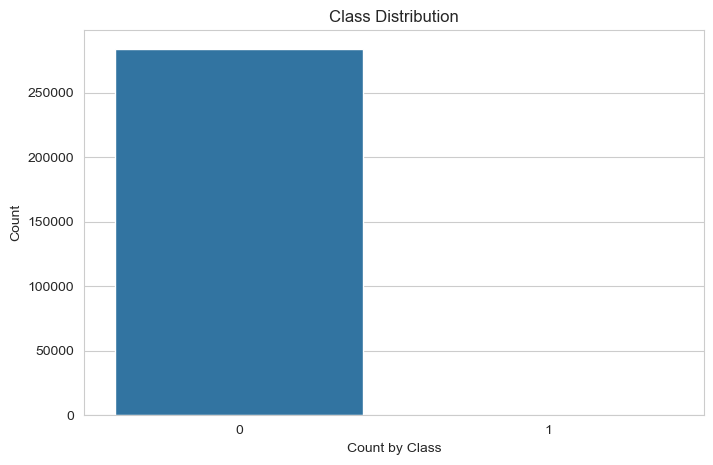

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(8,5))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution", fontsize=12)
plt.xlabel("Count by Class", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.show()

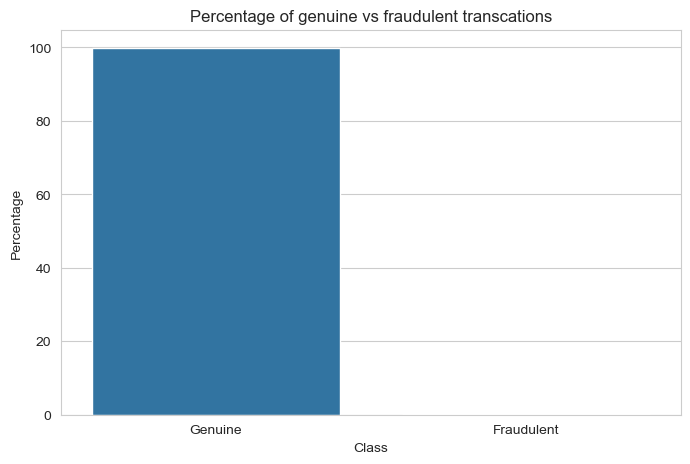

In [10]:
#Let's see the distribution in percentage
plt.figure(figsize=(8,5))
fraud_percentage = {'Class':['Genuine', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of genuine vs fraudulent transcations')
plt.show()

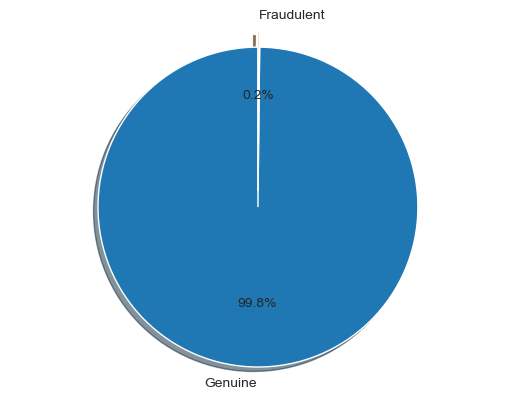

In [11]:
# Let's get a pie chart as well.
labels = 'Genuine', 'Fraudulent'
sizes = [normal_share, fraud_share]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

#### We can see that there is a very high data imbalance as only 0.2% of data is fraudulent.

Text(0.5, 1.05, 'Time vs Class Distribution')

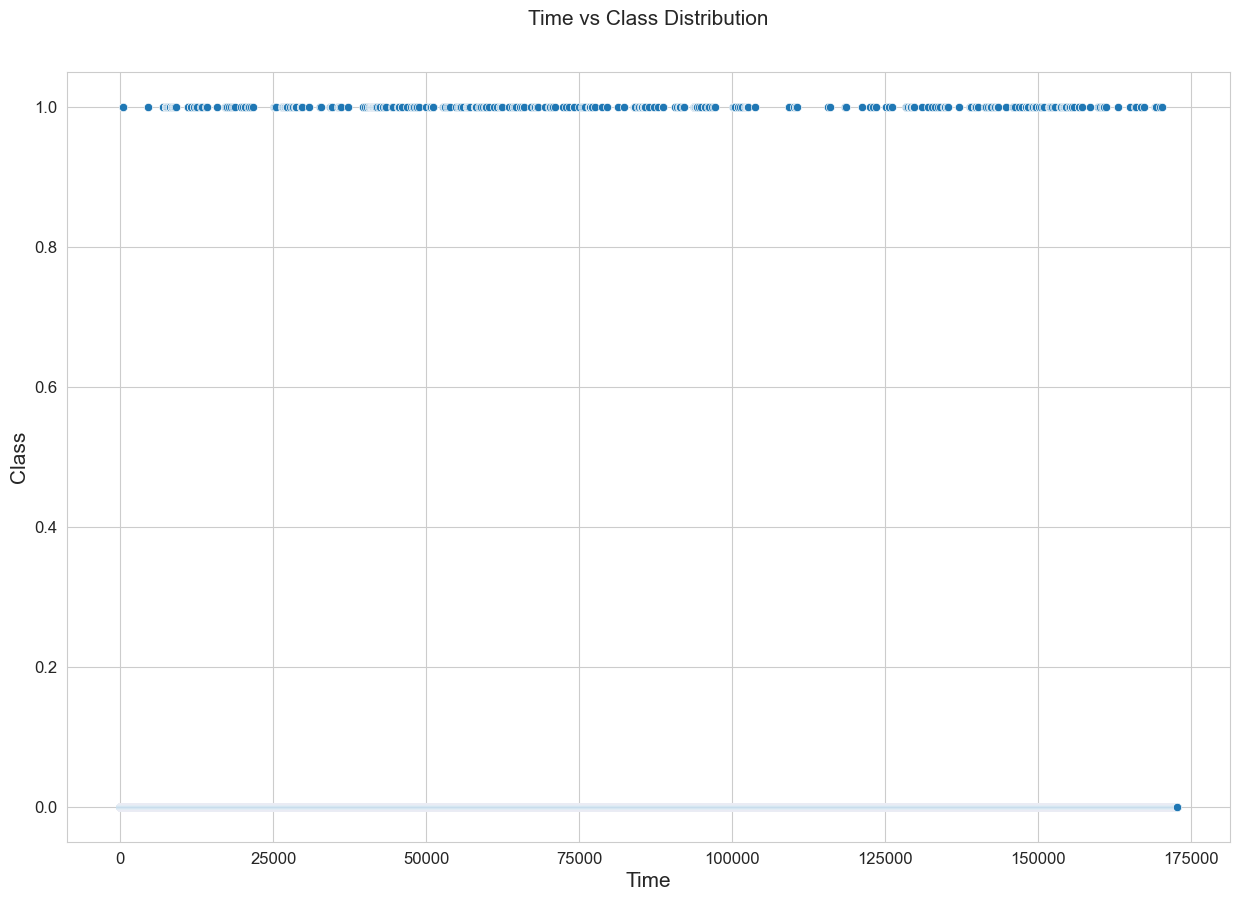

In [12]:
# Create a scatter plot to observe the distribution of class with time

fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x=df['Time'], y='Class', data=df)
plt.xlabel('Time', size=15)
plt.ylabel('Class', size=15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12) 
plt.title('Time vs Class Distribution', size=15, y=1.05)

#### Above plot does not give much pattern of difference, seems time is not a cause / factor.

Text(0.5, 1.05, 'Amount vs Class Distribution')

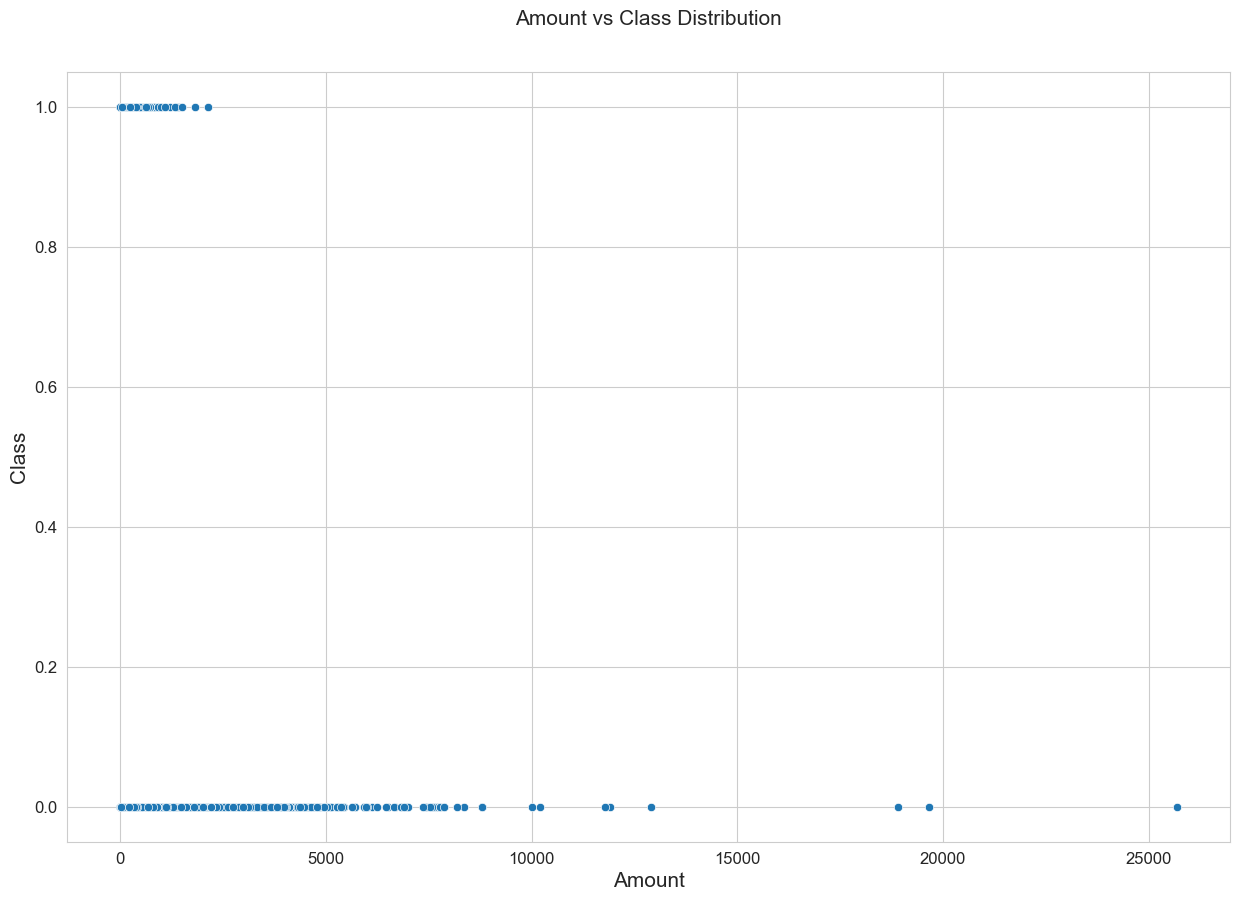

In [13]:
# Create a scatter plot to observe the distribution of classes with Amount

fig = plt.figure(figsize=(15, 10))
sns.scatterplot(x=df['Amount'], y='Class', data=df)
plt.xlabel('Amount', size=15)
plt.ylabel('Class', size=15)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12) 
plt.title('Amount vs Class Distribution', size=15, y=1.05)

#### While the time class distribution does not give a pattern, cost class distribution does provide an indication that Fraud takes place for transactions with lowers amounts.

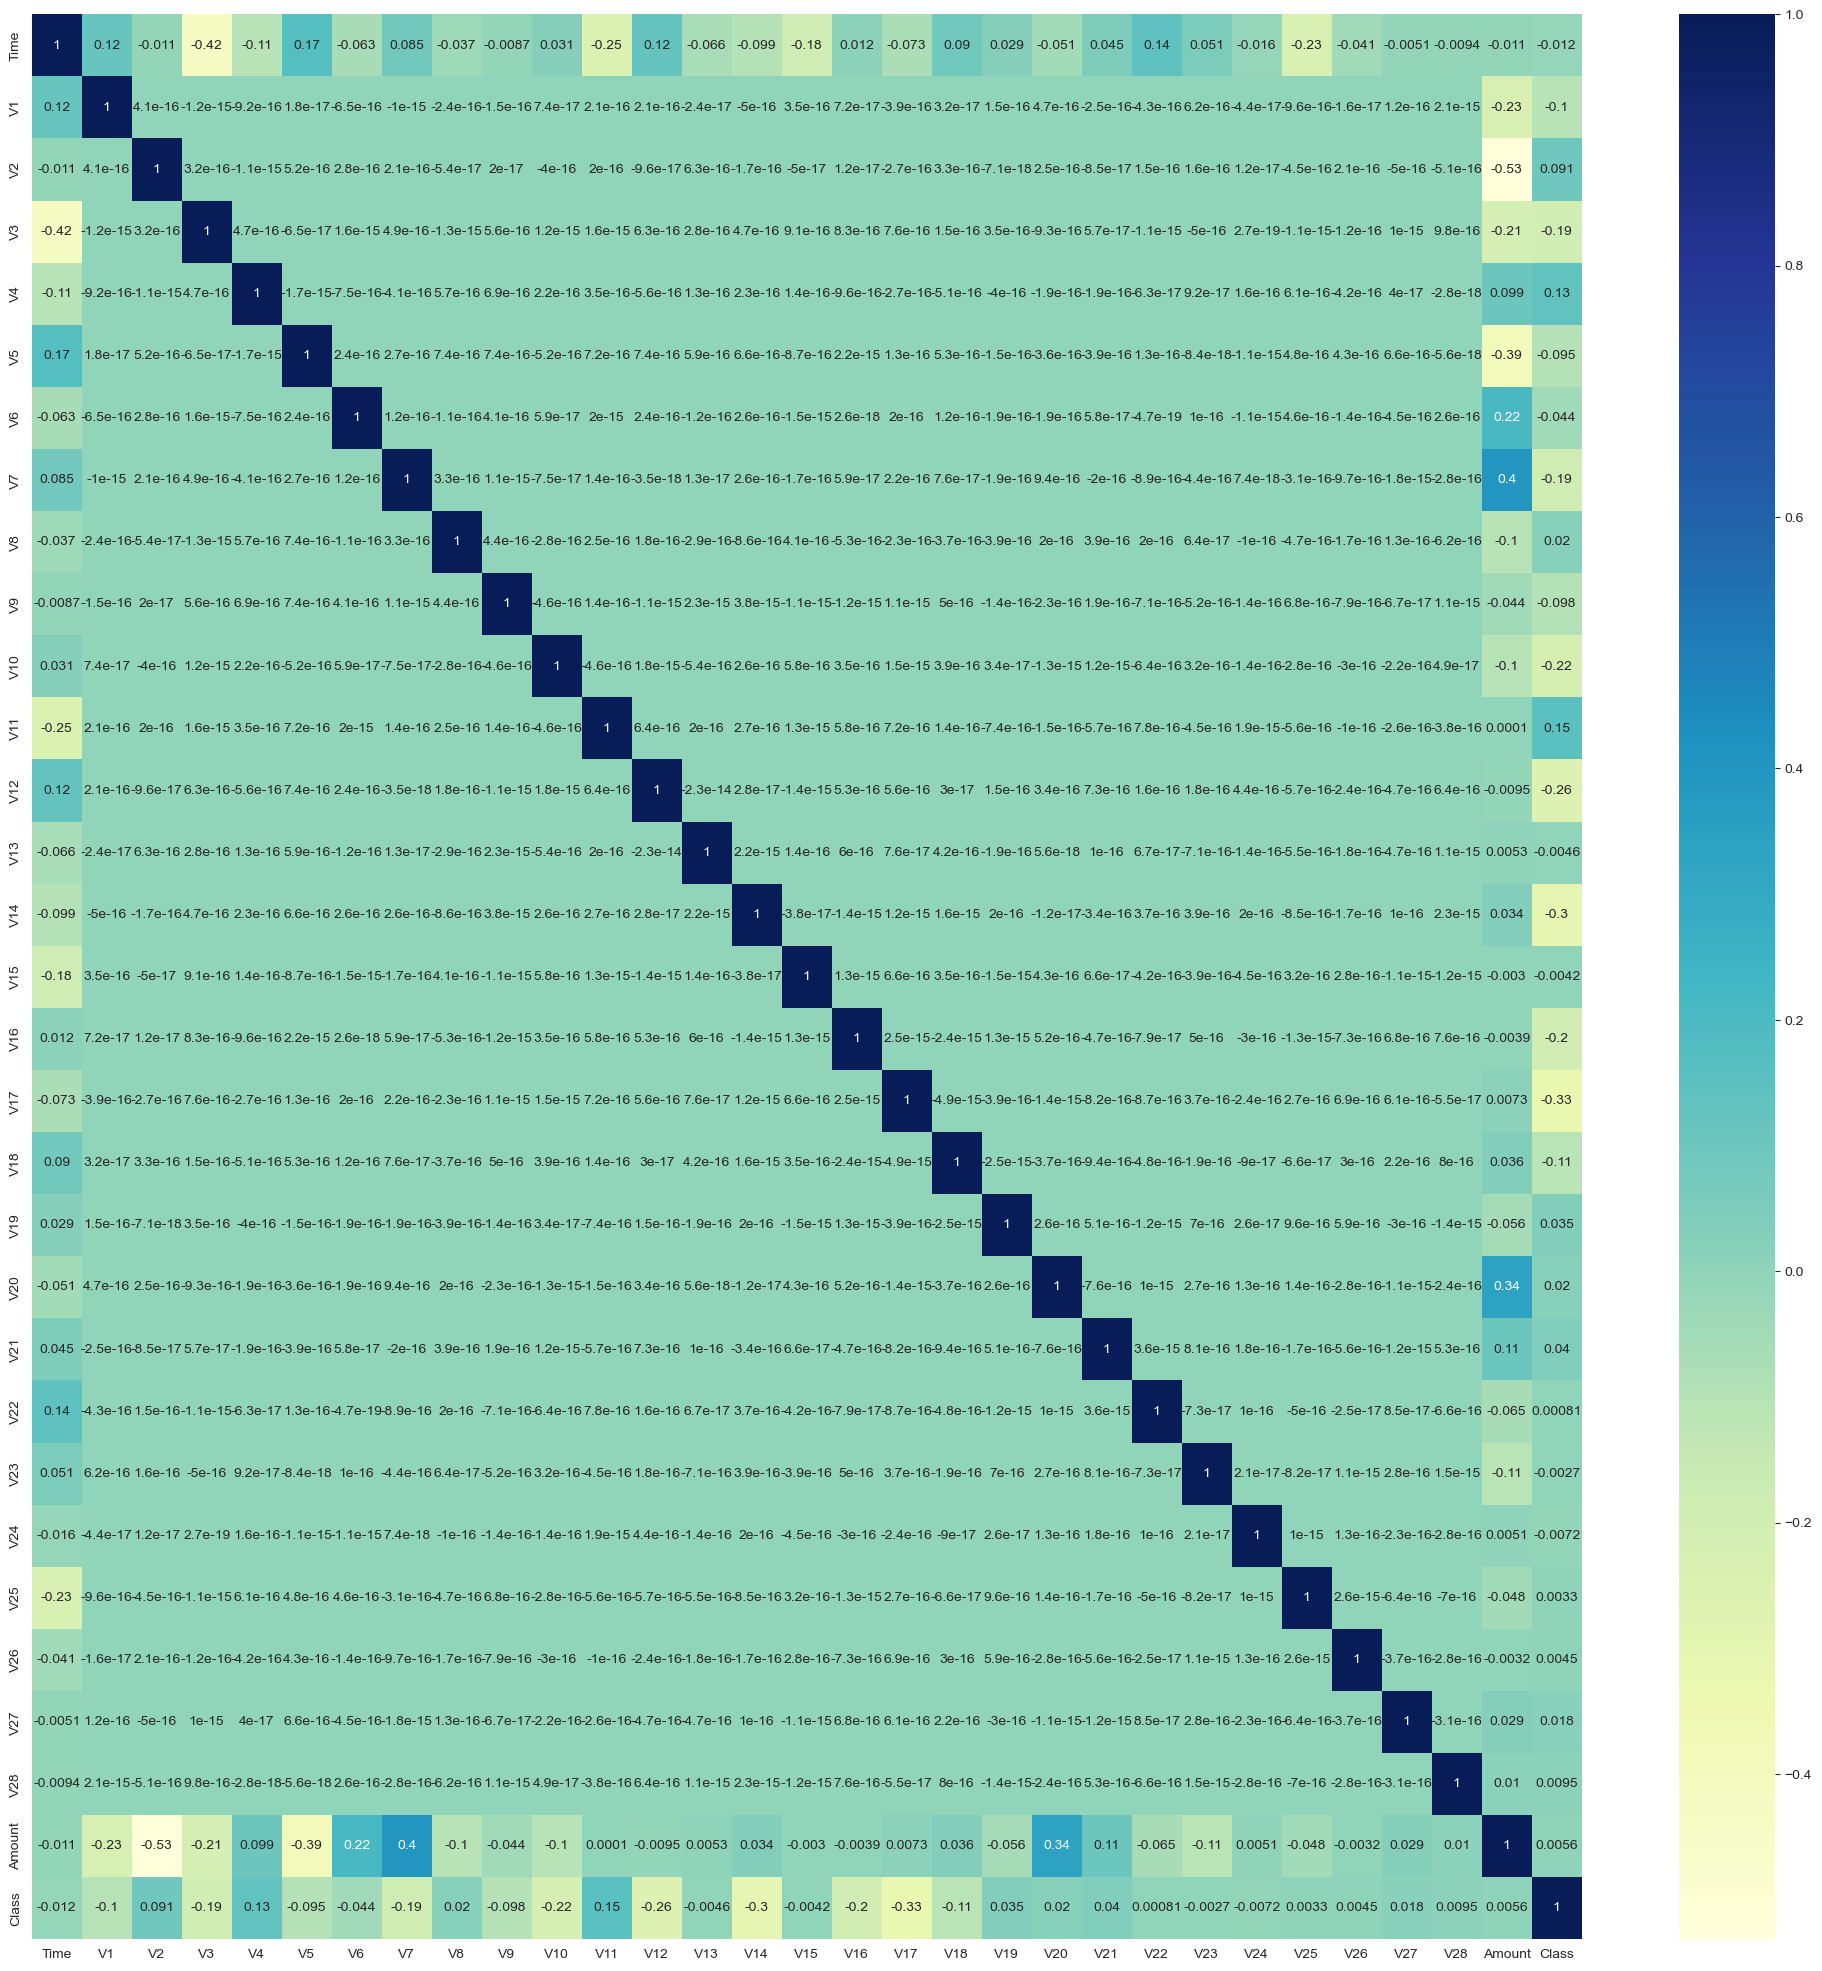

In [14]:
# Drop unnecessary columns
# Although apart from time, amount and Fraud indicators, every other field is masked, they may have important role to play to predict fraud.
# Let's see what the heatmap represents.

plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [15]:
# Let's create Day, Hour and Minute fields from Time and remove Time field. 
df_Time = pd.to_timedelta(df['Time'], unit='s')

#Create derived columns - Days, Minutes and hours
df['Time_Day'] = (df_Time.dt.components.days).astype(int)
df['Time_Hour'] = (df_Time.dt.components.hours).astype(int)
df['Time_Min'] = (df_Time.dt.components.minutes).astype(int)


In [16]:
#Let's remove Time column
df.drop(['Time'], inplace=True, axis = 1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   V1         284807 non-null  float64
 1   V2         284807 non-null  float64
 2   V3         284807 non-null  float64
 3   V4         284807 non-null  float64
 4   V5         284807 non-null  float64
 5   V6         284807 non-null  float64
 6   V7         284807 non-null  float64
 7   V8         284807 non-null  float64
 8   V9         284807 non-null  float64
 9   V10        284807 non-null  float64
 10  V11        284807 non-null  float64
 11  V12        284807 non-null  float64
 12  V13        284807 non-null  float64
 13  V14        284807 non-null  float64
 14  V15        284807 non-null  float64
 15  V16        284807 non-null  float64
 16  V17        284807 non-null  float64
 17  V18        284807 non-null  float64
 18  V19        284807 non-null  float64
 19  V20        284807 non-n

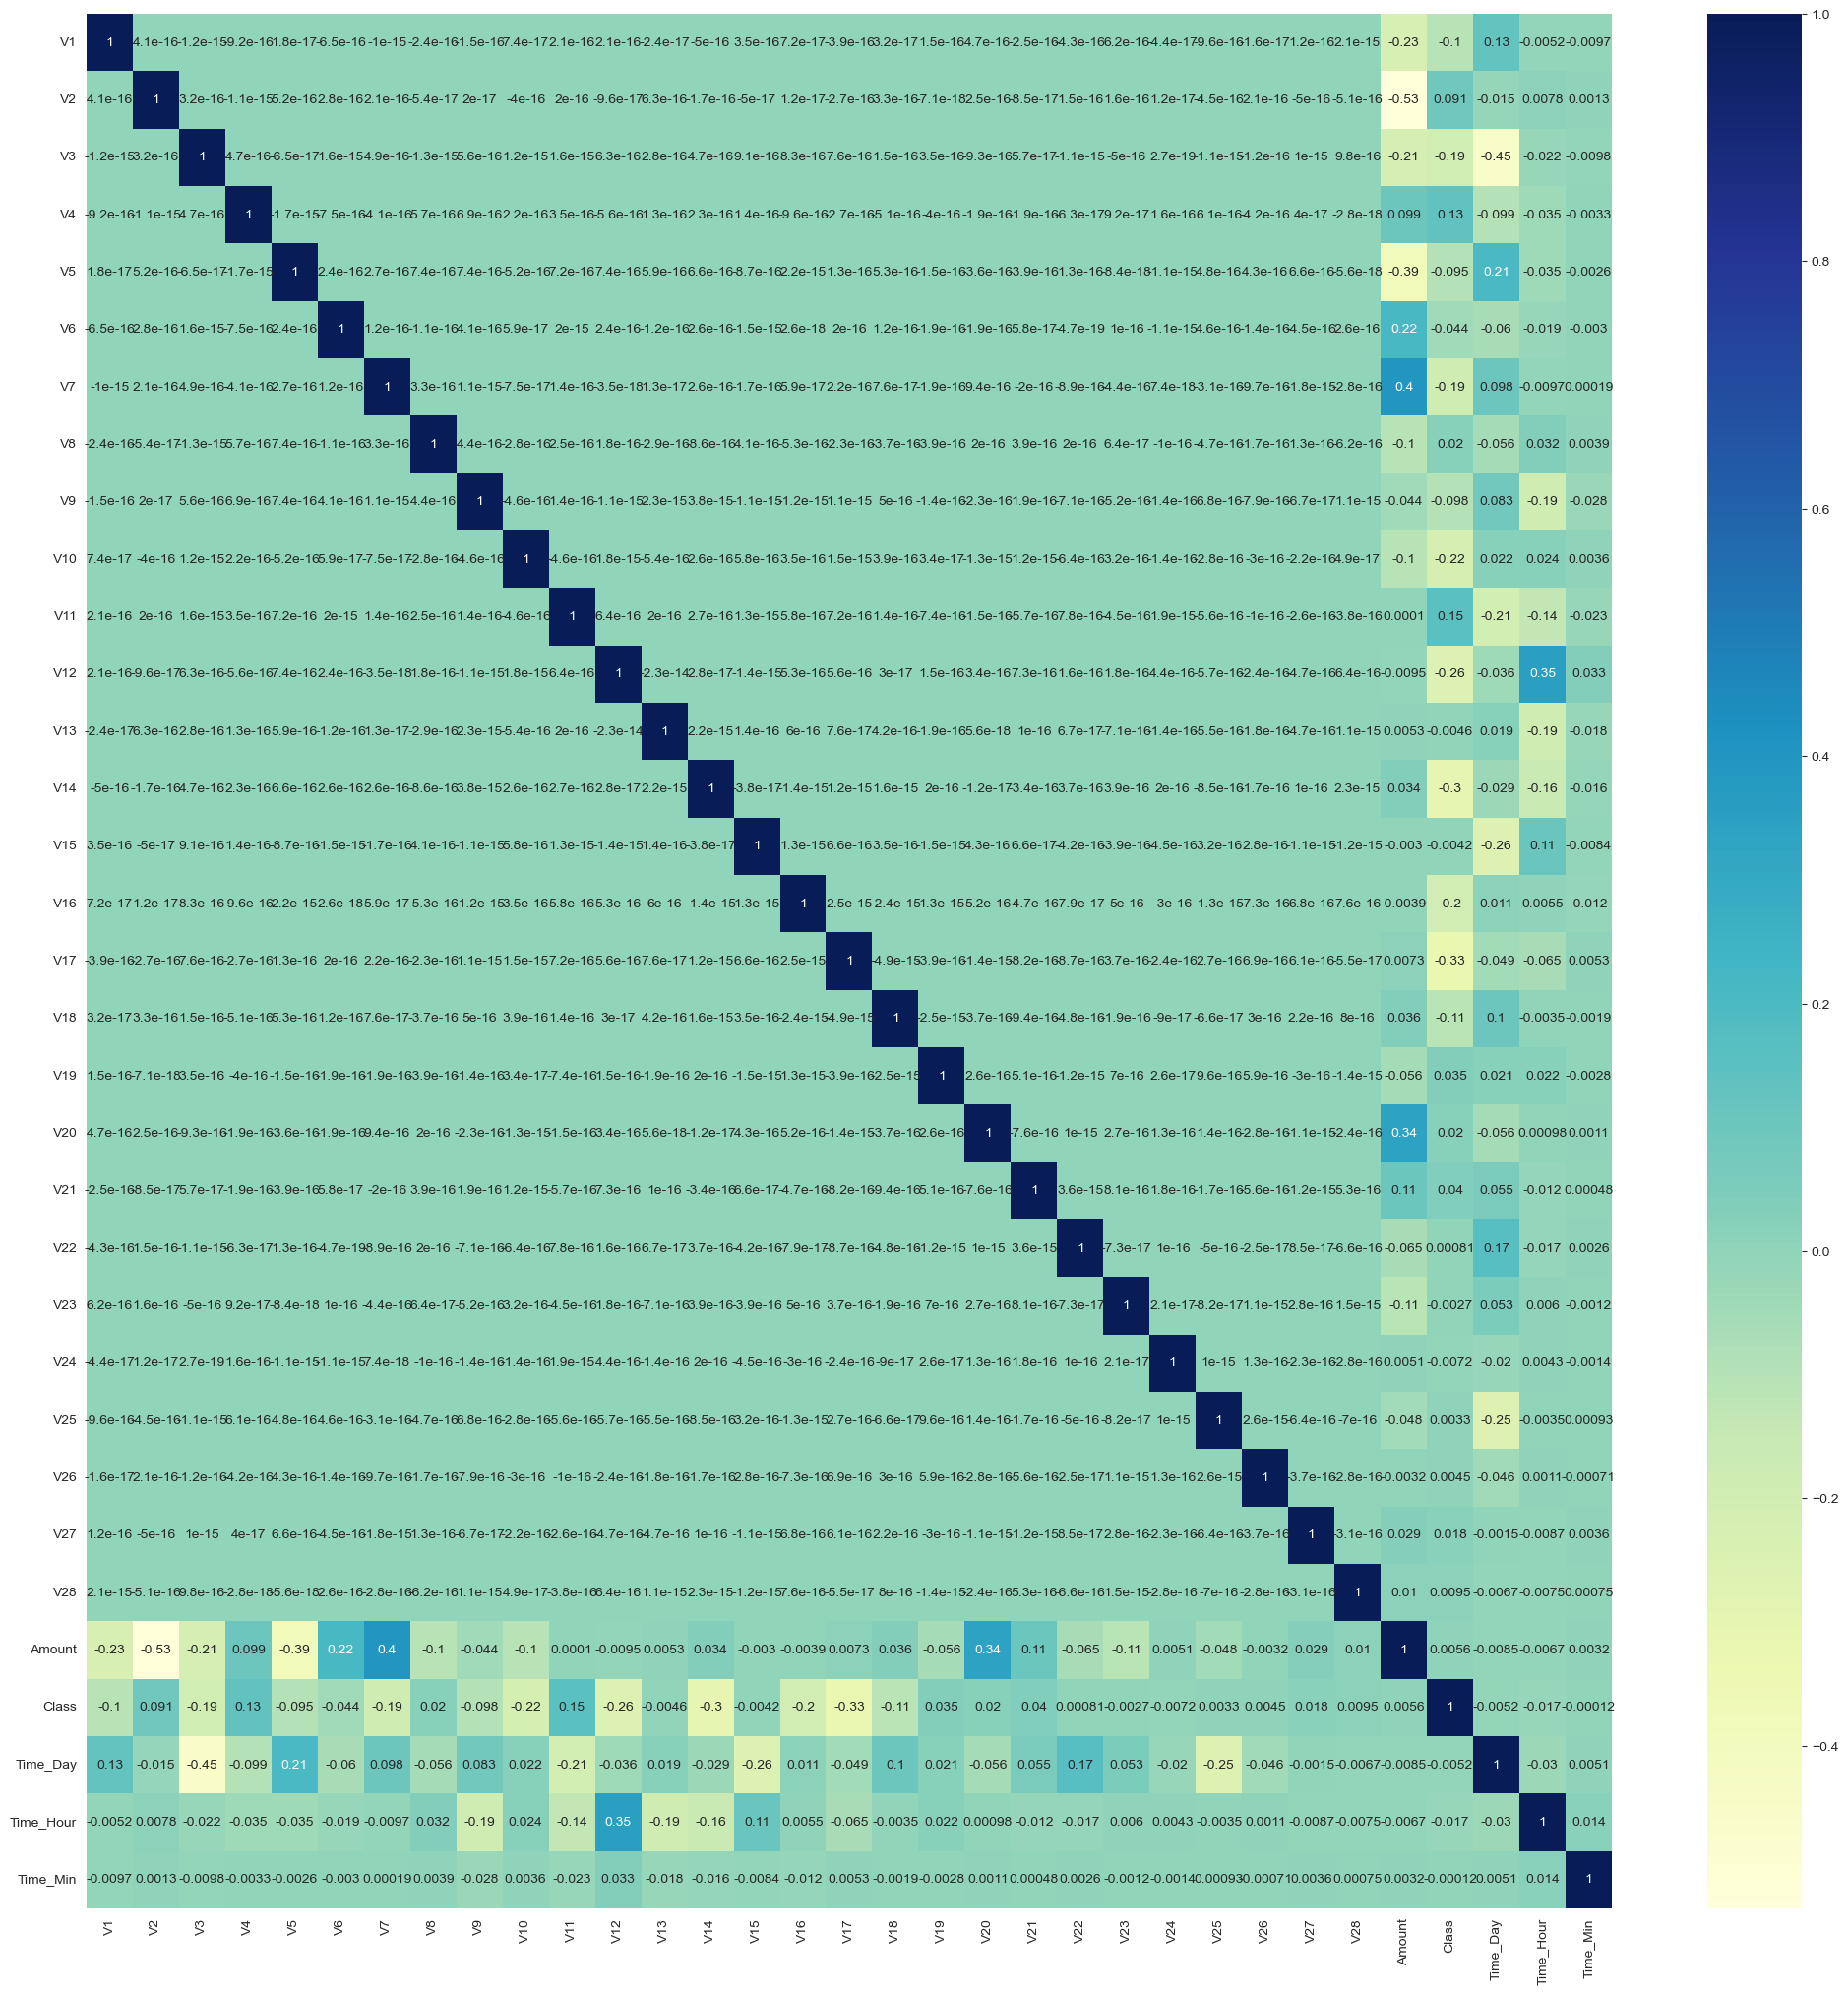

In [18]:
# Let's see the heatmap again
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

<Figure size 640x480 with 0 Axes>

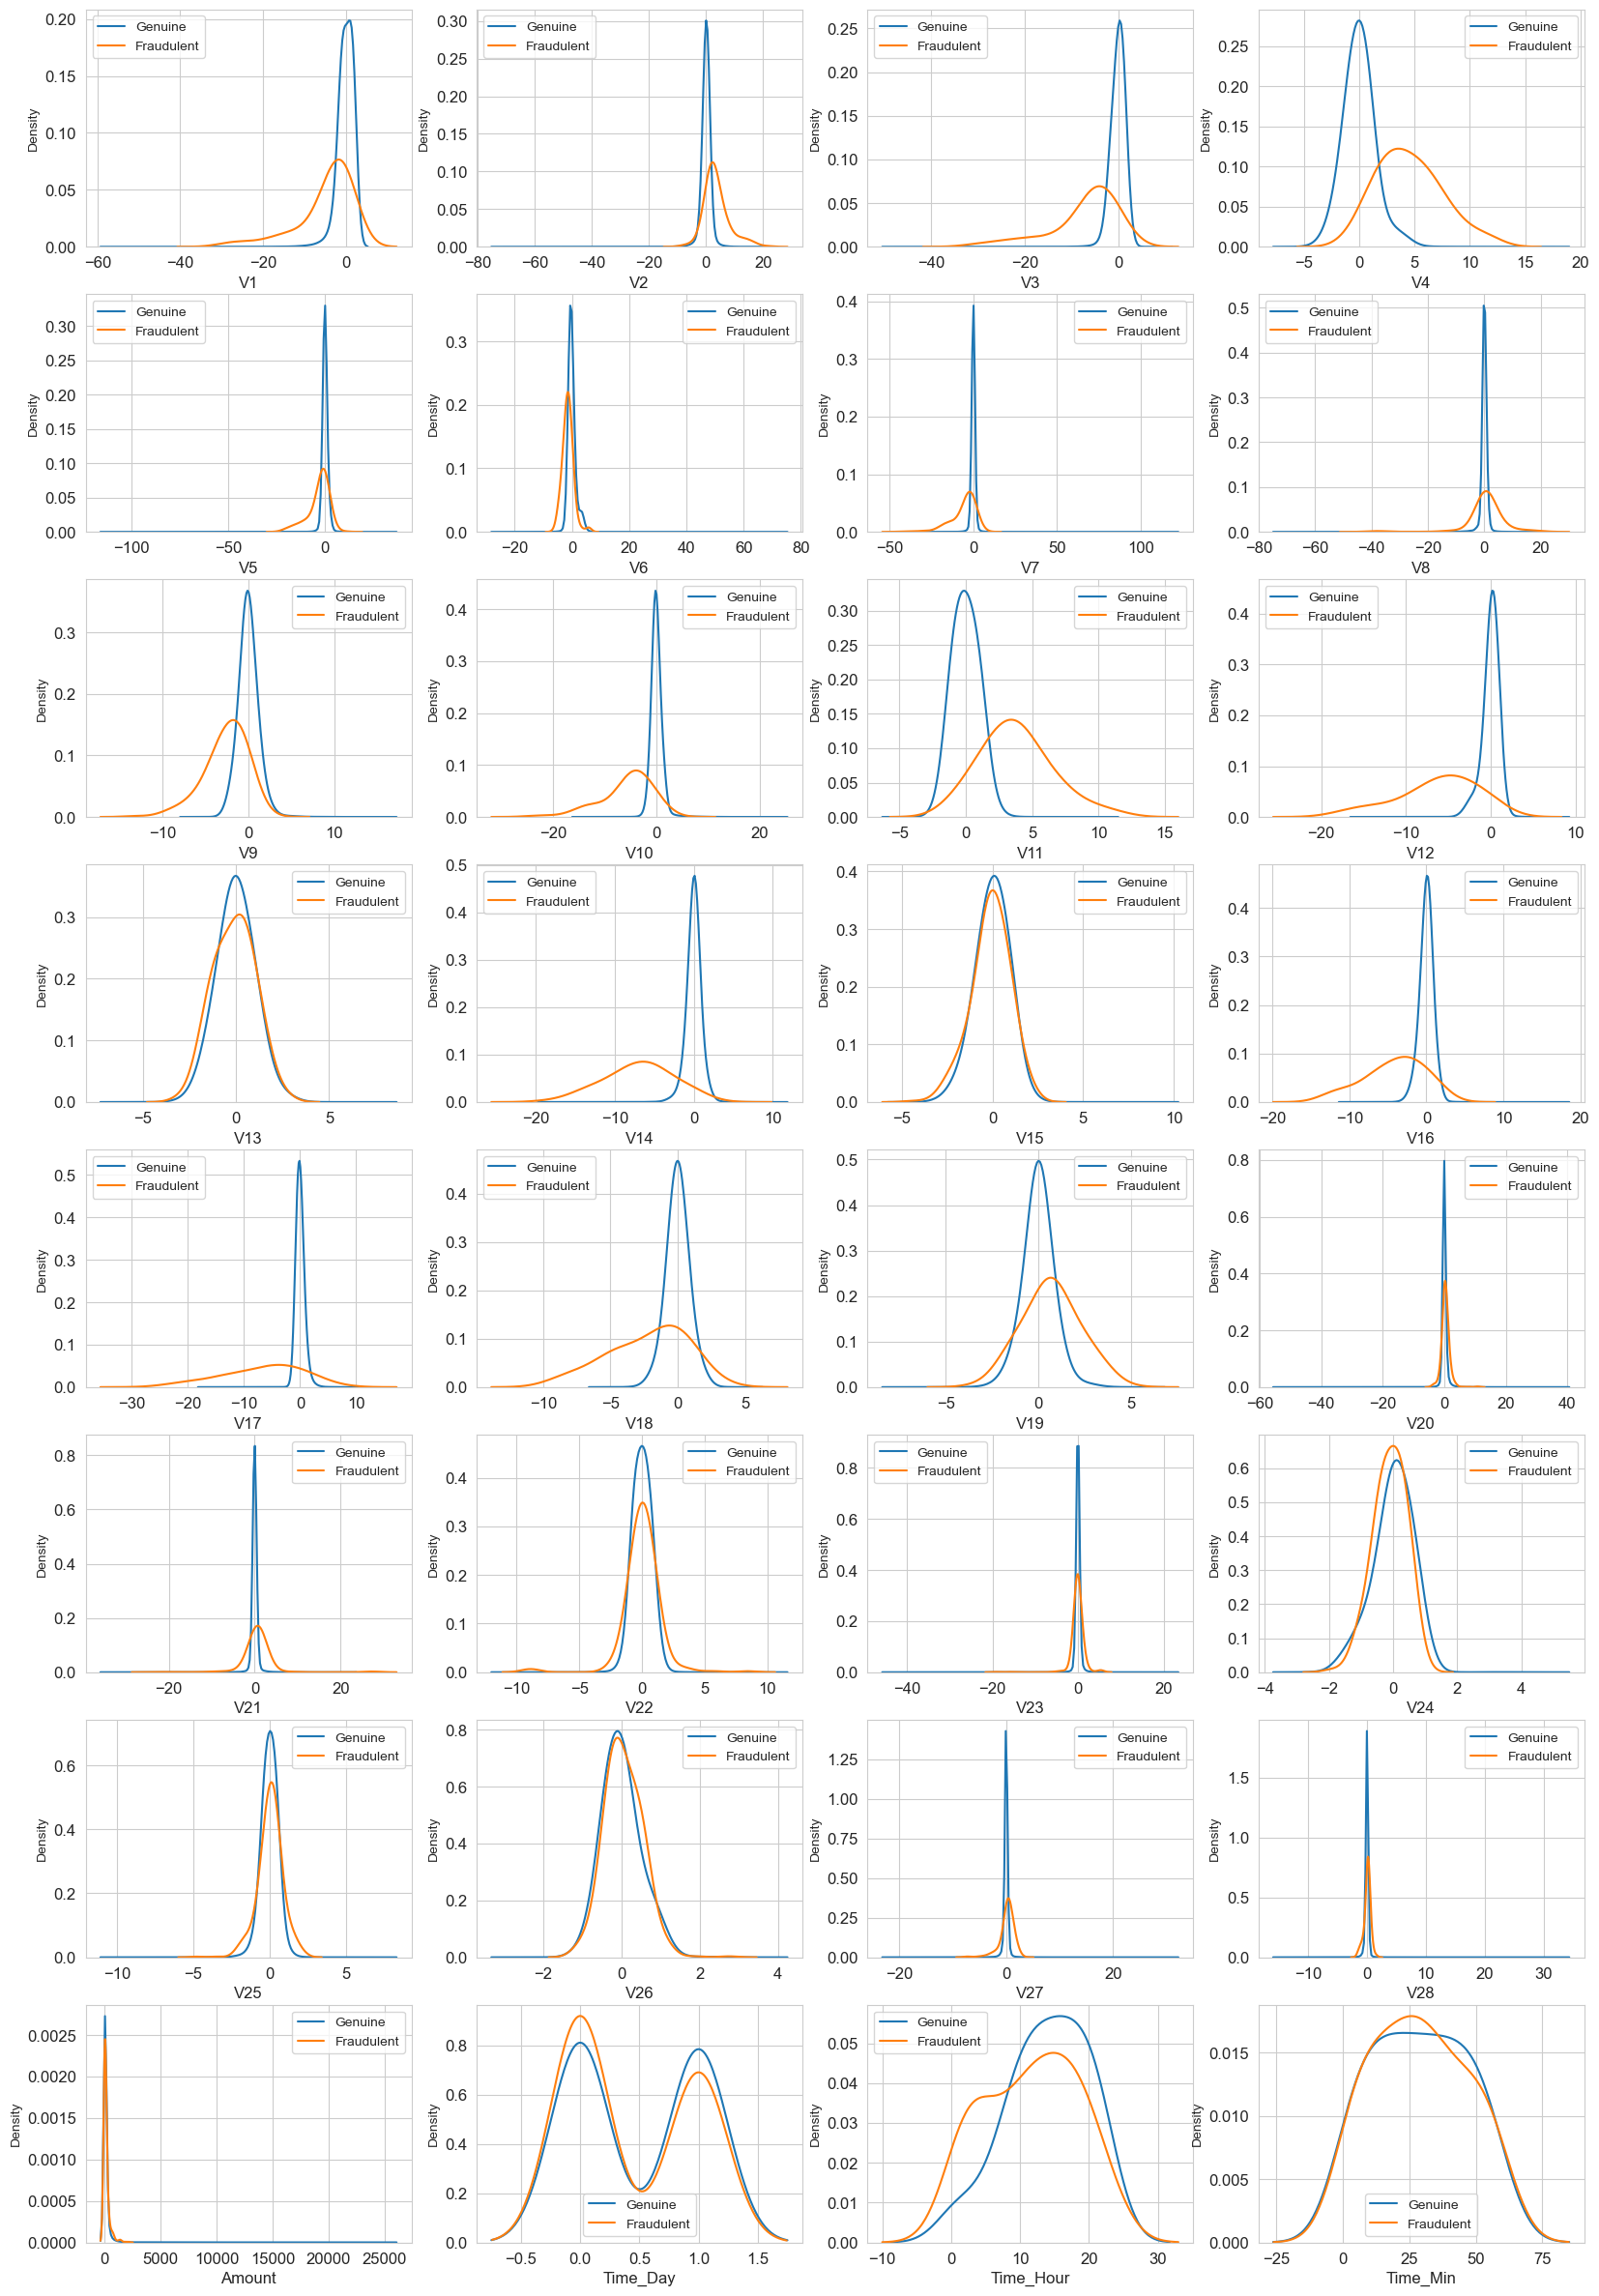

In [19]:
# Plotting all the variables to visualise the distribution
var = list(df.columns.values)

# dropping Class columns from the list
var.remove("Class")

i = 0
c0 = df.loc[df['Class'] == 0]
c1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(20,30))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(c0[feature], bw_method=0.5,label="Genuine")
    sns.kdeplot(c1[feature], bw_method=0.5,label="Fraudulent")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()
plt.show();

#### Features where there is a pattern difference between fraudulent and genuine transactions will be of high interest here.

### Splitting the data into train & test data

In [20]:
y= df.Class
X= df.drop('Class', axis=1)

In [21]:
X.shape

(284807, 32)

#### For this project, we'll keep 70% train data and 30% test data.

In [22]:
#We'll keep 70% as train data and 30% as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [23]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
356
136


In [24]:
# Post Train-Test Spilt, we need to perform Feature Scaling on Amount, undertanding that PCA is already applied on V1 to V28.

scaler = StandardScaler()

# Scaling (fit transforming) the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [25]:
X_train.describe()

V1             V2             V3             V4  \
count  199364.000000  199364.000000  199364.000000  199364.000000   
mean       -0.001491      -0.002331       0.002040      -0.001072   
std         1.960957       1.667882       1.514420       1.416783   
min       -56.407510     -72.715728     -48.325589      -5.683171   
25%        -0.920935      -0.599013      -0.885992      -0.849764   
50%         0.013616       0.066441       0.182979      -0.021602   
75%         1.314703       0.803312       1.028217       0.741059   
max         2.454930      22.057729       4.187811      16.875344   

                  V5             V6             V7             V8  \
count  199364.000000  199364.000000  199364.000000  199364.000000   
mean        0.000499      -0.001898       0.002623      -0.001166   
std         1.393311       1.337511       1.248391       1.188393   
min      -113.743307     -26.160506     -43.557242     -73.216718   
25%        -0.689221      -0.768043      -0.551137      -0.207810   
50%        -0.056453      -0.274239       0.042759       0.022222   
75%         0.609969       0.394597       0.570624       0.326793   
max        34.801666      73.301626     120.589494      20.007208   

                  V9            V10  ...            V23            V24  \
count  199364.000000  199364.000000  ...  199364.000000  199364.000000   
mean       -0.000327      -0.001034  ...      -0.000179      -0.000634   
std         1.097011       1.087023  ...       0.633316       0.605789   
min       -13.320155     -24.588262  ...     -44.807735      -2.836627   
25%        -0.642266      -0.536396  ...      -0.161315      -0.354771   
50%        -0.050710      -0.093865  ...      -0.010632       0.040783   
75%         0.597237       0.452410  ...       0.147780       0.439039   
max        10.348407      15.245686  ...      22.528412       4.584549   

                 V25            V26            V27            V28  \
count  199364.000000  199364.000000  199364.000000  199364.000000   
mean       -0.000958       0.000671      -0.000575      -0.000022   
std         0.522343       0.482478       0.406323       0.329310   
min       -10.295397      -2.604551      -9.895244     -15.430084   
25%        -0.317579      -0.326848      -0.071015      -0.053090   
50%         0.014793      -0.050547       0.001238       0.011385   
75%         0.350492       0.242133       0.091392       0.078537   
max         7.519589       3.517346      31.612198      33.847808   

             Amount       Time_Day      Time_Hour       Time_Min  
count  1.993640e+05  199364.000000  199364.000000  199364.000000  
mean  -6.935635e-16       0.490821      14.047250      29.024964  
std    1.000003e+00       0.499917       5.834393      17.424284  
min   -3.436174e-01       0.000000       0.000000       0.000000  
25%   -3.219188e-01       0.000000      10.000000      14.000000  
50%   -2.584867e-01       0.000000      15.000000      29.000000  
75%   -4.421863e-02       1.000000      19.000000      44.000000  
max    9.907028e+01       1.000000      23.000000      59.000000  

[8 rows x 32 columns]

In [26]:
X_test.describe()

V1            V2            V3            V4            V5  \
count  85443.000000  85443.000000  85443.000000  85443.000000  85443.000000   
mean       0.003478      0.005439     -0.004760      0.002501     -0.001165   
std        1.953418      1.611972      1.520527      1.413738      1.349280   
min      -37.558067    -48.060856    -33.680984     -5.600607    -35.182120   
25%       -0.918860     -0.597596     -0.898750     -0.845923     -0.696607   
50%        0.027577      0.063771      0.172352     -0.015505     -0.049754   
75%        1.318758      0.804709      1.024454      0.748632      0.616125   
max        2.439207     21.467203      9.382558     12.699542     29.016124   

                 V6            V7            V8            V9           V10  \
count  85443.000000  85443.000000  85443.000000  85443.000000  85443.000000   
mean       0.004429     -0.006119      0.002720      0.000763      0.002414   
std        1.319960      1.210308      1.208148      1.102412      1.093104   
min      -20.869626    -41.506796    -50.420090    -13.434066    -24.403185   
25%       -0.768892     -0.559137     -0.210278     -0.645261     -0.532391   
50%       -0.274148      0.033630      0.022642     -0.052649     -0.090740   
75%        0.408214      0.570107      0.328651      0.596962      0.456971   
max       21.550496     36.877368     19.168327     15.594995     23.745136   

       ...           V23           V24           V25           V26  \
count  ...  85443.000000  85443.000000  85443.000000  85443.000000   
mean   ...      0.000418      0.001479      0.002236     -0.001565   
std    ...      0.603294      0.605317      0.518782      0.481641   
min    ...    -32.828995     -2.824849     -8.696627     -2.068561   
25%    ...     -0.163219     -0.354192     -0.315960     -0.327501   
50%    ...     -0.012298      0.041344      0.020407     -0.055814   
75%    ...      0.147357      0.440782      0.351316      0.237729   
max    ...     22.083545      3.990646      6.070850      3.463246   

                V27           V28        Amount      Time_Day     Time_Hour  \
count  85443.000000  85443.000000  85443.000000  85443.000000  85443.000000   
mean       0.001342      0.000051     -0.005806      0.493534     14.044650   
std        0.397282      0.331883      0.888339      0.499961      5.839297   
min      -22.565679    -11.710896     -0.343617      0.000000      0.000000   
25%       -0.070384     -0.052707     -0.322141      0.000000     10.000000   
50%        0.001566      0.010934     -0.258487      0.000000     15.000000   
75%        0.090258      0.077683     -0.045718      1.000000     19.000000   
max        9.200883     16.129609     38.352144      1.000000     23.000000   

           Time_Min  
count  85443.000000  
mean      28.931896  
std       17.436093  
min        0.000000  
25%       14.000000  
50%       29.000000  
75%       44.000000  
max       59.000000  

[8 rows x 32 columns]

### Plotting the distribution of a variable

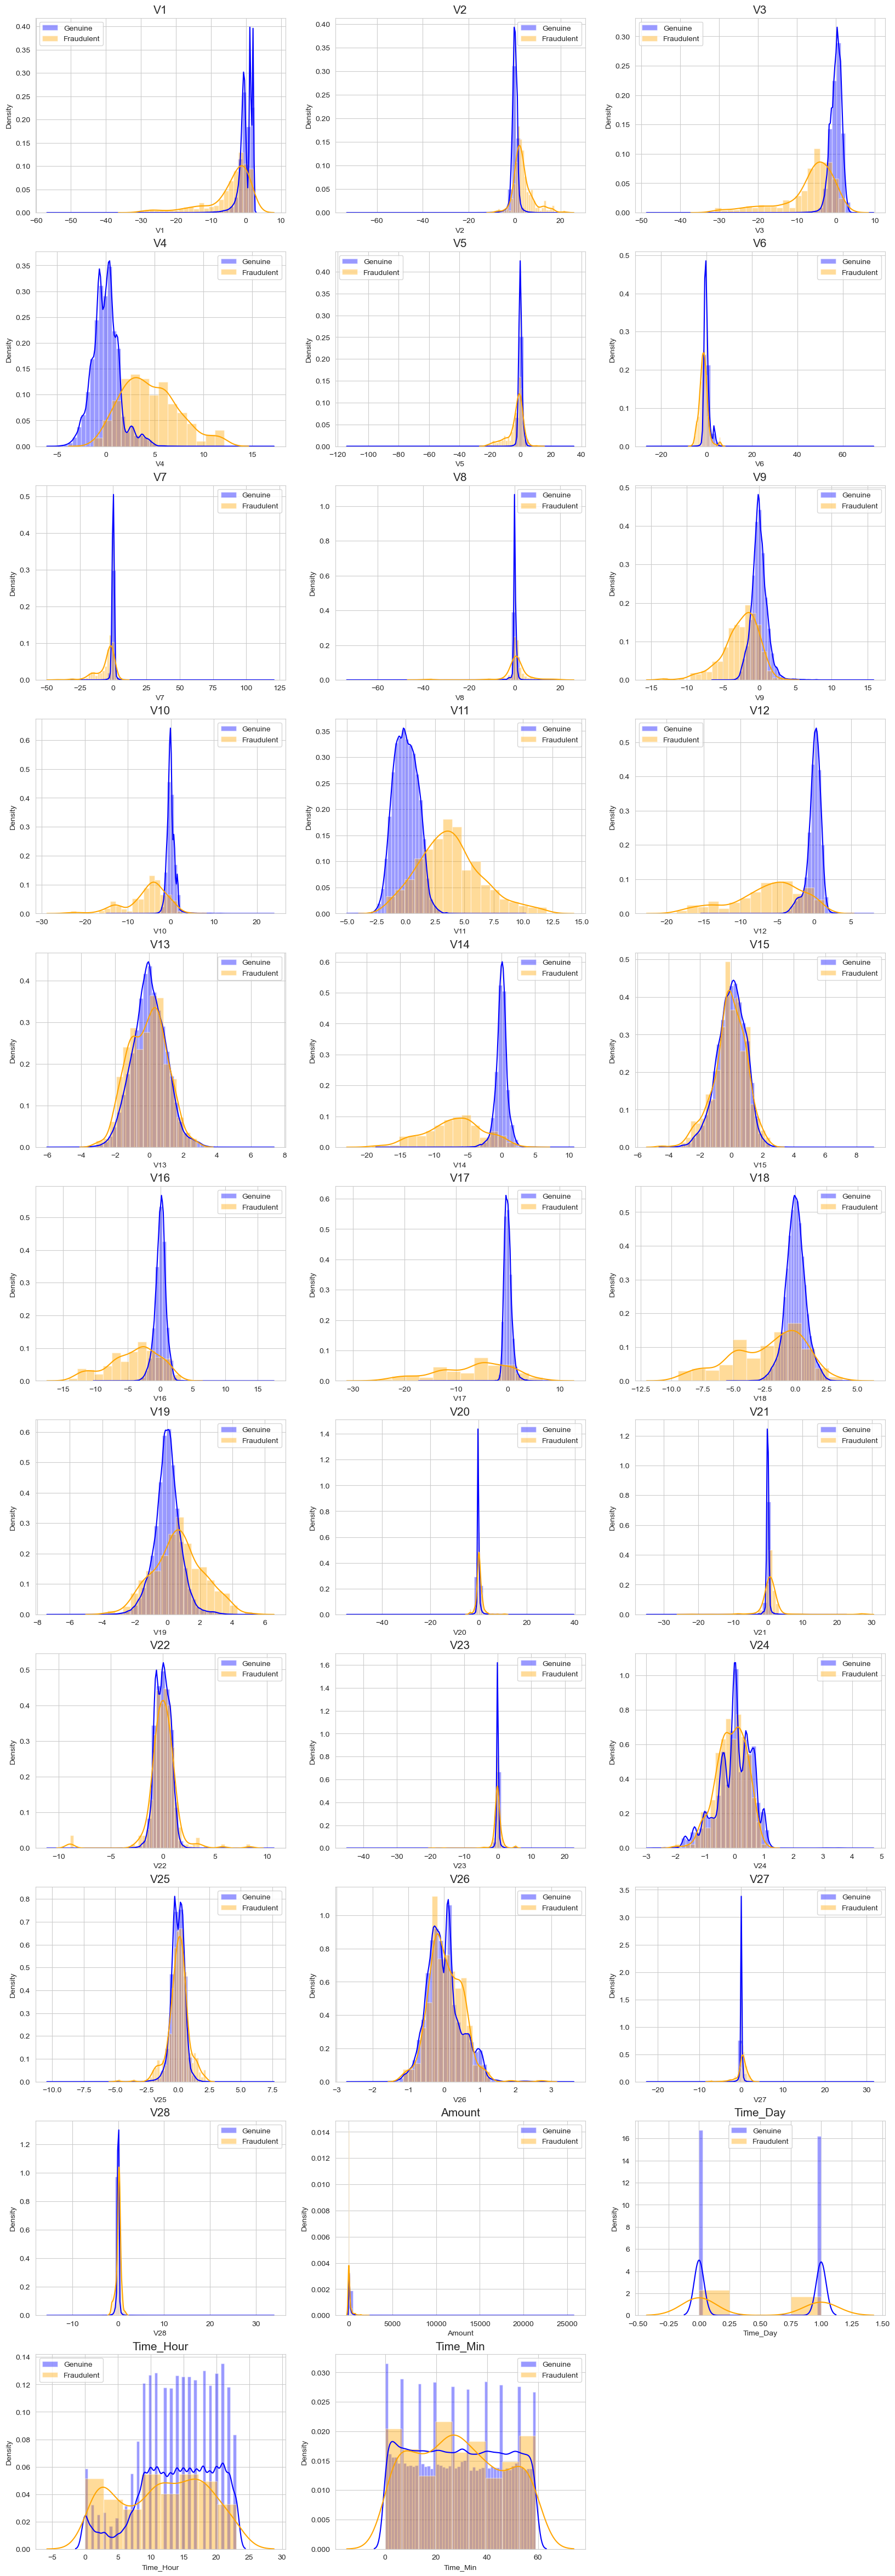

In [27]:
# We'll plot the histogram of variables from the dataset to see the skewness
var = X_train.columns

genuine_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))
for n, col in enumerate(var):
  plt.subplot(11,3,n+1)
  sns.distplot(X[col][genuine_records], color='blue', label='Genuine')
  sns.distplot(X[col][fraud_records], color='orange',label='Fraudulent')
  plt.title(col, fontsize=15)
  plt.legend()
plt.show()

In [28]:
var

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Time_Day',
       'Time_Hour', 'Time_Min'],
      dtype='object')

In [29]:
# Lets check the skewness of the features in train dataset
var = X_train.columns
sk_list = []

for i in var:
    sk_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(sk_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features        V1       V2       V3        V4        V5        V6        V7  \
Skewness -3.357011 -5.03531 -2.23777  0.686692 -3.189437  2.063992  4.253673   

Features        V8        V9       V10  ...       V23       V24       V25  \
Skewness -8.623674  0.534814  1.191228  ... -6.782943 -0.550056 -0.424576   

Features       V26      V27        V28    Amount  Time_Day  Time_Hour  \
Skewness  0.577836  0.22973  12.062181  19.13485  0.036723   -0.49026   

Features  Time_Min  
Skewness  0.022951  

[1 rows x 32 columns]

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [30]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

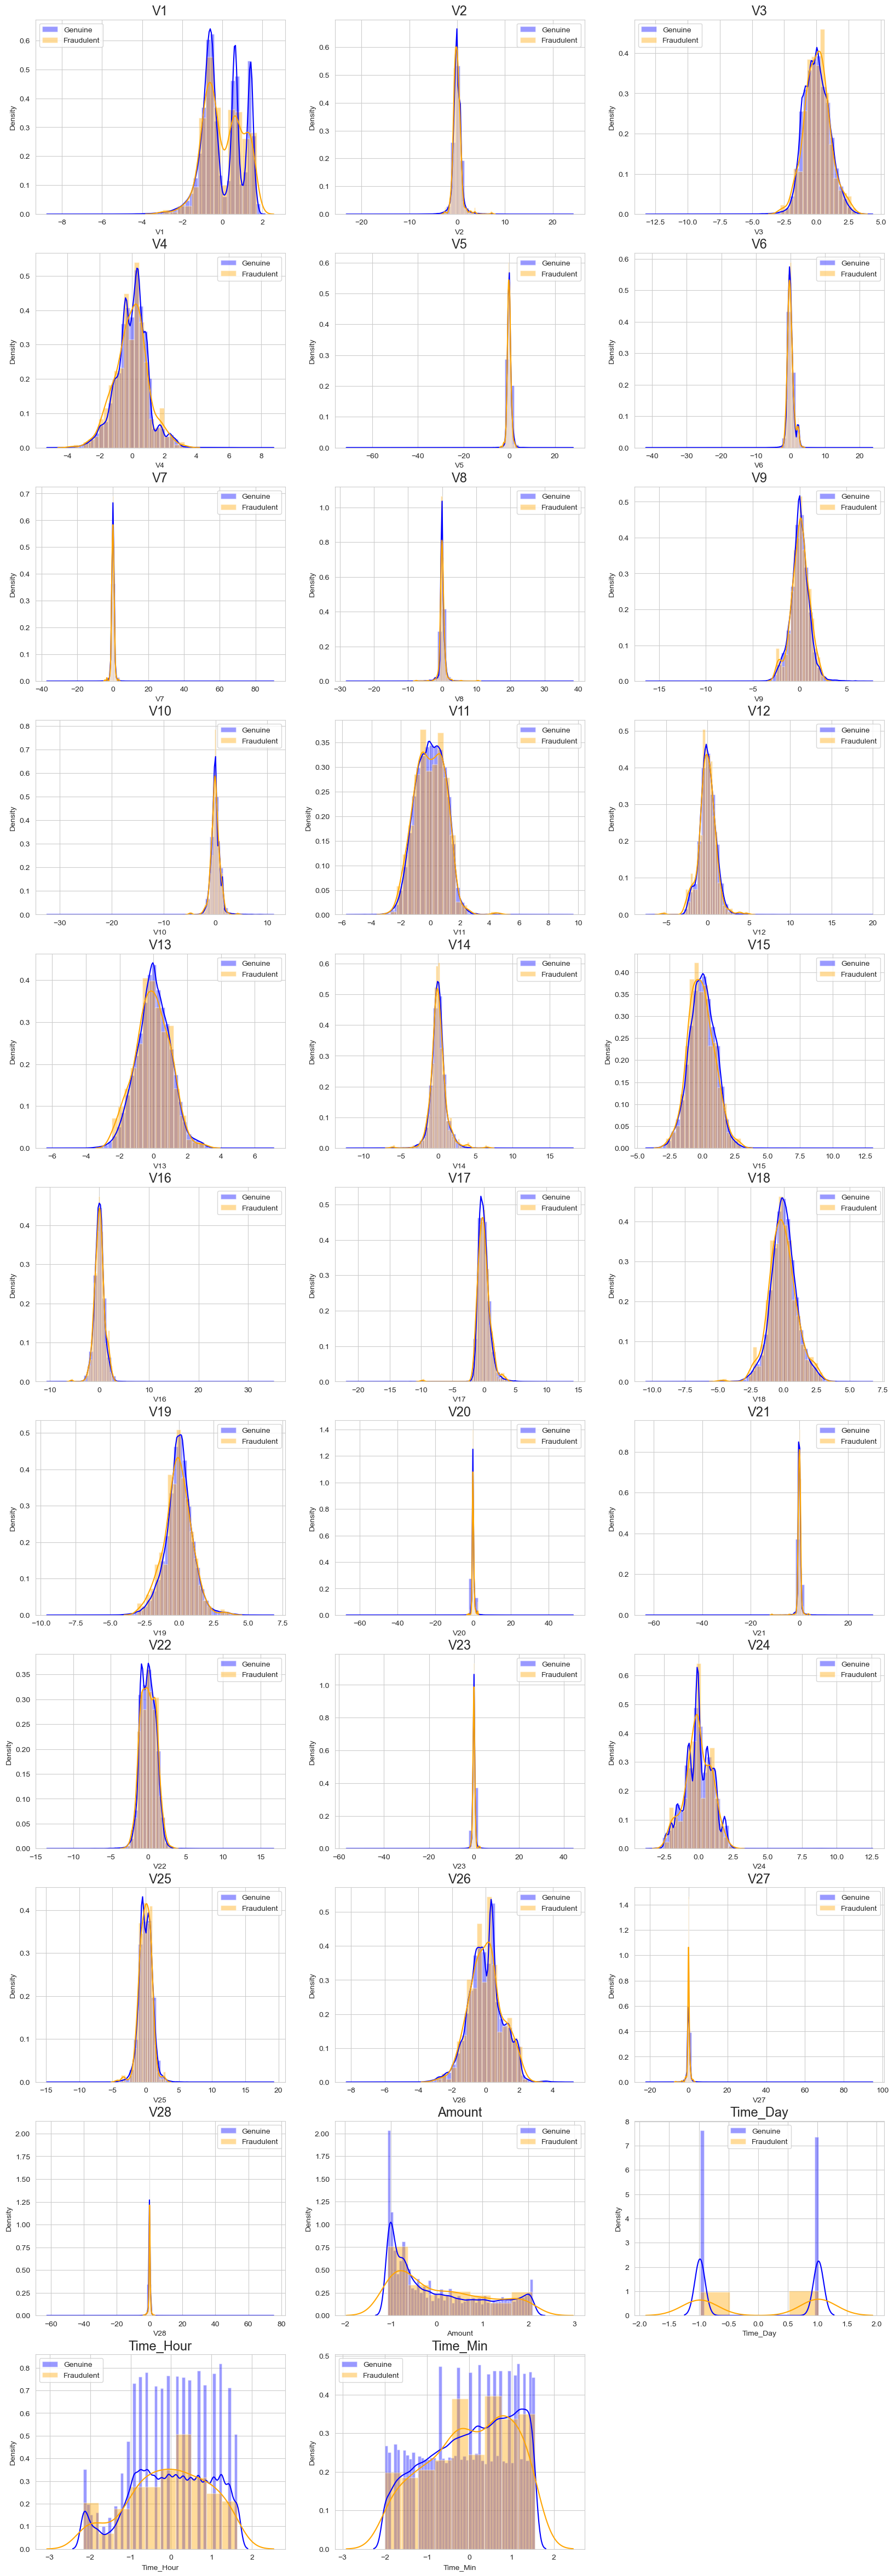

In [31]:
X_train_df_pt = pd.DataFrame(data=X_train_pt, columns=var)
X_test_df_pt = pd.DataFrame(data=X_test_pt, columns=var)

# Let's plot the histogram of variables from the dataset again to see the result 
plt.figure(figsize=(20, 60))
for n, col in enumerate(var):
  plt.subplot(11,3,n+1)
  sns.distplot(X_train_df_pt[col][genuine_records], color='blue',label='Genuine')
  sns.distplot(X_train_df_pt[col][fraud_records], color='orange',label='Fraudulent')
  plt.title(col, fontsize=17)
  plt.legend()
plt.show()

## Model Building
- Build different models on the imbalanced dataset and see the result

In [32]:
# Let's start with Logistic Regression
num_C = list(np.power(10.0, np.arange(-10, 10)))  #--> list of values
cv_num =  KFold(n_splits=10, shuffle=True, random_state=42) #--> list of values

In [33]:
#Create a dataframe to store results
Model_Perf_Results_df = pd.DataFrame(columns=['Data_Imbalance_Handling_Process', 'Model', 'Accuracy', 'ROC_Value', 'Threshold'])

In [34]:
#Confusion Matrix plot function
def confusion_matrix_plot(y_test, pred_test):
  cm = confusion_matrix(y_test, pred_test)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
  classNames = ['Genuine','Fraudulent']
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=10)
  plt.show()

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [35]:
#Function for Logistic Models (Penalty l1 and l2) as the same will be used for further execution as well.
def LogisticModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):


  searchCV_l2 = linear_model.LogisticRegressionCV(
          Cs= num_C
          ,penalty='l2'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='newton-cg'
          ,tol=10
      )

  searchCV_l1 = linear_model.LogisticRegressionCV(
          Cs=num_C
          ,penalty='l1'
          ,scoring='roc_auc'
          ,cv=cv_num
          ,random_state=42
          ,max_iter=10000
          ,fit_intercept=True
          ,solver='liblinear'
          ,tol=10
      )
  
  searchCV_l2.fit(X_train, y_train)
  searchCV_l1.fit(X_train, y_train)
  print ('Max auc_roc for l2:', searchCV_l2.scores_[1].mean(axis=0).max())
  print ('Max auc_roc for l1:', searchCV_l1.scores_[1].mean(axis=0).max())

  print('Parameters for l2 regularisation')
  print('Coefficient:',searchCV_l2.coef_)
  print('Intercept:',searchCV_l2.intercept_) 
  print('Score:',searchCV_l2.scores_) 

  print('Parameters for l1 regularisation')
  print('Coefficient:',searchCV_l1.coef_)
  print('Intercept:',searchCV_l1.intercept_) 
  print('Score:',searchCV_l1.scores_) 


  #find predicted vallues
  y_pred_l2 = searchCV_l2.predict(X_test)
  y_pred_l1 = searchCV_l1.predict(X_test)
  

  #Find predicted probabilities
  y_pred_probs_l2 = searchCV_l2.predict_proba(X_test)[:,1] 
  y_pred_probs_l1 = searchCV_l1.predict_proba(X_test)[:,1] 

  # Accuaracy of L2/L1 models
  Accuracy_l2 = metrics.accuracy_score(y_pred=y_pred_l2, y_true=y_test)
  Accuracy_l1 = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)

  print("Accuracy of Logistic model with l2 regularisation : {0}".format(Accuracy_l2))
  print("Confusion Matrix with l2")
  confusion_matrix_plot(y_test, y_pred_l2)
  print("Classification Report with l2")
  print(classification_report(y_test, y_pred_l2))
  print("Accuracy of Logistic model with l1 regularisation : {0}".format(Accuracy_l1))
  print("Confusion Matrix with l1")
  confusion_matrix_plot(y_test, y_pred_l1)
  print("classification Report with l1")
  print(classification_report(y_test, y_pred_l1))


  l2_roc_value = roc_auc_score(y_test, y_pred_probs_l2)
  print("l2 roc_value: {0}" .format(l2_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l2)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l2 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Process': DataImabalance,'Model': 'Logistic Regression with L2 Regularisation','Accuracy': Accuracy_l2,'ROC_Value': l2_roc_value,'Threshold': threshold}, index=[0]),ignore_index= True)

  l1_roc_value = roc_auc_score(y_test, y_pred_probs_l1)
  print("l1 roc_value: {0}" .format(l1_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs_l1)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("l1 threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Process': DataImabalance,'Model': 'Logistic Regression with L1 Regularisation','Accuracy': Accuracy_l1,'ROC_Value': l1_roc_value,'Threshold': threshold}, index=[0]),ignore_index= True)
  return df_Results

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9763464750431903
Max auc_roc for l1: 0.9786875564651651
Parameters for l2 regularisation
Coefficient: [[-0.11380476 -0.05157947 -0.26231058  0.56480345  0.05751108  0.01184161
  -0.08716306 -0.17309247 -0.13606869 -0.17139508  0.14542526 -0.48661024
  -0.0763116  -0.65290118 -0.07477469 -0.20495405 -0.02662749  0.0350363
  -0.06923562 -0.05116401  0.14910123  0.12794353 -0.06870065 -0.00654781
  -0.01823782  0.02877794 -0.07721569 -0.04760132  0.0644441  -0.09472937
   0.03262128  0.0495308 ]]
Intercept: [-7.95760647]
Score: {1: array([[0.95309928, 0.95309792, 0.95309792, 0.95309792, 0.95309792,
        0.95309521, 0.97311422, 0.99239305, 0.99442483, 0.99520712,
        0.99520712, 0.99520712, 0.99520712, 0.99520712, 0.99520712,
        0.99520712, 0.99520712, 0.99520712, 0.99520712, 0.99520712],
       [0.84162428, 0.84162585, 0.84162585, 0.84162585, 0.84162585,
        0.84162742, 0.90090587, 0.95849033, 0.957199

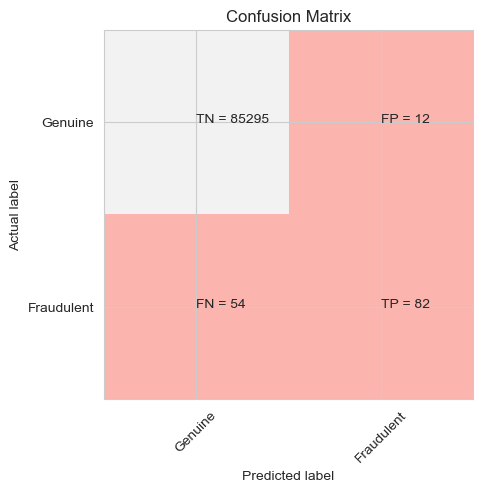

Classification Report with l2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.60      0.71       136

    accuracy                           1.00     85443
   macro avg       0.94      0.80      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy of Logistic model with l1 regularisation : 0.999204147794436
Confusion Matrix with l1


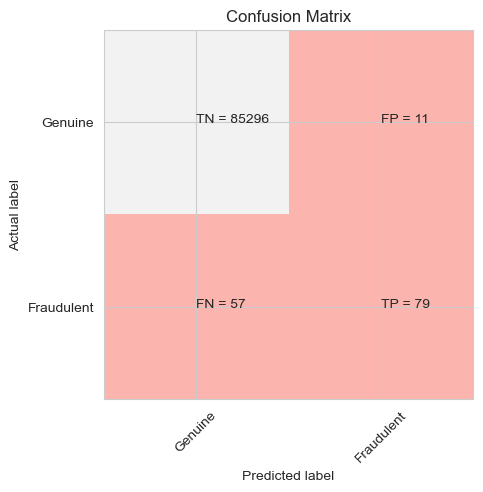

classification Report with l1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.58      0.70       136

    accuracy                           1.00     85443
   macro avg       0.94      0.79      0.85     85443
weighted avg       1.00      1.00      1.00     85443

l2 roc_value: 0.9851011295535366
l2 threshold: 0.0027296508060339992
ROC for the test dataset 98.5%


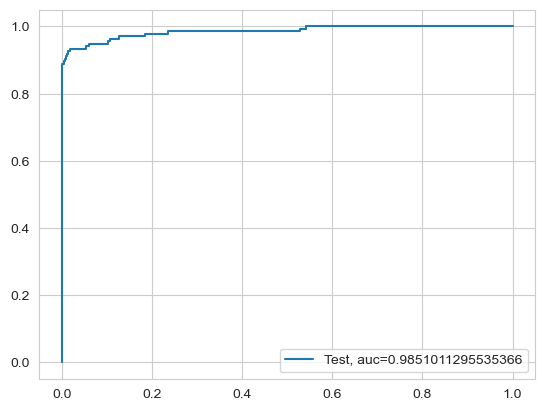

l1 roc_value: 0.9886251662679912
l1 threshold: 0.007539150242530021
ROC for the test dataset 98.9%


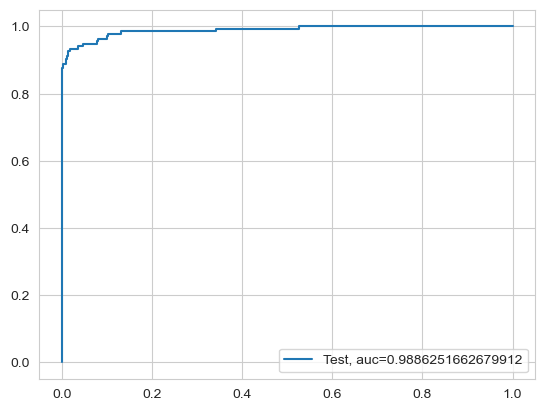

Time Elapsed: --- 40.00048589706421 seconds ---


In [36]:
#Run Logistic Regression with L1 And L2 Regularisation - Power Transformer
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
Model_Perf_Results_df = LogisticModels(Model_Perf_Results_df, "Power Transformer", X_train_df_pt, y_train, X_test_df_pt, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

In [37]:
#Function for KNN Model as the same will be used for further execution as well.
def KNNModels(df_Results,DataImabalance, X_train,y_train, X_test, y_test ):
  knn = KNeighborsClassifier(n_neighbors = 5,n_jobs=16)
  knn.fit(X_train,y_train)
  score = knn.score(X_test,y_test)
  print("model score")
  print(score)
  
  y_pred = knn.predict(X_test)
  KNN_Accuracy = metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
  print("Confusion Matrix")
  confusion_matrix_plot(y_test, y_pred)
  print("Classification Report")
  print(classification_report(y_test, y_pred))


  knn_probs = knn.predict_proba(X_test)[:, 1]

  knn_roc_value = roc_auc_score(y_test, knn_probs)
  print("KNN roc_value: {0}" .format(knn_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("KNN threshold: {0}".format(threshold))

  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Process': DataImabalance,'Model': 'KNN','Accuracy': score,'ROC_Value': knn_roc_value,'Threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

KNN Model
model score
0.9994499256814484
Confusion Matrix


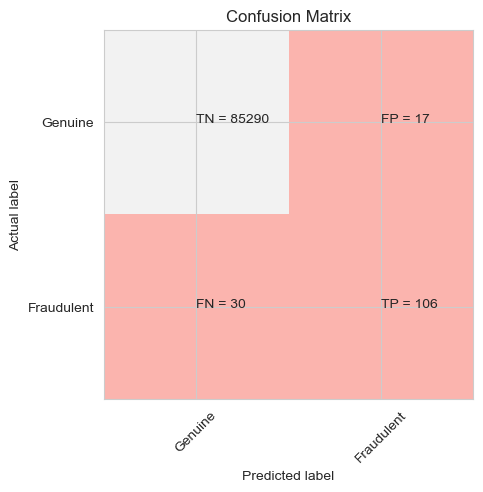

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.86      0.78      0.82       136

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

KNN roc_value: 0.937368683626404
KNN threshold: 0.2
ROC for the test dataset 93.7%


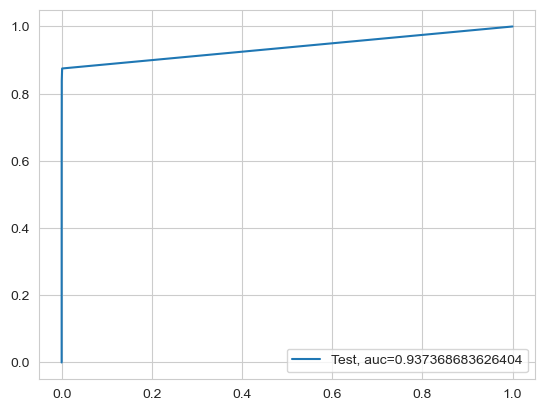

Time Elapsed: --- 1117.346340894699 seconds ---


In [38]:
#Run KNN Model- Power Transformer
print("KNN Model")
start_time = time.time()
Model_Perf_Results_df = KNNModels(Model_Perf_Results_df, "Power Transformer", X_train_df_pt, y_train, X_test_df_pt, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

In [39]:
#Function for SVM Model as the same will be used for further execution as well.
def SVMModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  clf = SVC(kernel='sigmoid', random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM = clf.predict(X_test)
  SVM_Score = accuracy_score(y_test,y_pred_SVM)
  print("Accuracy_Score : {0}".format(SVM_Score))
  print("Confusion Matrix")
  confusion_matrix_plot(y_test, y_pred_SVM)
  print("Classification Report")
  print(classification_report(y_test, y_pred_SVM))



  # Run classifier
  classifier = SVC(kernel='sigmoid' , probability=True)
  svm_probs = classifier.fit(X_train, y_train).predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, svm_probs)
  
  print("SVM roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, svm_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("SVM threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Process': DataImabalance,'Model': 'SVM','Accuracy': SVM_Score,'ROC_Value': roc_value,'Threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

SVM Model with Sigmoid Kernel
Accuracy_Score : 0.9988530365272755
Confusion Matrix


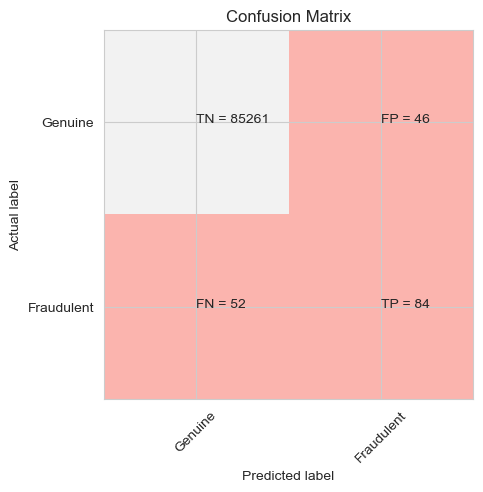

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.65      0.62      0.63       136

    accuracy                           1.00     85443
   macro avg       0.82      0.81      0.82     85443
weighted avg       1.00      1.00      1.00     85443

SVM roc_value: 0.8898529291093278
SVM threshold: 0.0008492744140217504
ROC for the test dataset 89.0%


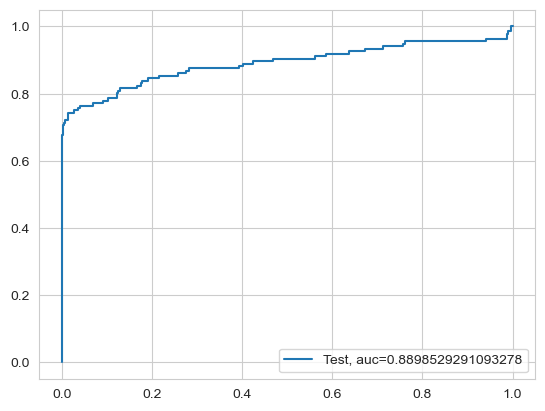

Time Elapsed: --- 58.003137826919556 seconds ---


In [40]:
#Run SVM Model with Sigmoid Kernel- Power Transformer
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
Model_Perf_Results_df = SVMModels(Model_Perf_Results_df, "Power Transformer", X_train_df_pt, y_train, X_test_df_pt, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

In [41]:
#Function for Decision Tree Model as the same will be used for further execution as well.
def DecisionTreeModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  criteria = ['gini', 'entropy'] 
  scores = {} 
    
  for c in criteria: 
      dt = DecisionTreeClassifier(criterion = c, random_state=42) 
      dt.fit(X_train, y_train) 
      y_pred = dt.predict(X_test)
      test_score = dt.score(X_test, y_test) 
      tree_preds = dt.predict_proba(X_test)[:, 1]
      tree_roc_value = roc_auc_score(y_test, tree_preds)
      scores = test_score 
      print(c + " score: {0}" .format(test_score))
      print("Confusion Matrix")
      confusion_matrix_plot(y_test, y_pred)
      print("Classification Report")
      print(classification_report(y_test, y_pred))
      print(c + " tree_roc_value: {0}" .format(tree_roc_value))
      fpr, tpr, thresholds = metrics.roc_curve(y_test, tree_preds)
      threshold = thresholds[np.argmax(tpr-fpr)]
      print("Tree threshold: {0}".format(threshold))
      roc_auc = metrics.auc(fpr, tpr)
      print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
      plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
      plt.legend(loc=4)
      plt.show()
  
      df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Process': DataImabalance,'Model': 'Tree Model with {0} criteria'.format(c),'Accuracy': test_score,'ROC_Value': tree_roc_value,'Threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9992275552122467
Confusion Matrix


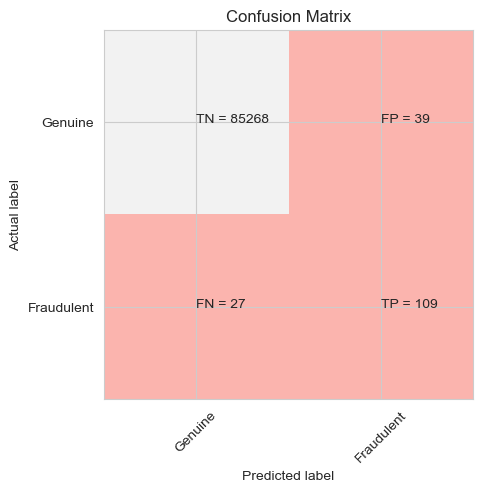

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.74      0.80      0.77       136

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443

gini tree_roc_value: 0.9005067079523851
Tree threshold: 1.0
ROC for the test dataset 90.1%


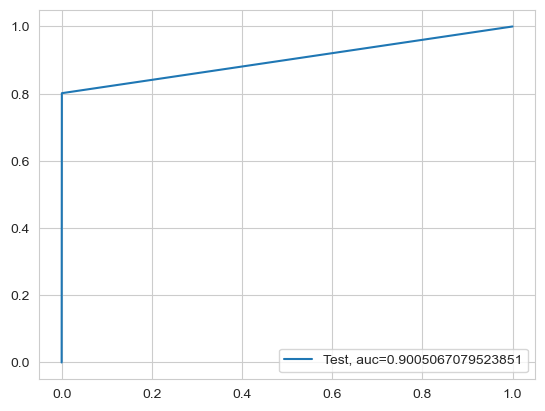

entropy score: 0.9992158515033414
Confusion Matrix


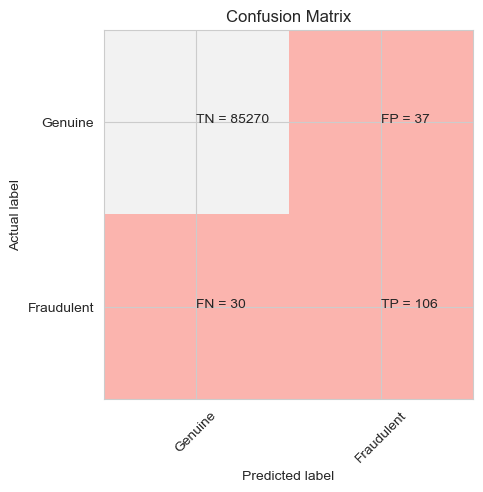

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.74      0.78      0.76       136

    accuracy                           1.00     85443
   macro avg       0.87      0.89      0.88     85443
weighted avg       1.00      1.00      1.00     85443

entropy tree_roc_value: 0.8894890185551285
Tree threshold: 1.0
ROC for the test dataset 88.9%


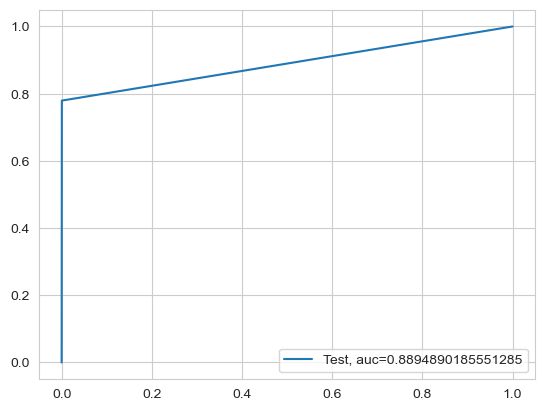

Time Elapsed: --- 17.501445770263672 seconds ---


In [42]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria- Power Transformer
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
Model_Perf_Results_df = DecisionTreeModels(Model_Perf_Results_df, "Power Transformer", X_train_df_pt, y_train, X_test_df_pt, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

In [43]:
#Function for Random Forest Model as the same will be used for further execution as well.
def RandomForestModels(df_Results, DataImabalance, X_train,y_train, X_test, y_test ):

  # Create the model with 100 trees
  RF_model = RandomForestClassifier(n_estimators=100, 
                                bootstrap = True,
                                max_features = 'sqrt', random_state=42)
  # Fit on training data
  RF_model.fit(X_train, y_train)
  RF_test_score = RF_model.score(X_test, y_test)
  RF_model.predict(X_test)

  print('Model Accuracy: {0}'.format(RF_test_score))


  # Actual class predictions
  rf_predictions = RF_model.predict(X_test)

  print("Confusion Matrix")
  confusion_matrix_plot(y_test, rf_predictions)
  print("Classification Report")
  print(classification_report(y_test, rf_predictions))

  # Probabilities for each class
  rf_probs = RF_model.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  roc_value = roc_auc_score(y_test, rf_probs)

  print("Random Forest roc_value: {0}" .format(roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Process': DataImabalance,'Model': 'Random Forest','Accuracy': RF_test_score,'ROC_Value': roc_value,'Threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

Random Forest Model
Model Accuracy: 0.999602073897218
Confusion Matrix


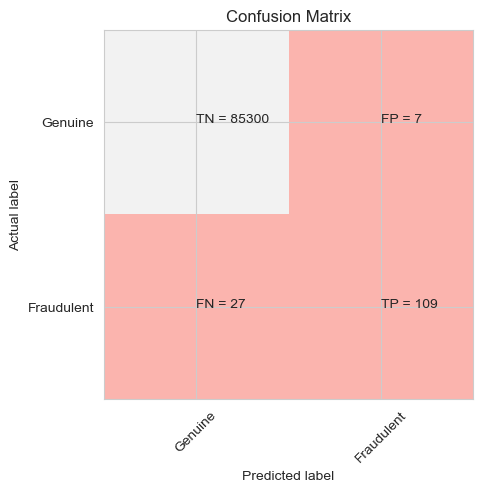

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.94      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Random Forest roc_value: 0.9545490198376935
Random Forest threshold: 0.02
ROC for the test dataset 95.5%


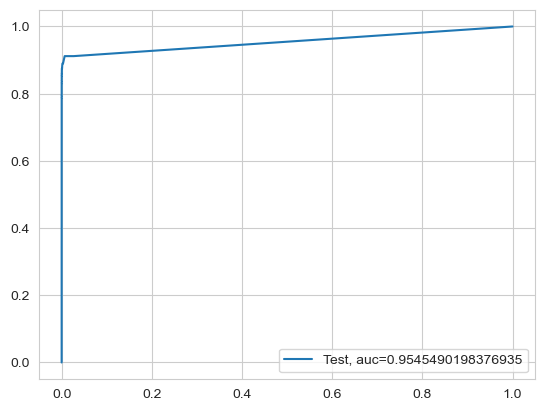

Time Elapsed: --- 107.02886819839478 seconds ---


In [44]:
#Run Random Forest Model- Power Transformer
print("Random Forest Model")
start_time = time.time()
Model_Perf_Results_df = RandomForestModels(Model_Perf_Results_df, "Power Transformer", X_train_df_pt, y_train, X_test_df_pt, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

In [45]:
#Function for XGBoost Model as the same will be used for further execution as well.
def XGBoostModels(df_Results, DataImabalance,X_train,y_train, X_test, y_test ):

  # fit model no training data
  XGBmodel = XGBClassifier(random_state=42)
  XGBmodel.fit(X_train, y_train)
  y_pred = XGBmodel.predict(X_test)

  XGB_test_score = XGBmodel.score(X_test, y_test)
  print('Model Accuracy: {0}'.format(XGB_test_score))

  print("Confusion Matrix")
  confusion_matrix_plot(y_test, y_pred)
  print("Classification Report")
  print(classification_report(y_test, y_pred))
  # Probabilities for each class
  XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

  # Calculate roc auc
  XGB_roc_value = roc_auc_score(y_test, XGB_probs)

  print("XGboost roc_value: {0}" .format(XGB_roc_value))
  fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
  threshold = thresholds[np.argmax(tpr-fpr)]
  print("XGBoost threshold: {0}".format(threshold))
  roc_auc = metrics.auc(fpr, tpr)
  print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
  plt.legend(loc=4)
  plt.show()
  
  df_Results = df_Results.append(pd.DataFrame({'Data_Imbalance_Handling_Process': DataImabalance,'Model': 'XGBoost','Accuracy': XGB_test_score,'ROC_Value': XGB_roc_value,'Threshold': threshold}, index=[0]),ignore_index= True)

  return df_Results

XGBoost Model
[18:48:59] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9996605924417448
Confusion Matrix


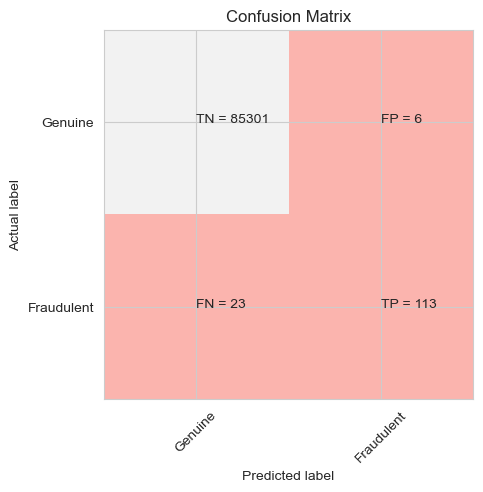

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.83      0.89       136

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443

XGboost roc_value: 0.9852486072793143
XGBoost threshold: 0.0004762945172842592
ROC for the test dataset 98.5%


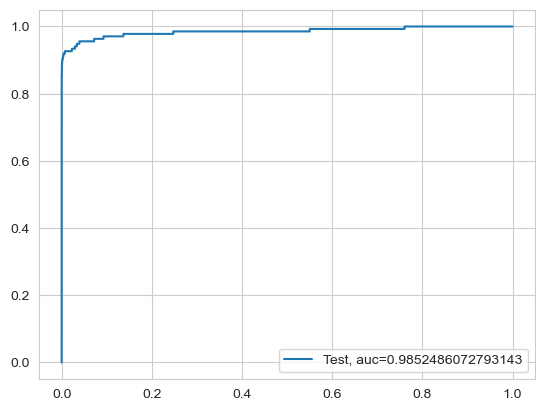

Time Elapsed: --- 14.300043821334839 seconds ---


In [46]:
#Run XGBoost Model- Power Transformer
print("XGBoost Model")
start_time = time.time()
Model_Perf_Results_df = XGBoostModels(Model_Perf_Results_df, "Power Transformer", X_train_df_pt, y_train, X_test_df_pt, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

In [47]:
Model_Perf_Results_df

Data_Imbalance_Handling_Process                                       Model  \
0               Power Transformer  Logistic Regression with L2 Regularisation   
1               Power Transformer  Logistic Regression with L1 Regularisation   
2               Power Transformer                                         KNN   
3               Power Transformer                                         SVM   
4               Power Transformer               Tree Model with gini criteria   
5               Power Transformer            Tree Model with entropy criteria   
6               Power Transformer                               Random Forest   
7               Power Transformer                                     XGBoost   

   Accuracy  ROC_Value  Threshold  
0  0.999228   0.985101   0.002730  
1  0.999204   0.988625   0.007539  
2  0.999450   0.937369   0.200000  
3  0.998853   0.889853   0.000849  
4  0.999228   0.900507   1.000000  
5  0.999216   0.889489   1.000000  
6  0.999602   0.954549   0.020000  
7  0.999661   0.985249   0.000476

#### XGBoost seems to be the best performing model from Power Transformer with Logistic Regression (L2) model very close after taking both Accruracy and ROC Value under consideration.

In [48]:
#Lets perfrom RepeatedKFold and check the results
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]


TRAIN: [     1      2      3 ... 284803 284804 284805] TEST: [     0      8     11 ... 284785 284797 284806]
TRAIN: [     0      1      3 ... 284804 284805 284806] TEST: [     2      4      6 ... 284784 284786 284803]
TRAIN: [     0      2      4 ... 284803 284804 284806] TEST: [     1      3     19 ... 284798 284800 284805]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     5      7     12 ... 284794 284799 284804]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    13     15     23 ... 284789 284801 284802]
TRAIN: [     0      1      2 ... 284799 284802 284804] TEST: [     4      7      9 ... 284803 284805 284806]
TRAIN: [     0      1      2 ... 284803 284805 284806] TEST: [     3      5      8 ... 284780 284785 284804]
TRAIN: [     0      3      4 ... 284804 284805 284806] TEST: [     1      2     11 ... 284790 284793 284802]
TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0      6     14 ... 284767 284798 284799]
TRAIN: [     0     

#### Let's run all the models again with KFold cross validation

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9849122669655983
Max auc_roc for l1: 0.9524051408152696
Parameters for l2 regularisation
Coefficient: [[ 2.37213899e-03  4.47214684e-02 -9.08194253e-02  2.37904287e-01
   9.06497924e-02 -5.02892502e-02 -3.58814892e-02 -1.17064874e-01
  -7.85899917e-02 -1.74598786e-01  1.35877953e-01 -2.00002435e-01
  -4.99757880e-02 -3.77616436e-01 -1.33601093e-02 -9.84427656e-02
  -8.26983508e-02  1.13654207e-04  4.63564207e-03 -1.34804719e-02
   5.40036426e-02  2.88052798e-02 -8.68731165e-03 -1.20533817e-02
  -1.54727656e-02  5.40661089e-03 -1.10326218e-02 -1.08969274e-03
   3.53618437e-04  4.62629849e-03  4.77837854e-03 -1.23498244e-06]]
Intercept: [-7.47792031]
Score: {1: array([[0.63439274, 0.63648644, 0.65981354, 0.81334023, 0.96045293,
        0.98863378, 0.99498276, 0.99401239, 0.9909598 , 0.98499227,
        0.98499227, 0.98499227, 0.98499227, 0.98499227, 0.98499227,
        0.98499227, 0.98499227, 0.98499227, 0.98499227, 

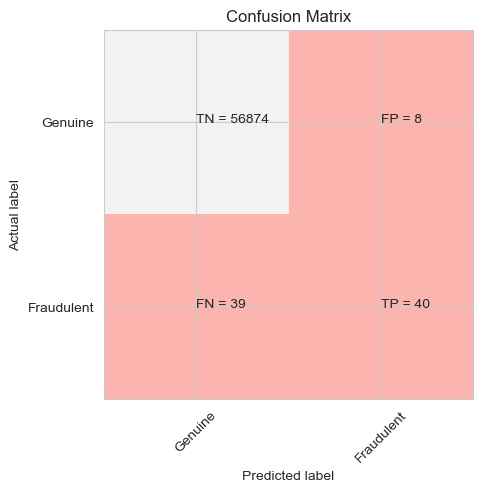

Classification Report with l2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.83      0.51      0.63        79

    accuracy                           1.00     56961
   macro avg       0.92      0.75      0.81     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9992275416513052
Confusion Matrix with l1


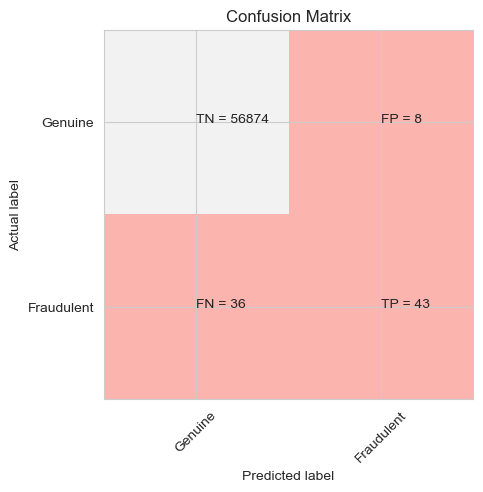

classification Report with l1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.84      0.54      0.66        79

    accuracy                           1.00     56961
   macro avg       0.92      0.77      0.83     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9721542130967107
l2 threshold: 0.0021045710475341133
ROC for the test dataset 97.2%


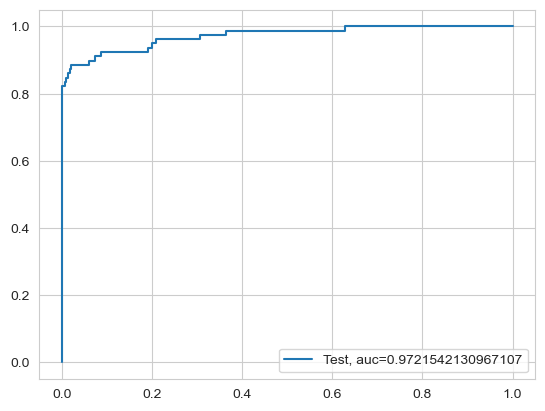

l1 roc_value: 0.8878230705448855
l1 threshold: 0.037429370799110954
ROC for the test dataset 88.8%


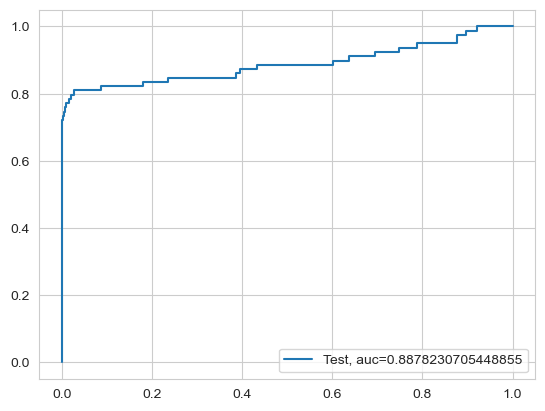

Time Elapsed: --- 89.55426287651062 seconds ---


In [49]:
#Run Logistic Regression with L1 And L2 Regularisation - Kfold cross validation
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
Model_Perf_Results_df = LogisticModels(Model_Perf_Results_df, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

KNN Model
model score
0.9992977651375503
Confusion Matrix


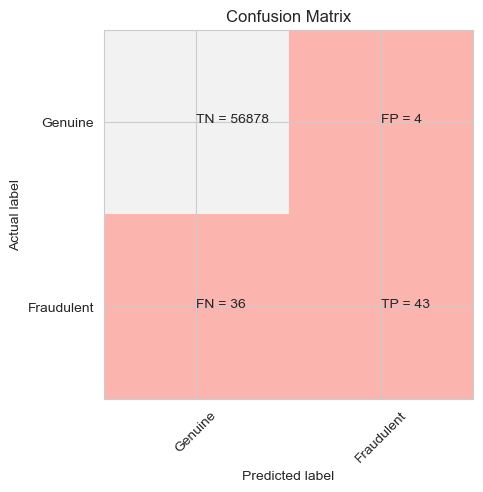

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.91      0.54      0.68        79

    accuracy                           1.00     56961
   macro avg       0.96      0.77      0.84     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.8415735395371009
KNN threshold: 0.2
ROC for the test dataset 84.2%


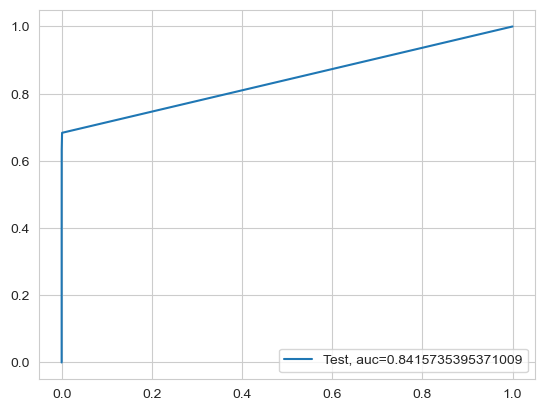

Time Elapsed: --- 1011.3179969787598 seconds ---


In [50]:
#Run KNN Model - Kfold cross validation
print("KNN Model")
start_time = time.time()
Model_Perf_Results_df = KNNModels(Model_Perf_Results_df, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

SVM Model with Sigmoid Kernel
Accuracy_Score : 0.9986657537613455
Confusion Matrix


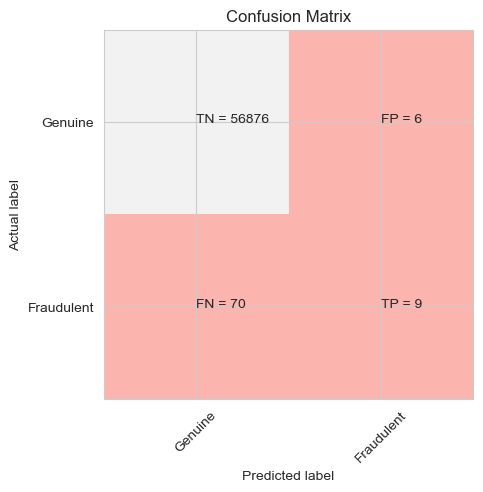

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.60      0.11      0.19        79

    accuracy                           1.00     56961
   macro avg       0.80      0.56      0.60     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.4855252200981023
SVM threshold: 0.0018280485063910154
ROC for the test dataset 48.6%


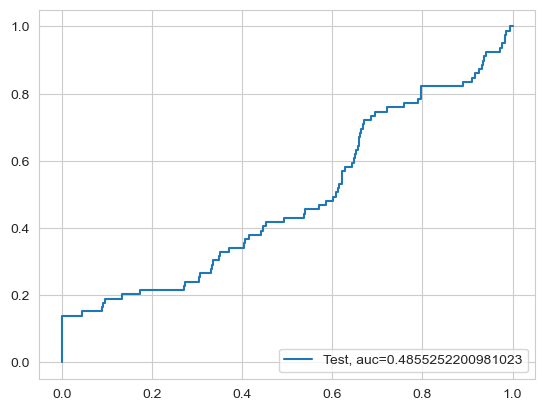

Time Elapsed: --- 2274.9775228500366 seconds ---


In [51]:
#Run SVM Model with Sigmoid Kernel - Kfold cross validation
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
Model_Perf_Results_df = SVMModels(Model_Perf_Results_df, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9992099857797441
Confusion Matrix


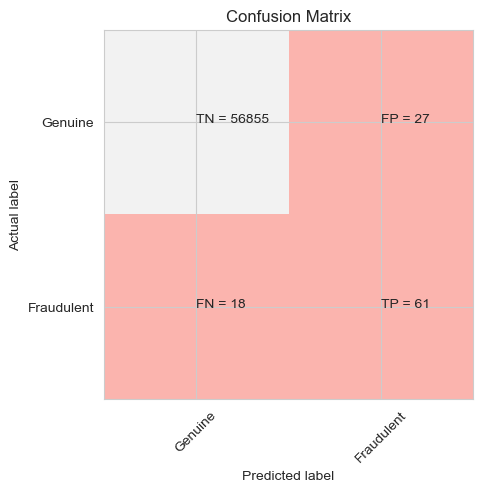

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.69      0.77      0.73        79

    accuracy                           1.00     56961
   macro avg       0.85      0.89      0.87     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.885838615939994
Tree threshold: 1.0
ROC for the test dataset 88.6%


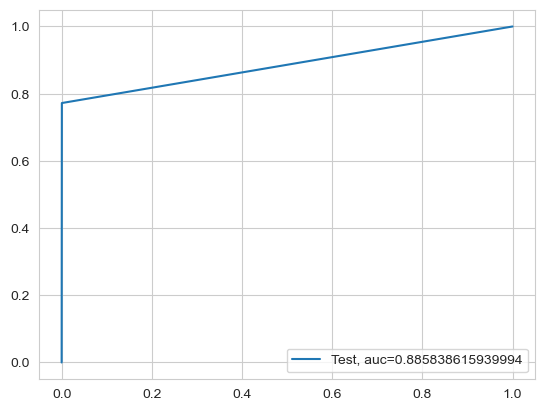

entropy score: 0.9993679886237953
Confusion Matrix


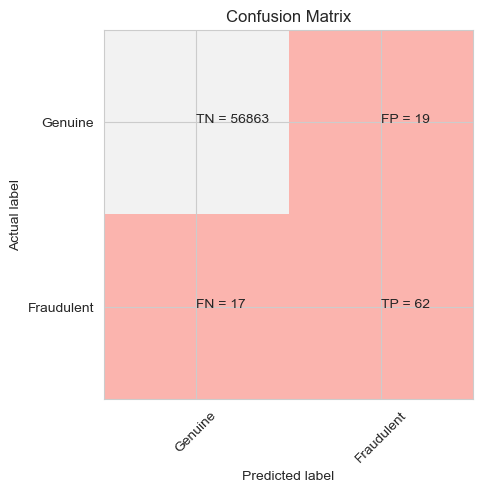

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.77      0.78      0.77        79

    accuracy                           1.00     56961
   macro avg       0.88      0.89      0.89     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8922380508794799
Tree threshold: 1.0
ROC for the test dataset 89.2%


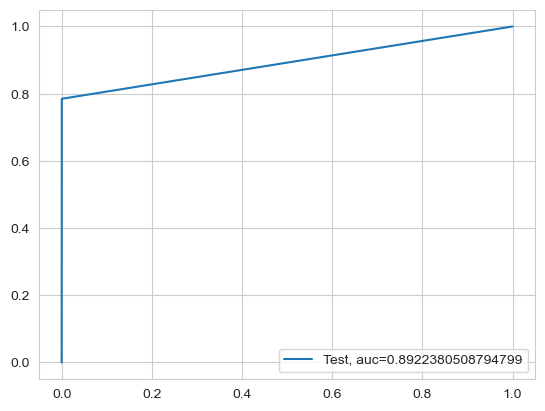

Time Elapsed: --- 19.77302384376526 seconds ---


In [52]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria - Kfold cross validation
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
Model_Perf_Results_df = DecisionTreeModels(Model_Perf_Results_df, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Model Accuracy: 0.9996664384403364
Confusion Matrix


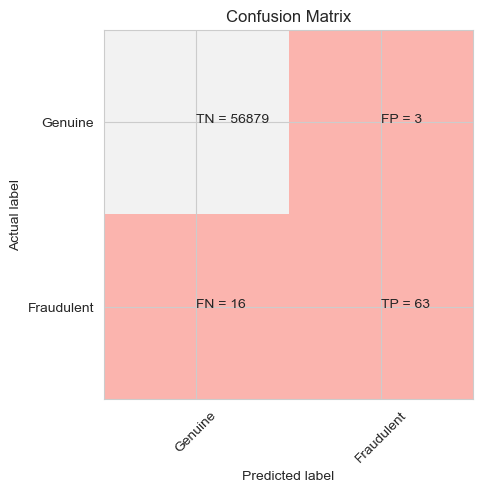

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.95      0.80      0.87        79

    accuracy                           1.00     56961
   macro avg       0.98      0.90      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9411899339472031
Random Forest threshold: 0.01
ROC for the test dataset 94.1%


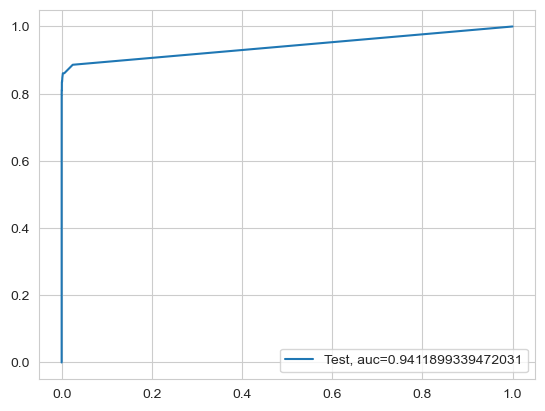

Time Elapsed: --- 116.67998480796814 seconds ---


In [53]:
#Run Random Forest Model - Kfold cross validation
print("Random Forest Model")
start_time = time.time()
Model_Perf_Results_df = RandomForestModels(Model_Perf_Results_df, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
[19:47:47] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9997015501834589
Confusion Matrix


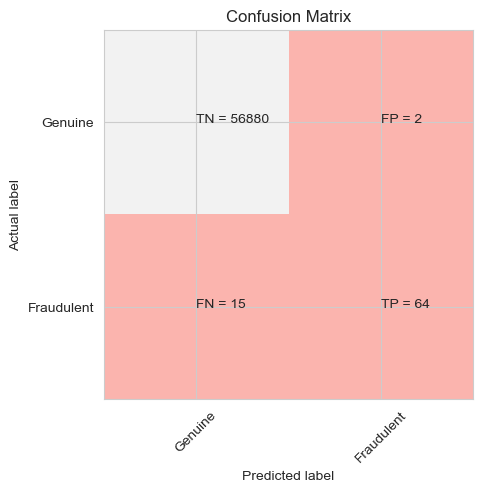

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56882
           1       0.97      0.81      0.88        79

    accuracy                           1.00     56961
   macro avg       0.98      0.91      0.94     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9591216816158166
XGBoost threshold: 9.989992395276204e-05
ROC for the test dataset 95.9%


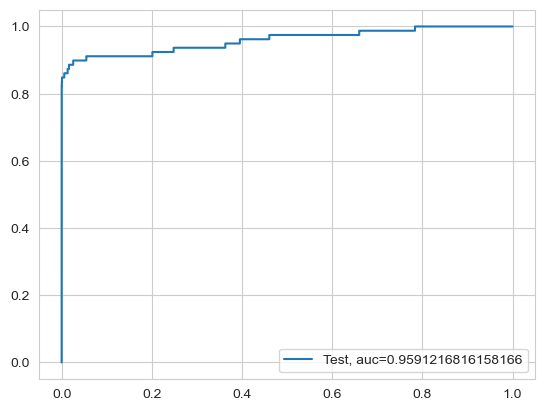

Time Elapsed: --- 16.116786003112793 seconds ---


In [54]:
#Run XGBoost Model - Kfold cross validation
print("XGBoost Model")
start_time = time.time()
Model_Perf_Results_df = XGBoostModels(Model_Perf_Results_df, "RepeatedKFold Cross Validation", X_train_cv, y_train_cv, X_test_cv, y_test_cv)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

In [55]:
Model_Perf_Results_df

Data_Imbalance_Handling_Process  \
0                Power Transformer   
1                Power Transformer   
2                Power Transformer   
3                Power Transformer   
4                Power Transformer   
5                Power Transformer   
6                Power Transformer   
7                Power Transformer   
8   RepeatedKFold Cross Validation   
9   RepeatedKFold Cross Validation   
10  RepeatedKFold Cross Validation   
11  RepeatedKFold Cross Validation   
12  RepeatedKFold Cross Validation   
13  RepeatedKFold Cross Validation   
14  RepeatedKFold Cross Validation   
15  RepeatedKFold Cross Validation   

                                         Model  Accuracy  ROC_Value  Threshold  
0   Logistic Regression with L2 Regularisation  0.999228   0.985101   0.002730  
1   Logistic Regression with L1 Regularisation  0.999204   0.988625   0.007539  
2                                          KNN  0.999450   0.937369   0.200000  
3                                          SVM  0.998853   0.889853   0.000849  
4                Tree Model with gini criteria  0.999228   0.900507   1.000000  
5             Tree Model with entropy criteria  0.999216   0.889489   1.000000  
6                                Random Forest  0.999602   0.954549   0.020000  
7                                      XGBoost  0.999661   0.985249   0.000476  
8   Logistic Regression with L2 Regularisation  0.999175   0.972154   0.002105  
9   Logistic Regression with L1 Regularisation  0.999228   0.887823   0.037429  
10                                         KNN  0.999298   0.841574   0.200000  
11                                         SVM  0.998666   0.485525   0.001828  
12               Tree Model with gini criteria  0.999210   0.885839   1.000000  
13            Tree Model with entropy criteria  0.999368   0.892238   1.000000  
14                               Random Forest  0.999666   0.941190   0.010000  
15                                     XGBoost  0.999702   0.959122   0.000100

#### We're getting similar results with KFold as well. Accuracy of XGBoost model is highest and ROC Value of LogReg L2 model is highest. 

In [56]:
#Let's perform all models again with Stratified K Fold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_SKF_cv, X_test_SKF_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_SKF_cv, y_test_SKF_cv = y.iloc[train_index], y.iloc[test_index]

TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9819962901922825
Max auc_roc for l1: 0.9516522685001
Parameters for l2 regularisation
Coefficient: [[ 7.08022923e-03  6.16026328e-02 -6.76837770e-02  2.18293069e-01
   5.42925773e-02 -3.19923456e-02 -2.27838896e-02 -1.15015216e-01
  -6.95353676e-02 -1.63720683e-01  1.27823634e-01 -1.91981550e-01
  -3.69483686e-02 -3.60527409e-01  3.40609789e-03 -8.80269874e-02
  -7.30349913e-02 -7.08030488e-04  4.00820079e-03 -2.80235433e-02
   3.83015411e-02  2.35729083e-02 -1.16414263e-02 -9.99295644e-03
  -6.68457138e-03  6.28909705e-03 -1.03700946e-02 -1.77117707e-03
   3.99522591e-04 -9.55176355e-03  1.09468277e-04 -4.39301044e-04]]
Intercept: [-7.40811494]
Score: {1: array([[0.69228515, 0.69406737, 0.71403594, 0.83610981, 0.95559433,
        0.97034813, 0.9899571 , 0.99371205, 0.99091528, 0.98884447,
        0.98884447, 0.98817036, 0.98817036, 0.98817036, 0.98817036,
        0.98817036, 0.98817036, 0.98817036, 0.98817036, 0.9

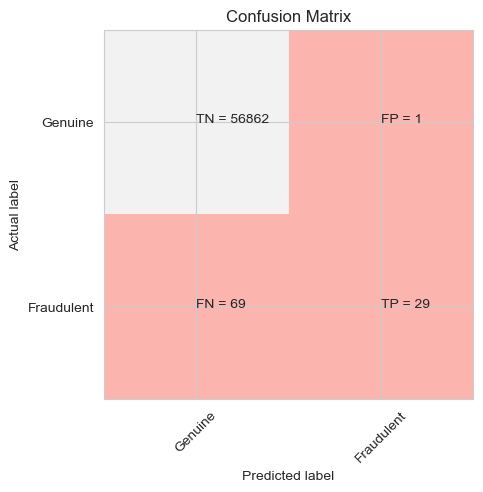

Classification Report with l2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.98      0.65      0.73     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.998490195045733
Confusion Matrix with l1


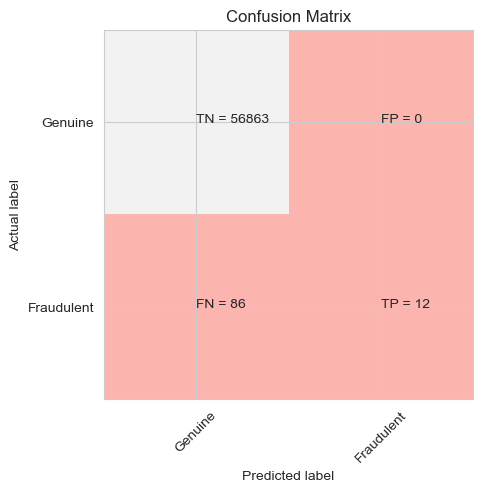

classification Report with l1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      0.12      0.22        98

    accuracy                           1.00     56961
   macro avg       1.00      0.56      0.61     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9833222492873132
l2 threshold: 0.0015657592695017826
ROC for the test dataset 98.3%


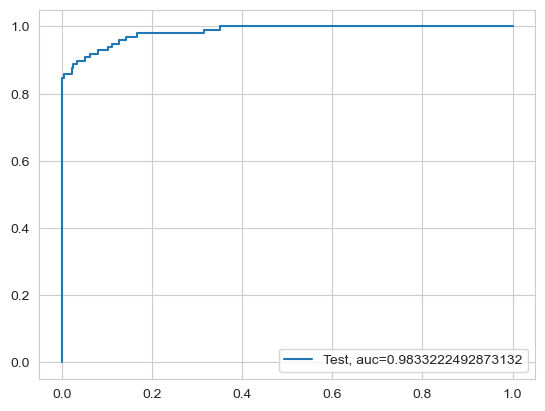

l1 roc_value: 0.9423200122600435
l1 threshold: 0.004608814818473005
ROC for the test dataset 94.2%


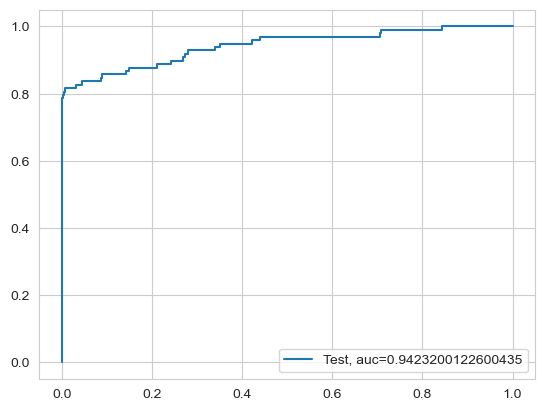

Time Elapsed: --- 86.342768907547 seconds ---


In [57]:
#Run Logistic Regression with L1 And L2 Regularisation - Stratified KFold
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
Model_Perf_Results_df = LogisticModels(Model_Perf_Results_df, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

KNN Model
model score
0.9989642035778866
Confusion Matrix


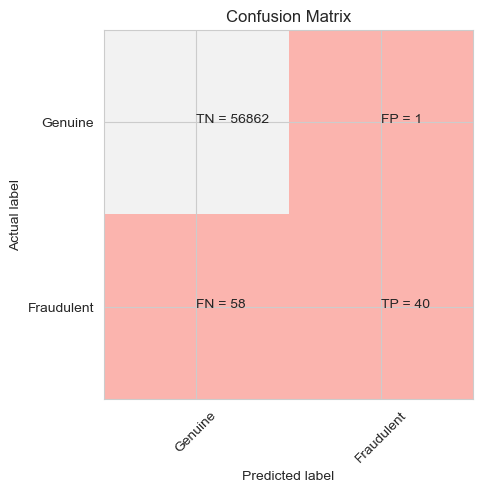

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.41      0.58        98

    accuracy                           1.00     56961
   macro avg       0.99      0.70      0.79     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.7853639090301896
KNN threshold: 0.2
ROC for the test dataset 78.5%


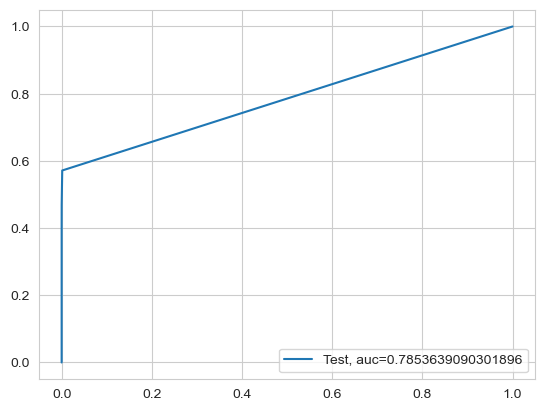

Time Elapsed: --- 1998.2146308422089 seconds ---


In [58]:
#Run KNN Model - Stratified KFold
print("KNN Model")
start_time = time.time()
Model_Perf_Results_df = KNNModels(Model_Perf_Results_df, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

SVM Model with Sigmoid Kernel
Accuracy_Score : 0.9982795245869981
Confusion Matrix


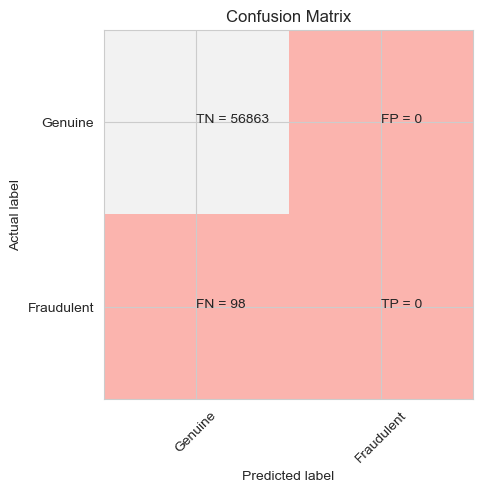

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc_value: 0.4020152984958118
SVM threshold: 0.0023527495287796406
ROC for the test dataset 40.2%


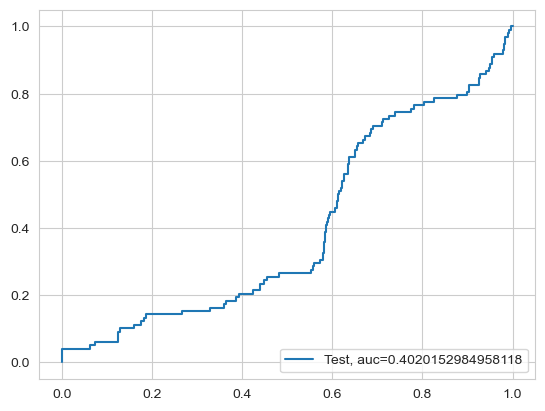

Time Elapsed: --- 575.2701327800751 seconds ---


In [59]:
#Run SVM Model with Sigmoid Kernel - Stratified KFold
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
Model_Perf_Results_df = SVMModels(Model_Perf_Results_df, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9988588683485191
Confusion Matrix


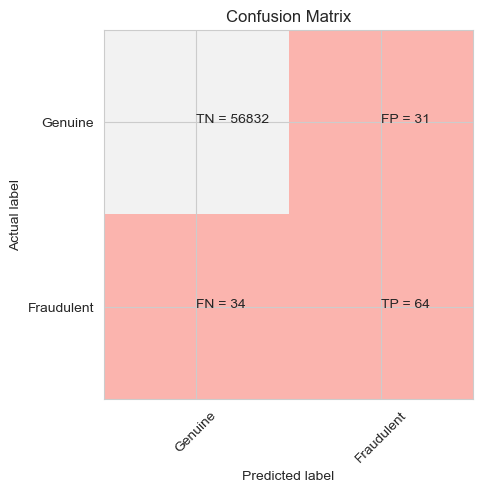

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.84      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.826258027259934
Tree threshold: 1.0
ROC for the test dataset 82.6%


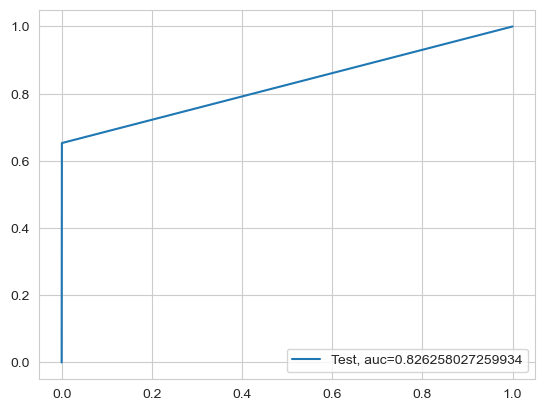

entropy score: 0.9989817594494479
Confusion Matrix


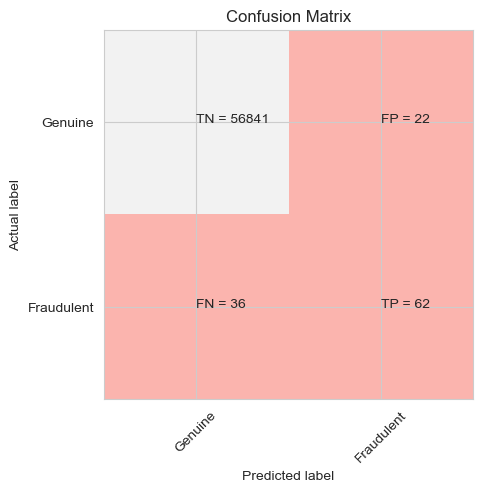

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.74      0.63      0.68        98

    accuracy                           1.00     56961
   macro avg       0.87      0.82      0.84     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8161330832035609
Tree threshold: 1.0
ROC for the test dataset 81.6%


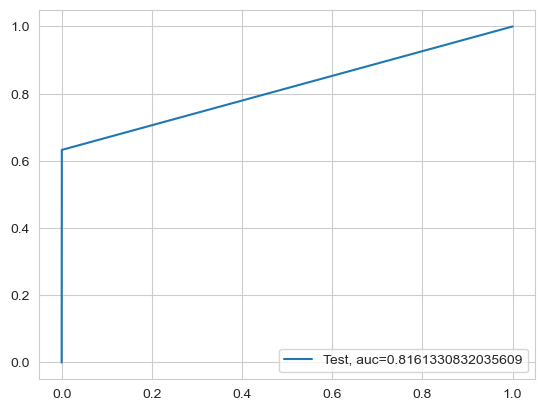

Time Elapsed: --- 19.206278085708618 seconds ---


In [60]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria - Stratified KFold
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
Model_Perf_Results_df = DecisionTreeModels(Model_Perf_Results_df, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


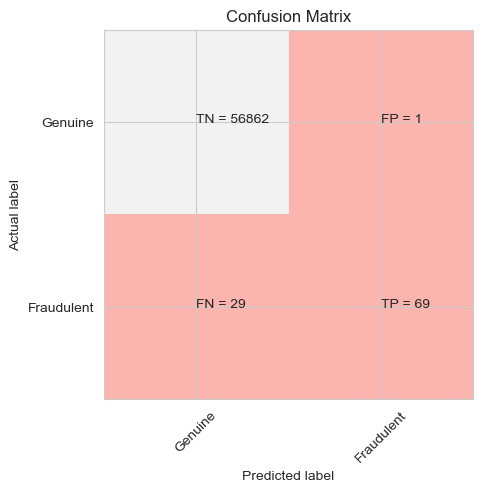

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.70      0.82        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9310630957973819
Random Forest threshold: 0.01
ROC for the test dataset 93.1%


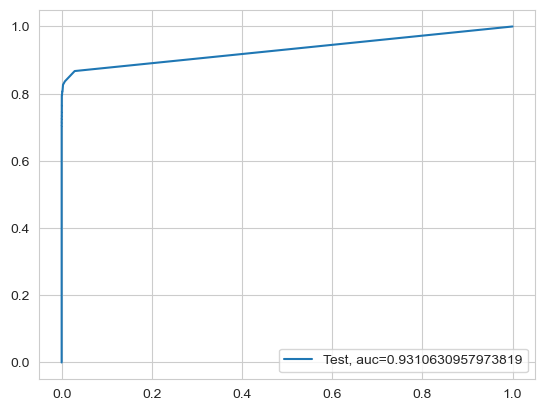

Time Elapsed: --- 114.75825595855713 seconds ---


In [61]:
#Run Random Forest Model - Stratified KFold
print("Random Forest Model")
start_time = time.time()
Model_Perf_Results_df = RandomForestModels(Model_Perf_Results_df, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
[20:34:37] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9994557679816014
Confusion Matrix


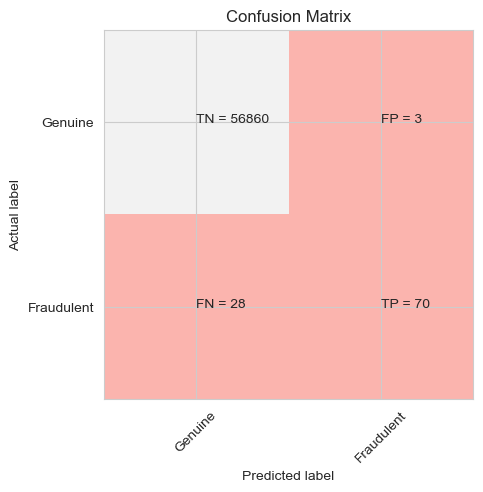

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.71      0.82        98

    accuracy                           1.00     56961
   macro avg       0.98      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9767481777720673
XGBoost threshold: 0.00014430815645027906
ROC for the test dataset 97.7%


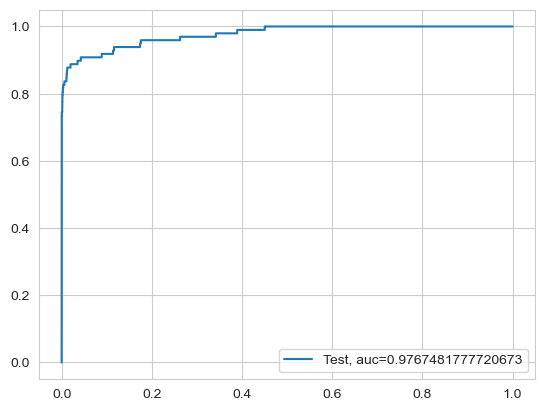

Time Elapsed: --- 16.140626907348633 seconds ---


In [62]:
#Run XGBoost Model - Stratified KFold
print("XGBoost Model")
start_time = time.time()
Model_Perf_Results_df = XGBoostModels(Model_Perf_Results_df, "StratifiedKFold Cross Validation", X_train_SKF_cv, y_train_SKF_cv, X_test_SKF_cv, y_test_SKF_cv)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

In [63]:
Model_Perf_Results_df

Data_Imbalance_Handling_Process  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Validation   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
15    RepeatedKFold Cross Validation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   

                                         Model  Accuracy  ROC_Value  Threshold  
0   Logistic Regression with L2 Regularisation  0.999228   0.985101   0.002730  
1   Logistic Regression with L1 Regularisation  0.999204   0.988625   0.007539  
2                                          KNN  0.999450   0.937369   0.200000  
3                                          SVM  0.998853   0.889853   0.000849  
4                Tree Model with gini criteria  0.999228   0.900507   1.000000  
5             Tree Model with entropy criteria  0.999216   0.889489   1.000000  
6                                Random Forest  0.999602   0.954549   0.020000  
7                                      XGBoost  0.999661   0.985249   0.000476  
8   Logistic Regression with L2 Regularisation  0.999175   0.972154   0.002105  
9   Logistic Regression with L1 Regularisation  0.999228   0.887823   0.037429  
10                                         KNN  0.999298   0.841574   0.200000  
11                                         SVM  0.998666   0.485525   0.001828  
12               Tree Model with gini criteria  0.999210   0.885839   1.000000  
13            Tree Model with entropy criteria  0.999368   0.892238   1.000000  
14                               Random Forest  0.999666   0.941190   0.010000  
15                                     XGBoost  0.999702   0.959122   0.000100  
16  Logistic Regression with L2 Regularisation  0.998771   0.983322   0.001566  
17  Logistic Regression with L1 Regularisation  0.998490   0.942320   0.004609  
18                                         KNN  0.998964   0.785364   0.200000  
19                                         SVM  0.998280   0.402015   0.002353  
20               Tree Model with gini criteria  0.998859   0.826258   1.000000  
21            Tree Model with entropy criteria  0.998982   0.816133   1.000000  
22                               Random Forest  0.999473   0.931063   0.010000  
23                                     XGBoost  0.999456   0.976748   0.000144

#### Athough accuracy of Random Forest is highest, ROC Value is not great compared to other models. It is evident that XGBoost model has the best optimal performance while balancing best of Accuracy and ROC Value.

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [64]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
              'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[20:34:53] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:34:58] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:35:03] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with t

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [65]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.820037      0.124966         0.044211        0.002427   
1       7.001648      0.023257         0.046204        0.002005   
2       8.115998      0.050168         0.045317        0.002106   
3       4.722068      0.153890         0.044707        0.001594   
4       6.657528      0.030949         0.045337        0.001609   
5     365.347857    505.511193         0.049750        0.001800   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.975453   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.974641   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.979162   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.960563   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.982306   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.974989   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.966899           0.984371         0.975574        0.007133   
1           0.972622           0.984088         0.977117        0.004998   
2           0.977585           0.985608         0.980785        0.003471   
3           0.958297           0.978673         0.965844        0.009118   
4           0.965061           0.974821         0.974063        0.007061   
5           0.976352           0.981648         0.977663        0.002872   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999913            0.999750   
1                3            0.999940            0.999974   
2                1            0.999947            0.999929   
3                6            1.000000            0.999999   
4                5            1.000000            1.000000   
5                2            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.999780          0.999815         0.000071  
1            0.999929          0.999948         0.000019  
2            0.999869          0.999915         0.000033  
3            0.999967          0.999989         0.000015  
4            1.000000          1.000000         0.000000  
5            1.000000          1.000000         0.000000

In [66]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.980785169444003
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [67]:
# Printing best params
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [68]:
# Printing best params
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[20:54:57] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:54:57] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [69]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

print("Classification Report")
print(classification_report(y_train, y_train_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       1.00      1.00      1.00       356

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364



XGboost roc_value: 1.0
XGBoost threshold: 0.865760326385498
ROC for the test dataset 100.0%


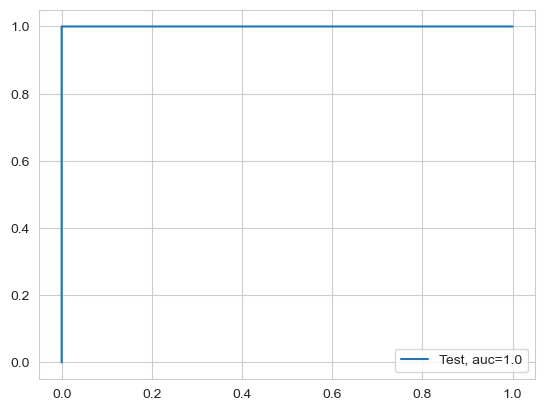

In [70]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_train, y_train_pred_proba_imb_xgb)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

XGboost roc_value: 0.9154060093682403
XGBoost threshold: 1
ROC for the test dataset 91.5%


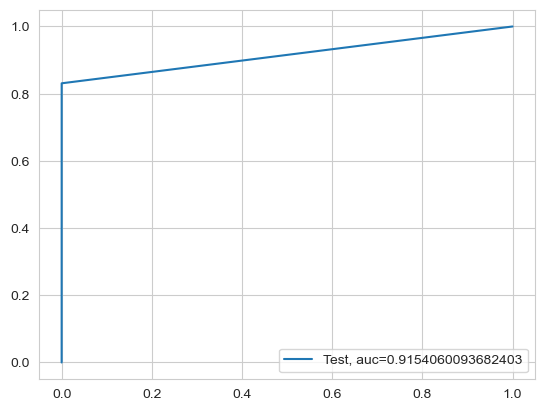

In [71]:
# Prediction on test set
y_test_pred = xgb_imb_model.predict(X_test)

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, y_test_pred)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

#### While ROC Value of Train dataset achieved 1, we got .92 for test dataset which is not a major deviation from train. We can say it's a good model.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


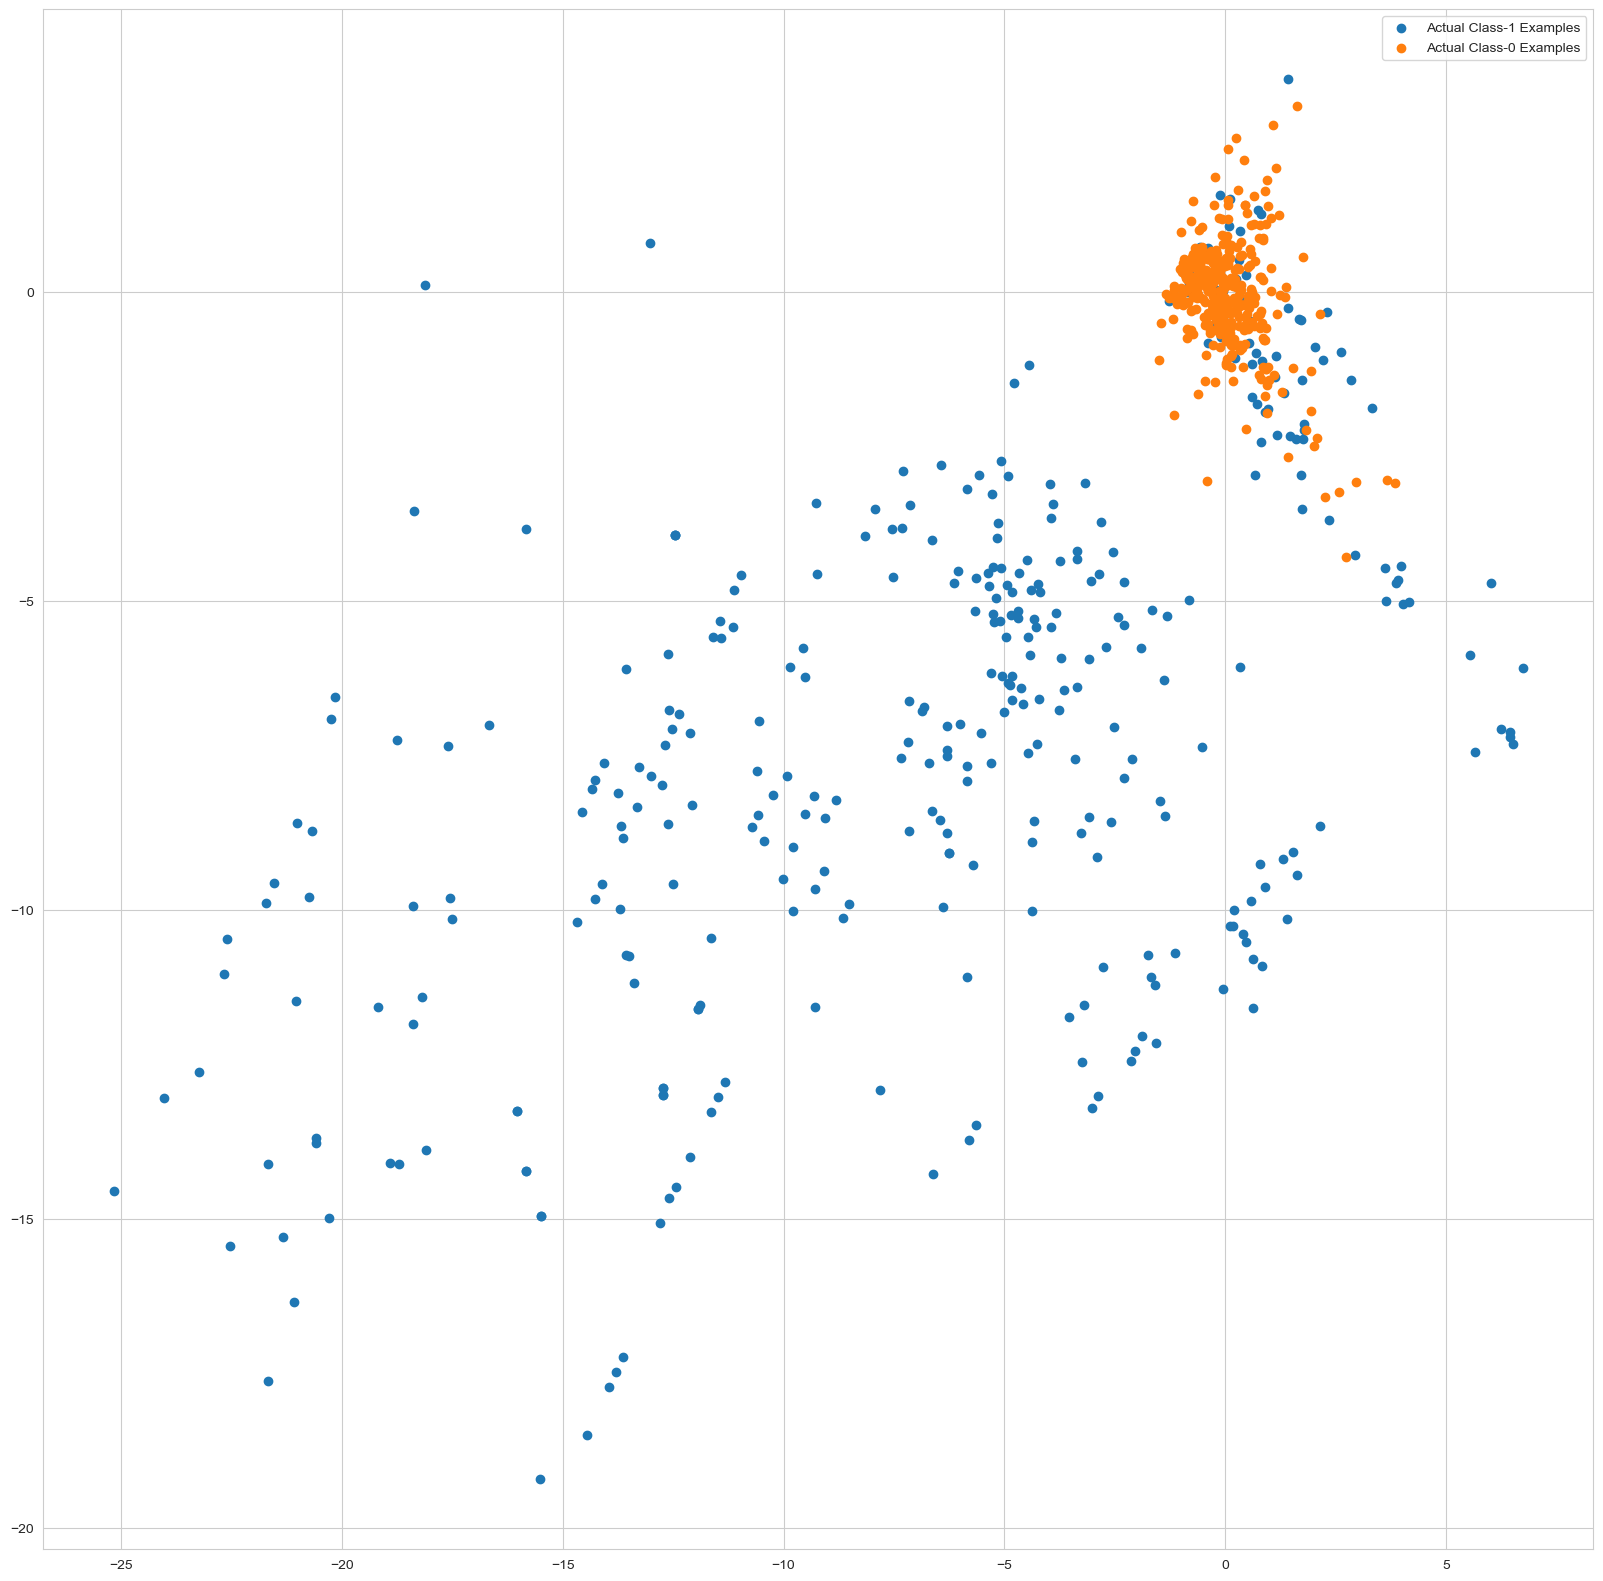

In [72]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

plt.show()

In [73]:
#Let's try using undersampling
#Define Undersampler
RUS = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_Under, y_Under = RUS.fit_resample(X_train, y_train)
#Create Dataframe
X_Under = pd.DataFrame(data=X_Under, columns=var)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9730593221602224
Max auc_roc for l1: 0.5
Parameters for l2 regularisation
Coefficient: [[ 0.2046071  -0.05297375 -0.15922824  0.75124933  0.47920897 -0.29109744
  -0.01323592 -0.25099271 -0.17617267 -0.44437891  0.29208109 -0.80022566
  -0.16367872 -1.06944721 -0.23759333 -0.58307946 -0.24260703  0.09225002
   0.07156748 -0.37116617  0.14645848  0.50316059  0.056612   -0.33669185
   0.11210037 -0.14918857  0.34427099  0.25844006  0.50533676 -1.21803517
  -0.01698754 -0.00901343]]
Intercept: [-2.73545651]
Score: {1: array([[0.94876453, 0.94876453, 0.94876453, 0.94876453, 0.94876453,
        0.94876453, 0.96438953, 0.984375  , 0.98401163, 0.98546512,
        0.98546512, 0.98546512, 0.98546512, 0.98546512, 0.98546512,
        0.98546512, 0.98546512, 0.98546512, 0.98546512, 0.98546512],
       [0.90097259, 0.90097259, 0.90097259, 0.9005305 , 0.8938992 ,
        0.91467728, 0.98983201, 0.98938992, 0.99071618, 0.99115827

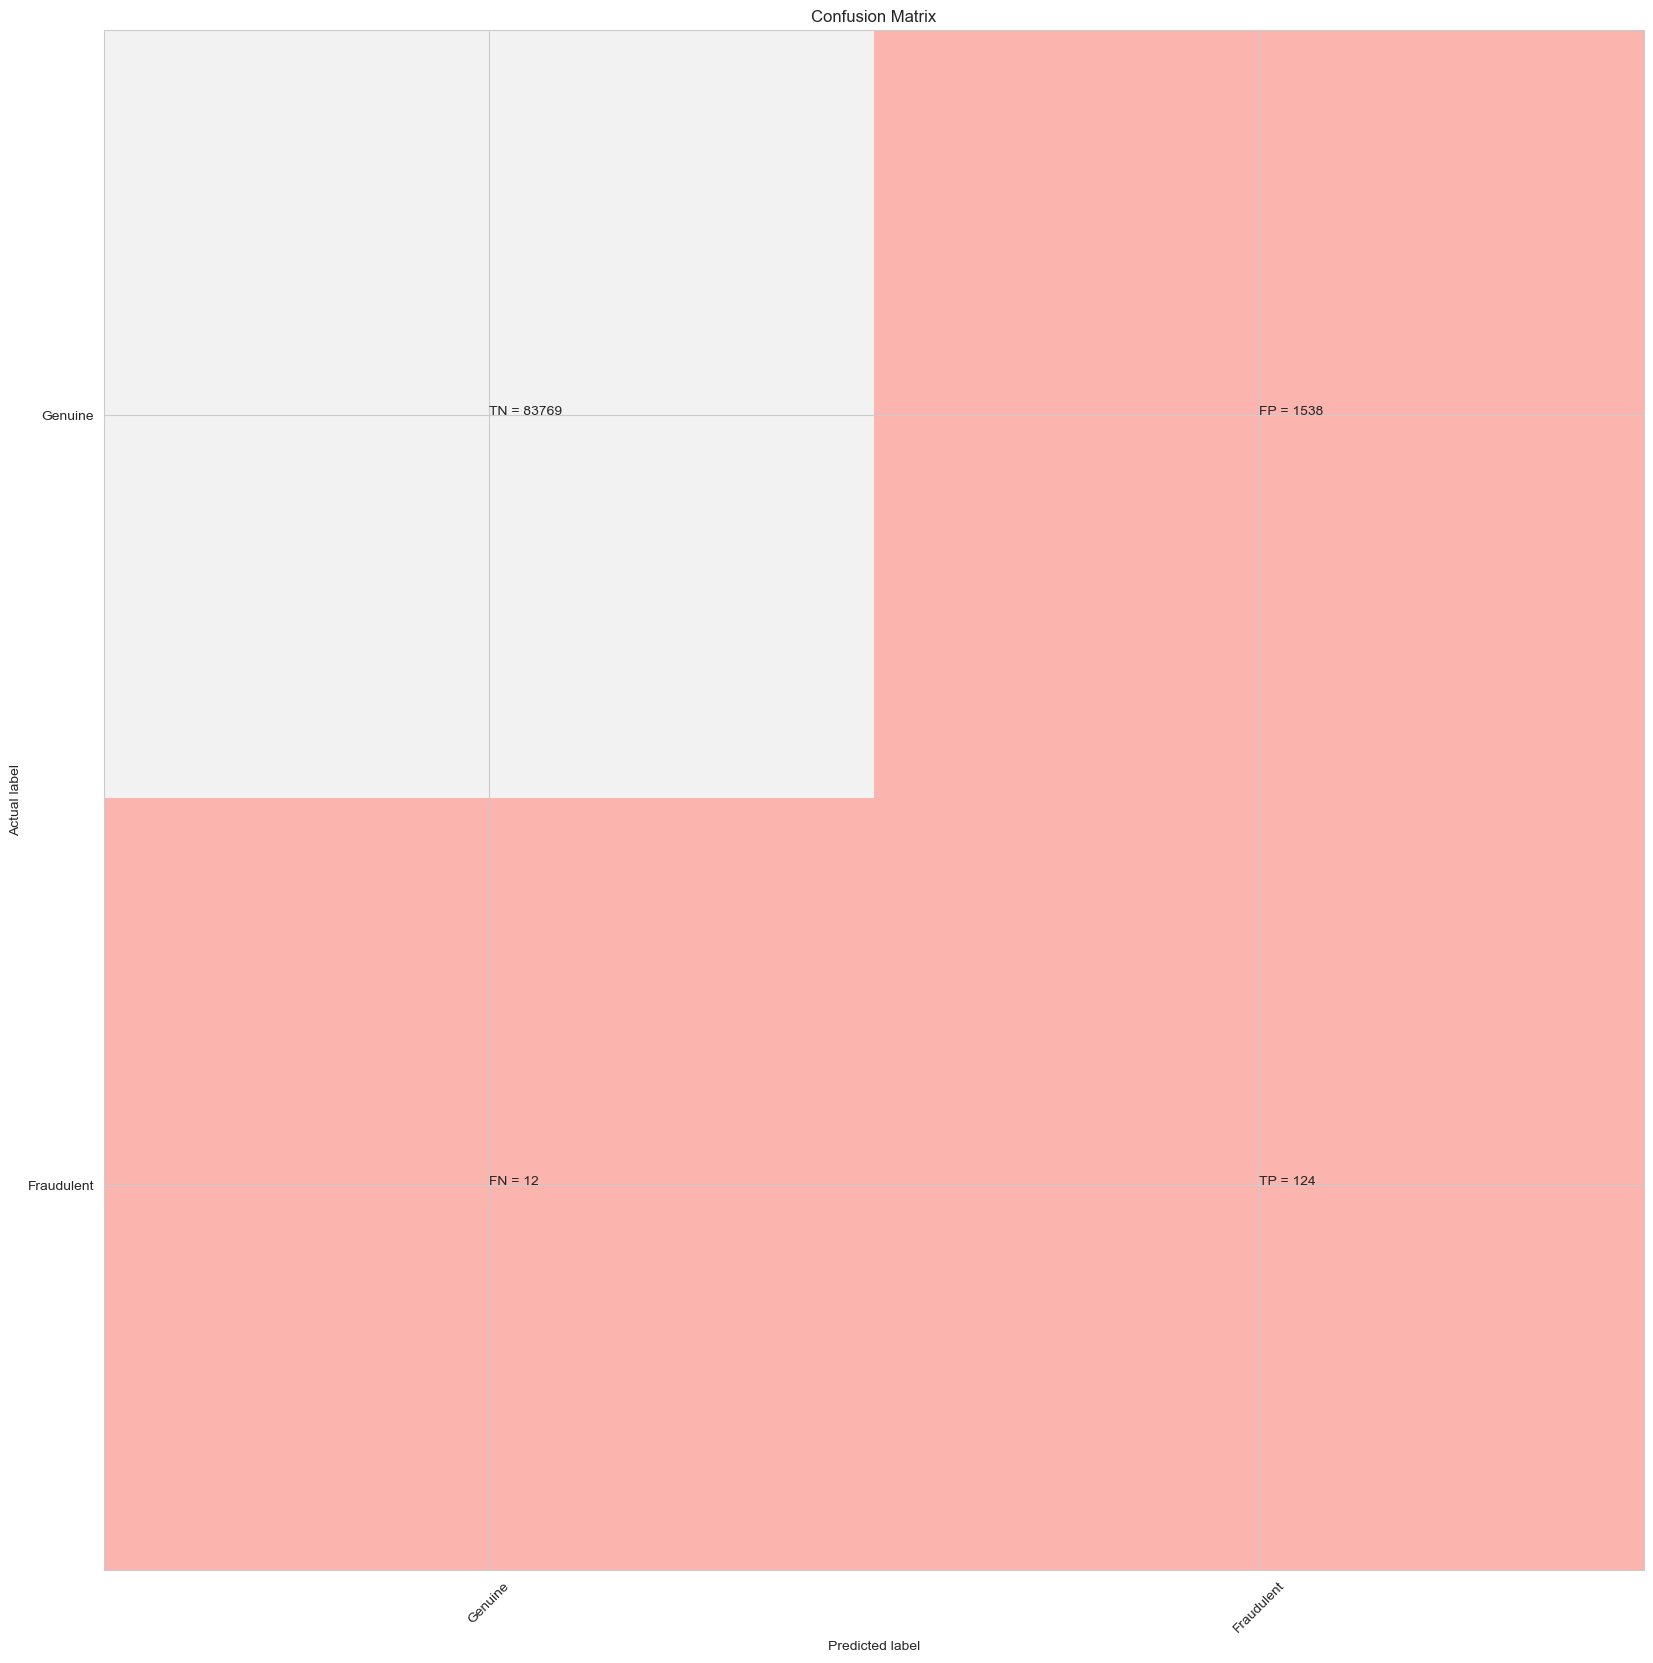

Classification Report with l2
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.07      0.91      0.14       136

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy of Logistic model with l1 regularisation : 0.9984082955888721
Confusion Matrix with l1


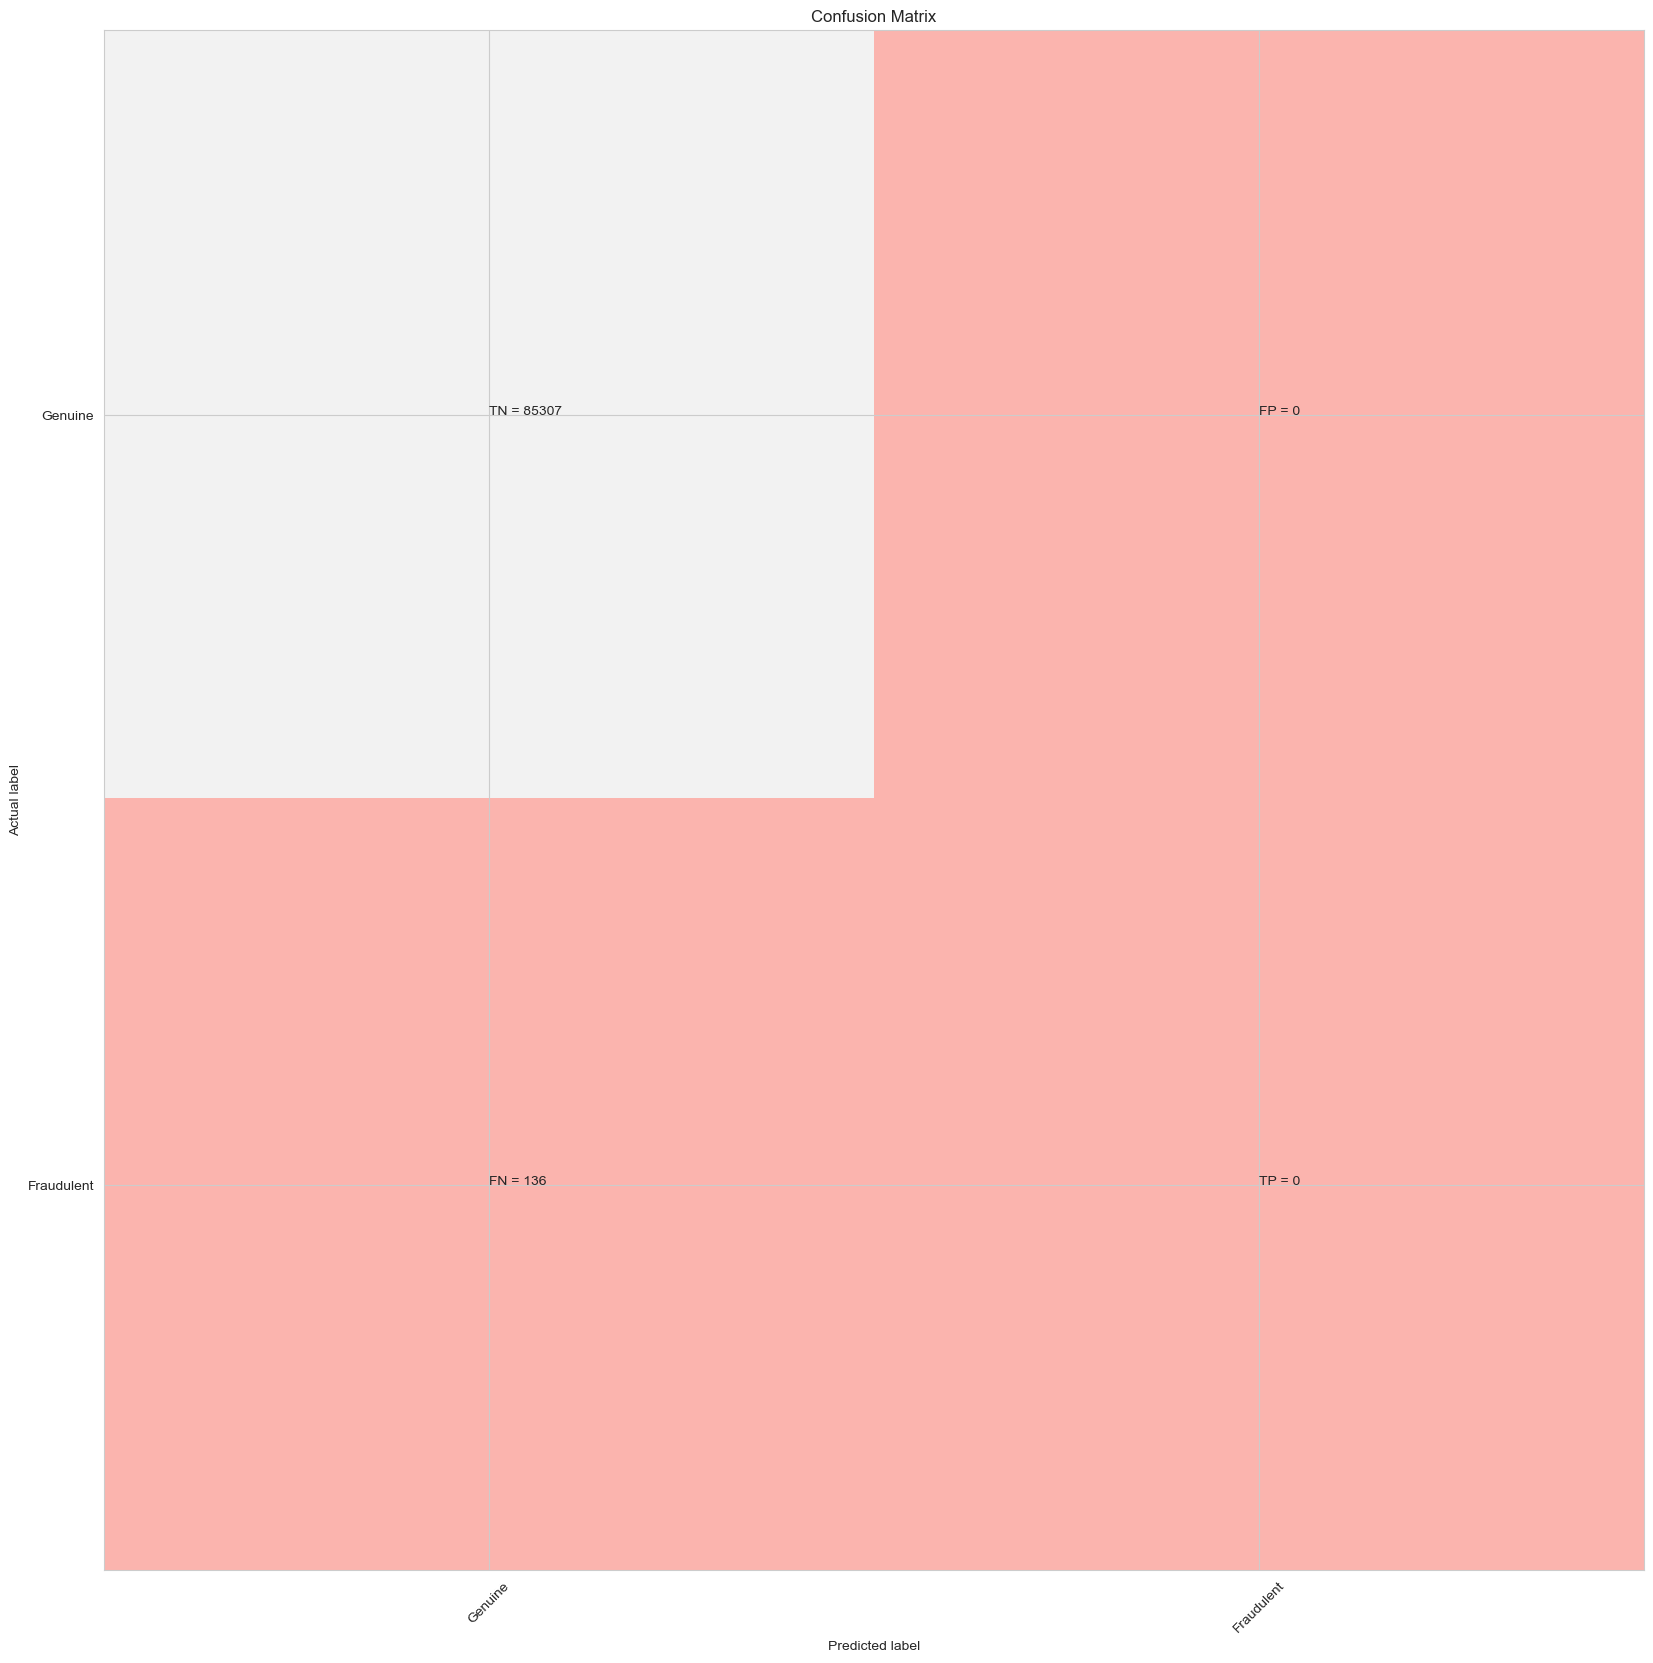

classification Report with l1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

l2 roc_value: 0.9859017844891014
l2 threshold: 0.32274791753131066
ROC for the test dataset 98.6%


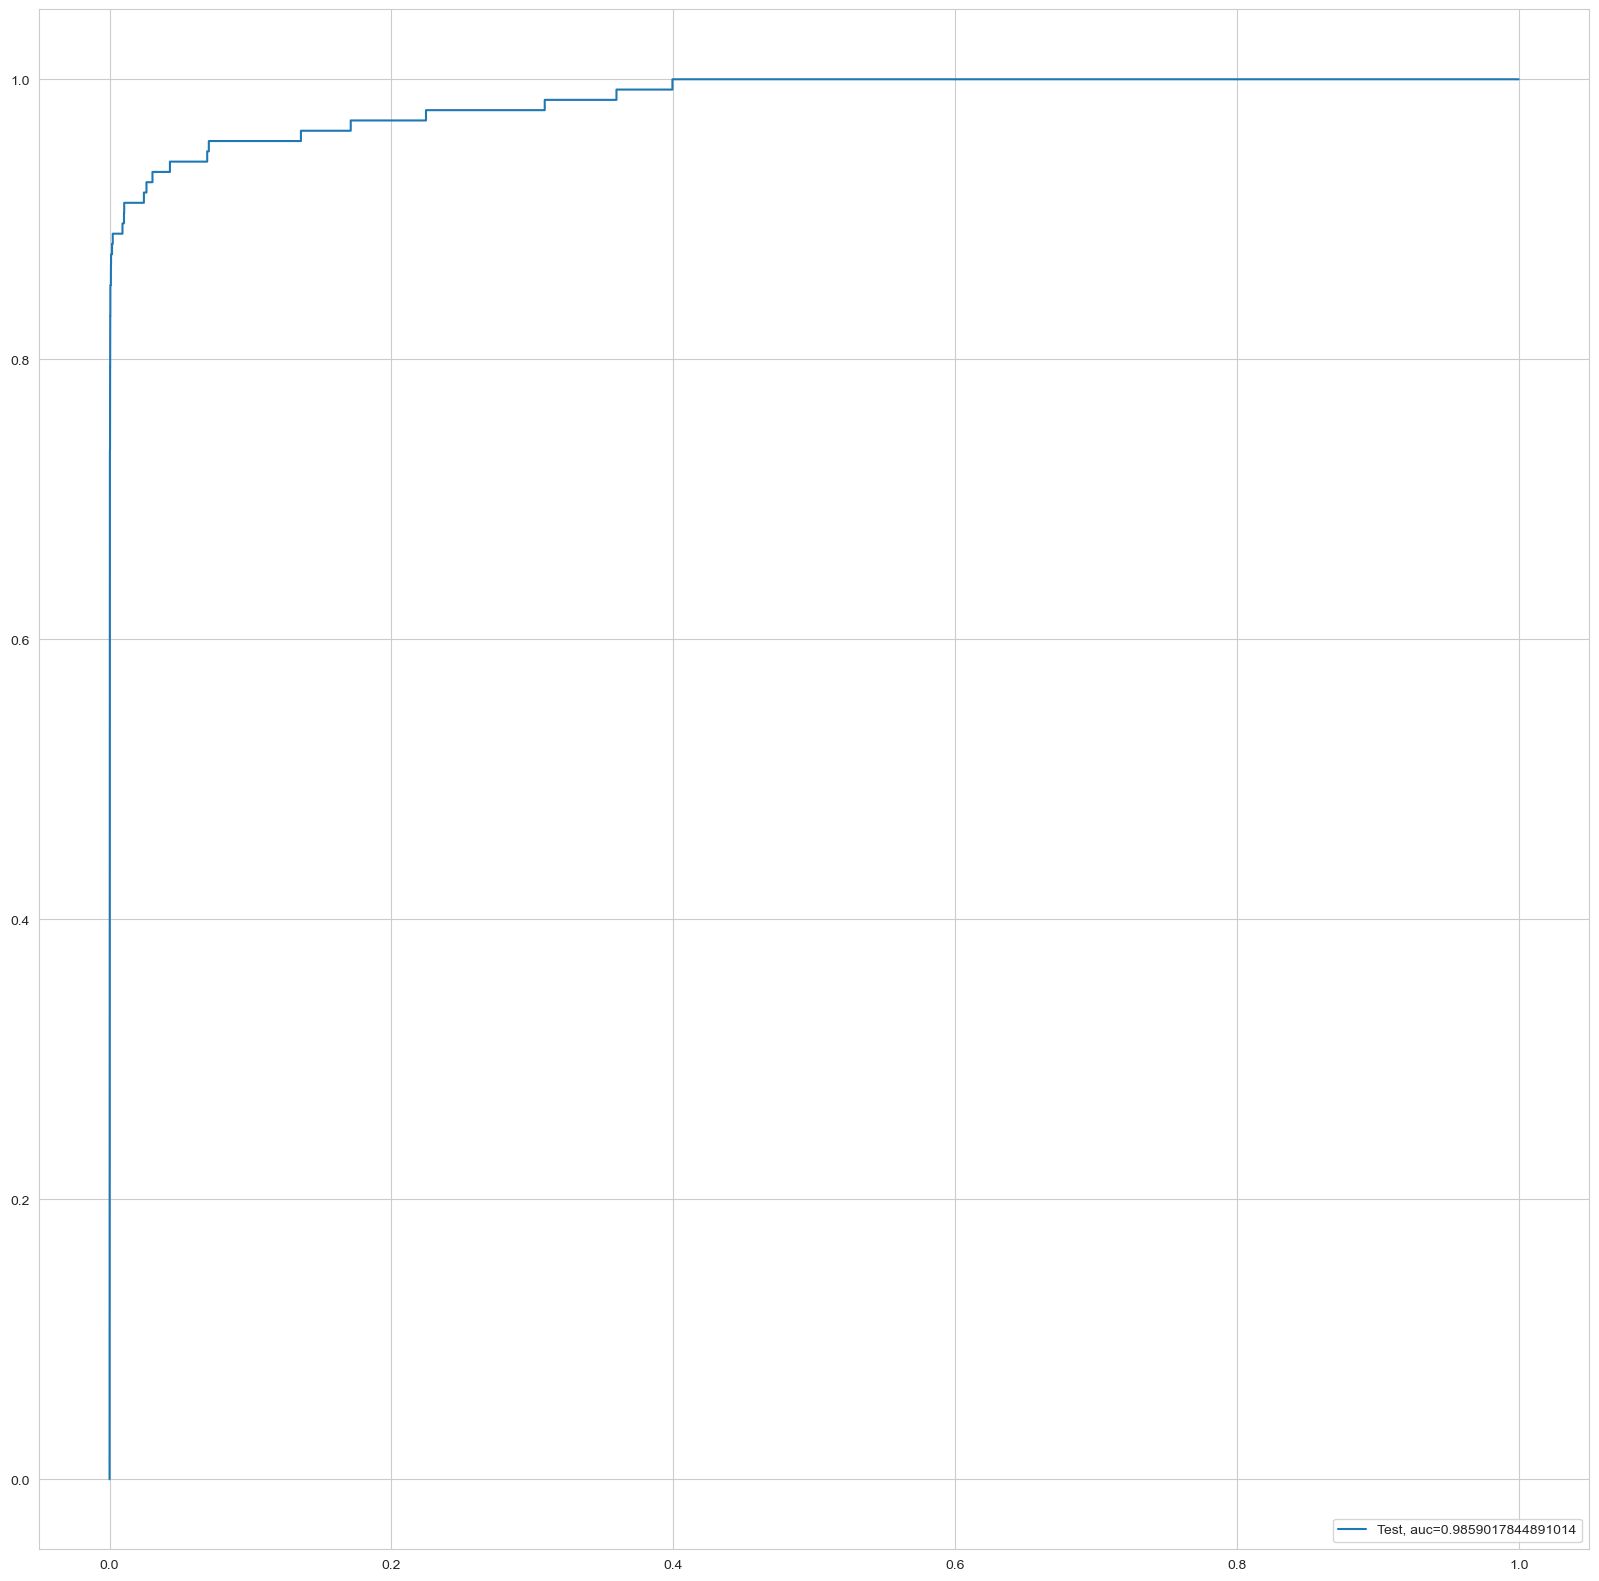

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


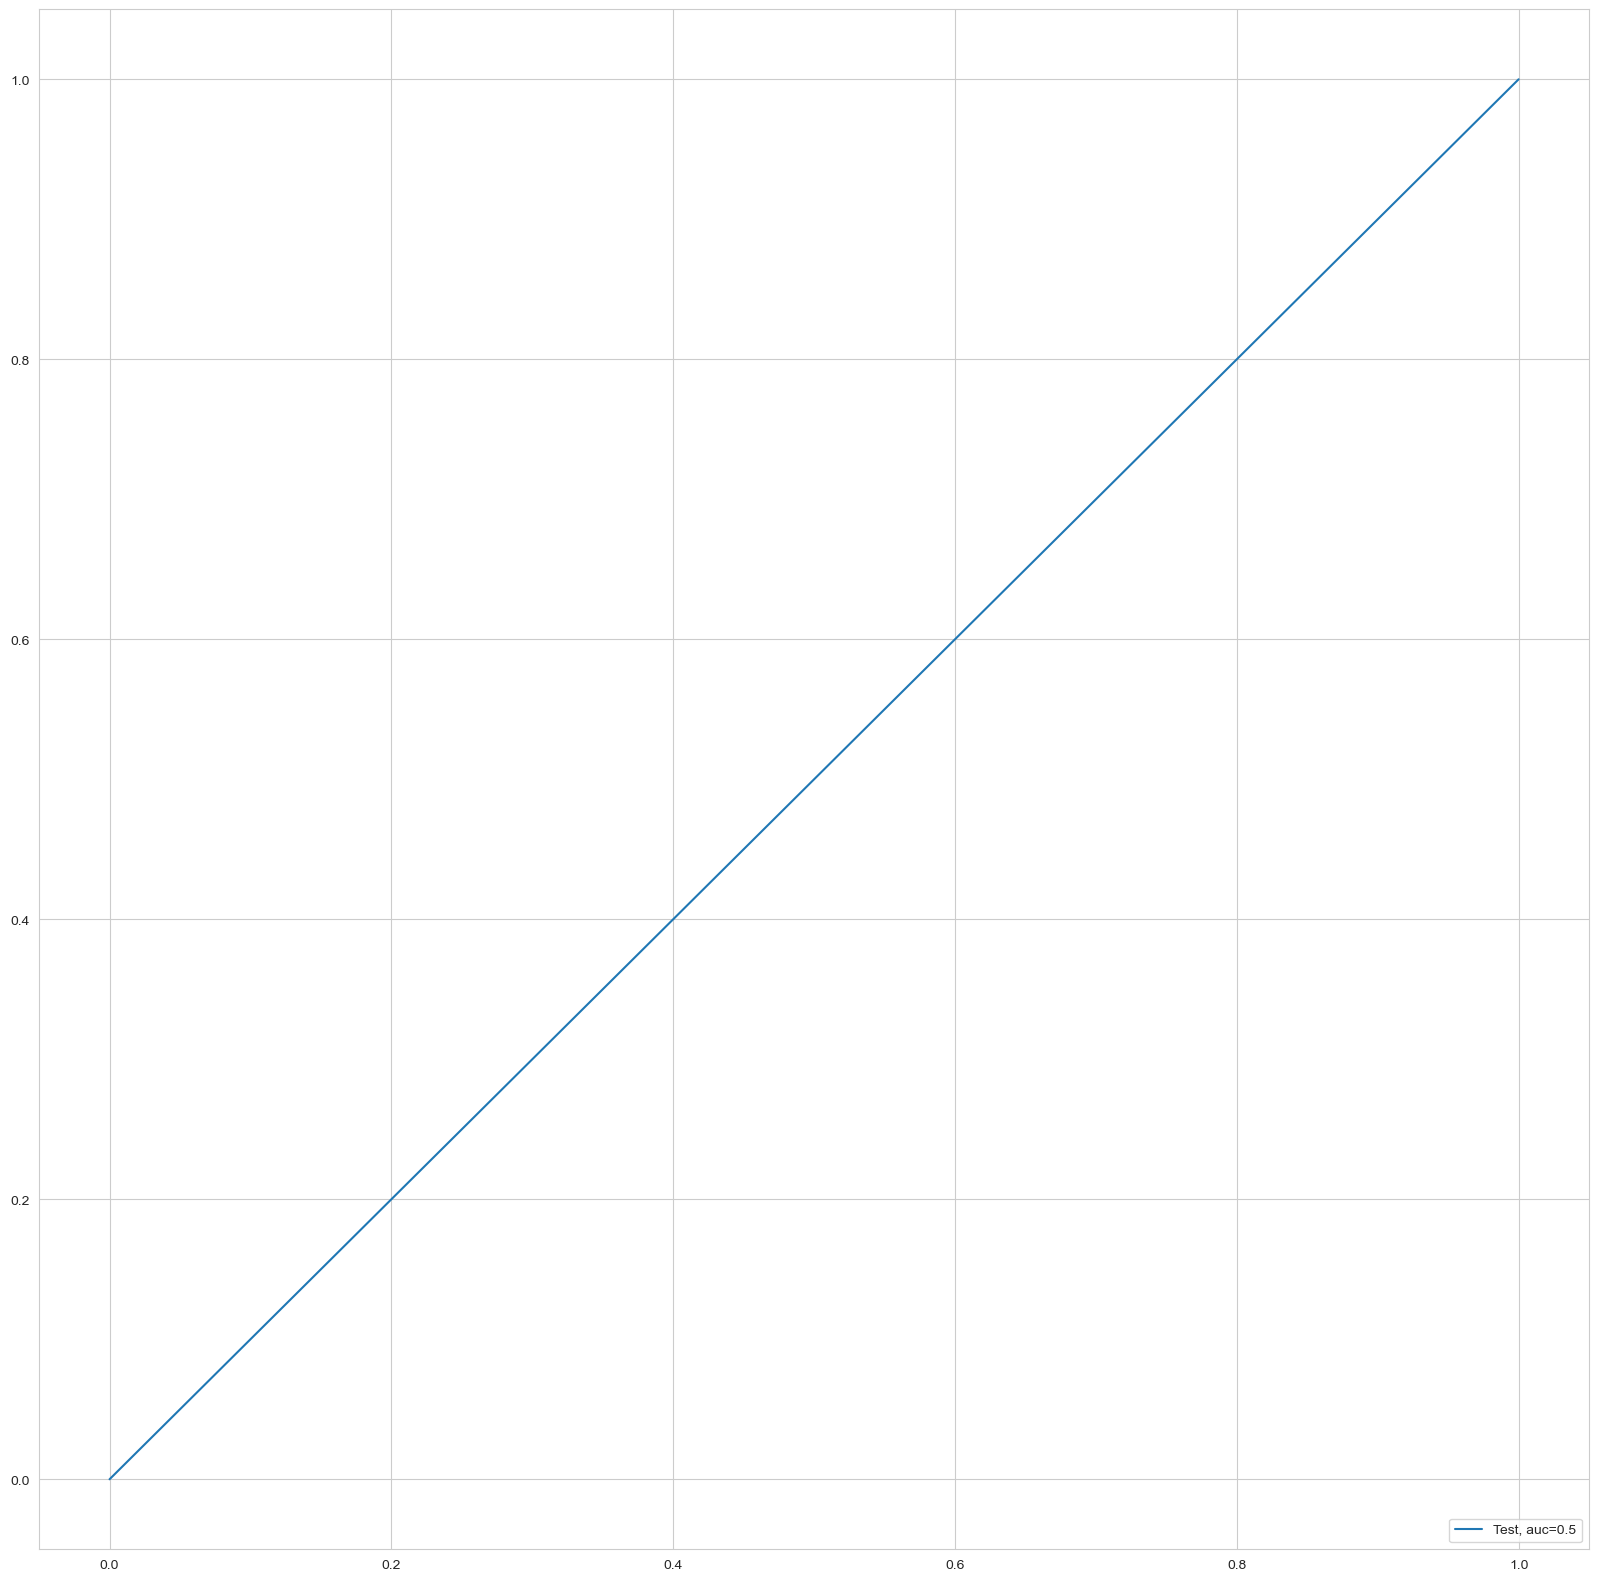

Time Elapsed: --- 1.3215649127960205 seconds ---


In [74]:
#Run Logistic Regression with L1 And L2 Regularisation - Undersampling
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
Model_Perf_Results_df = LogisticModels(Model_Perf_Results_df, "Random Undersampling", X_Under, y_Under, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

KNN Model
model score
0.9936214786465831
Confusion Matrix


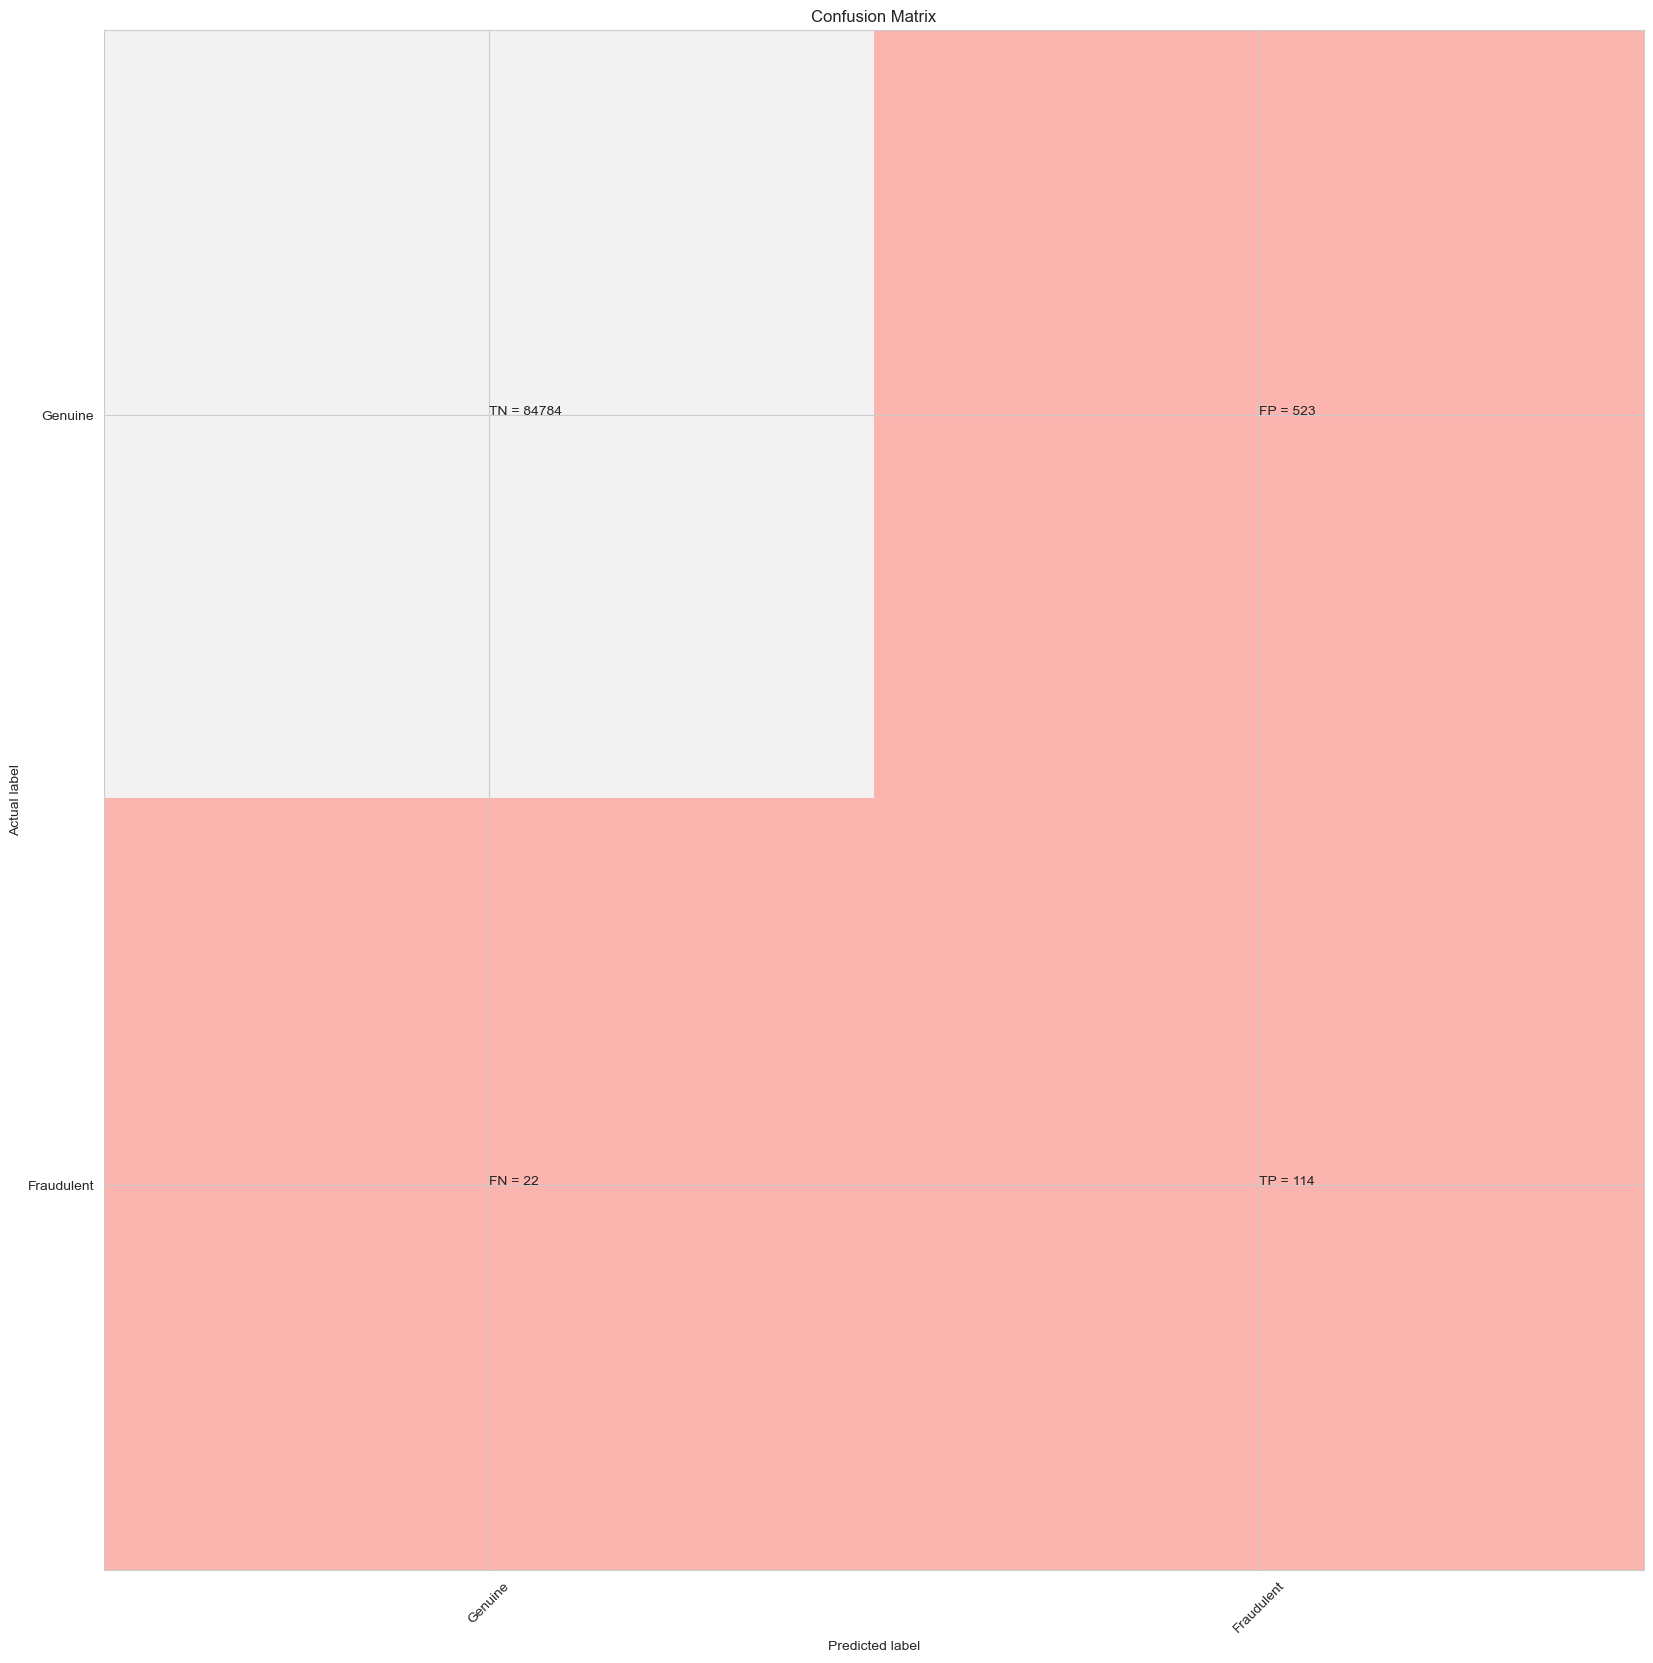

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85307
           1       0.18      0.84      0.29       136

    accuracy                           0.99     85443
   macro avg       0.59      0.92      0.65     85443
weighted avg       1.00      0.99      1.00     85443

KNN roc_value: 0.9557059140722883
KNN threshold: 0.4
ROC for the test dataset 95.6%


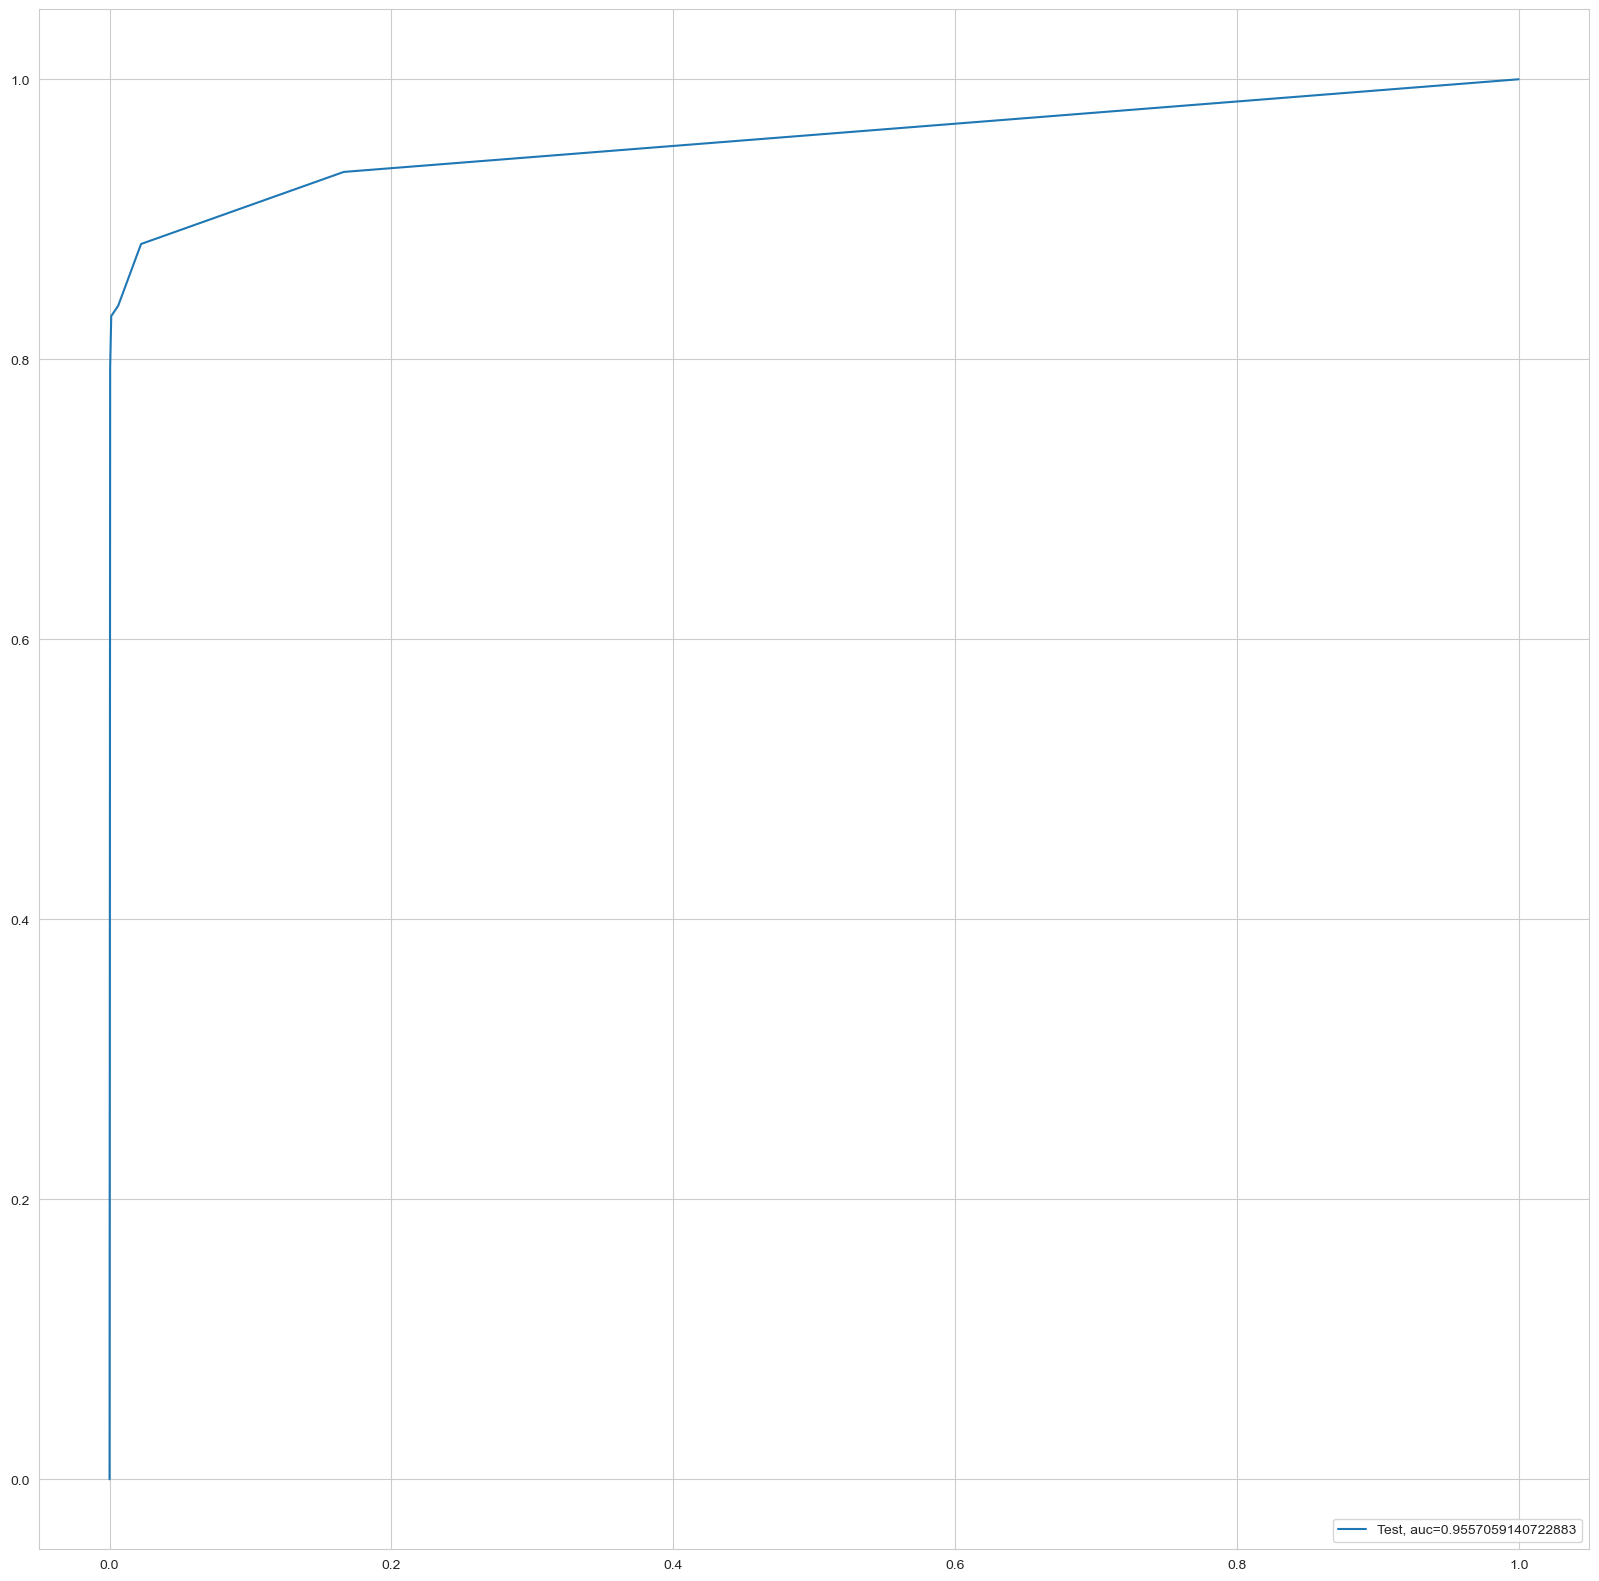

Time Elapsed: --- 9.54859709739685 seconds ---


In [75]:
#Run KNN Model - Undersampling
print("KNN Model")
start_time = time.time()
Model_Perf_Results_df = KNNModels(Model_Perf_Results_df, "Random Undersampling", X_Under, y_Under, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

SVM Model with Sigmoid Kernel
Accuracy_Score : 0.9040881055206395
Confusion Matrix


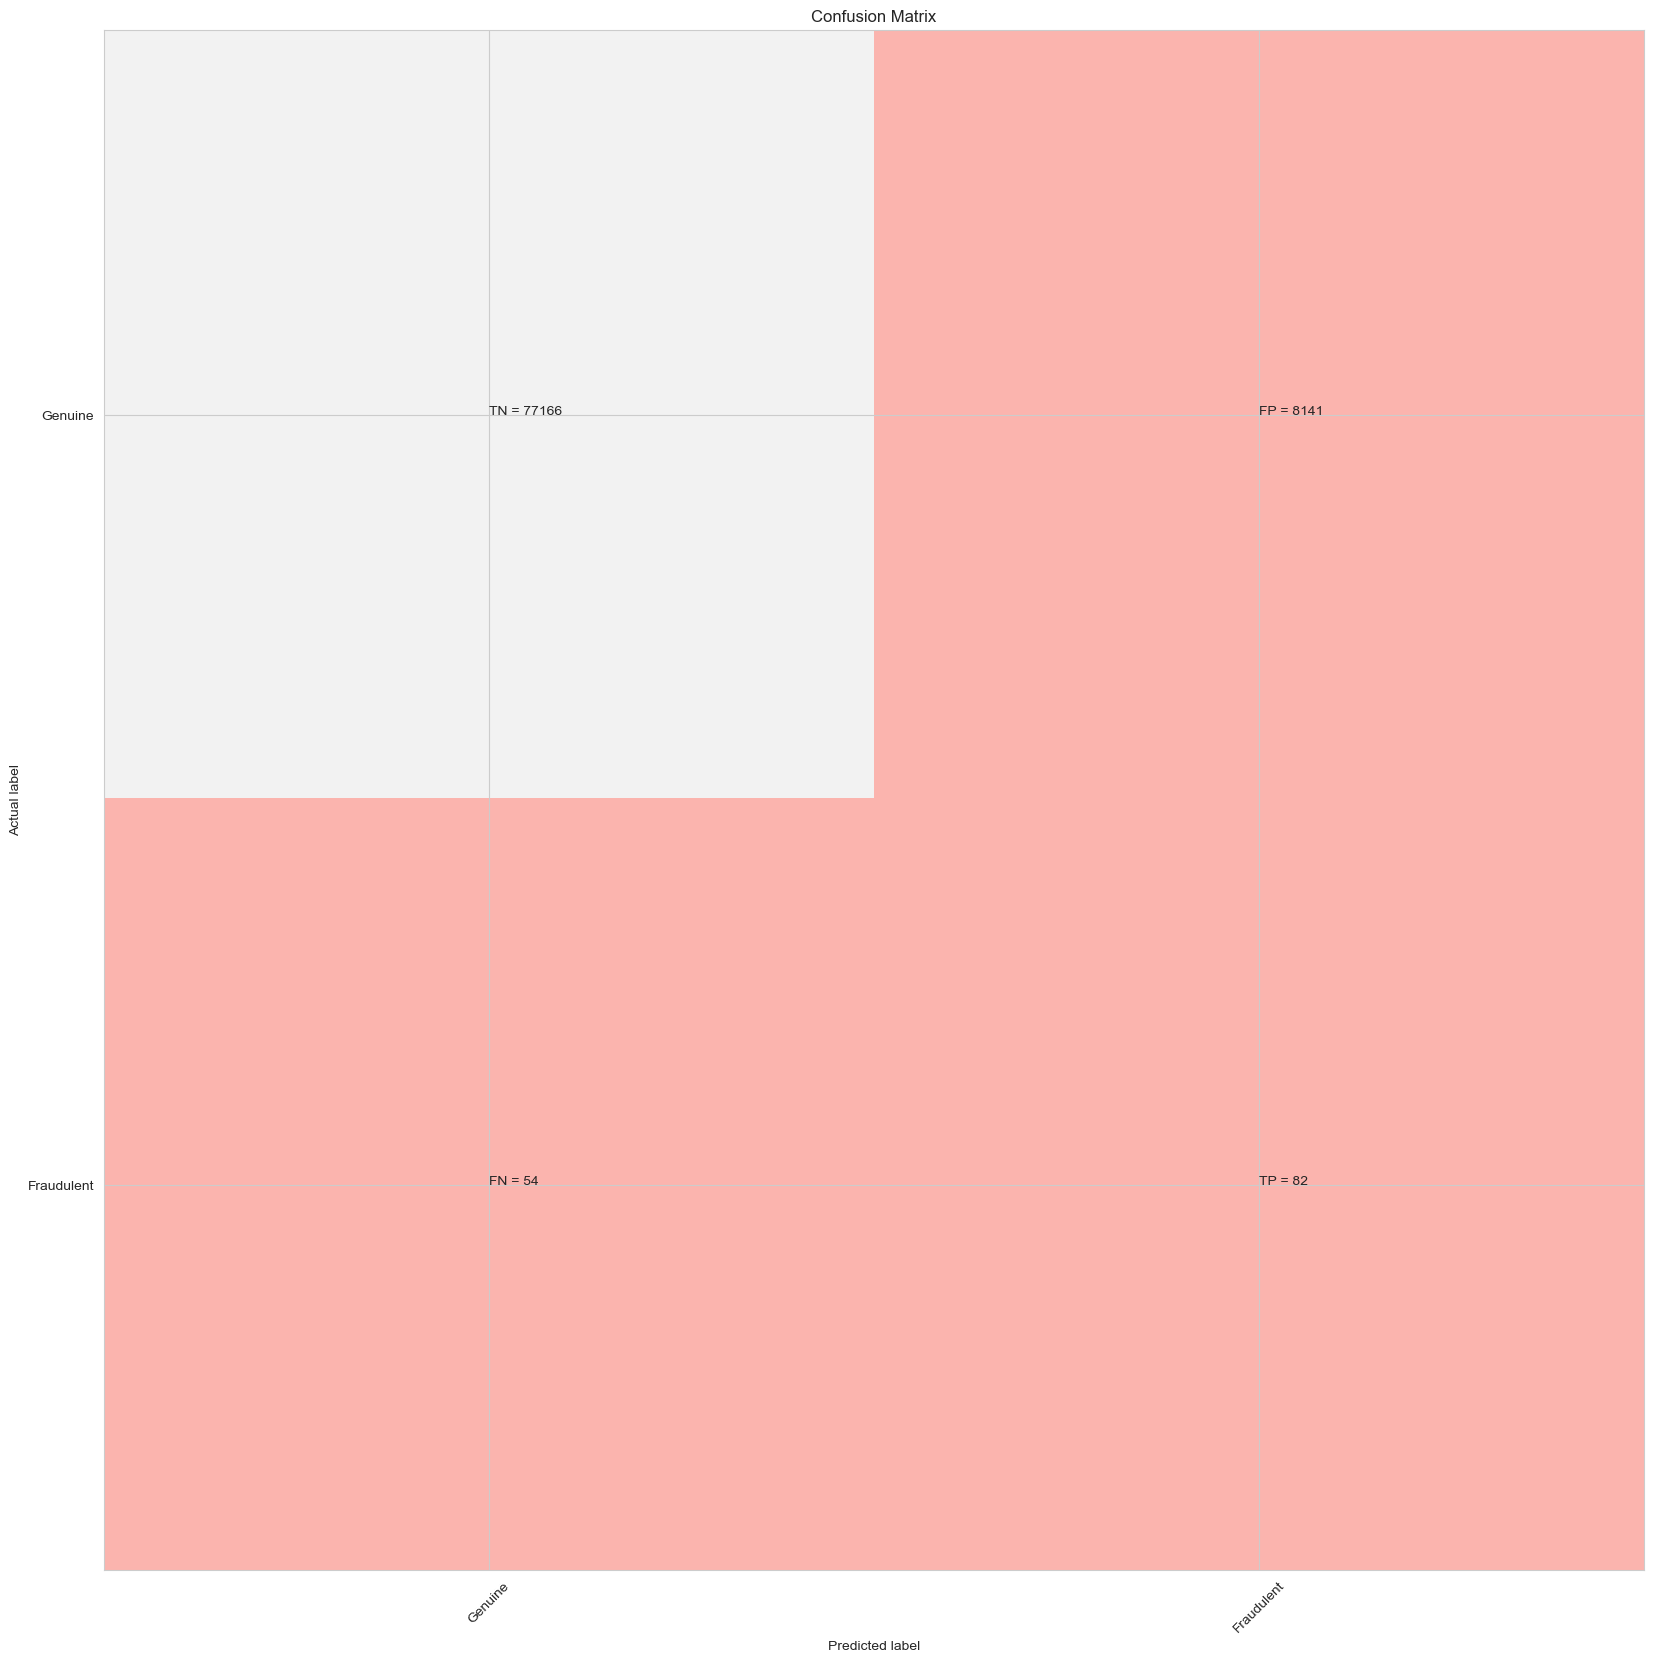

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85307
           1       0.01      0.60      0.02       136

    accuracy                           0.90     85443
   macro avg       0.50      0.75      0.48     85443
weighted avg       1.00      0.90      0.95     85443

SVM roc_value: 0.7763468396842133
SVM threshold: 0.4661217877365861
ROC for the test dataset 77.6%


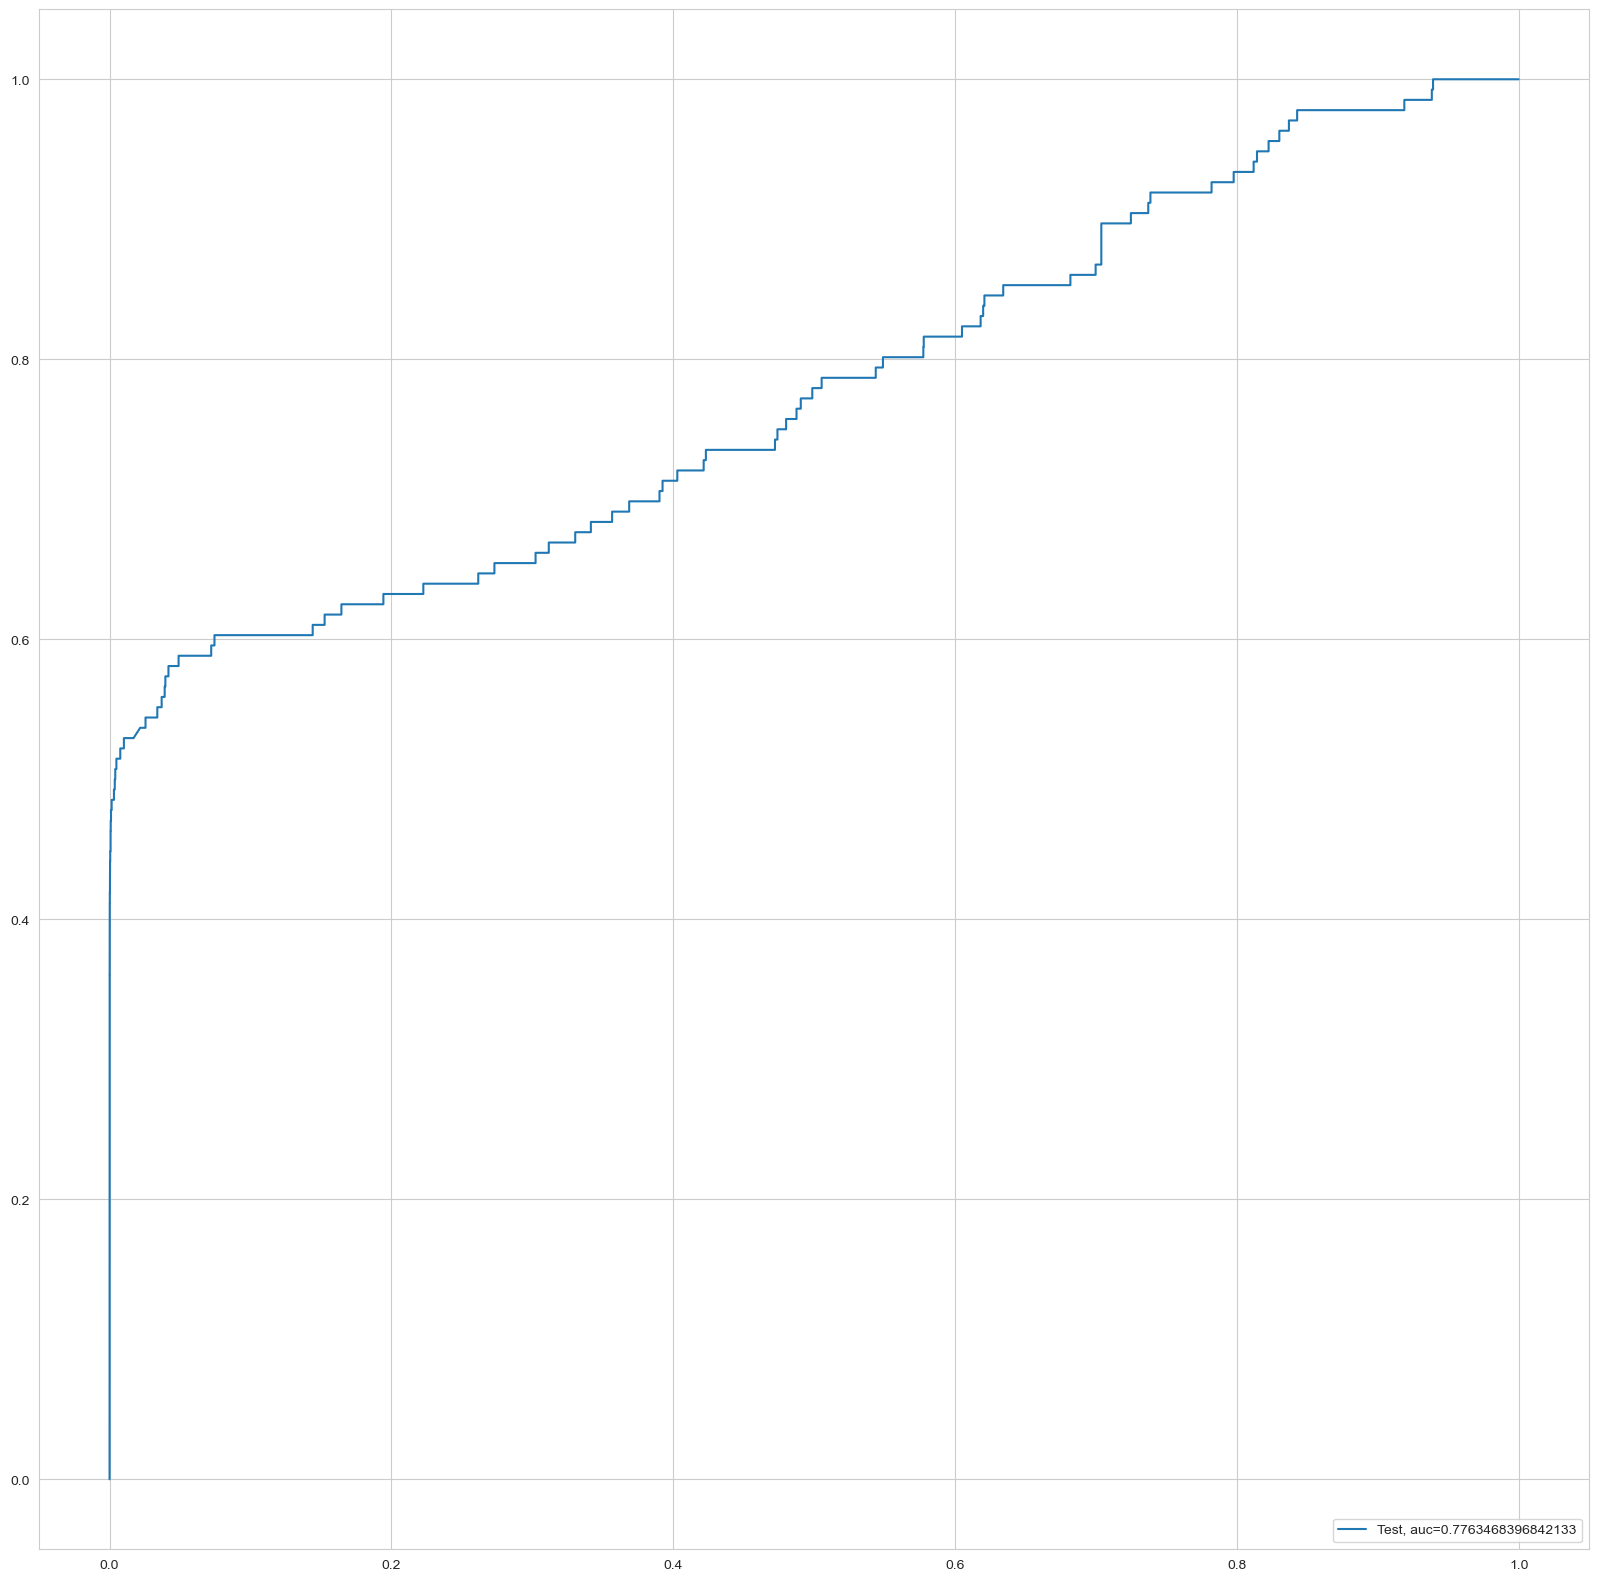

Time Elapsed: --- 3.2915337085723877 seconds ---


In [76]:
#Run SVM Model with Sigmoid Kernel - Undersampling
print("SVM Model with Sigmoid Kernel")
start_time = time.time()
Model_Perf_Results_df = SVMModels(Model_Perf_Results_df, "Random Undersampling", X_Under, y_Under, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9319780438420936
Confusion Matrix


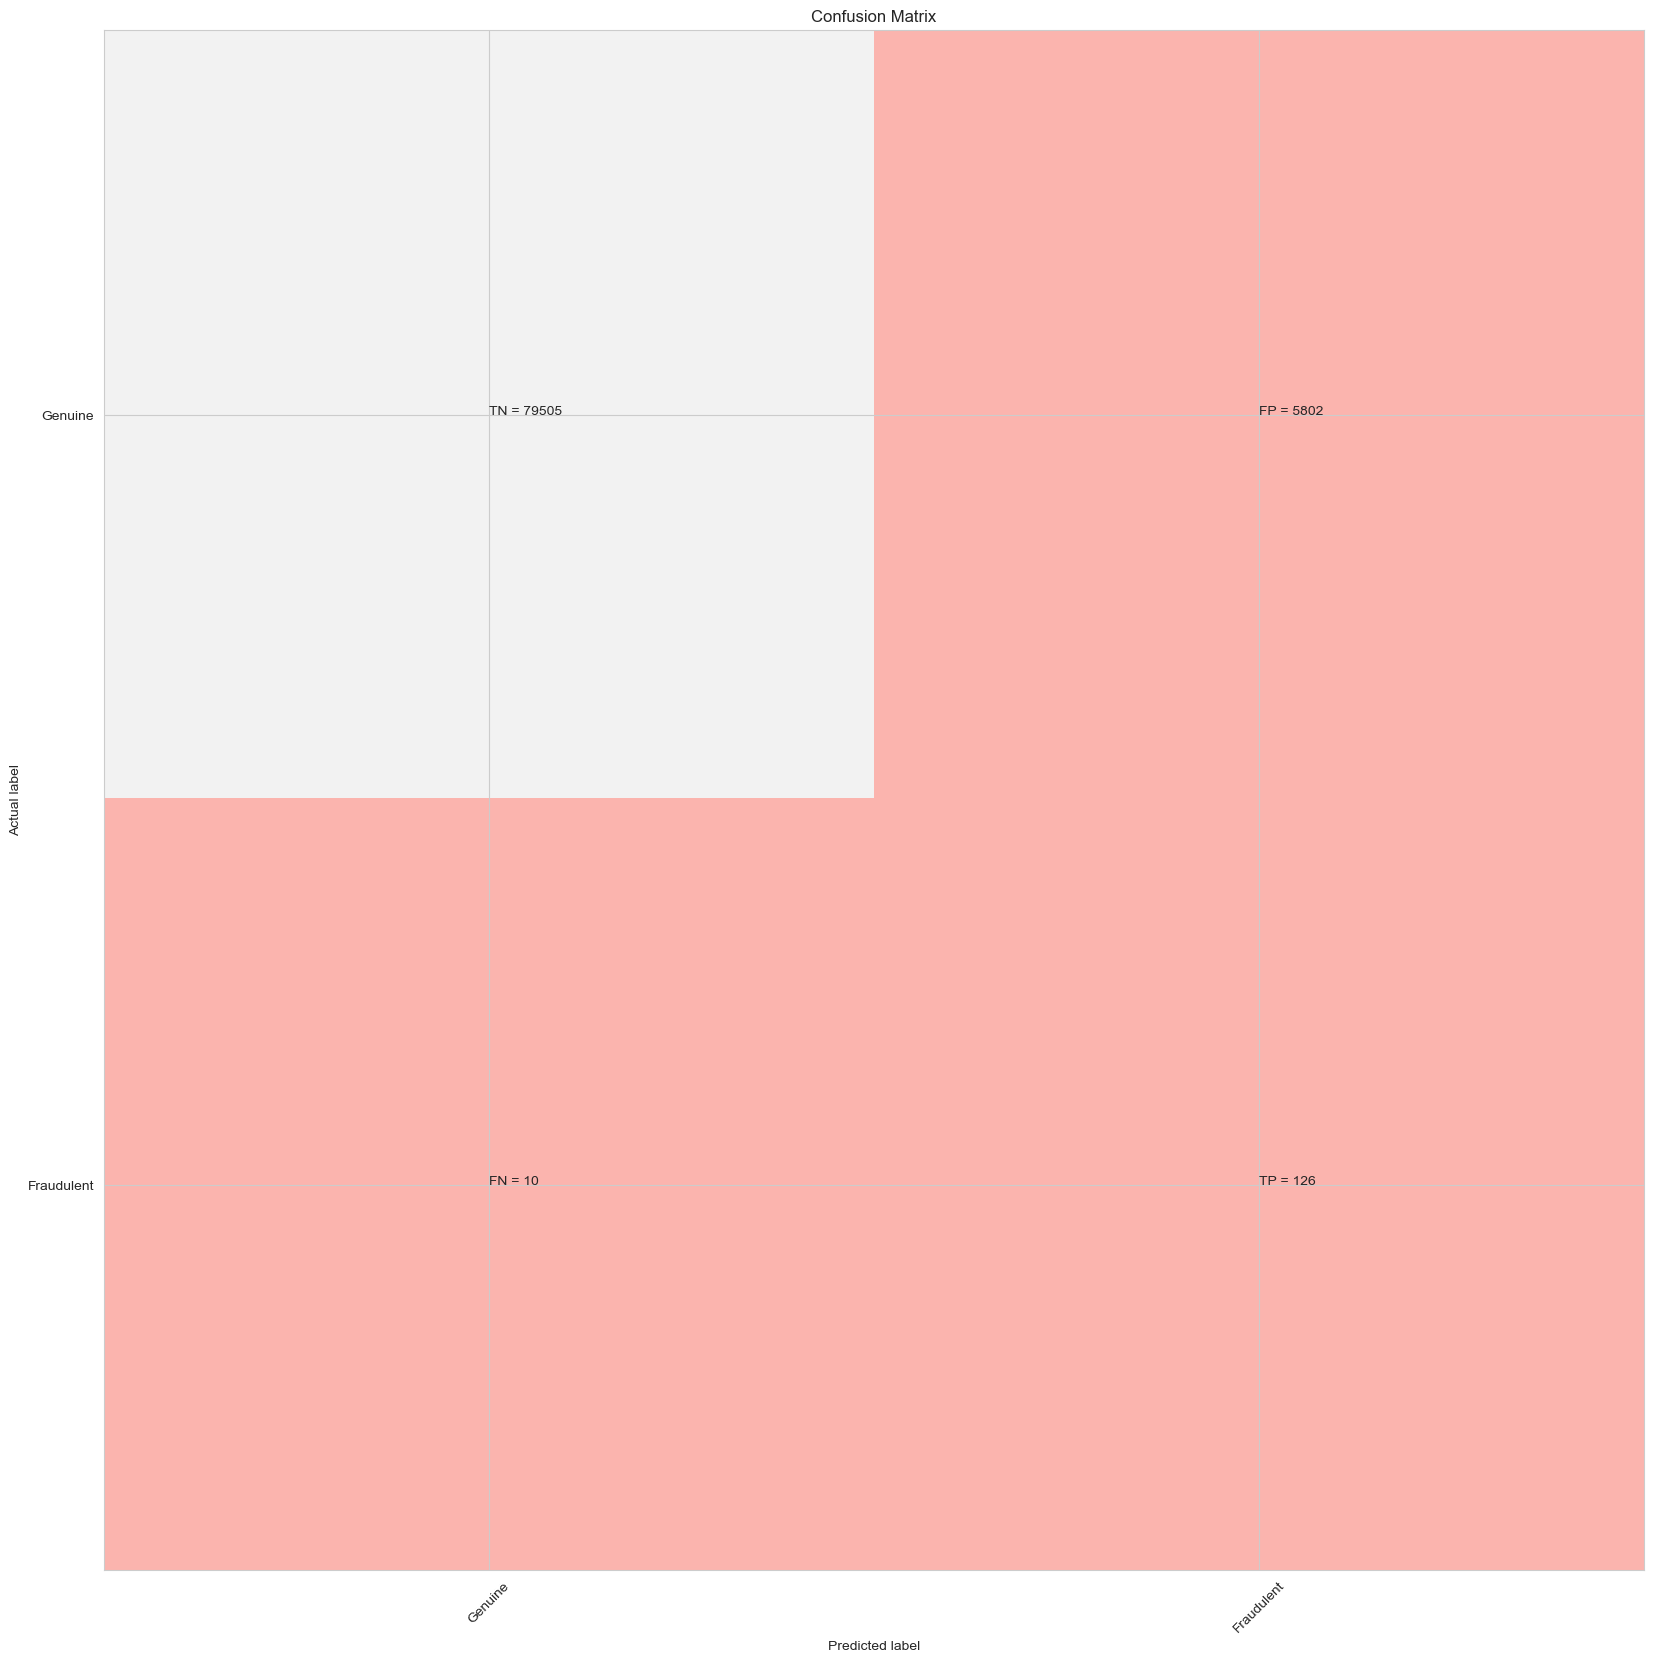

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     85307
           1       0.02      0.93      0.04       136

    accuracy                           0.93     85443
   macro avg       0.51      0.93      0.50     85443
weighted avg       1.00      0.93      0.96     85443

gini tree_roc_value: 0.9292287061471405
Tree threshold: 1.0
ROC for the test dataset 92.9%


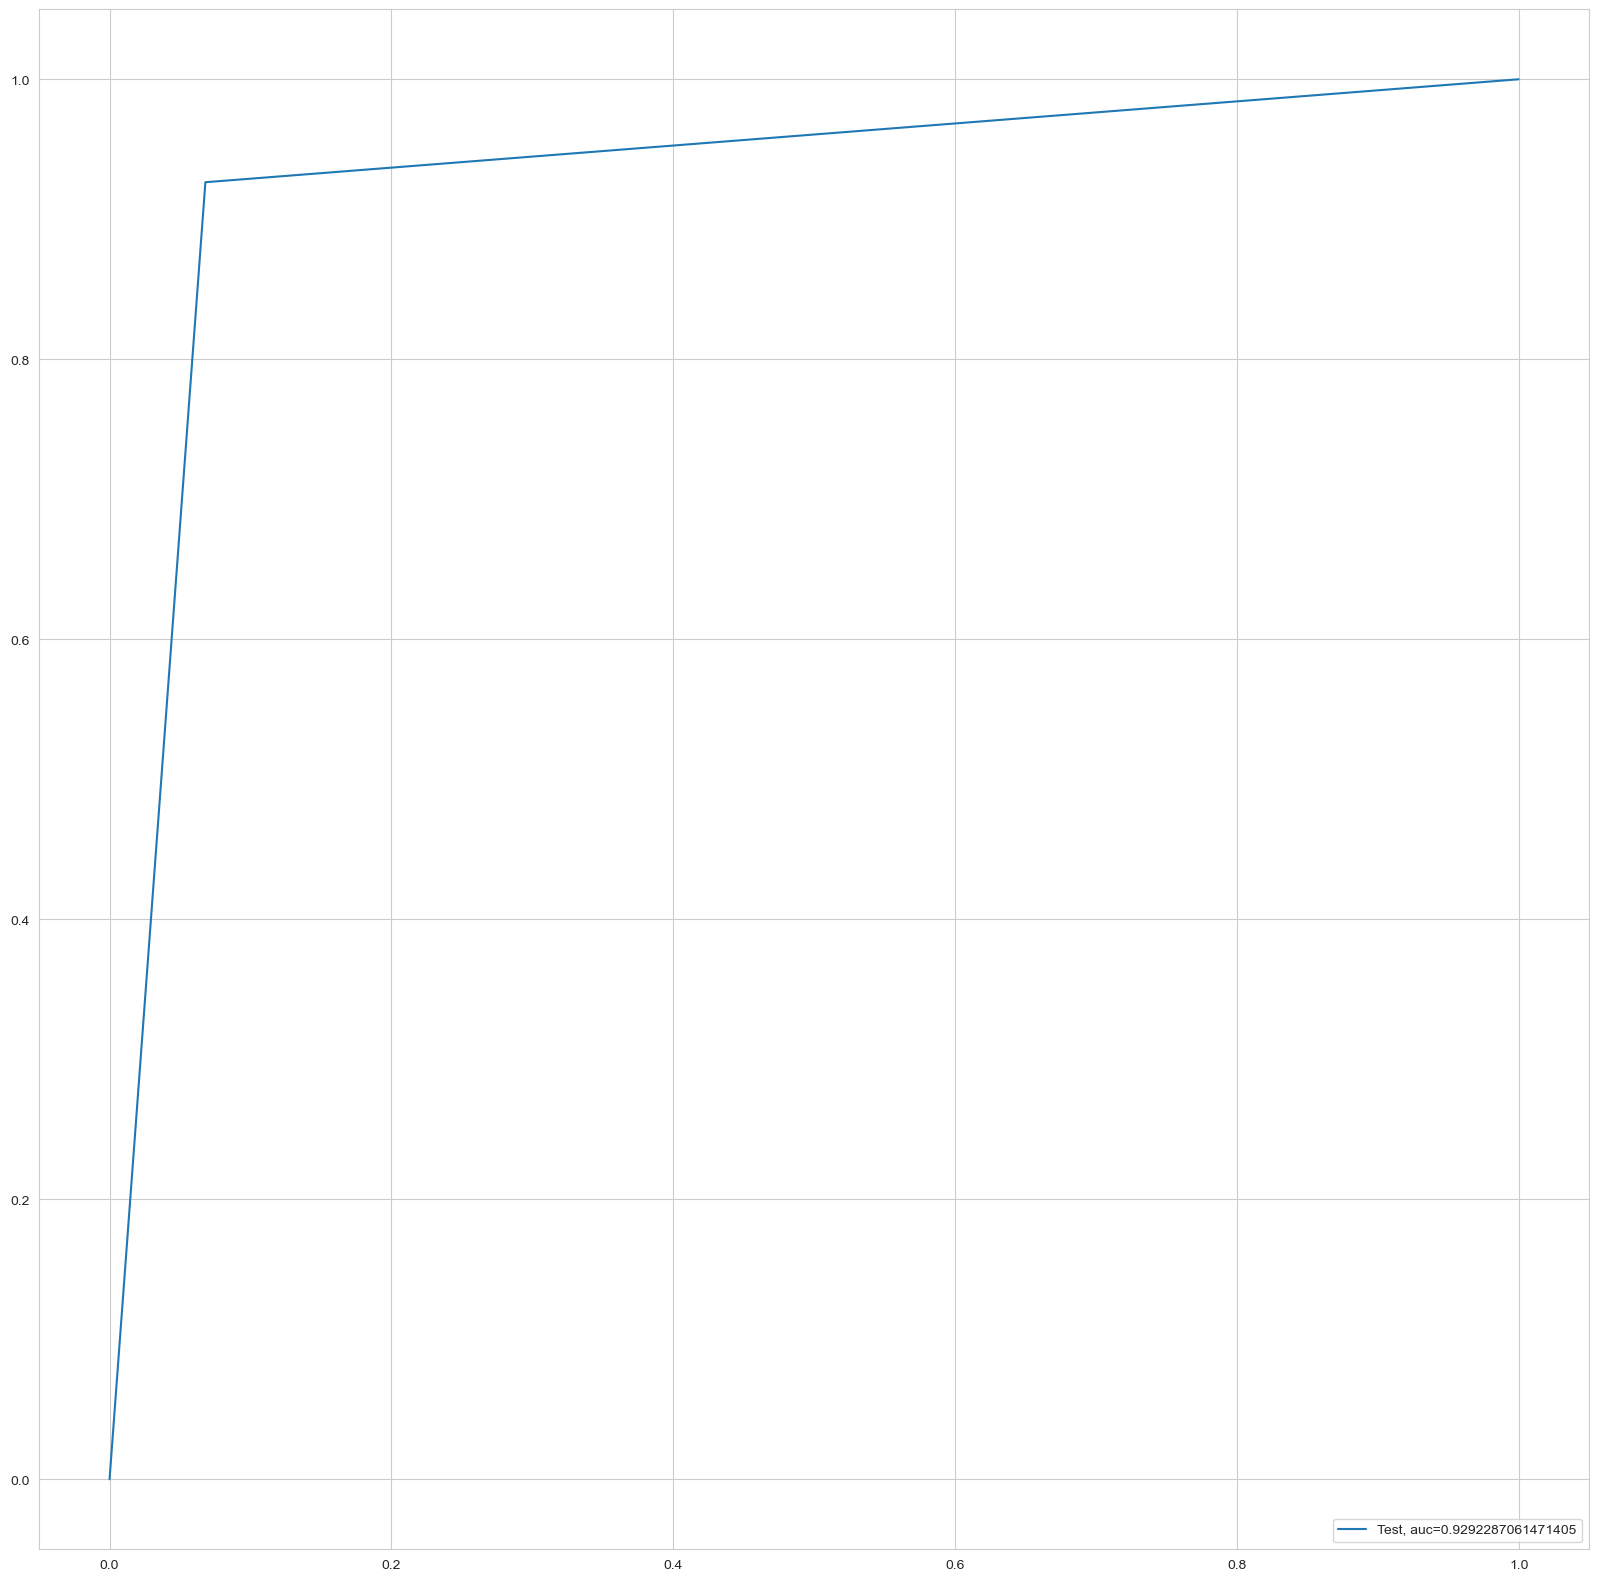

entropy score: 0.925646337324298
Confusion Matrix


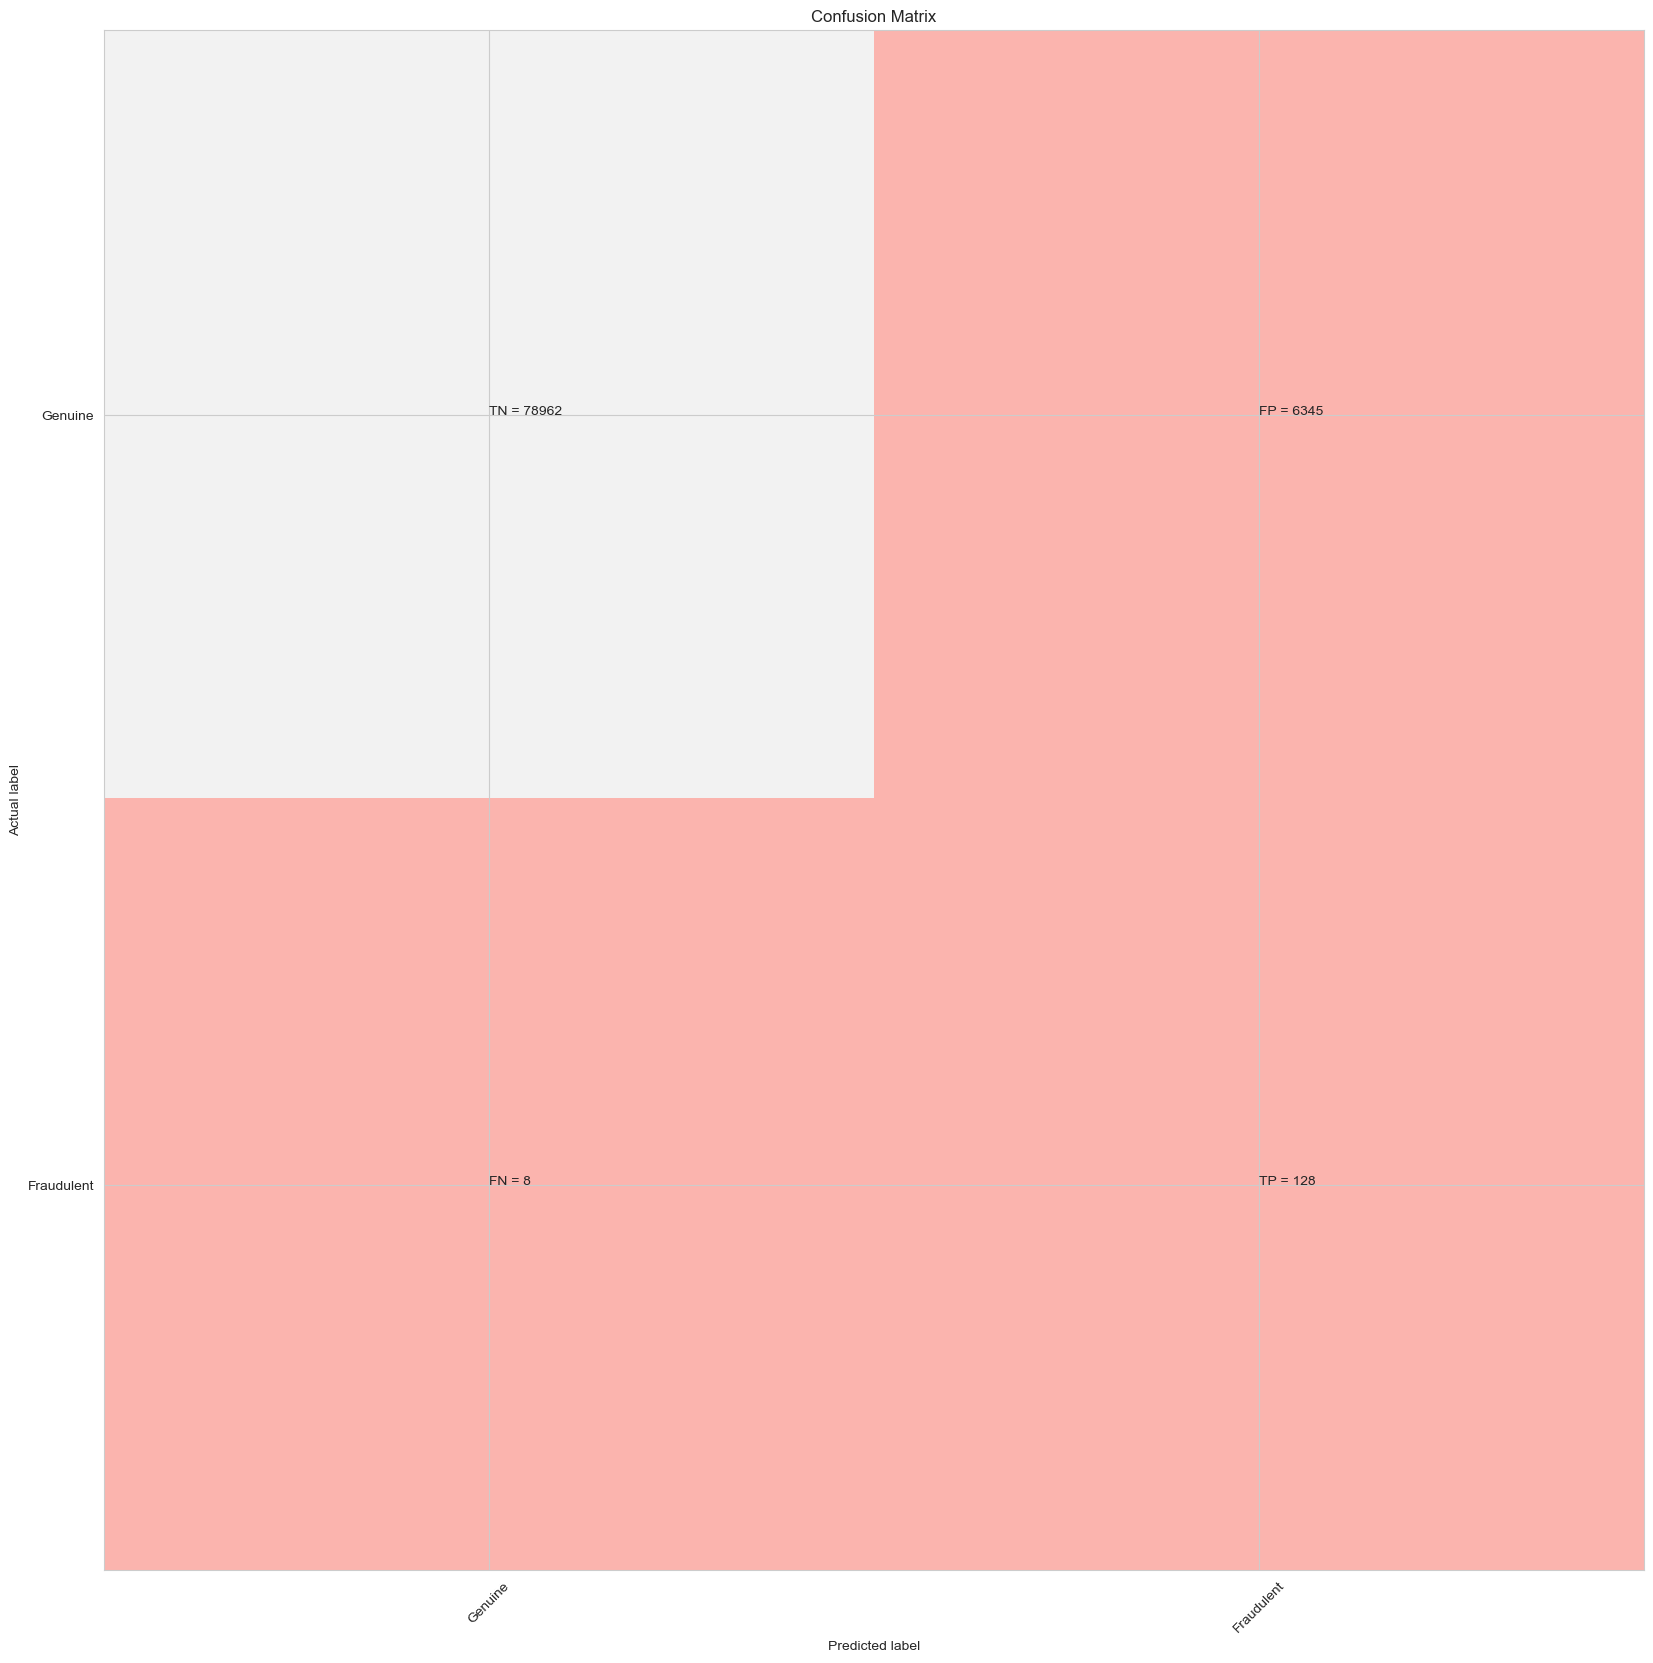

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     85307
           1       0.02      0.94      0.04       136

    accuracy                           0.93     85443
   macro avg       0.51      0.93      0.50     85443
weighted avg       1.00      0.93      0.96     85443

entropy tree_roc_value: 0.933399024561118
Tree threshold: 1.0
ROC for the test dataset 93.3%


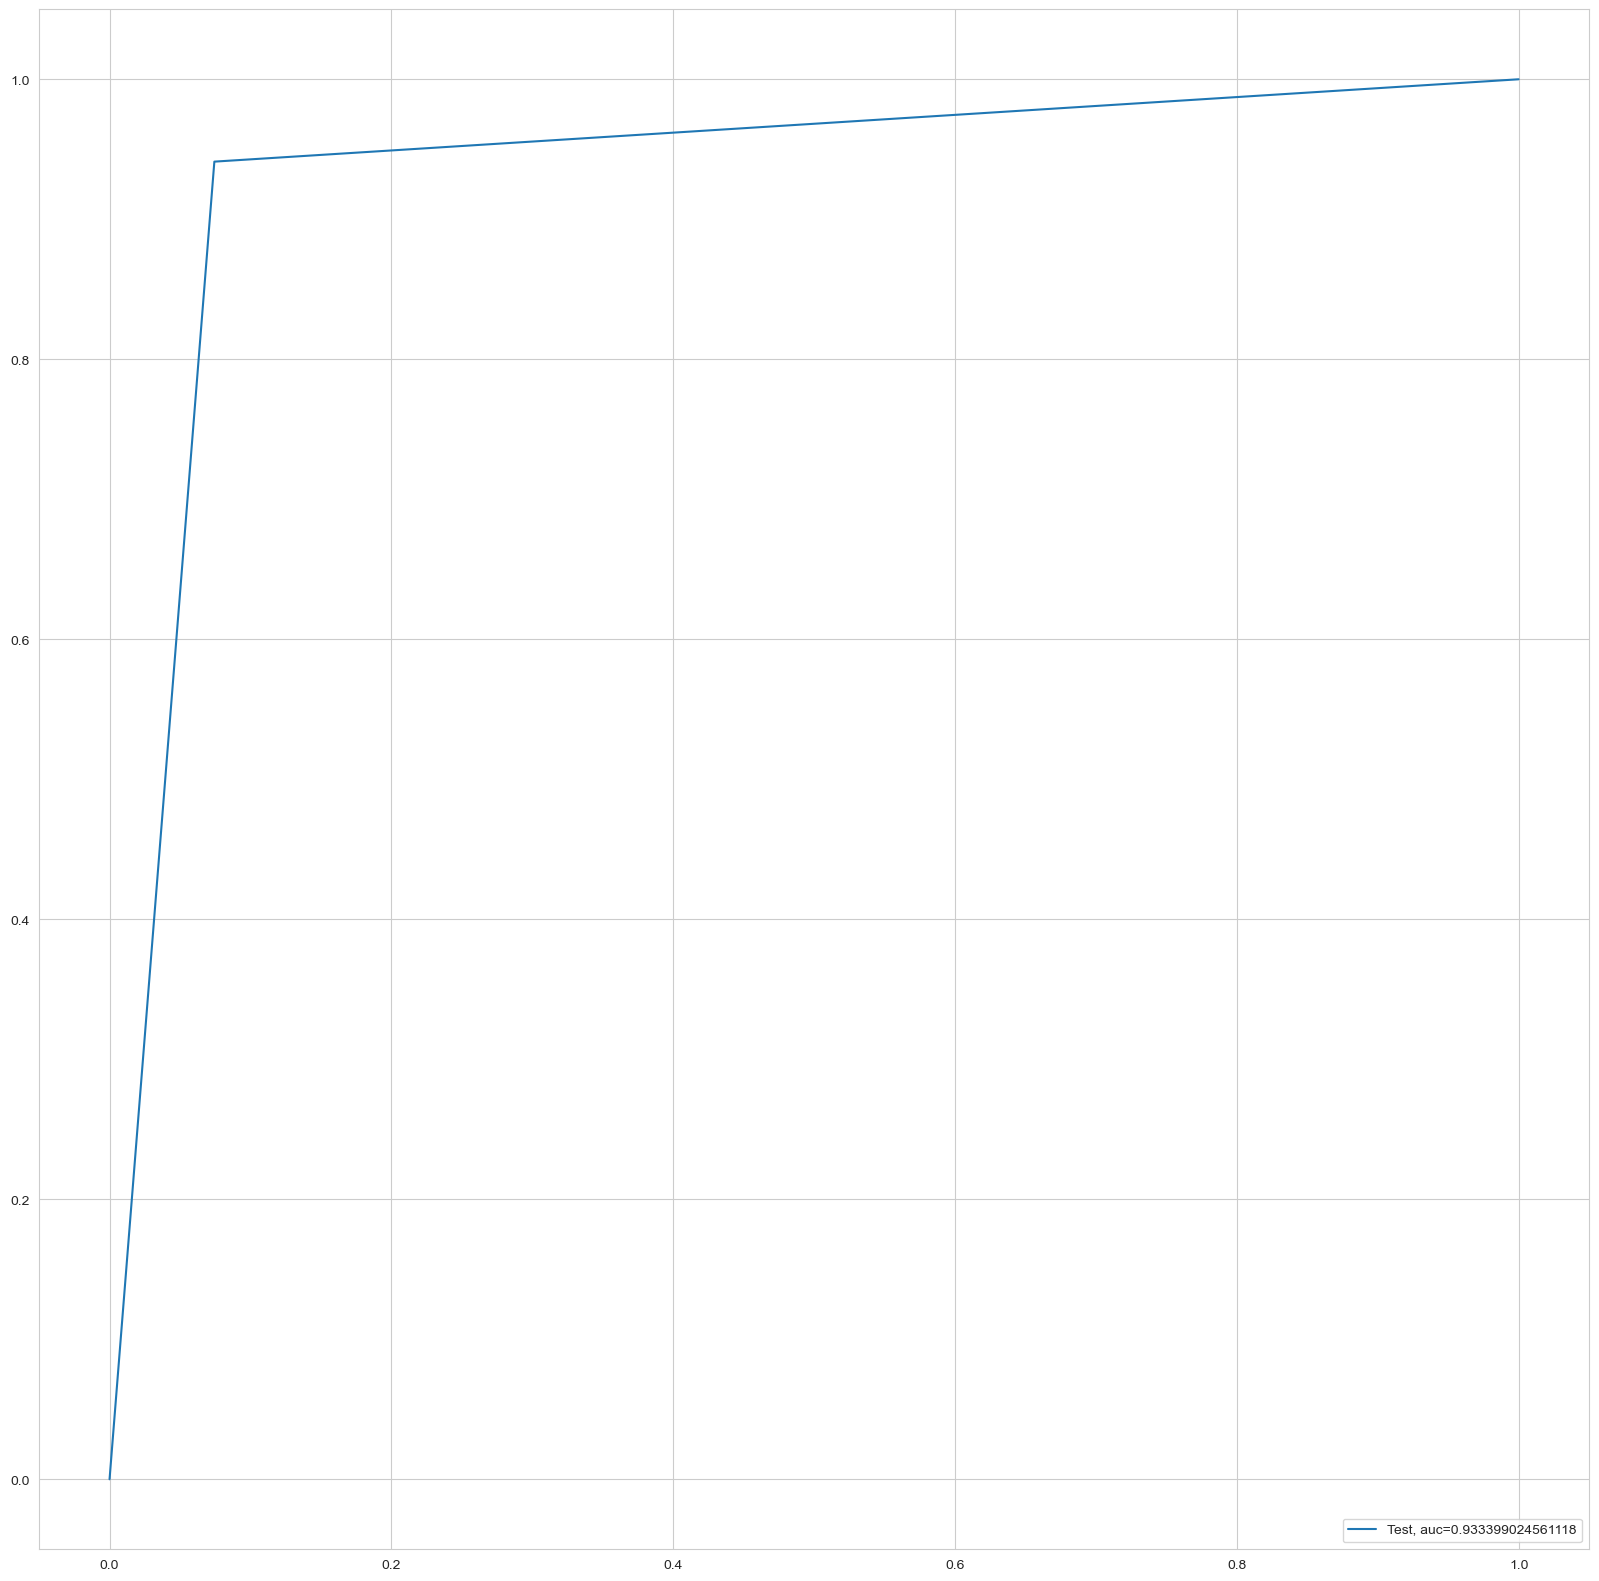

Time Elapsed: --- 1.1546719074249268 seconds ---


In [77]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria - Undersampling
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
Model_Perf_Results_df = DecisionTreeModels(Model_Perf_Results_df, "Random Undersampling", X_Under, y_Under, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Model Accuracy: 0.9869737719883431
Confusion Matrix


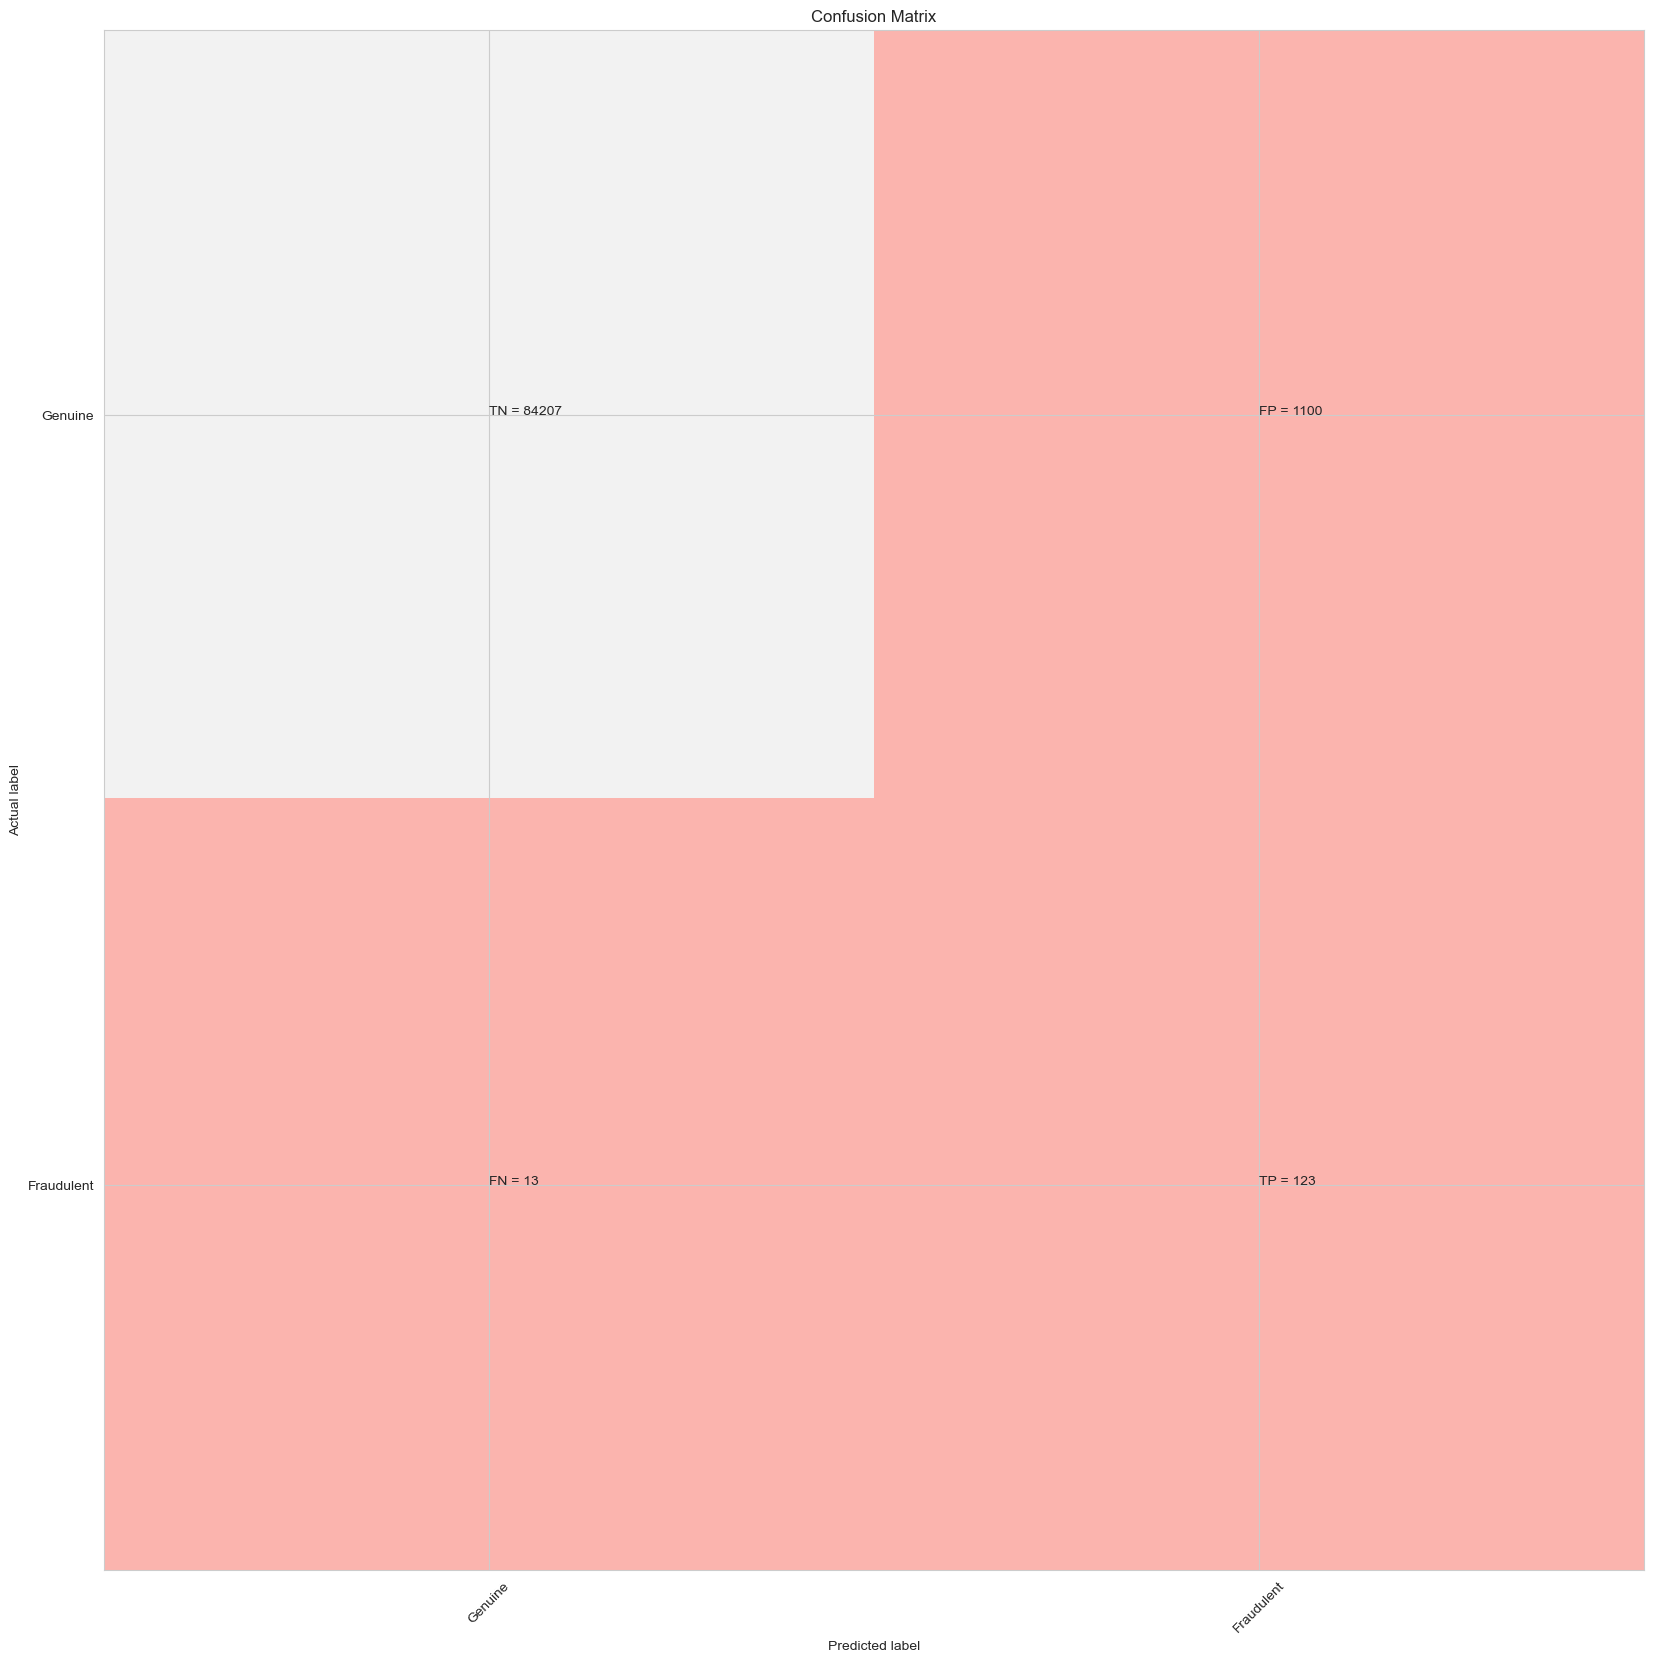

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85307
           1       0.10      0.90      0.18       136

    accuracy                           0.99     85443
   macro avg       0.55      0.95      0.59     85443
weighted avg       1.00      0.99      0.99     85443

Random Forest roc_value: 0.9836336787754126
Random Forest threshold: 0.44
ROC for the test dataset 98.4%


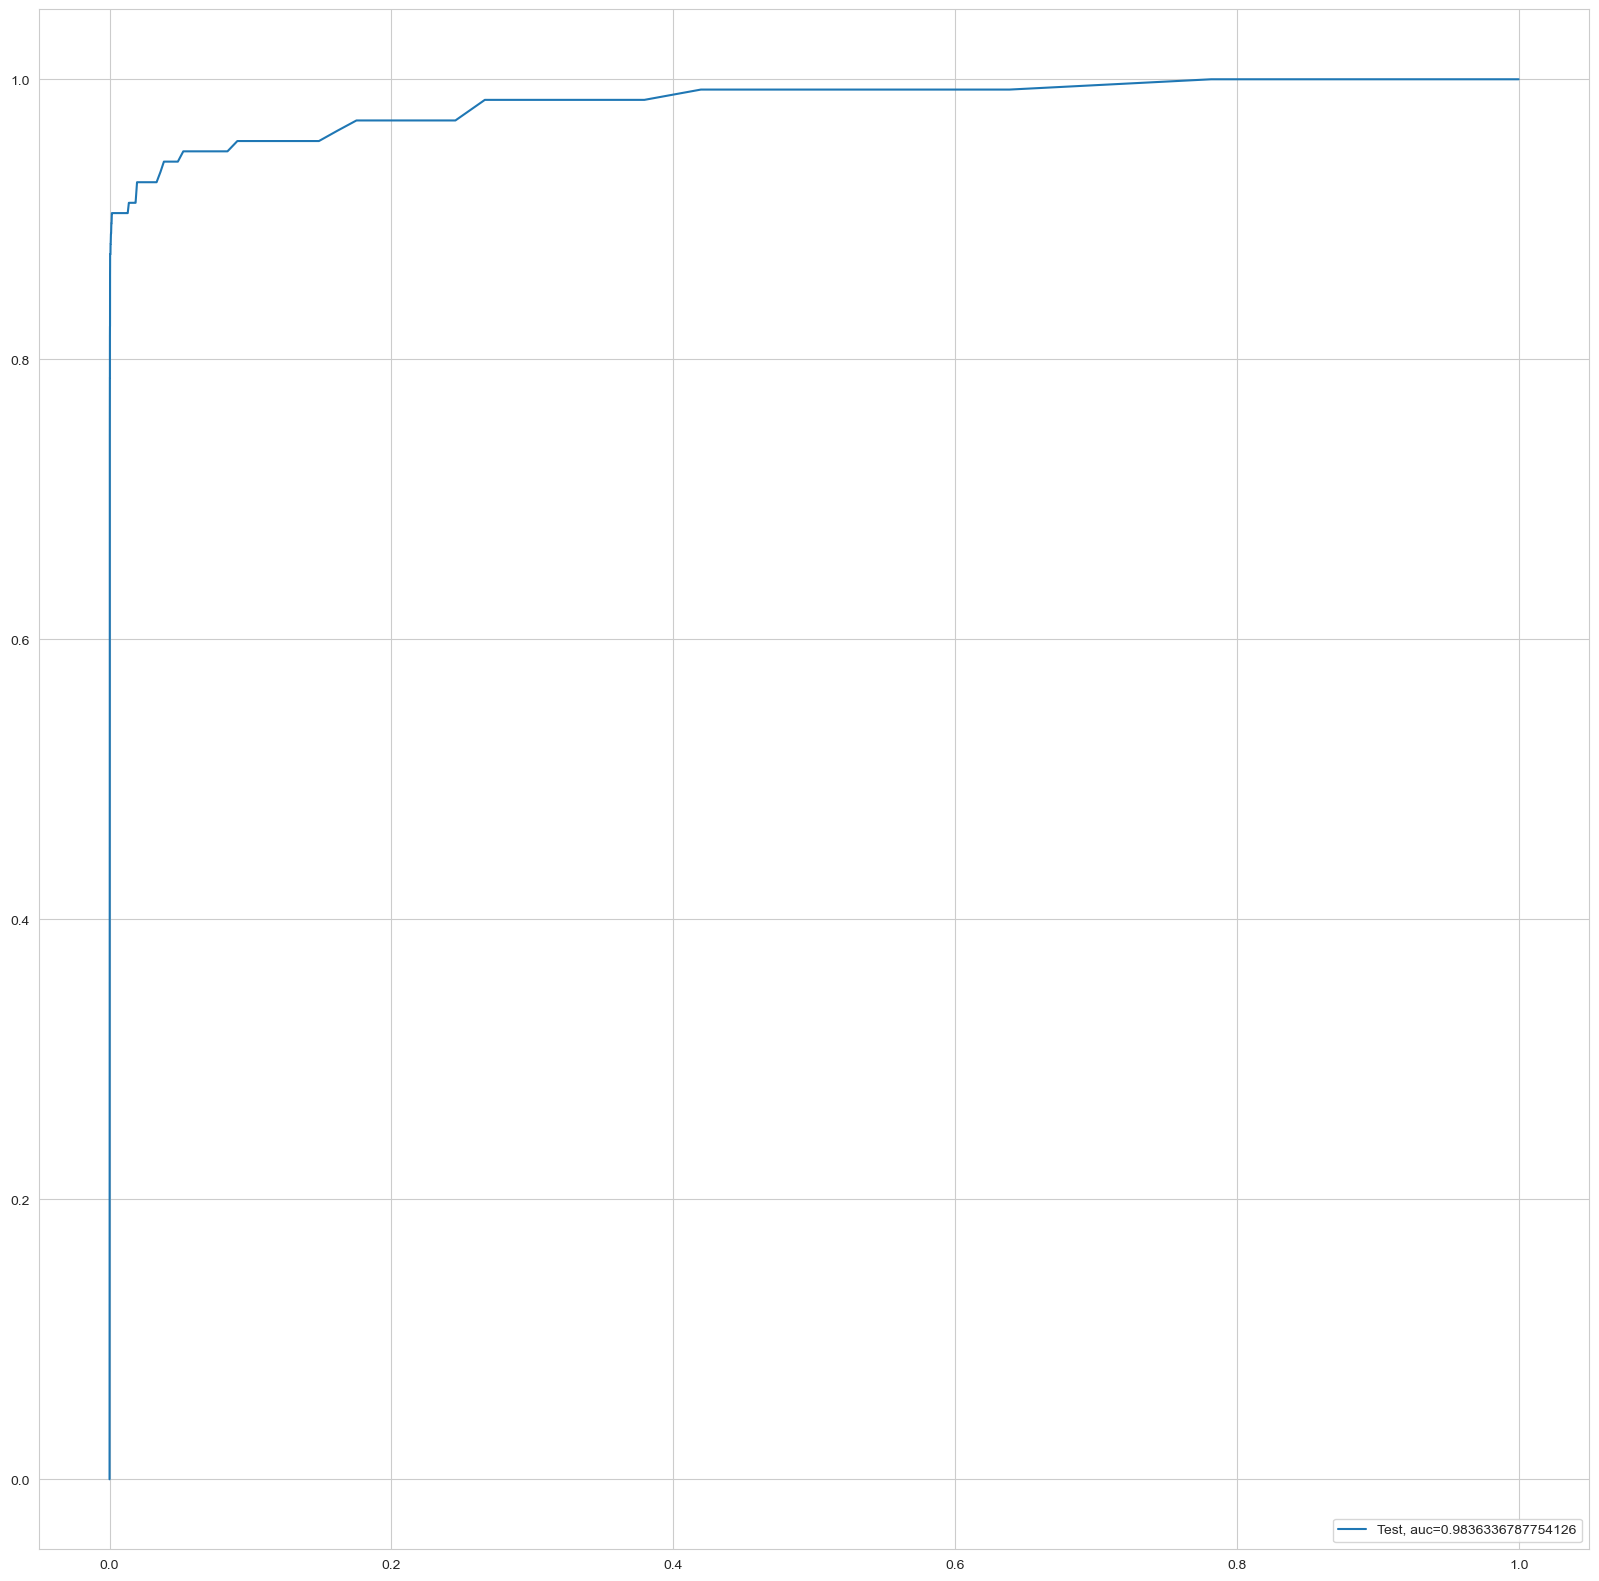

Time Elapsed: --- 2.1309099197387695 seconds ---


In [78]:
#Run Random Forest Model - Undersampling
print("Random Forest Model")
start_time = time.time()
Model_Perf_Results_df = RandomForestModels(Model_Perf_Results_df, "Random Undersampling", X_Under, y_Under, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
[20:55:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9823976218063505
Confusion Matrix


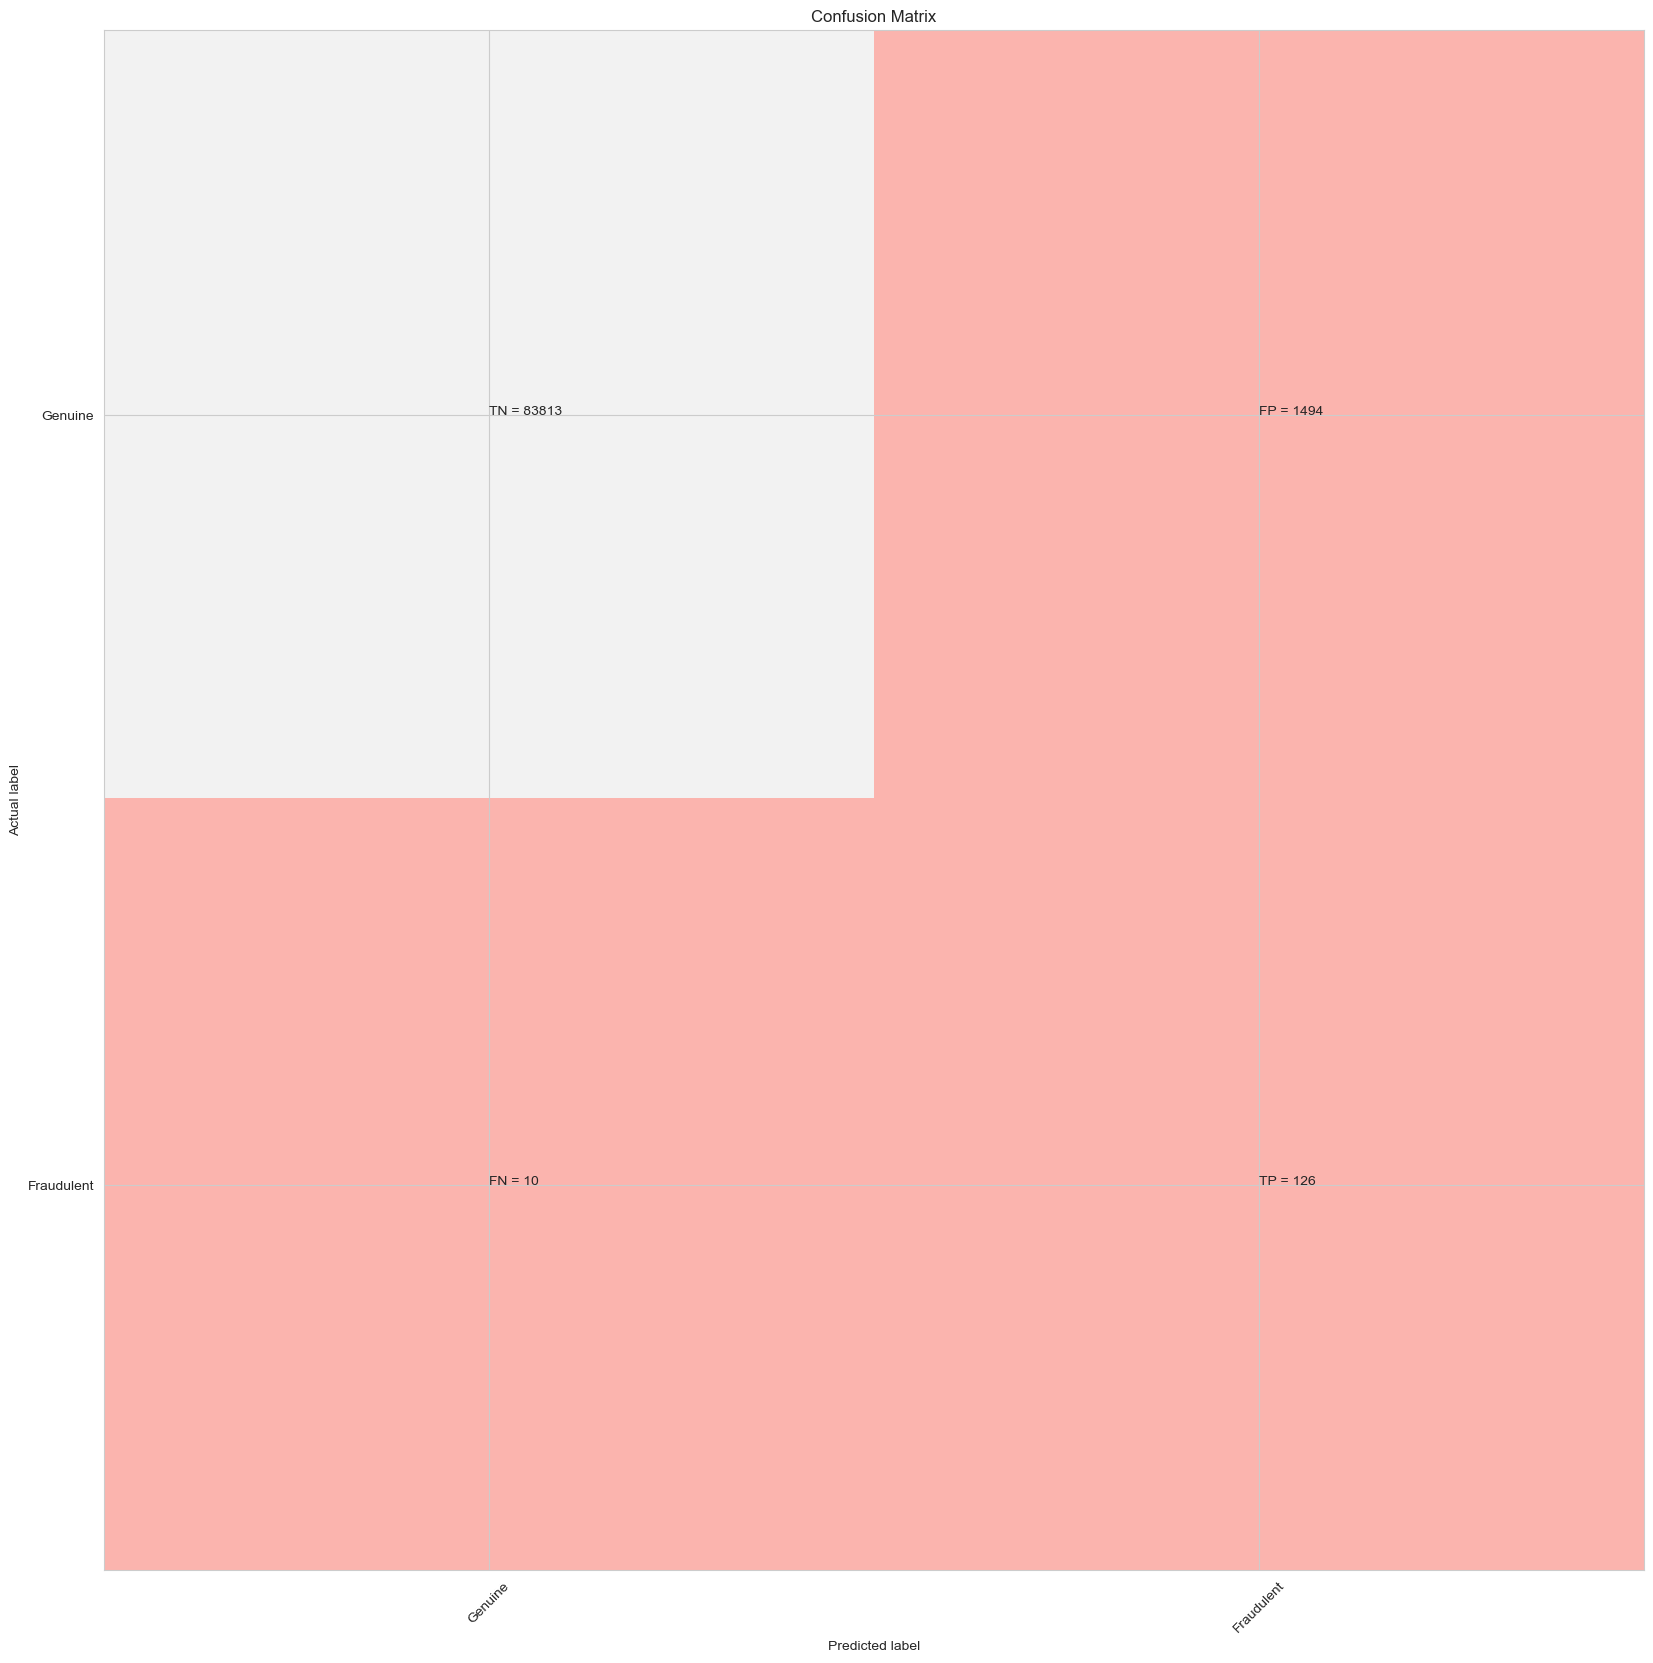

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.08      0.93      0.14       136

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.57     85443
weighted avg       1.00      0.98      0.99     85443

XGboost roc_value: 0.981861705025241
XGBoost threshold: 0.8366225957870483
ROC for the test dataset 98.2%


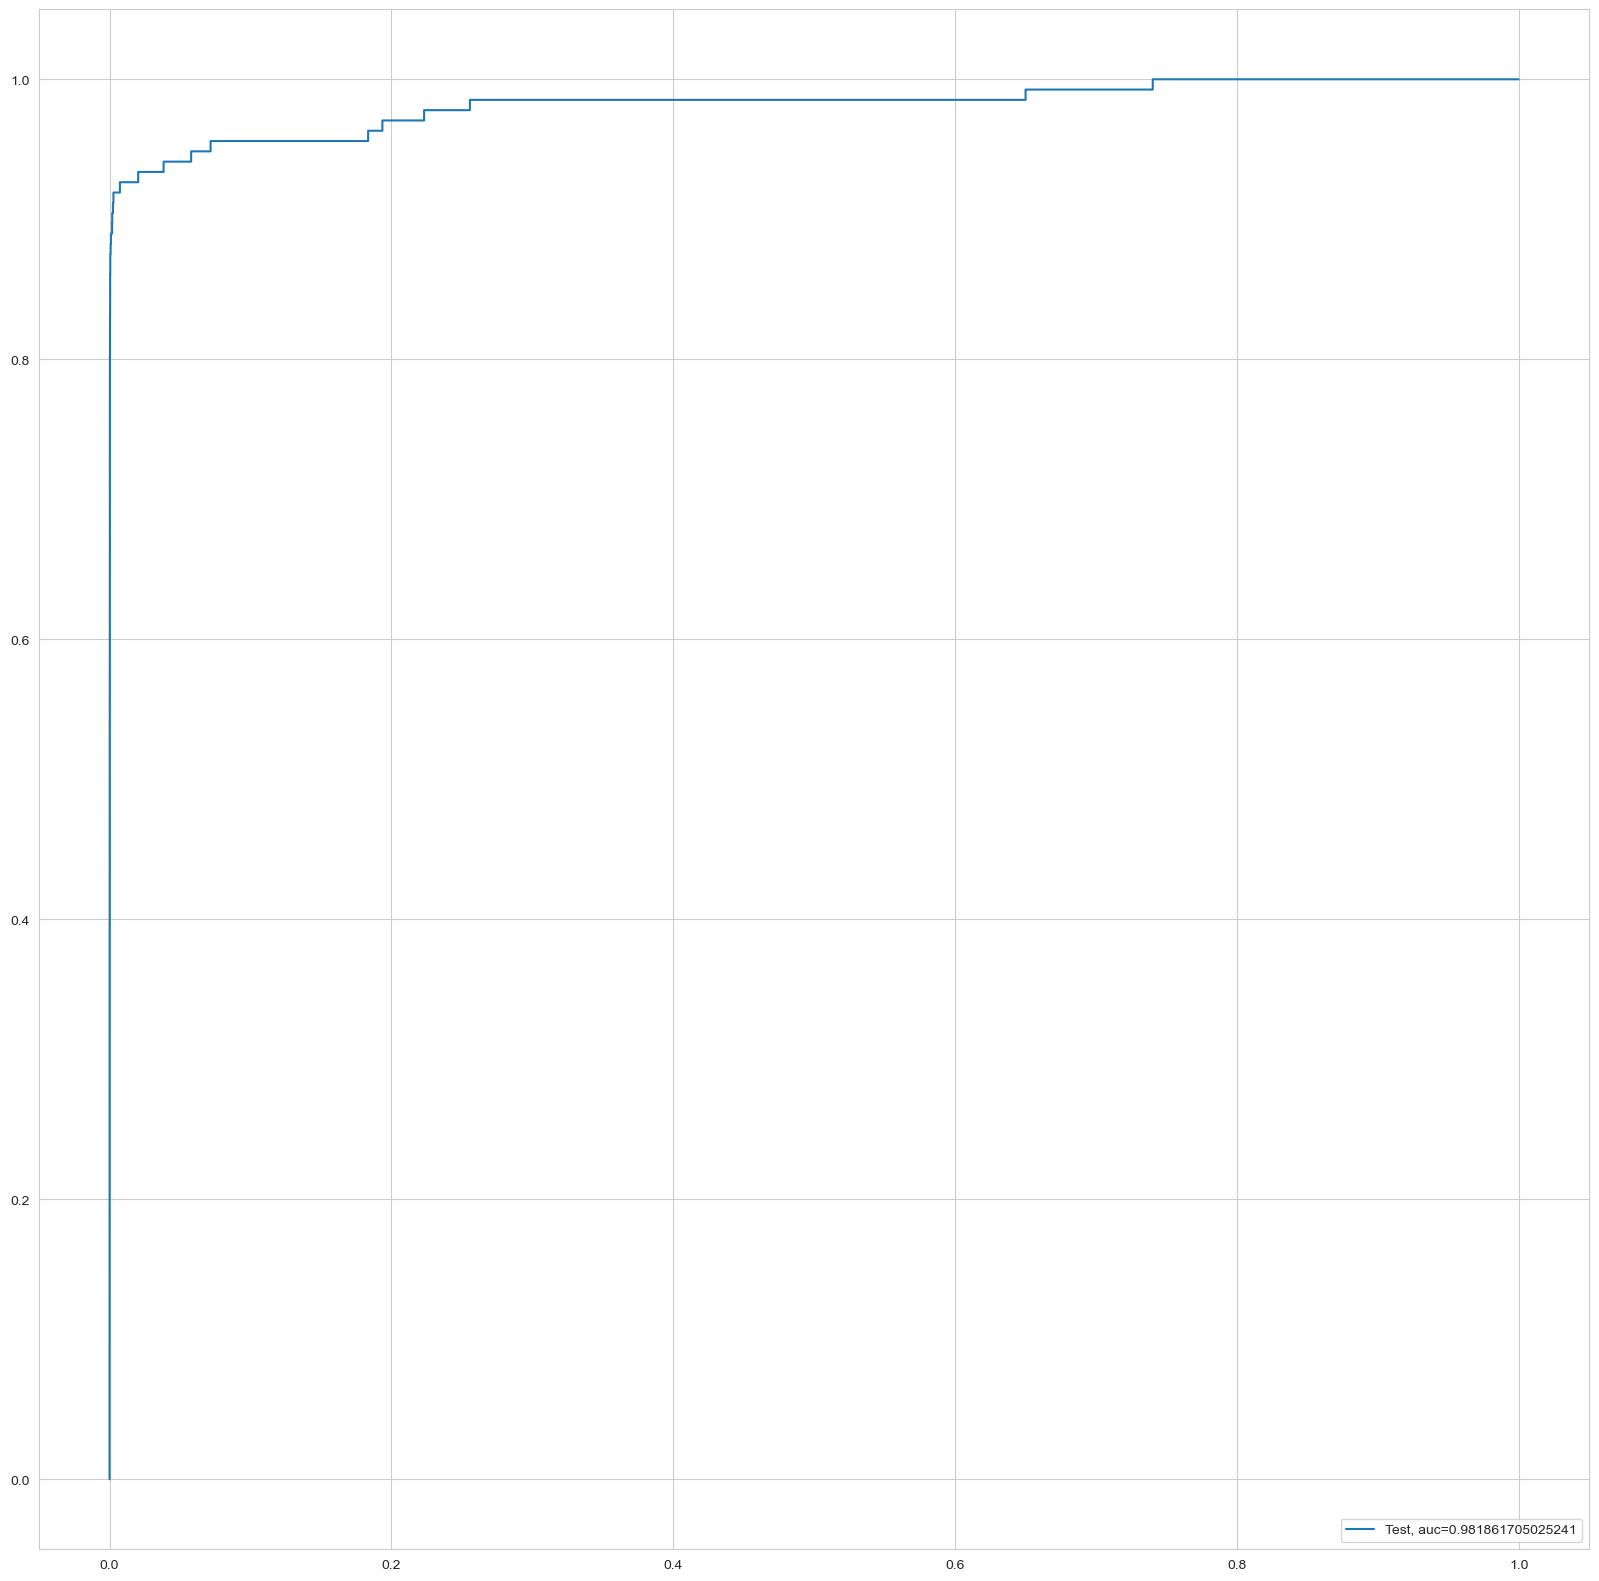

Time Elapsed: --- 0.7363760471343994 seconds ---


In [79]:
#Run XGBoost Model - Undersampling
print("XGBoost Model")
start_time = time.time()
Model_Perf_Results_df = XGBoostModels(Model_Perf_Results_df, "Random Undersampling", X_Under, y_Under, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

In [80]:
Model_Perf_Results_df

Data_Imbalance_Handling_Process  \
0                  Power Transformer   
1                  Power Transformer   
2                  Power Transformer   
3                  Power Transformer   
4                  Power Transformer   
5                  Power Transformer   
6                  Power Transformer   
7                  Power Transformer   
8     RepeatedKFold Cross Validation   
9     RepeatedKFold Cross Validation   
10    RepeatedKFold Cross Validation   
11    RepeatedKFold Cross Validation   
12    RepeatedKFold Cross Validation   
13    RepeatedKFold Cross Validation   
14    RepeatedKFold Cross Validation   
15    RepeatedKFold Cross Validation   
16  StratifiedKFold Cross Validation   
17  StratifiedKFold Cross Validation   
18  StratifiedKFold Cross Validation   
19  StratifiedKFold Cross Validation   
20  StratifiedKFold Cross Validation   
21  StratifiedKFold Cross Validation   
22  StratifiedKFold Cross Validation   
23  StratifiedKFold Cross Validation   
24              Random Undersampling   
25              Random Undersampling   
26              Random Undersampling   
27              Random Undersampling   
28              Random Undersampling   
29              Random Undersampling   
30              Random Undersampling   
31              Random Undersampling   

                                         Model  Accuracy  ROC_Value  Threshold  
0   Logistic Regression with L2 Regularisation  0.999228   0.985101   0.002730  
1   Logistic Regression with L1 Regularisation  0.999204   0.988625   0.007539  
2                                          KNN  0.999450   0.937369   0.200000  
3                                          SVM  0.998853   0.889853   0.000849  
4                Tree Model with gini criteria  0.999228   0.900507   1.000000  
5             Tree Model with entropy criteria  0.999216   0.889489   1.000000  
6                                Random Forest  0.999602   0.954549   0.020000  
7                                      XGBoost  0.999661   0.985249   0.000476  
8   Logistic Regression with L2 Regularisation  0.999175   0.972154   0.002105  
9   Logistic Regression with L1 Regularisation  0.999228   0.887823   0.037429  
10                                         KNN  0.999298   0.841574   0.200000  
11                                         SVM  0.998666   0.485525   0.001828  
12               Tree Model with gini criteria  0.999210   0.885839   1.000000  
13            Tree Model with entropy criteria  0.999368   0.892238   1.000000  
14                               Random Forest  0.999666   0.941190   0.010000  
15                                     XGBoost  0.999702   0.959122   0.000100  
16  Logistic Regression with L2 Regularisation  0.998771   0.983322   0.001566  
17  Logistic Regression with L1 Regularisation  0.998490   0.942320   0.004609  
18                                         KNN  0.998964   0.785364   0.200000  
19                                         SVM  0.998280   0.402015   0.002353  
20               Tree Model with gini criteria  0.998859   0.826258   1.000000  
21            Tree Model with entropy criteria  0.998982   0.816133   1.000000  
22                               Random Forest  0.999473   0.931063   0.010000  
23                                     XGBoost  0.999456   0.976748   0.000144  
24  Logistic Regression with L2 Regularisation  0.981859   0.985902   0.322748  
25  Logistic Regression with L1 Regularisation  0.998408   0.500000   1.500000  
26                                         KNN  0.993621   0.955706   0.400000  
27                                         SVM  0.904088   0.776347   0.466122  
28               Tree Model with gini criteria  0.931978   0.929229   1.000000  
29            Tree Model with entropy criteria  0.925646   0.933399   1.000000  
30                               Random Forest  0.986974   0.983634   0.440000  
31                                     XGBoost  0.982398   0.981862   0.836623

#### Accuracy has decreased when we use Undersampling.

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling

In [81]:
# Logistic Regression
#from sklearn import linear_model #import the package

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

#Define Oversampler
ROS = RandomOverSampler(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = ROS.fit_resample(X_train, y_train)


skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index] 
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]  
    ROS = RandomOverSampler(sampling_strategy=0.5)
    X_over, y_over= ROS.fit_resample(X_train, y_train)
  
#Create Dataframe for X_over
X_over = pd.DataFrame(data=X_over, columns=var)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9880212799537944
Max auc_roc for l1: 0.5
Parameters for l2 regularisation
Coefficient: [[ 0.48699192  0.39895559  0.01911159  0.83464555  0.55143404 -0.44119443
  -0.33419071 -0.36177815 -0.24642998 -0.68416695  0.14447503 -0.96786766
  -0.28713219 -0.92784446 -0.15656784 -0.54495046 -0.41571488 -0.05572584
   0.18551642 -0.78911541  0.15906965  0.83004184  0.16756385 -0.28810755
  -0.05848303 -0.04952485 -0.41542932  0.1607474   0.00594788 -1.78217981
   0.01896392  0.00405917]]
Intercept: [-4.43857674]
Score: {1: array([[0.62719901, 0.75460751, 0.90366094, 0.95442164, 0.97669803,
        0.98560005, 0.9873077 , 0.98813913, 0.98875252, 0.98889126,
        0.98891637, 0.98891637, 0.98891637, 0.98891637, 0.98891637,
        0.98891637, 0.98891637, 0.98891637, 0.98891637, 0.98891637],
       [0.63210018, 0.75654447, 0.90421449, 0.95613646, 0.97774341,
        0.98544106, 0.98674653, 0.98734541, 0.98784094, 0.98795672

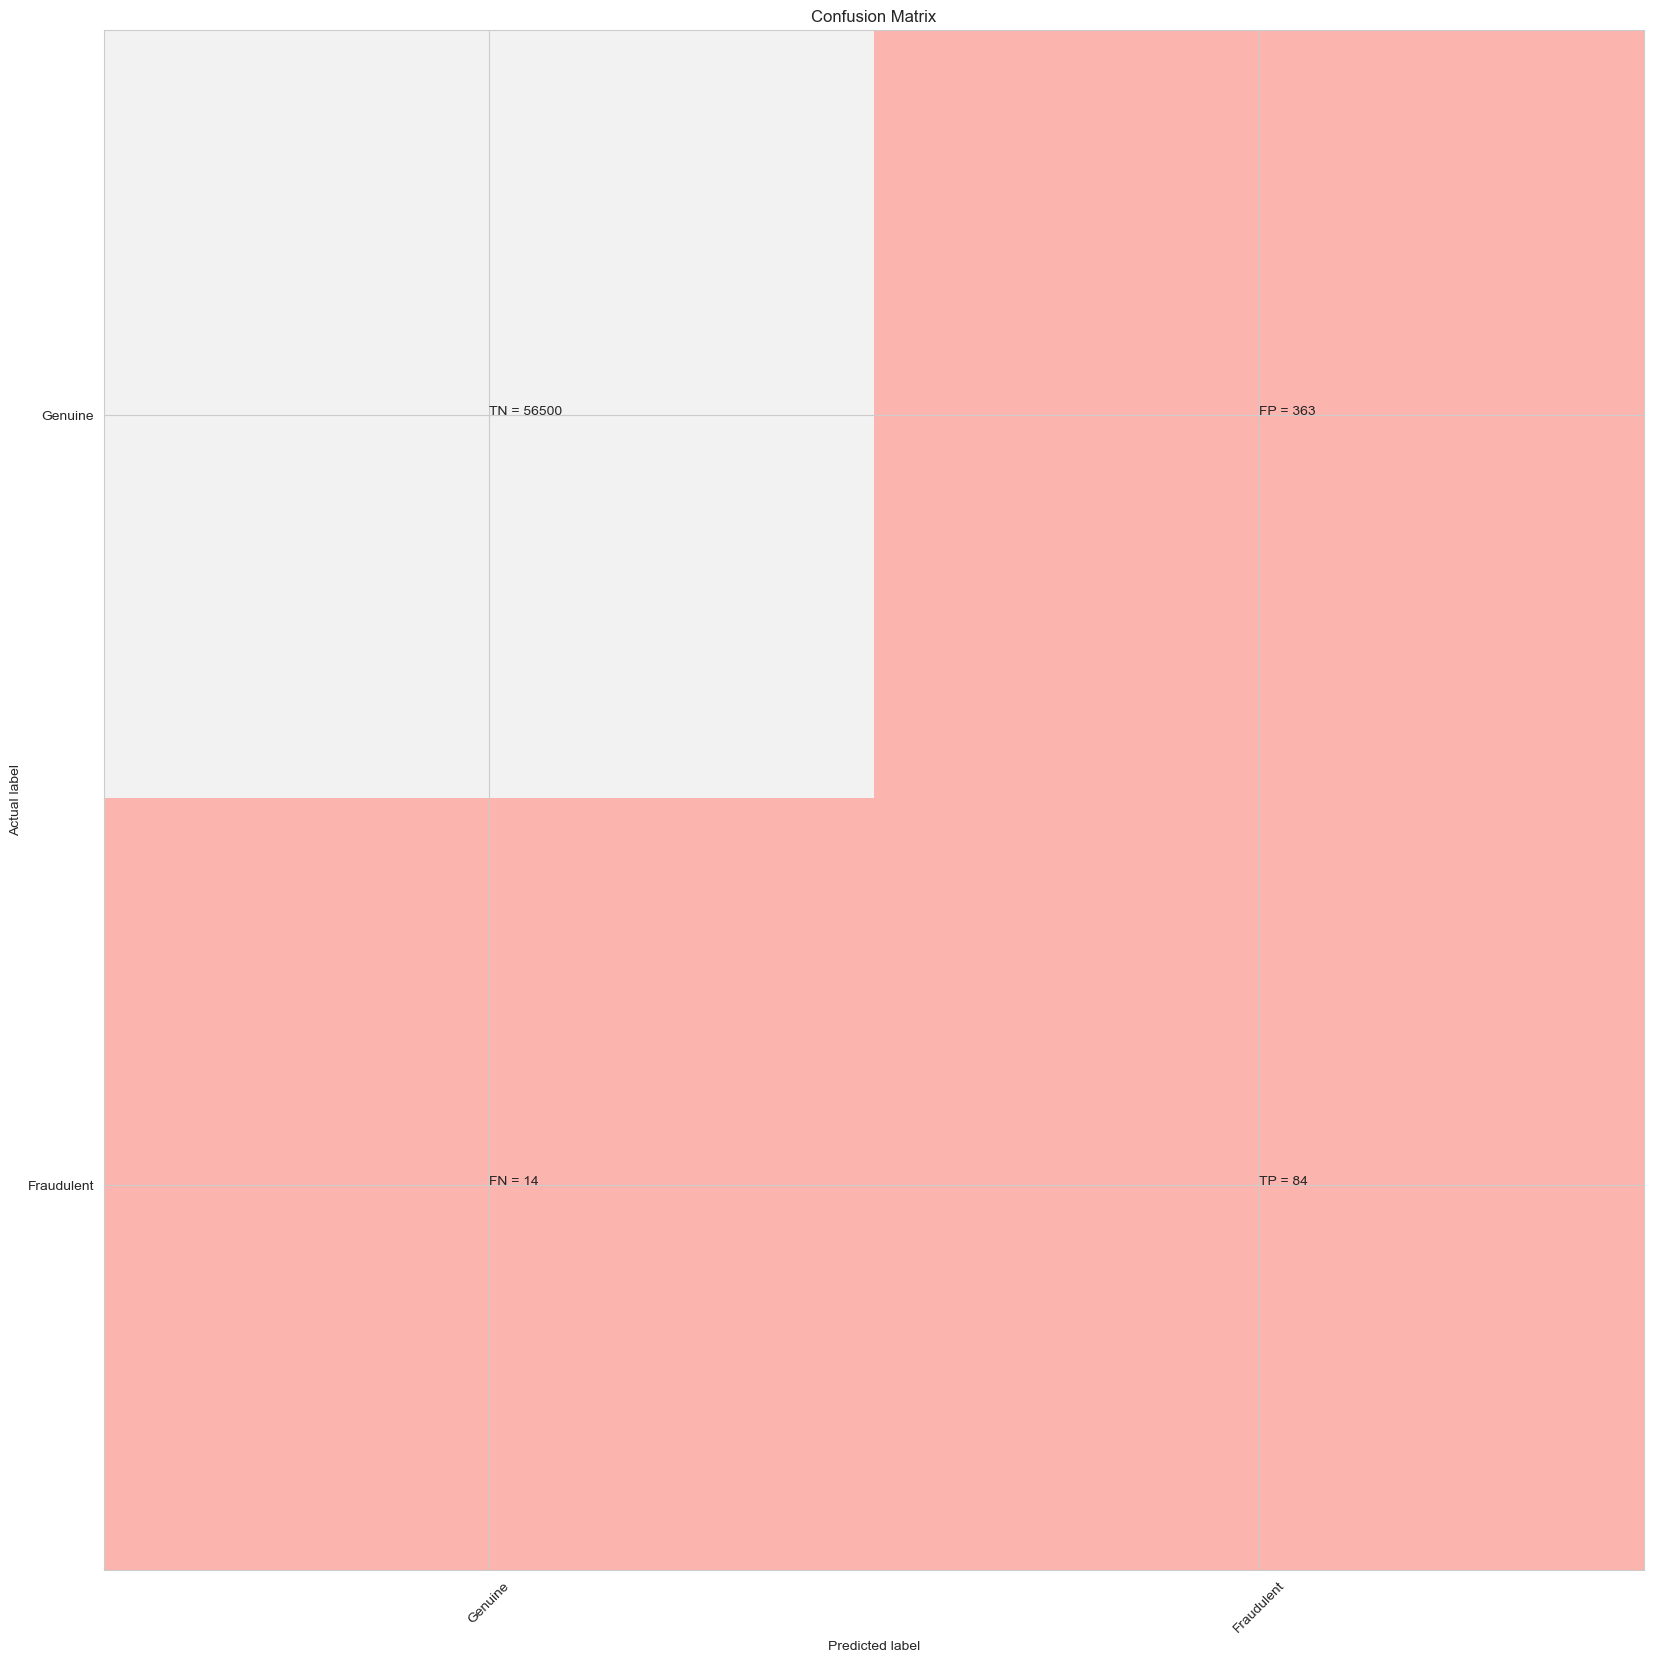

Classification Report with l2
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56863
           1       0.19      0.86      0.31        98

    accuracy                           0.99     56961
   macro avg       0.59      0.93      0.65     56961
weighted avg       1.00      0.99      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix with l1


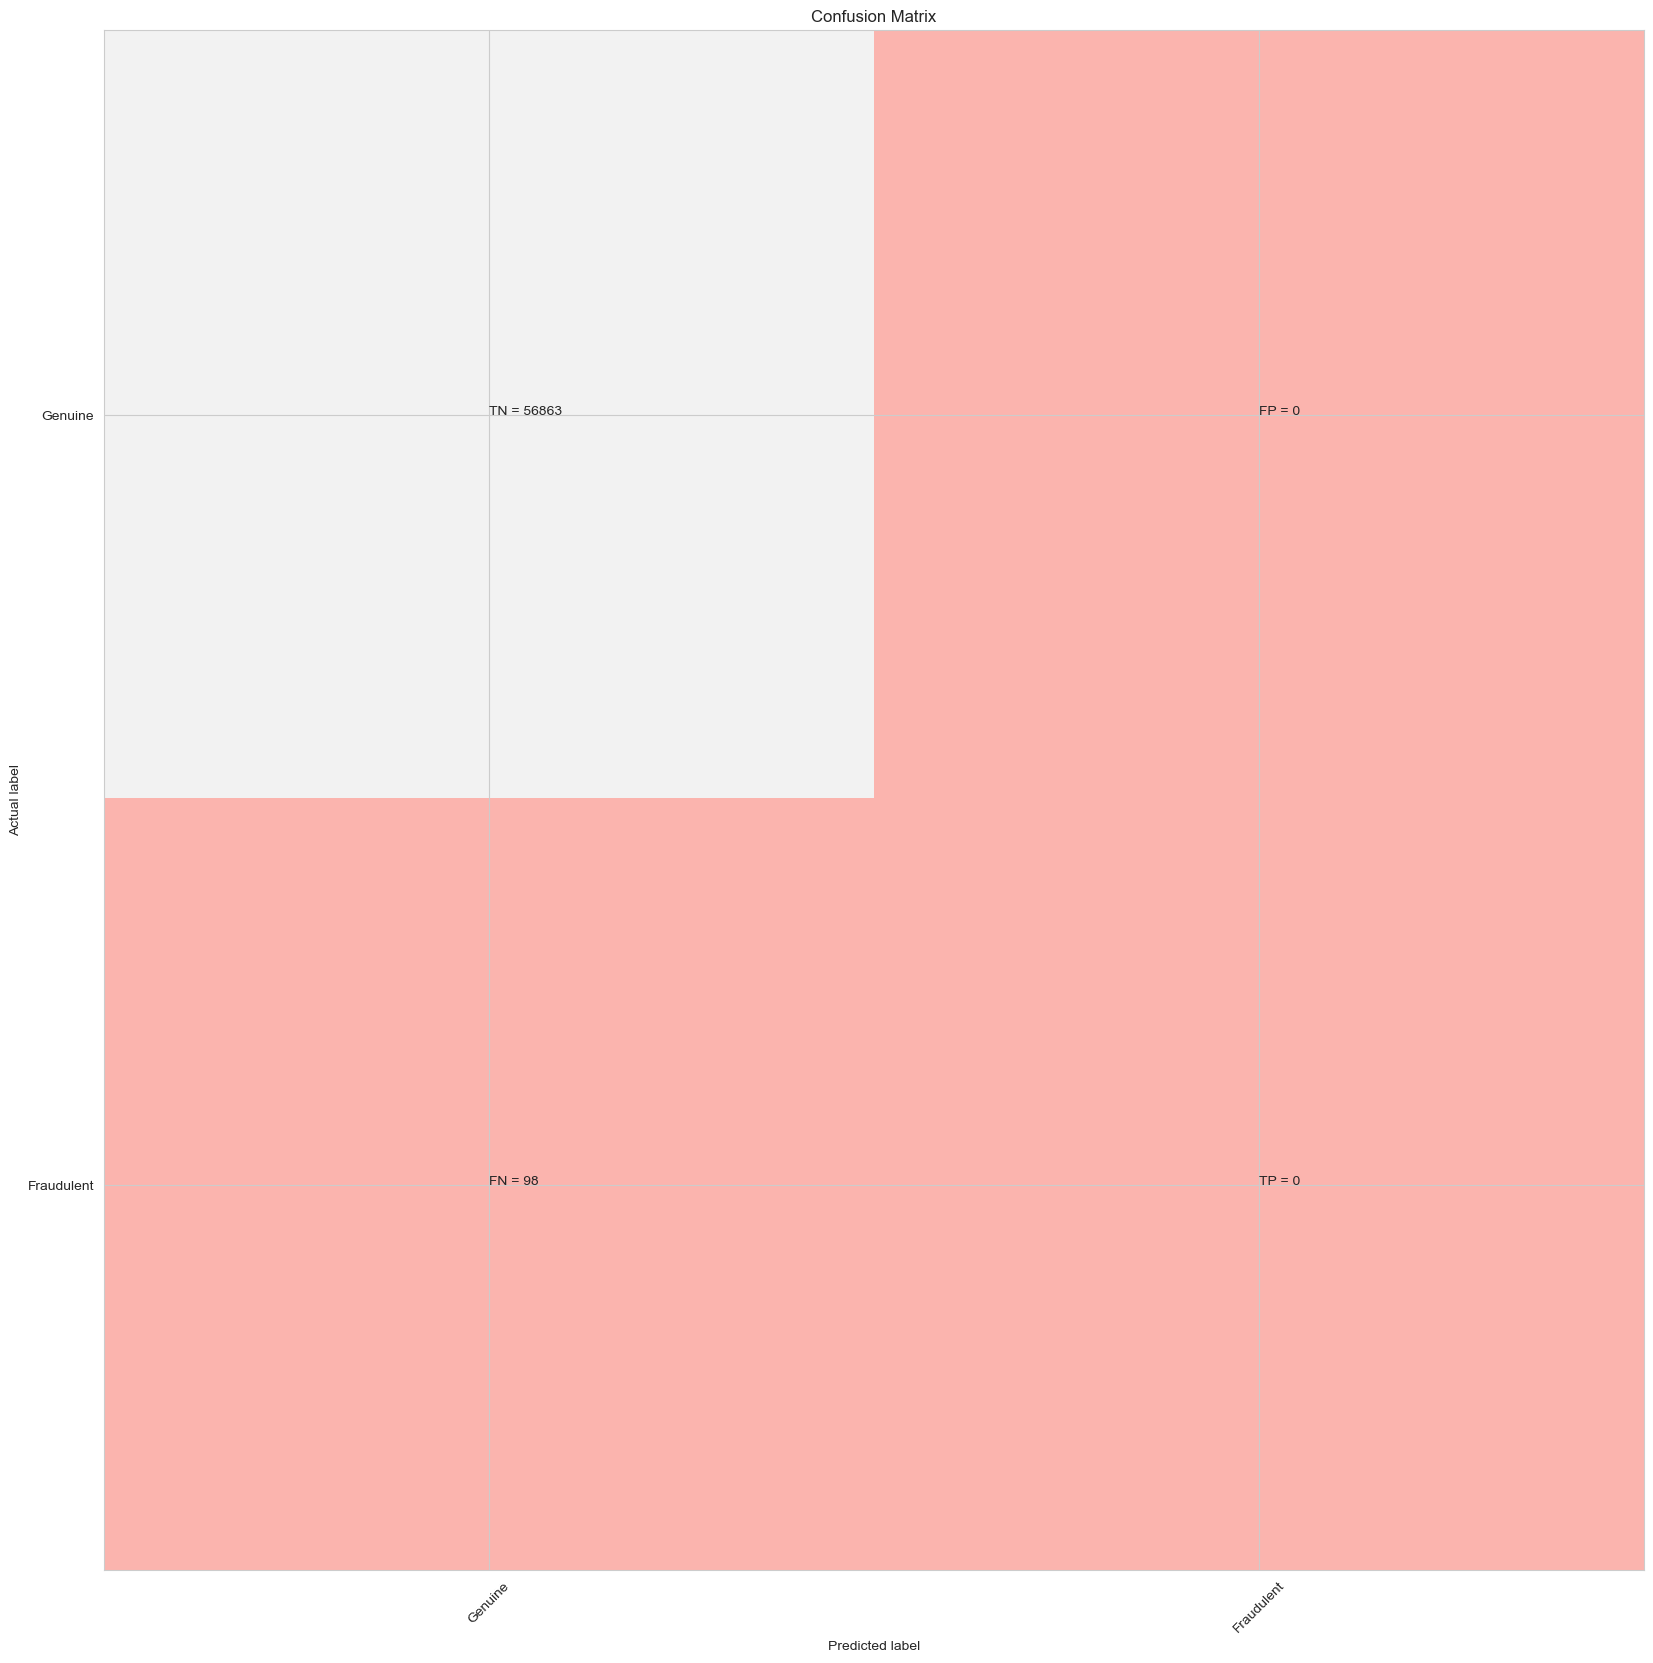

classification Report with l1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.982724859284058
l2 threshold: 0.3307310812166353
ROC for the test dataset 98.3%


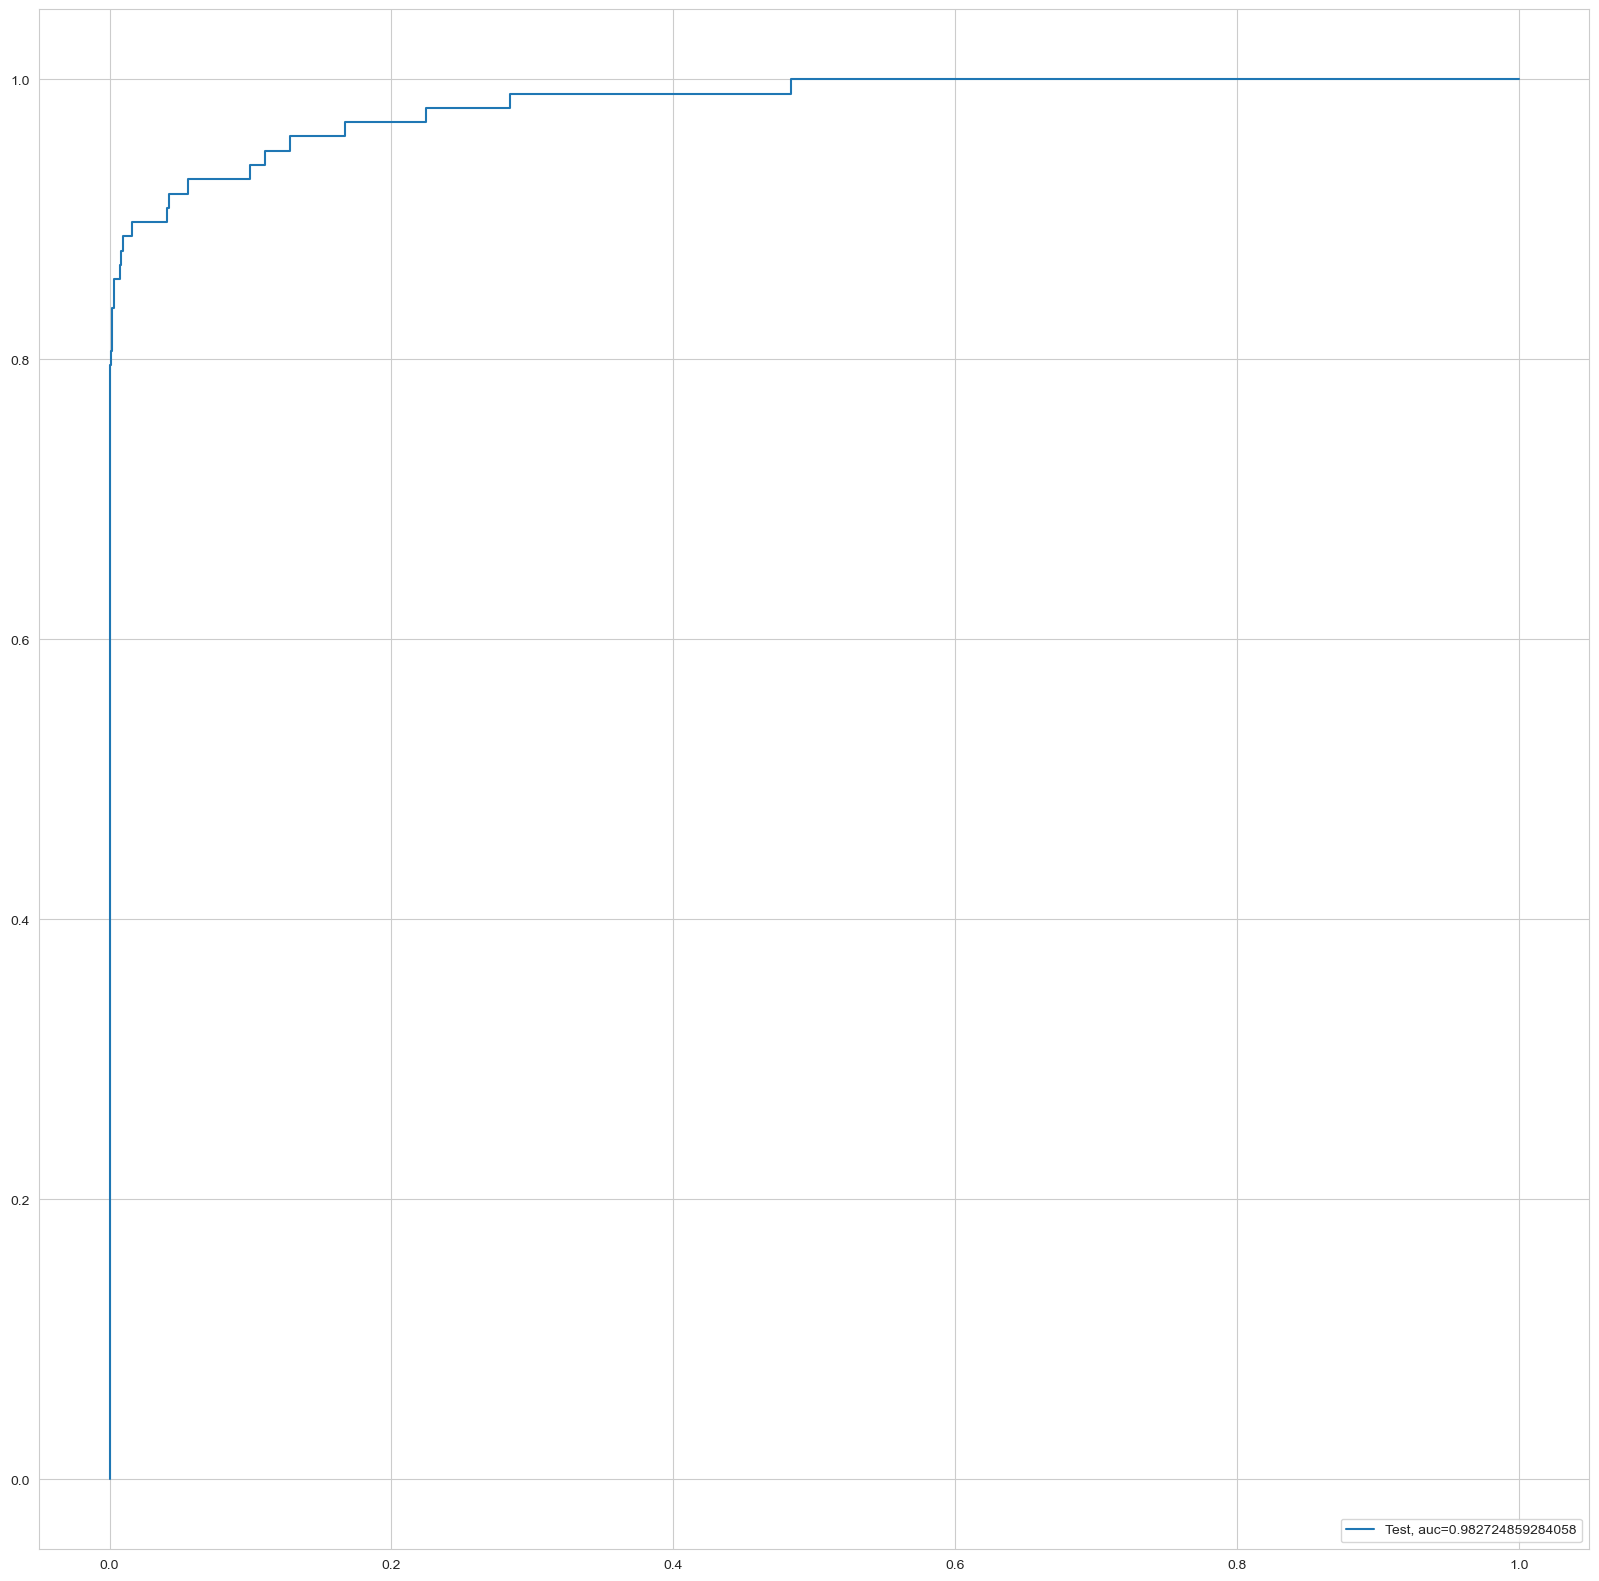

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


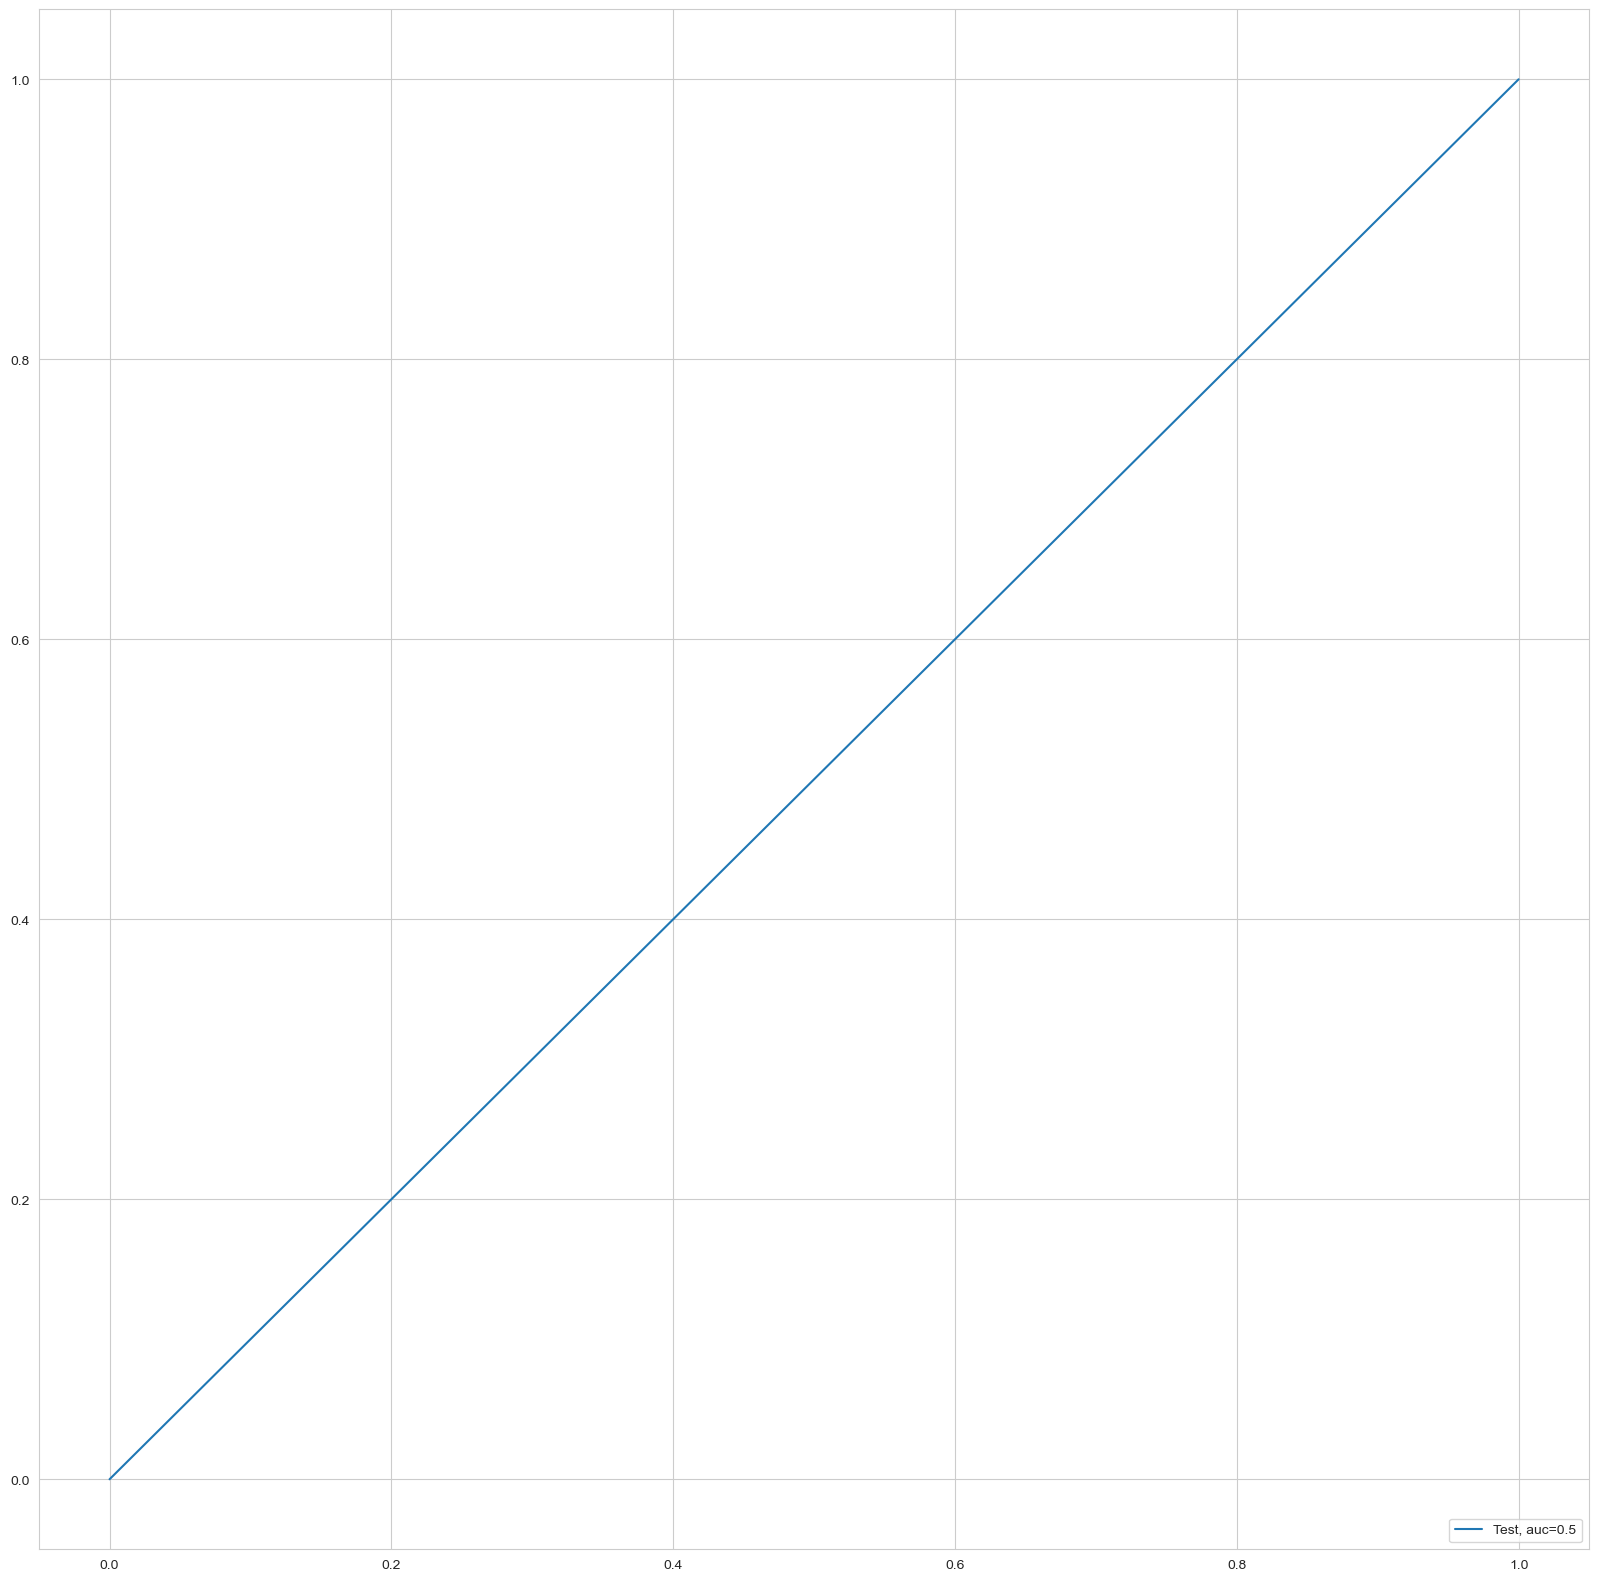

Time Elapsed: --- 128.87275099754333 seconds ---


In [82]:
Data_Imbalance_Handiling	 = "Random Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation - Random Oversampling with StratifiedKFold CV
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
Model_Perf_Results_df = LogisticModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_over, y_over, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

KNN Model
model score
0.998490195045733
Confusion Matrix


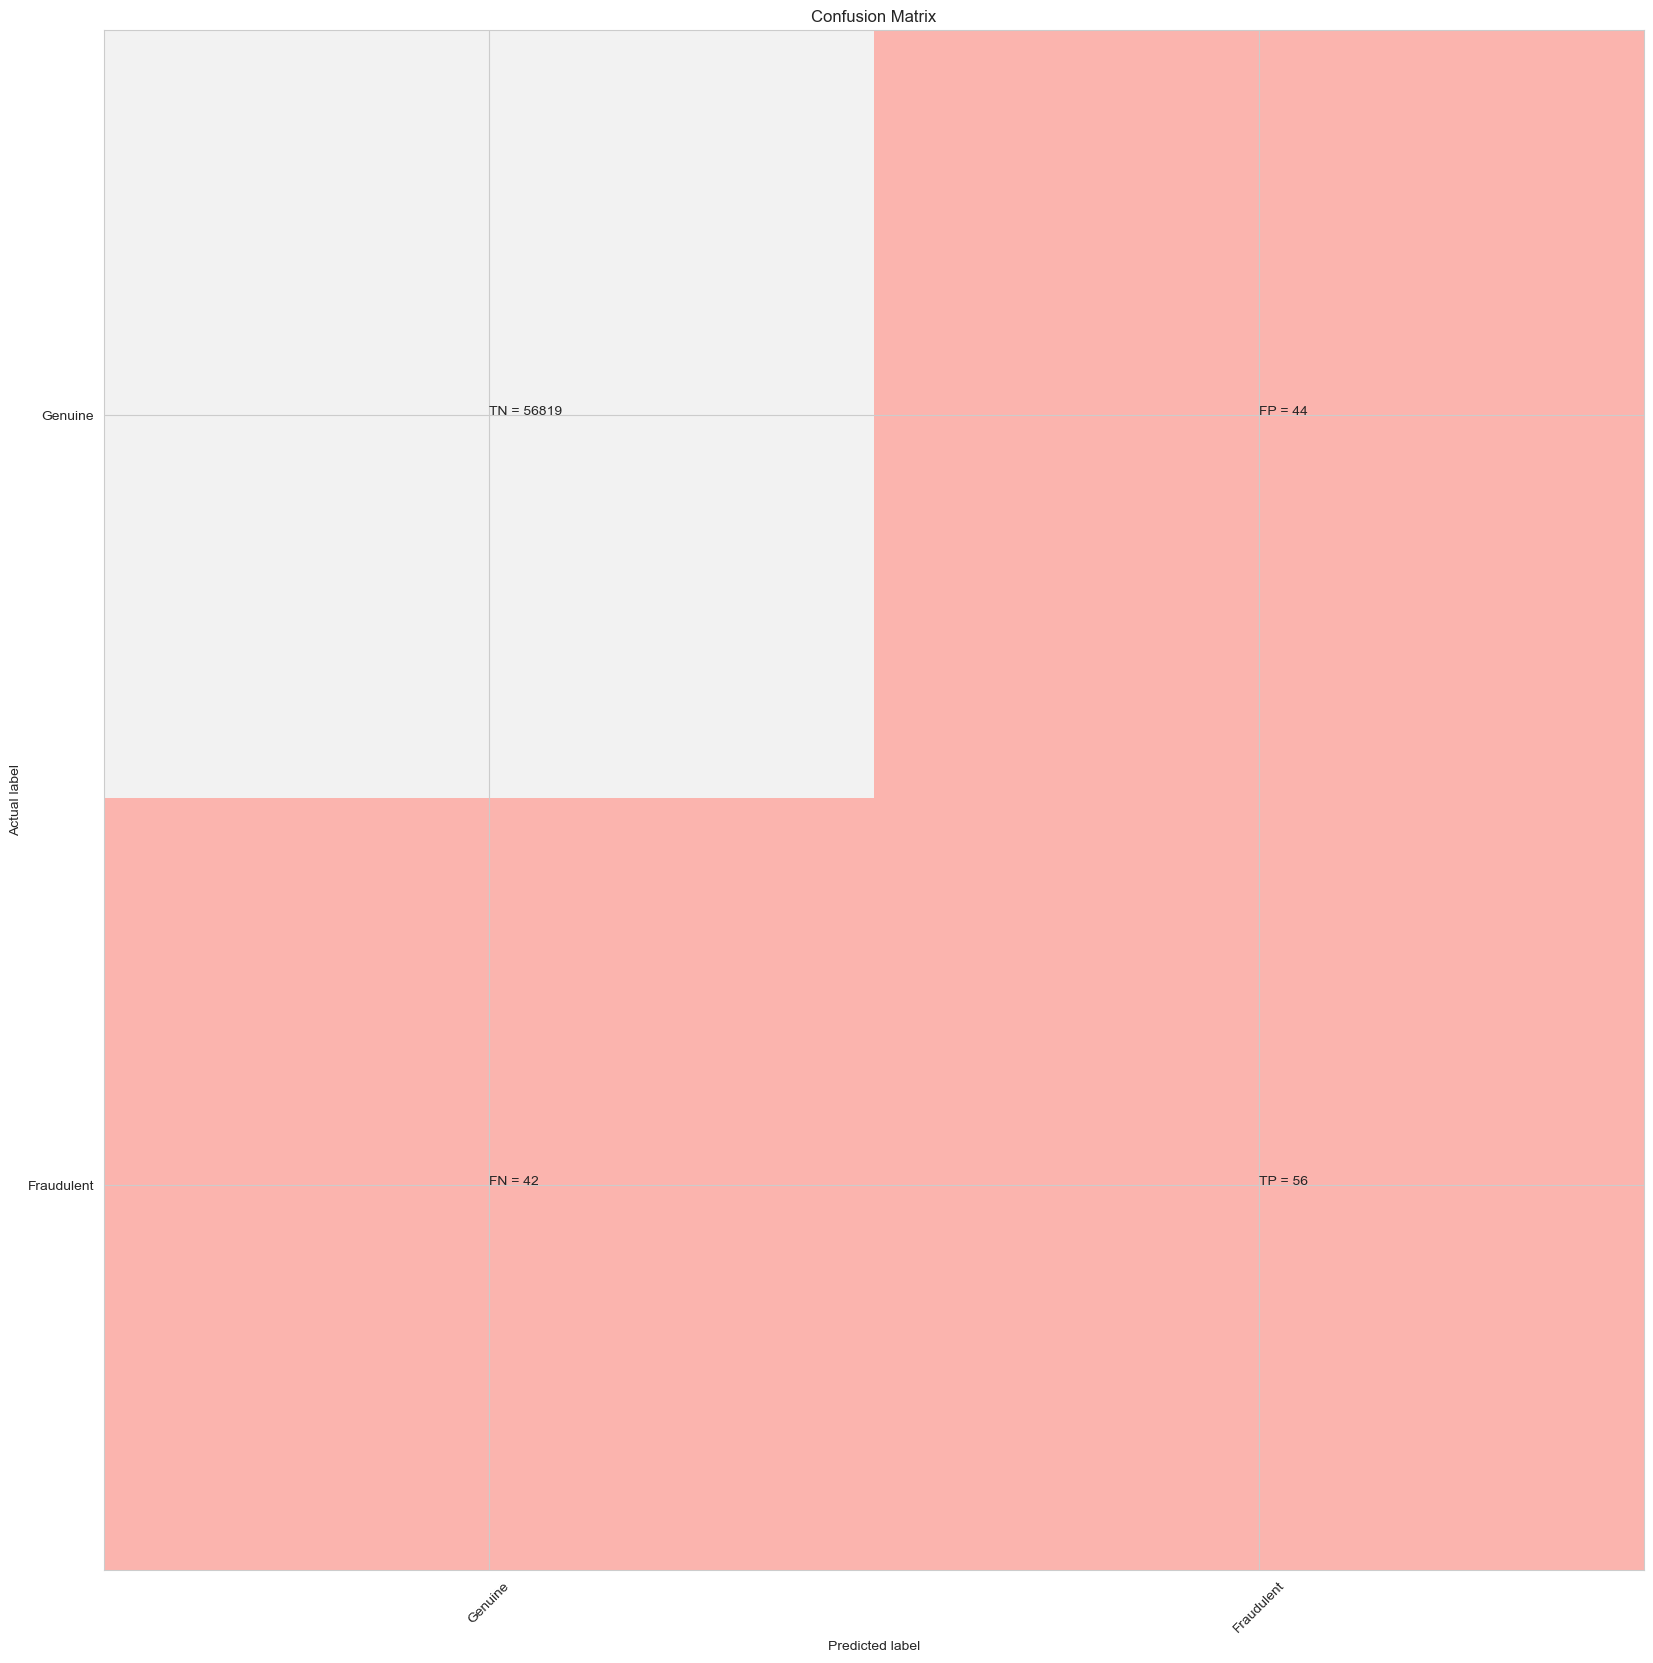

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.56      0.57      0.57        98

    accuracy                           1.00     56961
   macro avg       0.78      0.79      0.78     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc_value: 0.7853291853997811
KNN threshold: 0.6
ROC for the test dataset 78.5%


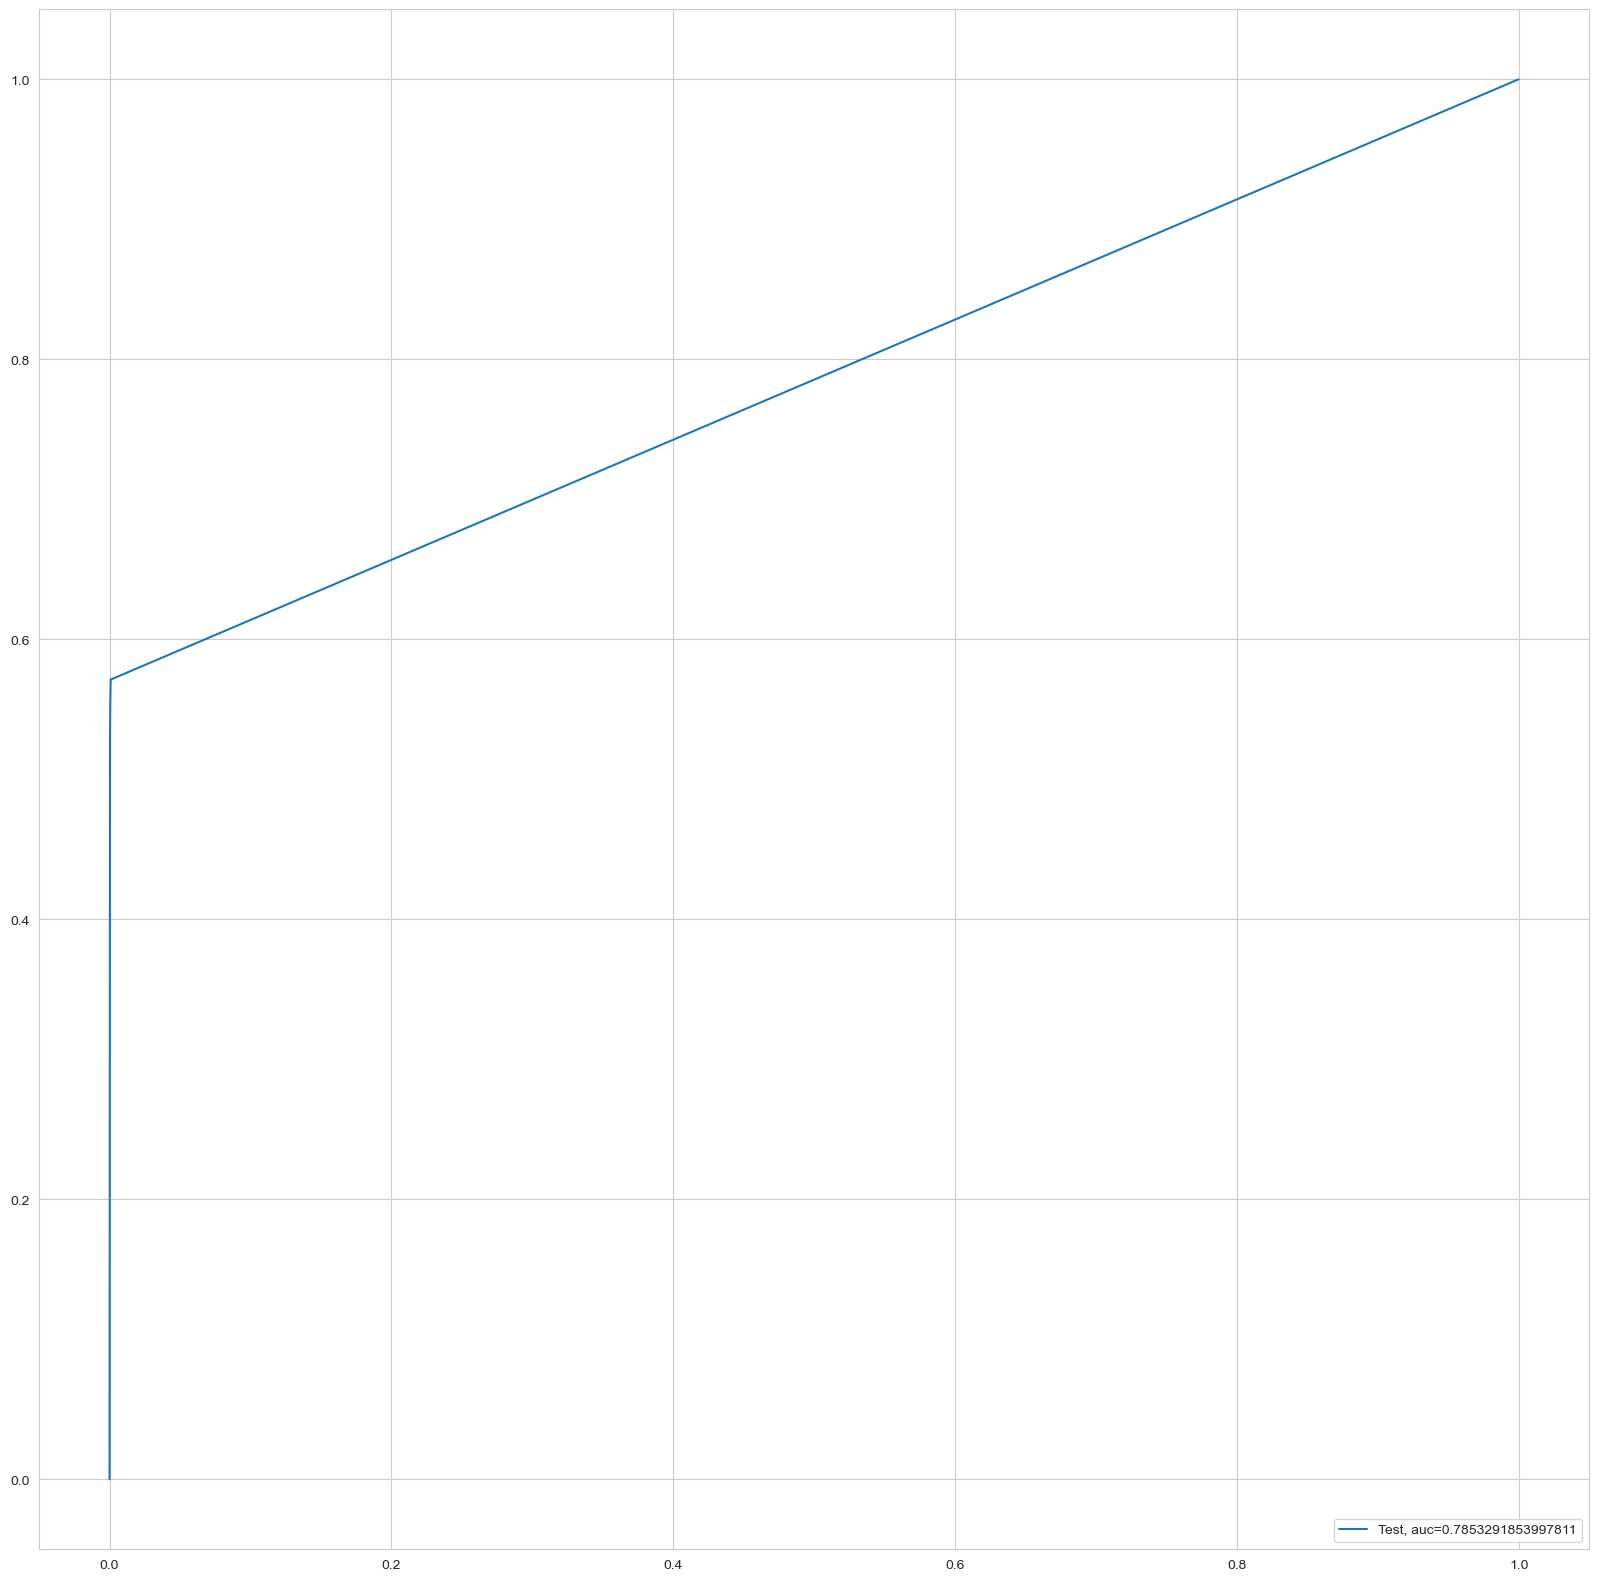

Time Elapsed: --- 1256.344120979309 seconds ---


In [83]:
#Run KNN Model - Random Oversampling with StratifiedKFold CV
print("KNN Model")
start_time = time.time()
Model_Perf_Results_df = KNNModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_over, y_over, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

In [84]:
#### We're skipping the execution of this model as this is taking a lot of time to execute and does not add much value as it's not among top performing models in previous runs.
#Run SVM Model with Sigmoid Kernel - Random Oversampling with StratifiedKFold CV
#print("SVM Model with Sigmoid Kernel")
#start_time = time.time()
#df_Results = buildAndRunSVMModels(df_Results , Data_Imbalance_Handiling,X_over, y_over, X_test, y_test)
#print("Time Taken by Model: --- %s seconds ---" % (time.time() - start_time))

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9989817594494479
Confusion Matrix


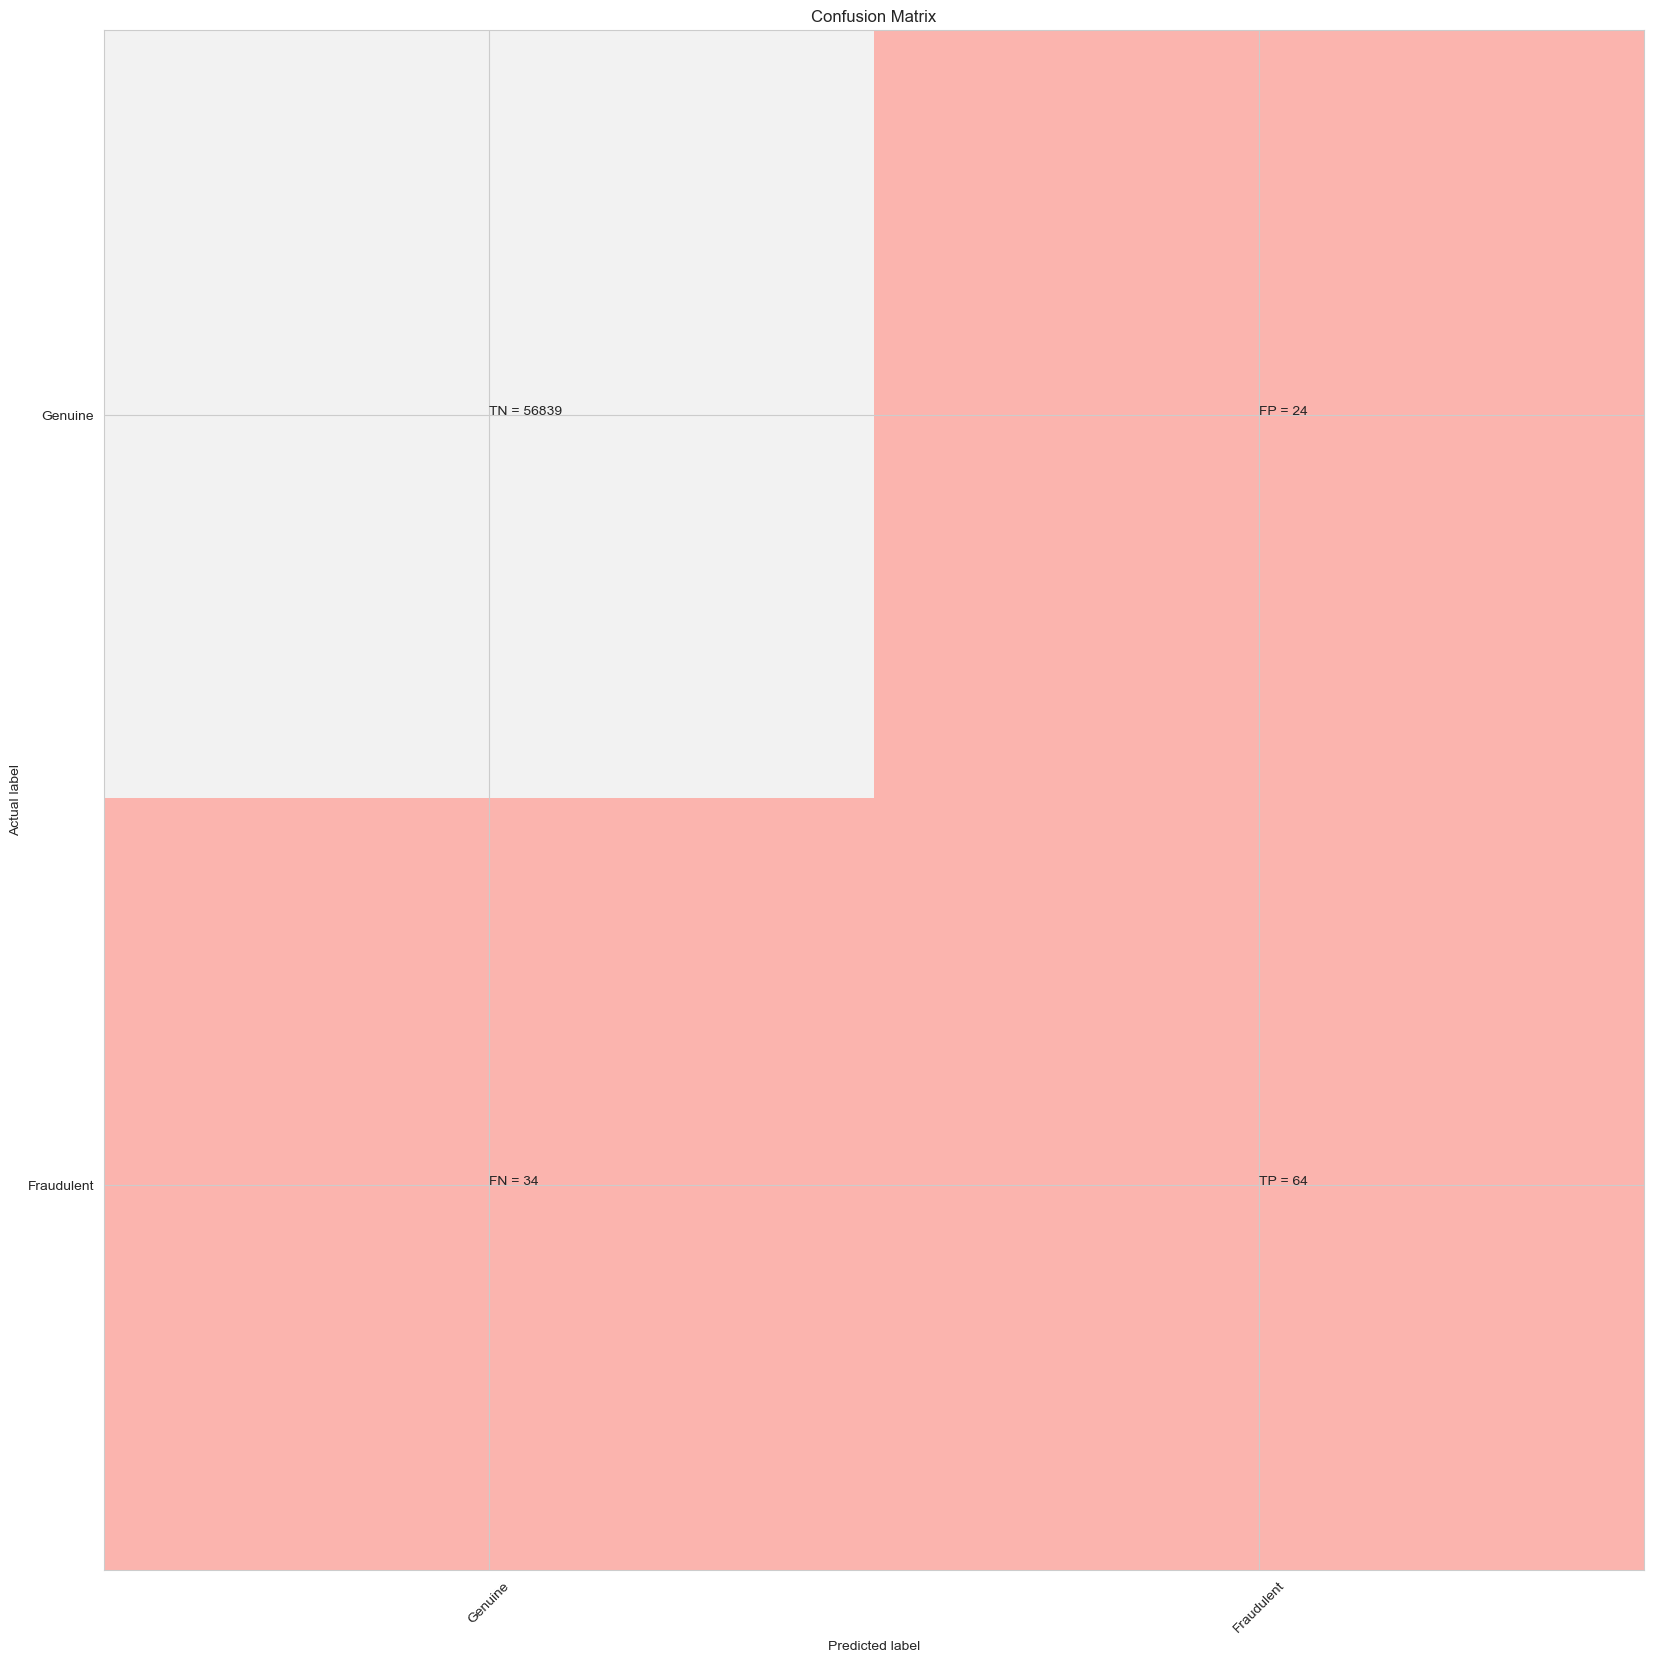

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.73      0.65      0.69        98

    accuracy                           1.00     56961
   macro avg       0.86      0.83      0.84     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8263195787081515
Tree threshold: 1.0
ROC for the test dataset 82.6%


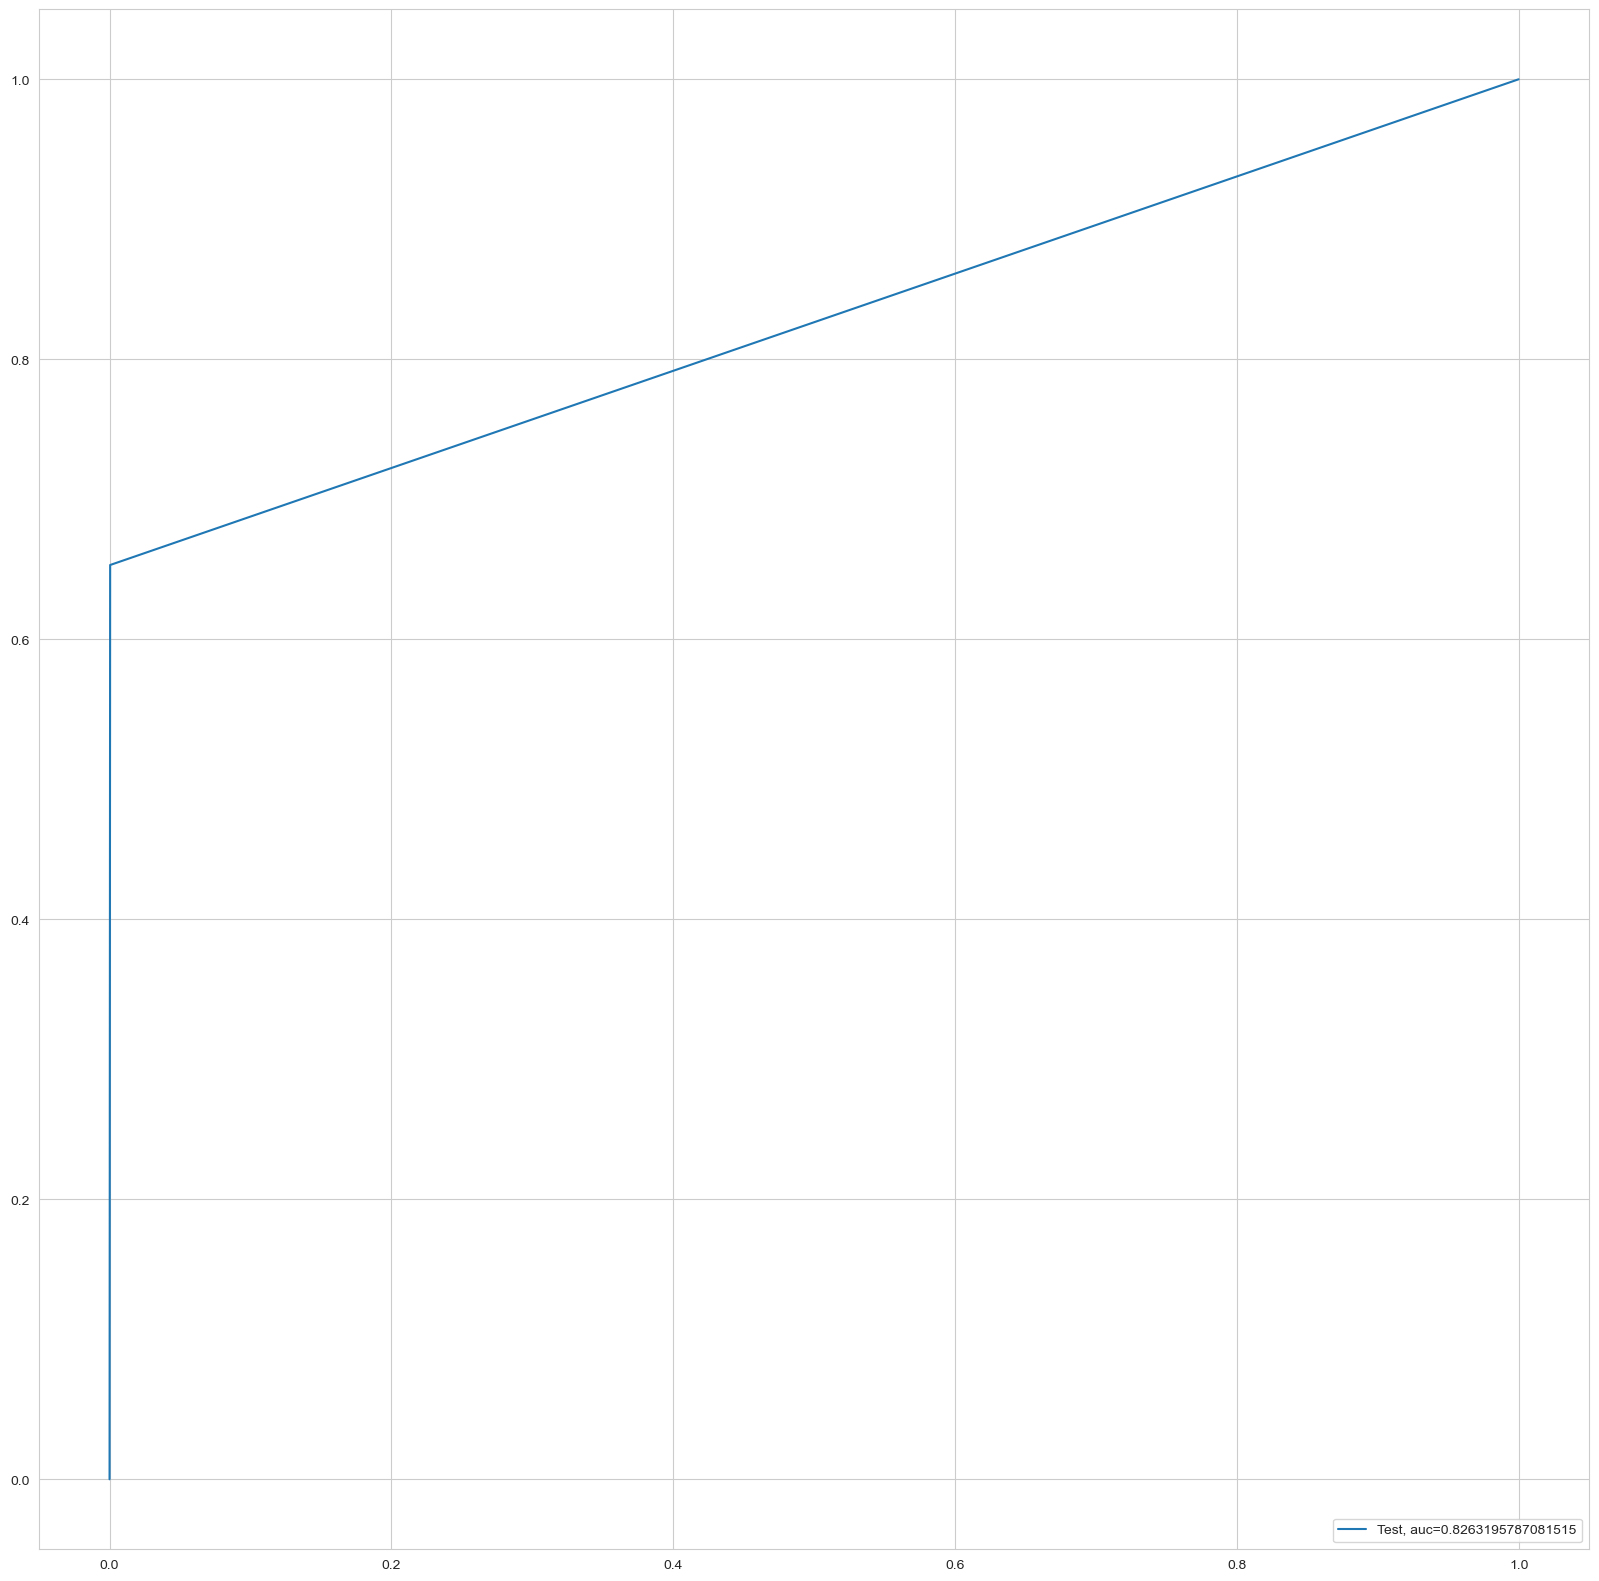

entropy score: 0.9991397622934991
Confusion Matrix


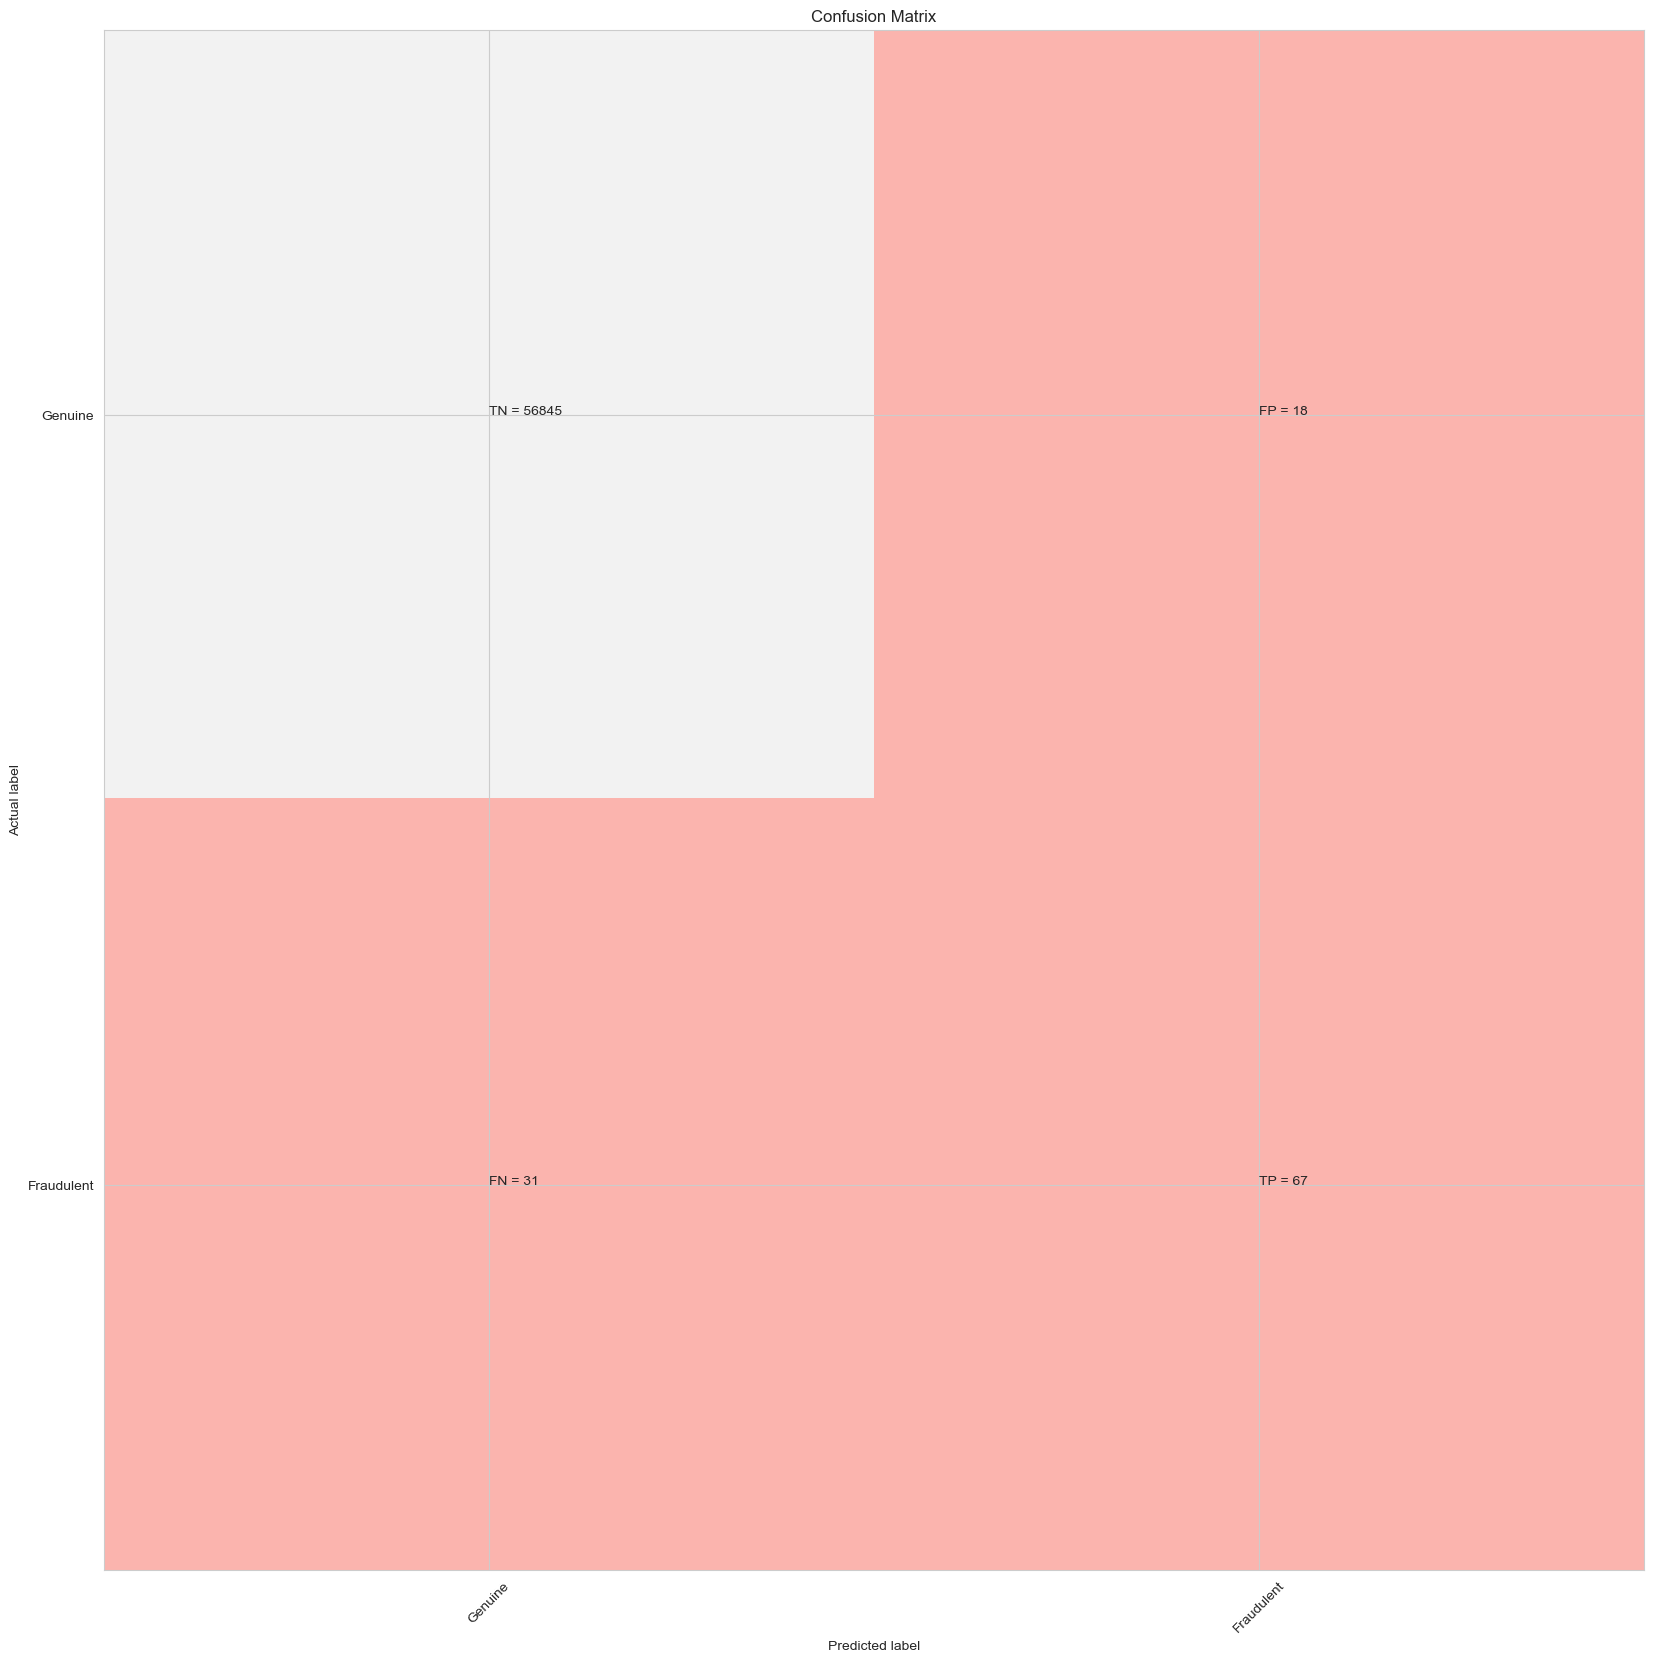

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.79      0.68      0.73        98

    accuracy                           1.00     56961
   macro avg       0.89      0.84      0.87     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8416784595413179
Tree threshold: 1.0
ROC for the test dataset 84.2%


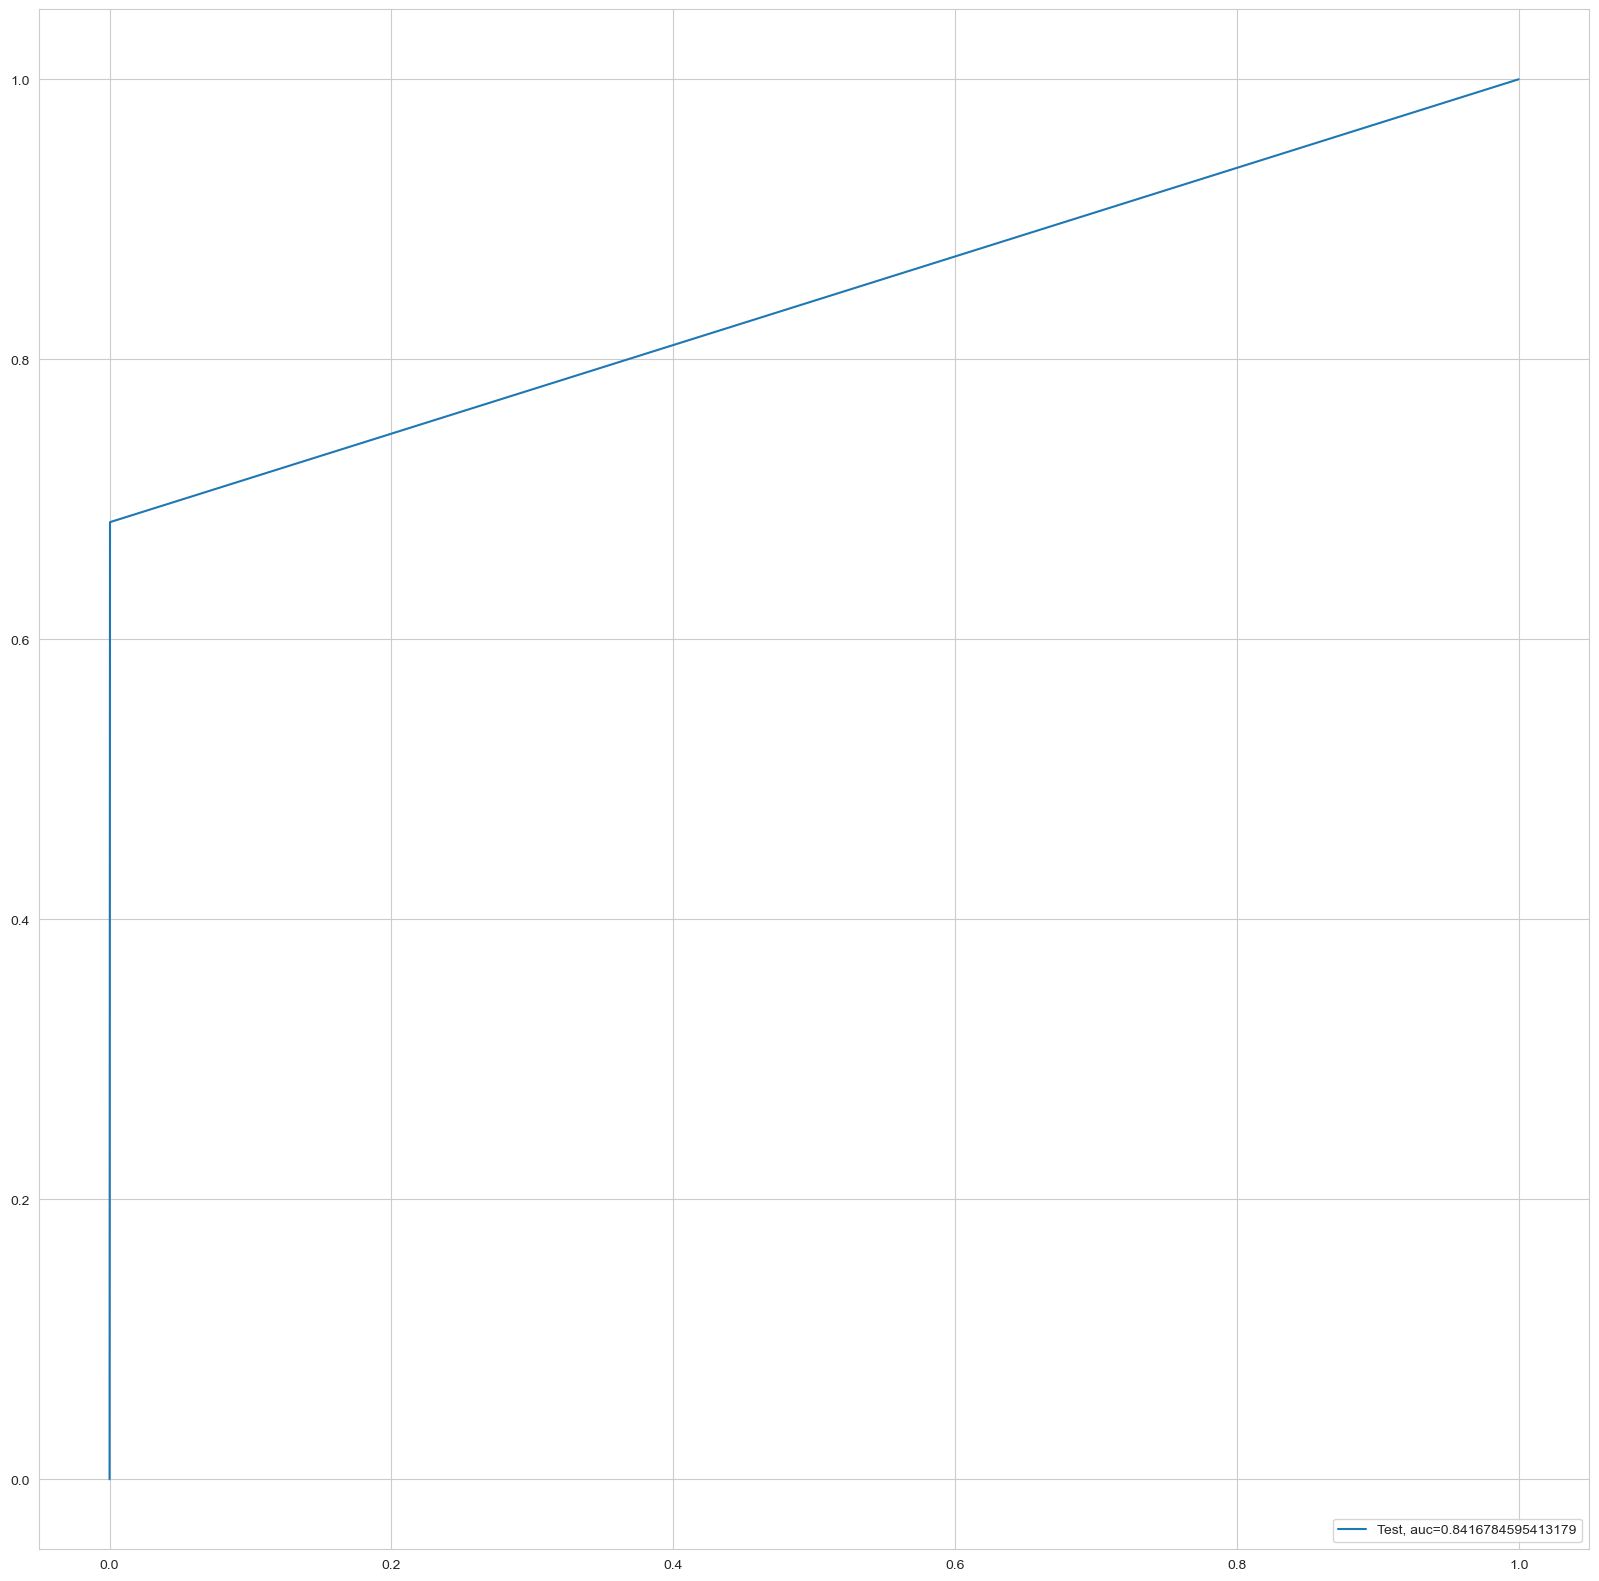

Time Elapsed: --- 14.548814058303833 seconds ---


In [85]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria - Random Oversampling with StratifiedKFold CV
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
Model_Perf_Results_df = DecisionTreeModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_over, y_over, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Model Accuracy: 0.9994557679816014
Confusion Matrix


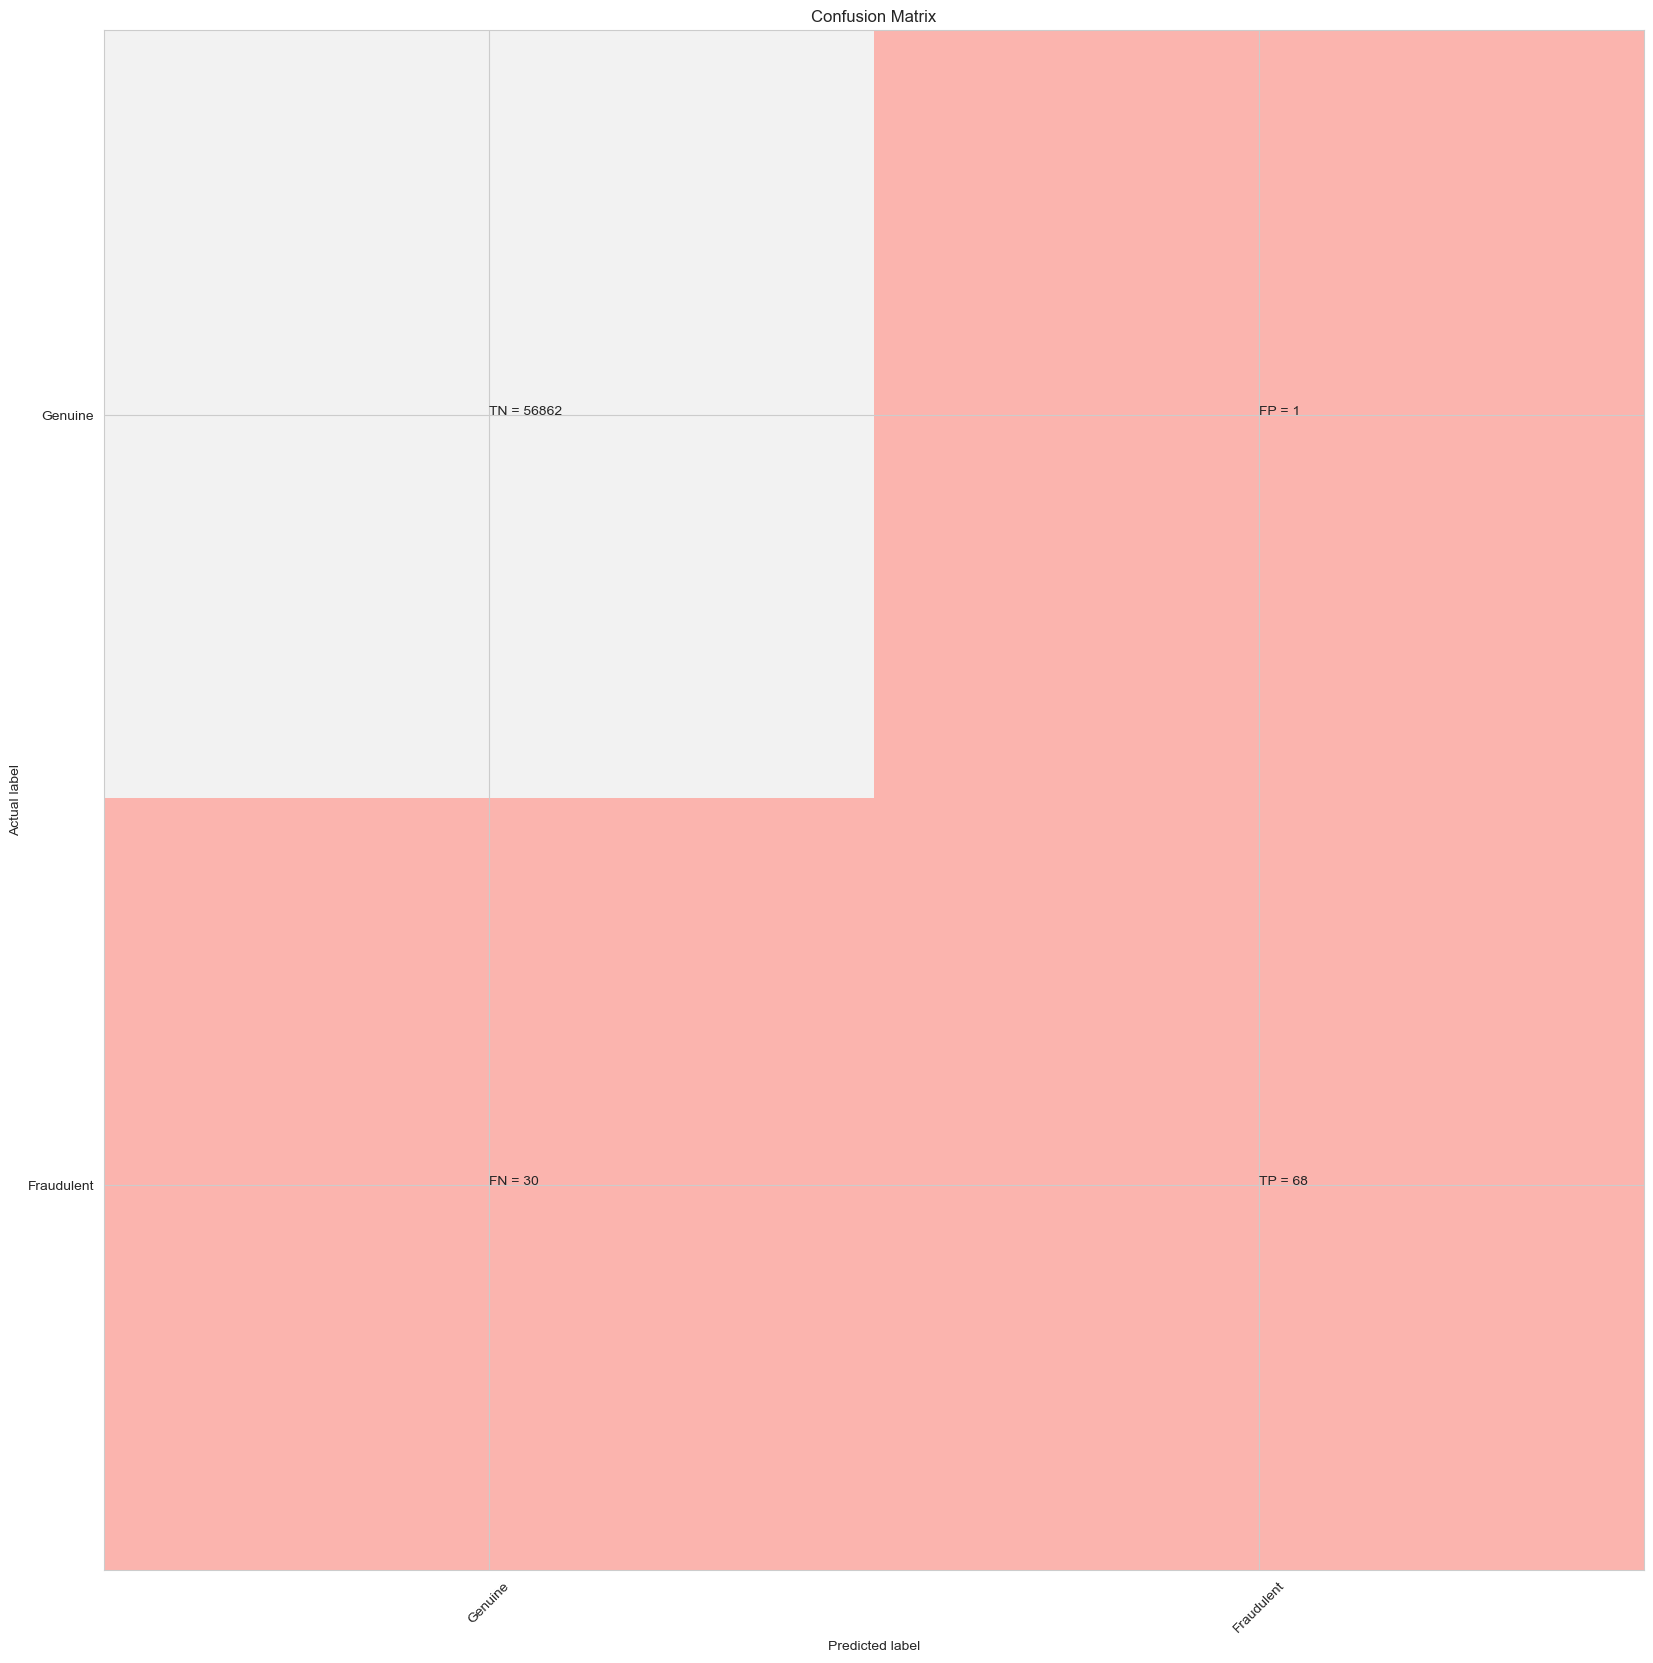

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9412620630968741
Random Forest threshold: 0.02
ROC for the test dataset 94.1%


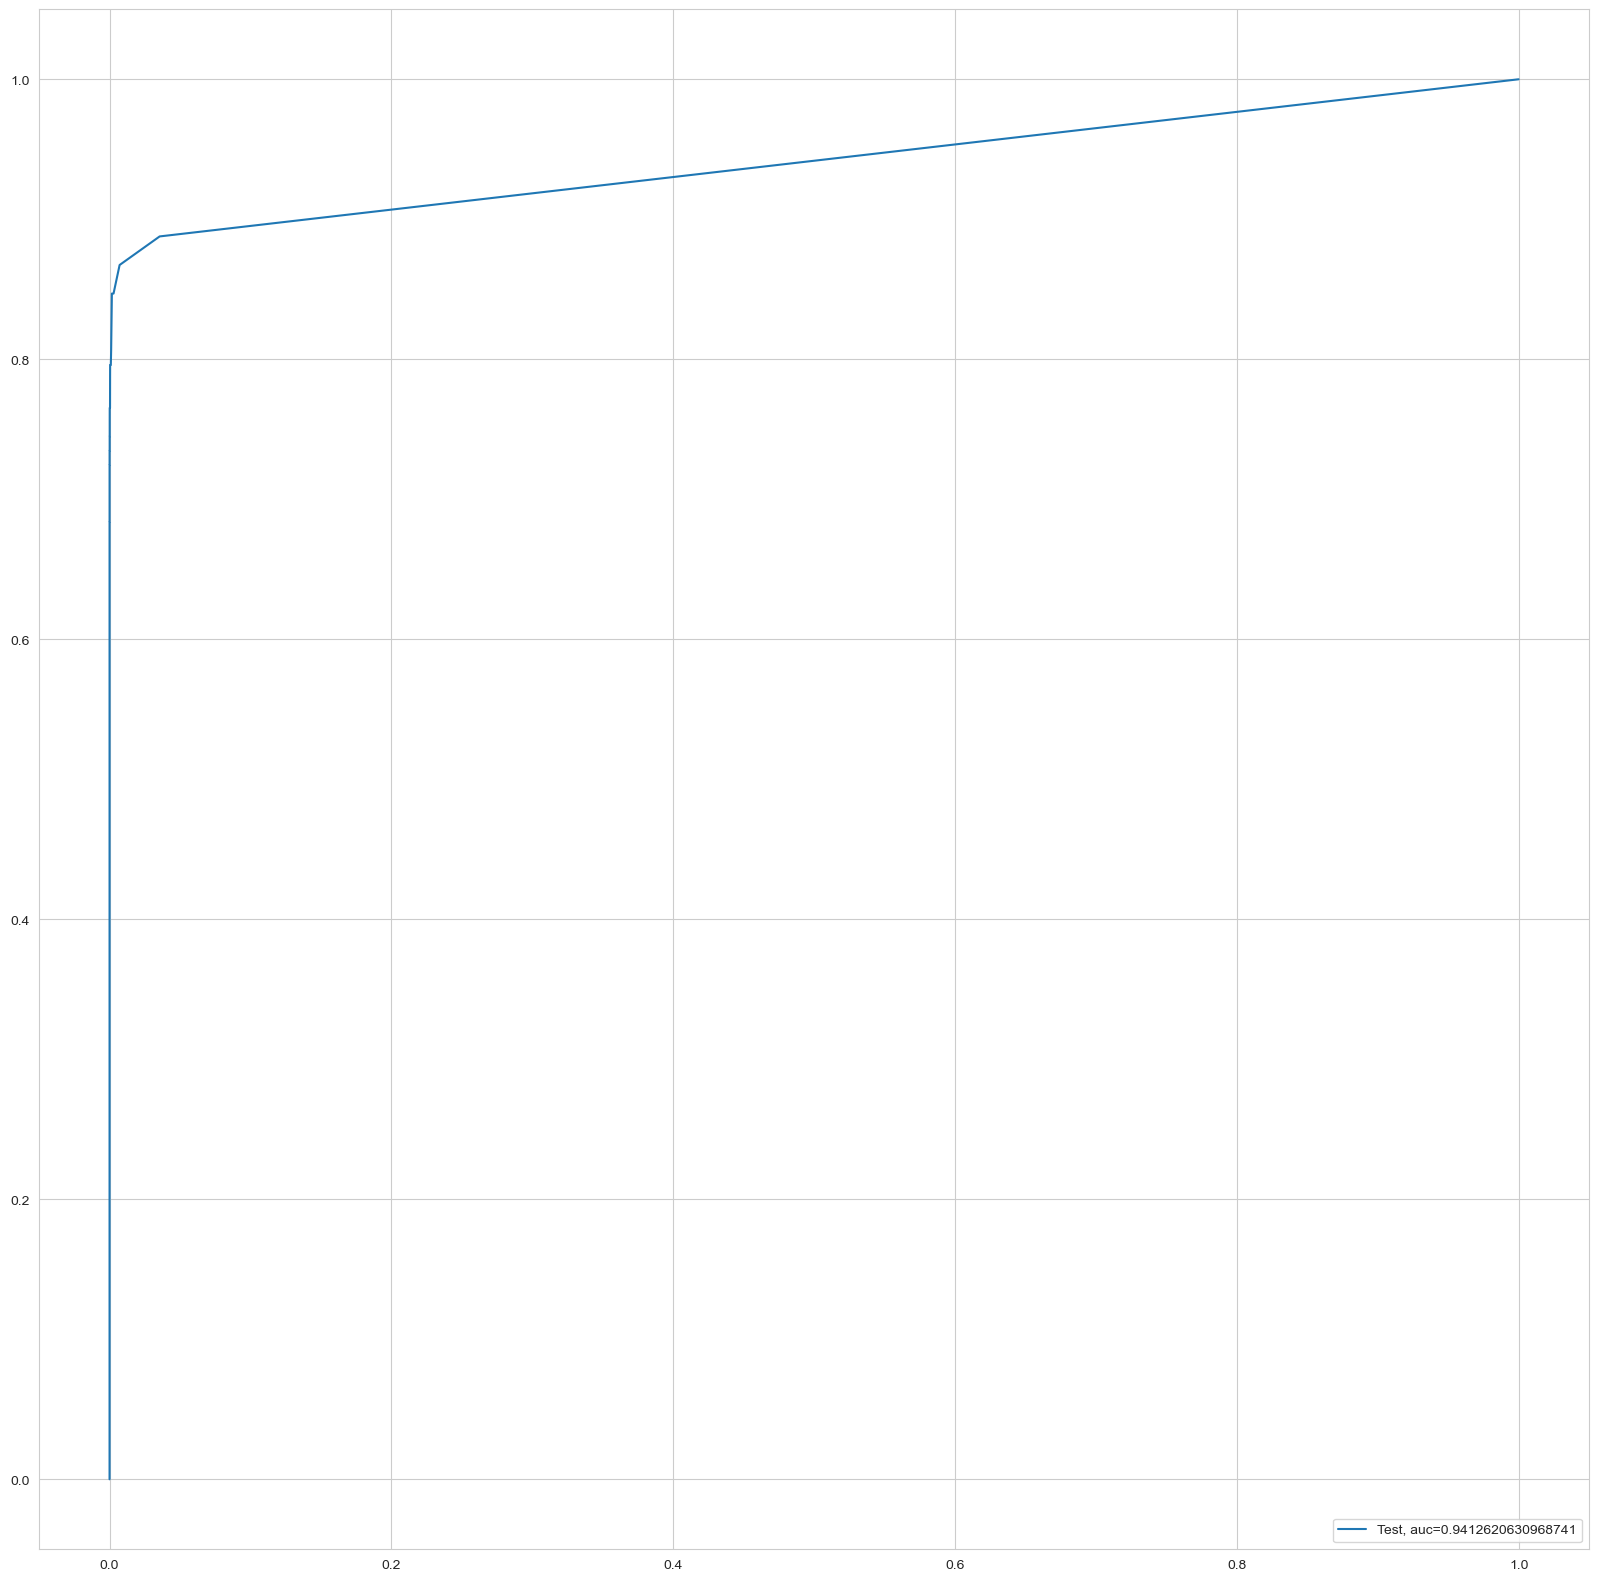

Time Elapsed: --- 89.91309380531311 seconds ---


In [86]:
#Run Random Forest Model - Random Oversampling with StratifiedKFold CV
print("Random Forest Model")
start_time = time.time()
Model_Perf_Results_df = RandomForestModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_over, y_over, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
[21:20:22] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9994733238531627
Confusion Matrix


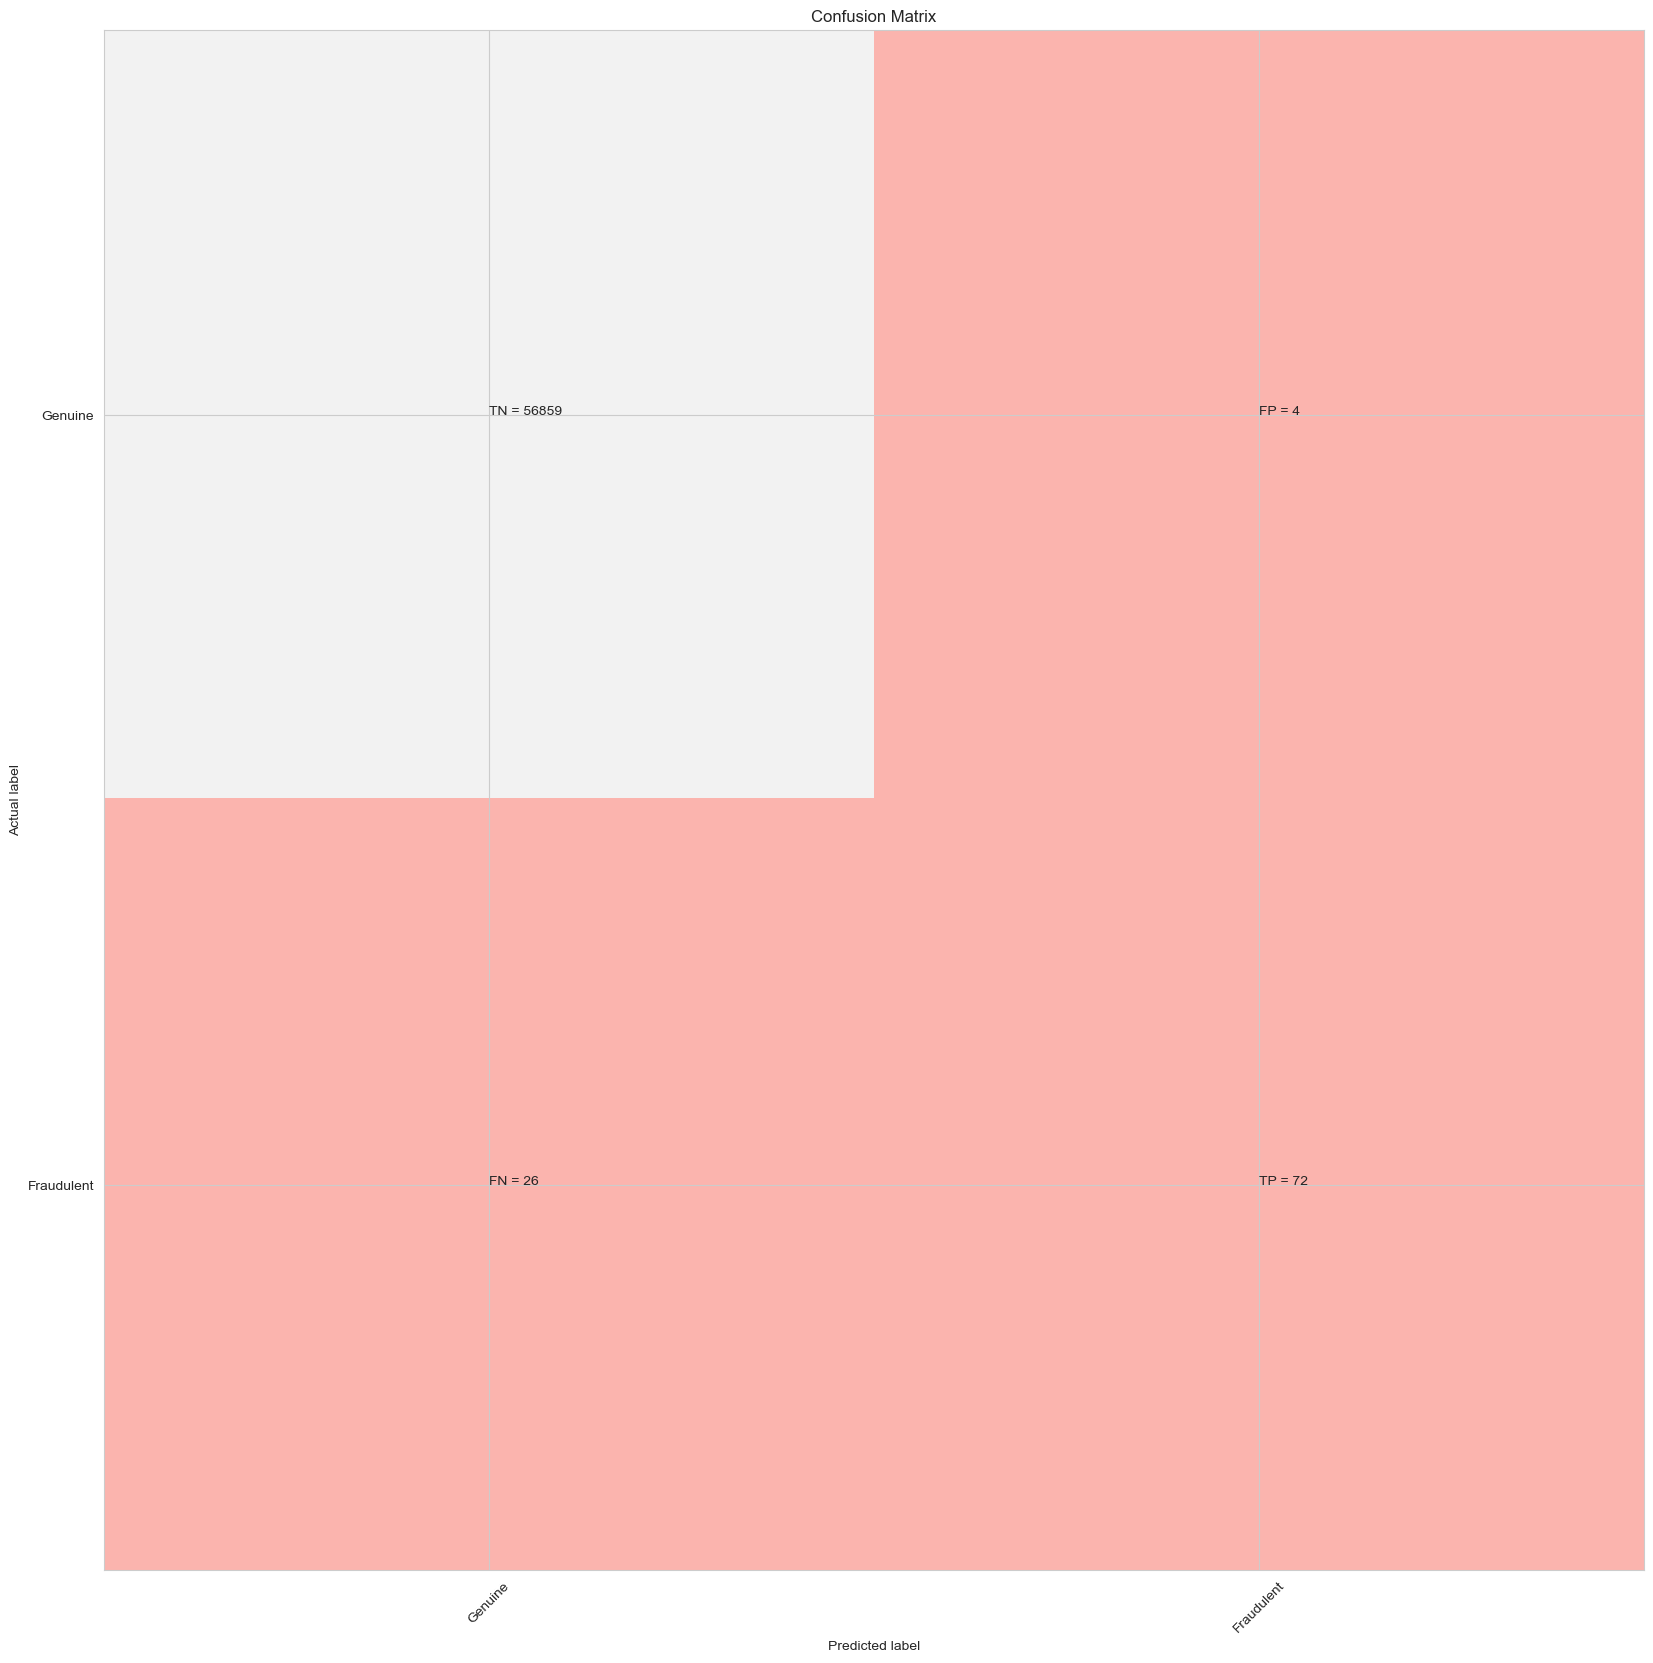

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.95      0.73      0.83        98

    accuracy                           1.00     56961
   macro avg       0.97      0.87      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.977353014962206
XGBoost threshold: 0.00016610132297500968
ROC for the test dataset 97.7%


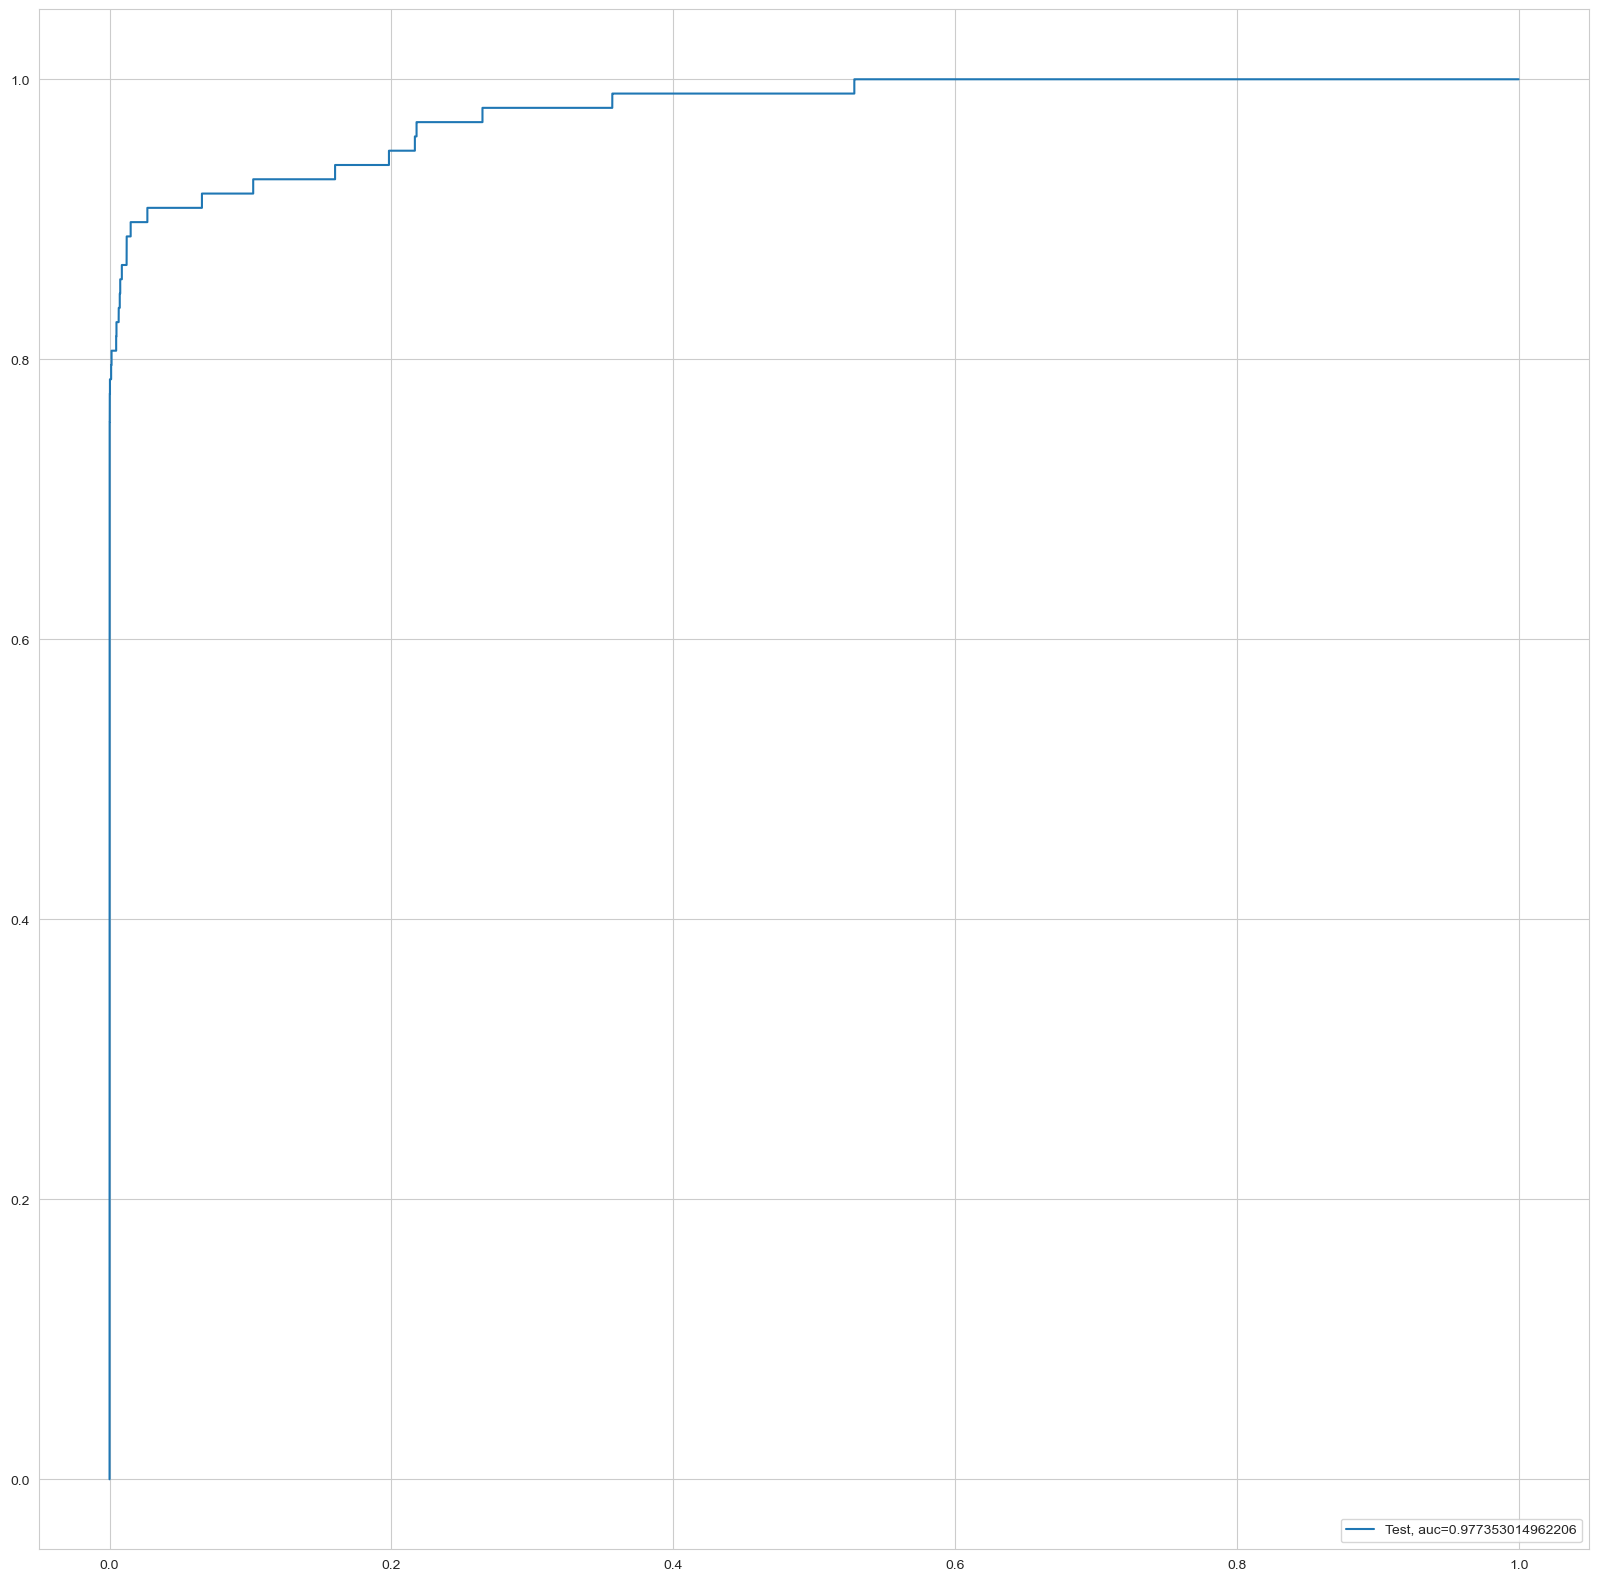

Time Elapsed: --- 22.01415491104126 seconds ---


In [87]:
#Run XGBoost Model - Random Oversampling with StratifiedKFold CV
print("XGBoost Model")
start_time = time.time()
Model_Perf_Results_df = XGBoostModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_over, y_over, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

In [88]:
Model_Perf_Results_df

Data_Imbalance_Handling_Process  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  ROC_Value  Threshold  
0   Logistic Regression with L2 Regularisation  0.999228   0.985101   0.002730  
1   Logistic Regression with L1 Regularisation  0.999204   0.988625   0.007539  
2                                          KNN  0.999450   0.937369   0.200000  
3                                          SVM  0.998853   0.889853   0.000849  
4                Tree Model with gini criteria  0.999228   0.900507   1.000000  
5             Tree Model with entropy criteria  0.999216   0.889489   1.000000  
6                                Random Forest  0.999602   0.954549   0.020000  
7                                      XGBoost  0.999661   0.985249   0.000476  
8   Logistic Regression with L2 Regularisation  0.999175   0.972154   0.002105  
9   Logistic Regression with L1 Regularisation  0.999228   0.887823   0.037429  
10                                         KNN  0.999298   0.841574   0.200000  
11                                         SVM  0.998666   0.485525   0.001828  
12               Tree Model with gini criteria  0.999210   0.885839   1.000000  
13            Tree Model with entropy criteria  0.999368   0.892238   1.000000  
14                               Random Forest  0.999666   0.941190   0.010000  
15                                     XGBoost  0.999702   0.959122   0.000100  
16  Logistic Regression with L2 Regularisation  0.998771   0.983322   0.001566  
17  Logistic Regression with L1 Regularisation  0.998490   0.942320   0.004609  
18                                         KNN  0.998964   0.785364   0.200000  
19                                         SVM  0.998280   0.402015   0.002353  
20               Tree Model with gini criteria  0.998859   0.826258   1.000000  
21            Tree Model with entropy criteria  0.998982   0.816133   1.000000  
22                               Random Forest  0.999473   0.931063   0.0

### Print the class distribution after applying SMOTE 

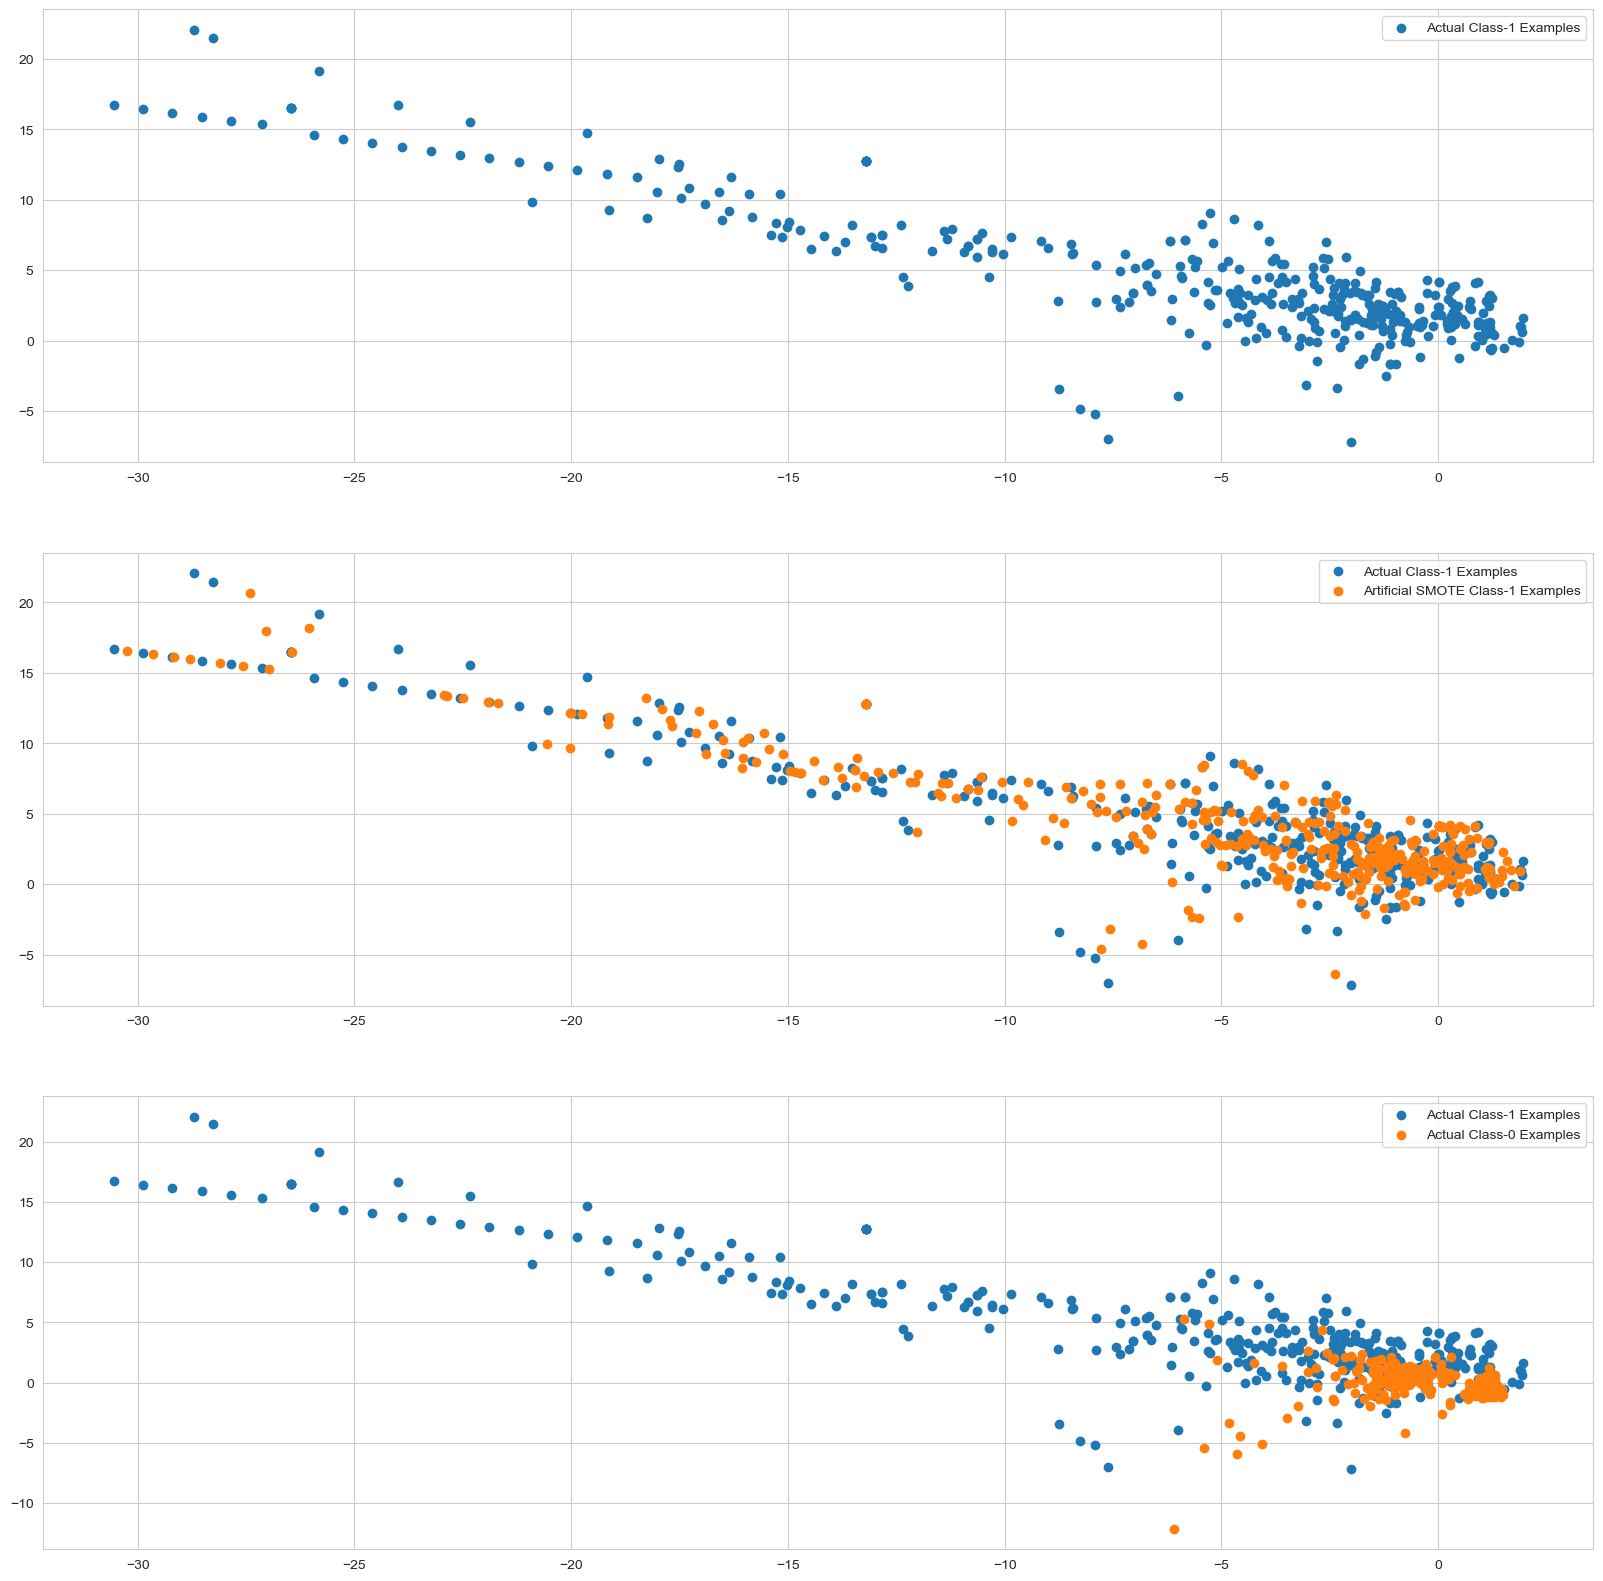

In [89]:
sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [90]:
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_Smote, y_train_Smote= SMOTE.fit_resample(X_train, y_train)

#Create Dataframe for X_over
X_train_Smote = pd.DataFrame(data=X_train_Smote,   columns=var)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9961516839010747
Max auc_roc for l1: 0.5
Parameters for l2 regularisation
Coefficient: [[ 8.58136621e-01  6.36871951e-01  2.44110332e-02  8.89084214e-01
   8.75288876e-01 -6.71861737e-01 -4.67976033e-01 -5.56585643e-01
  -3.86270445e-01 -7.67063236e-01  3.16215010e-01 -1.31349905e+00
  -2.60289457e-01 -1.57861651e+00 -2.76394052e-01 -8.94343620e-01
  -9.92371997e-01 -2.23728803e-01  2.00486353e-01 -9.82190824e-01
   1.48304164e-01  1.19426838e+00  5.51786993e-01 -3.05154928e-01
  -5.23554822e-02  2.55964725e-01  1.17384452e-01  8.54396247e-01
   8.22586652e-03 -4.39677369e+00 -2.17552828e-02  1.66305951e-03]]
Intercept: [-3.81262161]
Score: {1: array([[0.65092597, 0.78820827, 0.92246132, 0.96987175, 0.98749344,
        0.99165838, 0.99299958, 0.99470911, 0.99548849, 0.99561966,
        0.9956326 , 0.9956326 , 0.9956326 , 0.9956326 , 0.9956326 ,
        0.9956326 , 0.9956326 , 0.9956326 , 0.9956326 , 0.9956326 ],
  

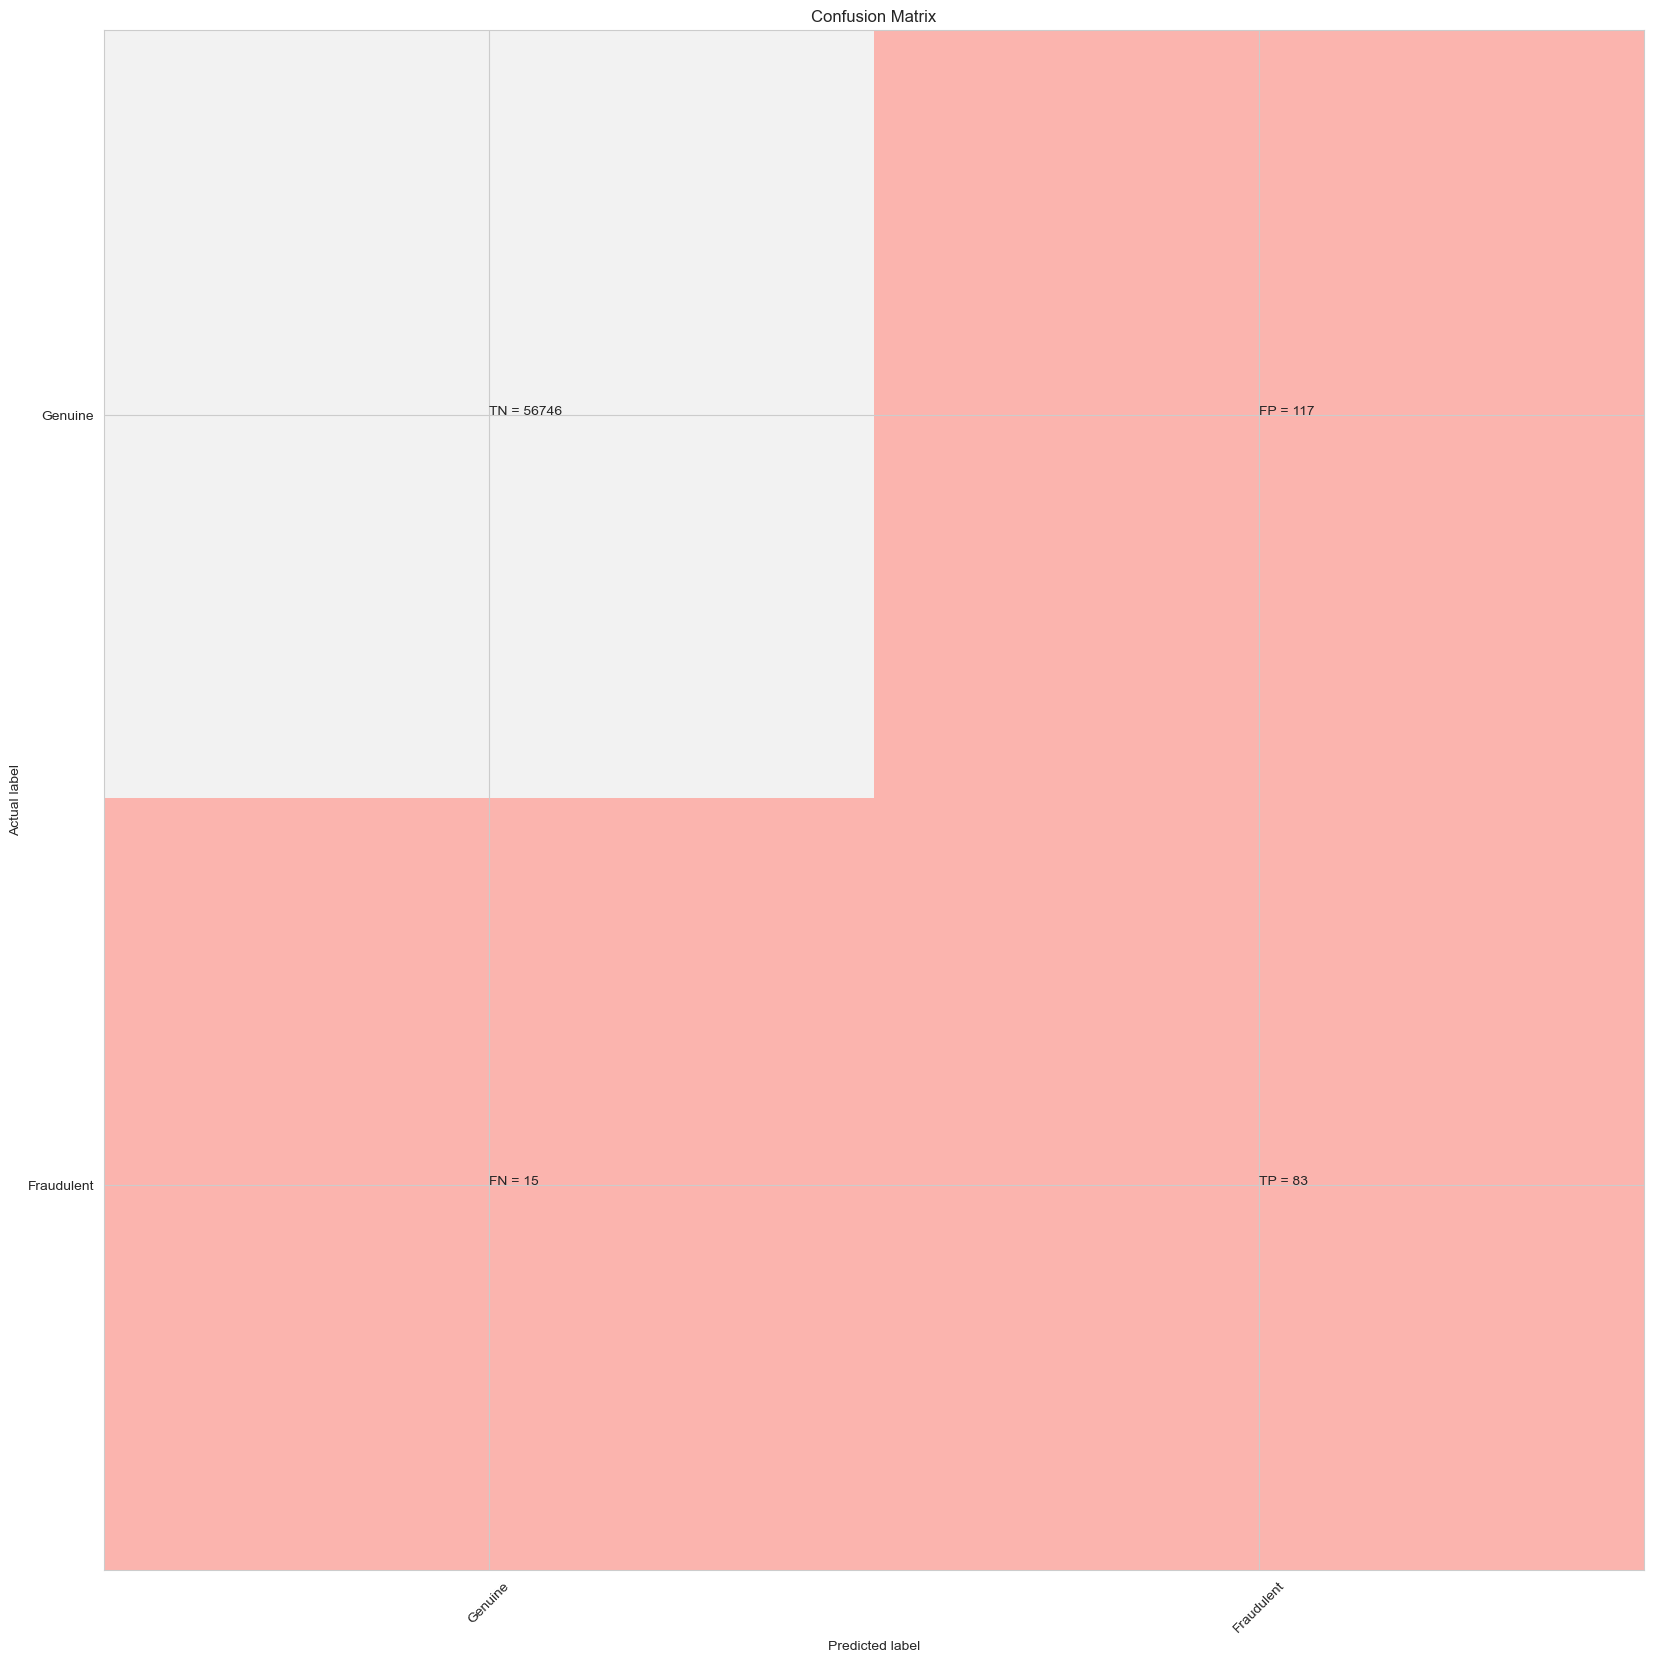

Classification Report with l2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.85      0.56        98

    accuracy                           1.00     56961
   macro avg       0.71      0.92      0.78     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix with l1


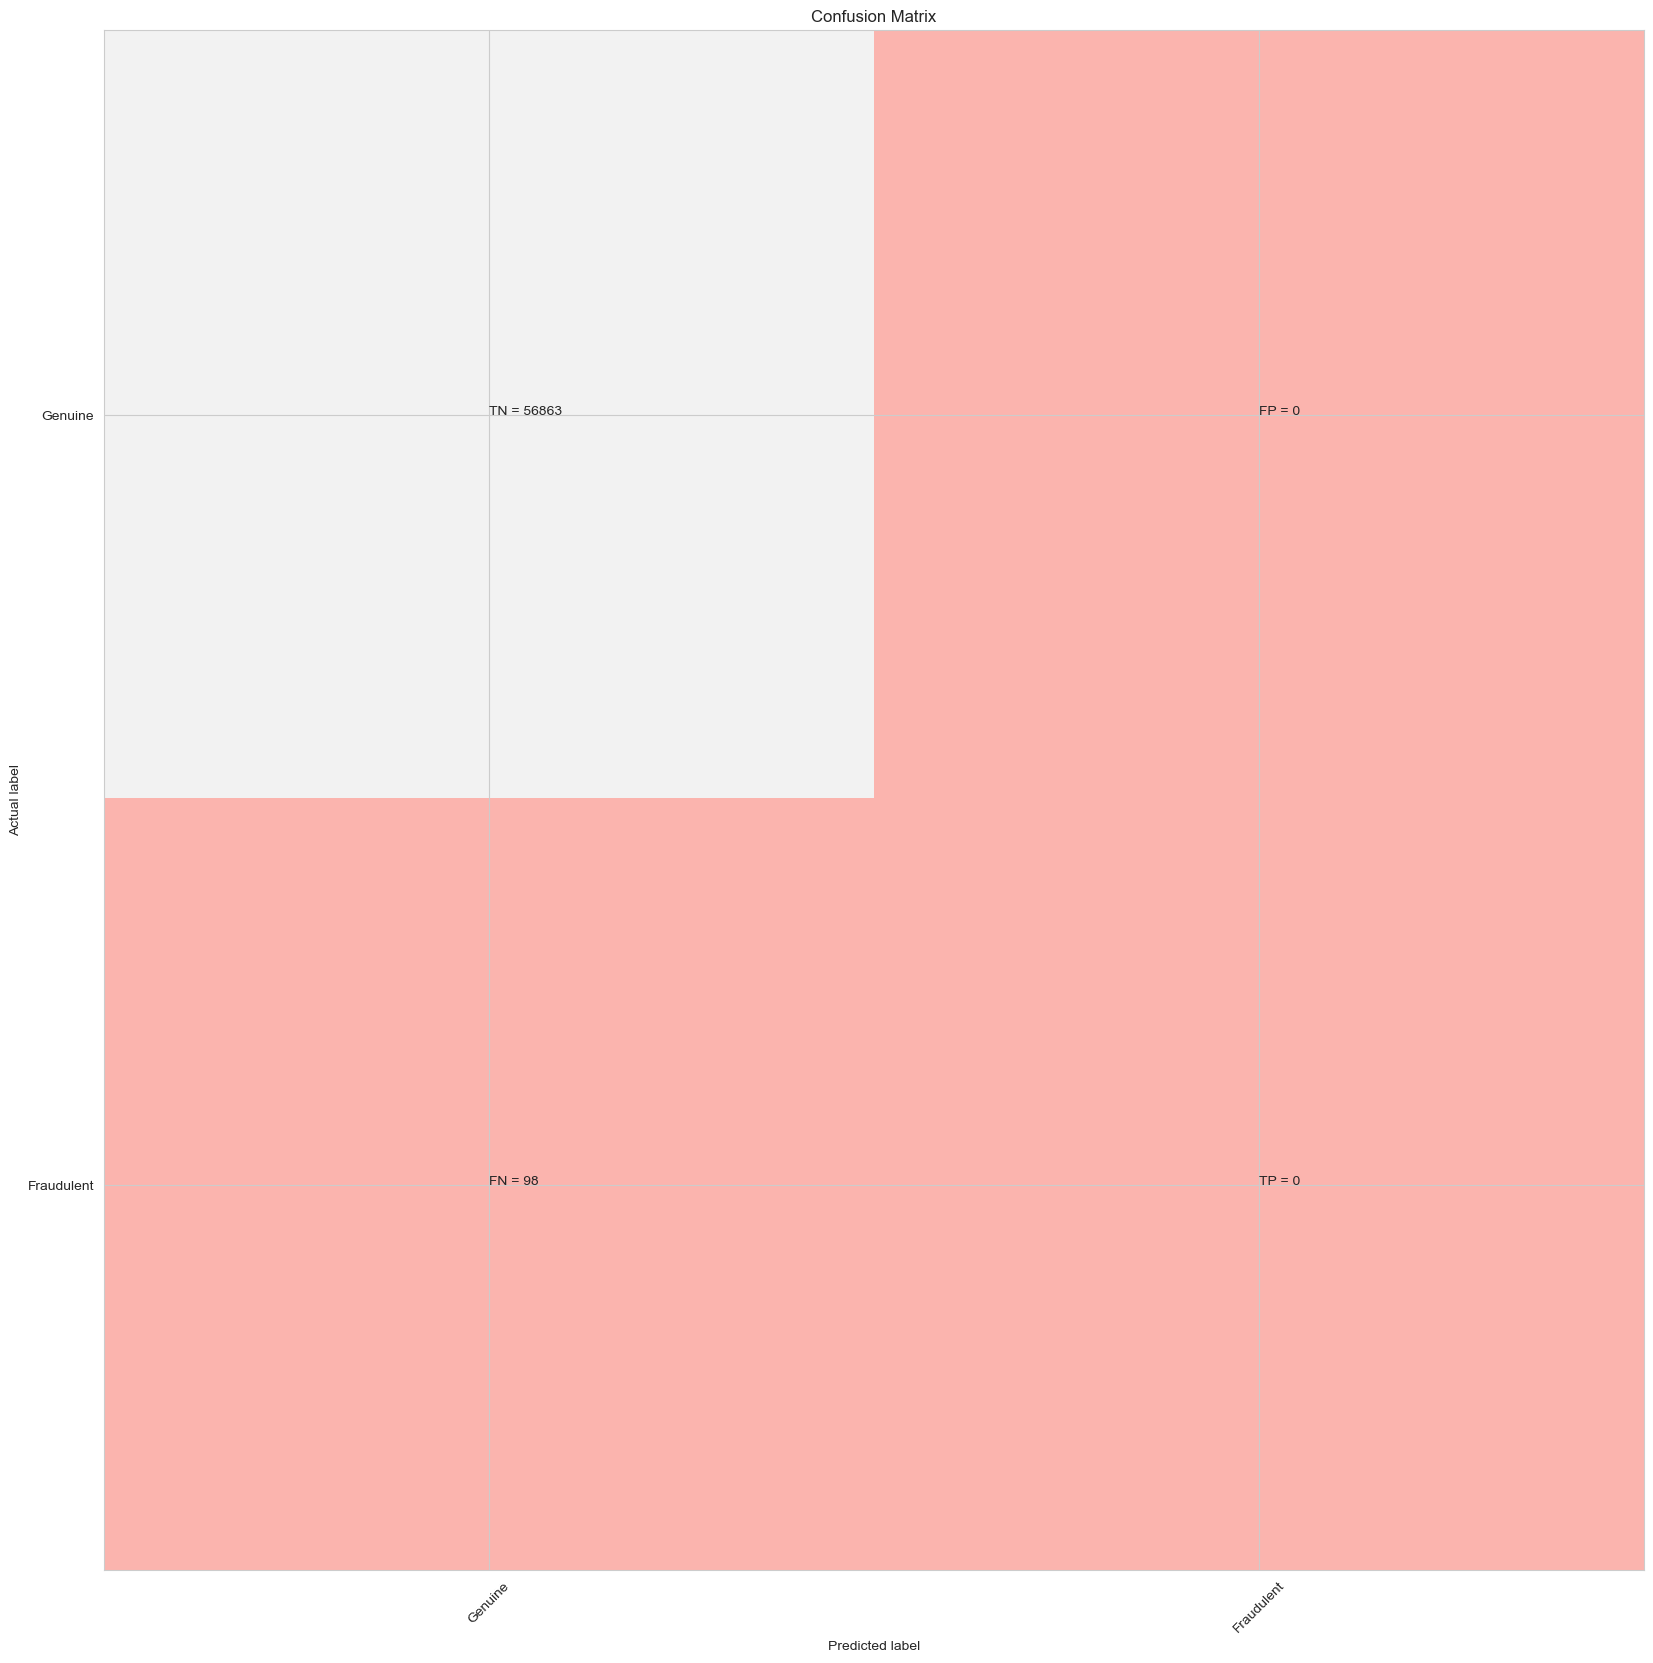

classification Report with l1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9825388590622574
l2 threshold: 0.0542836250810843
ROC for the test dataset 98.3%


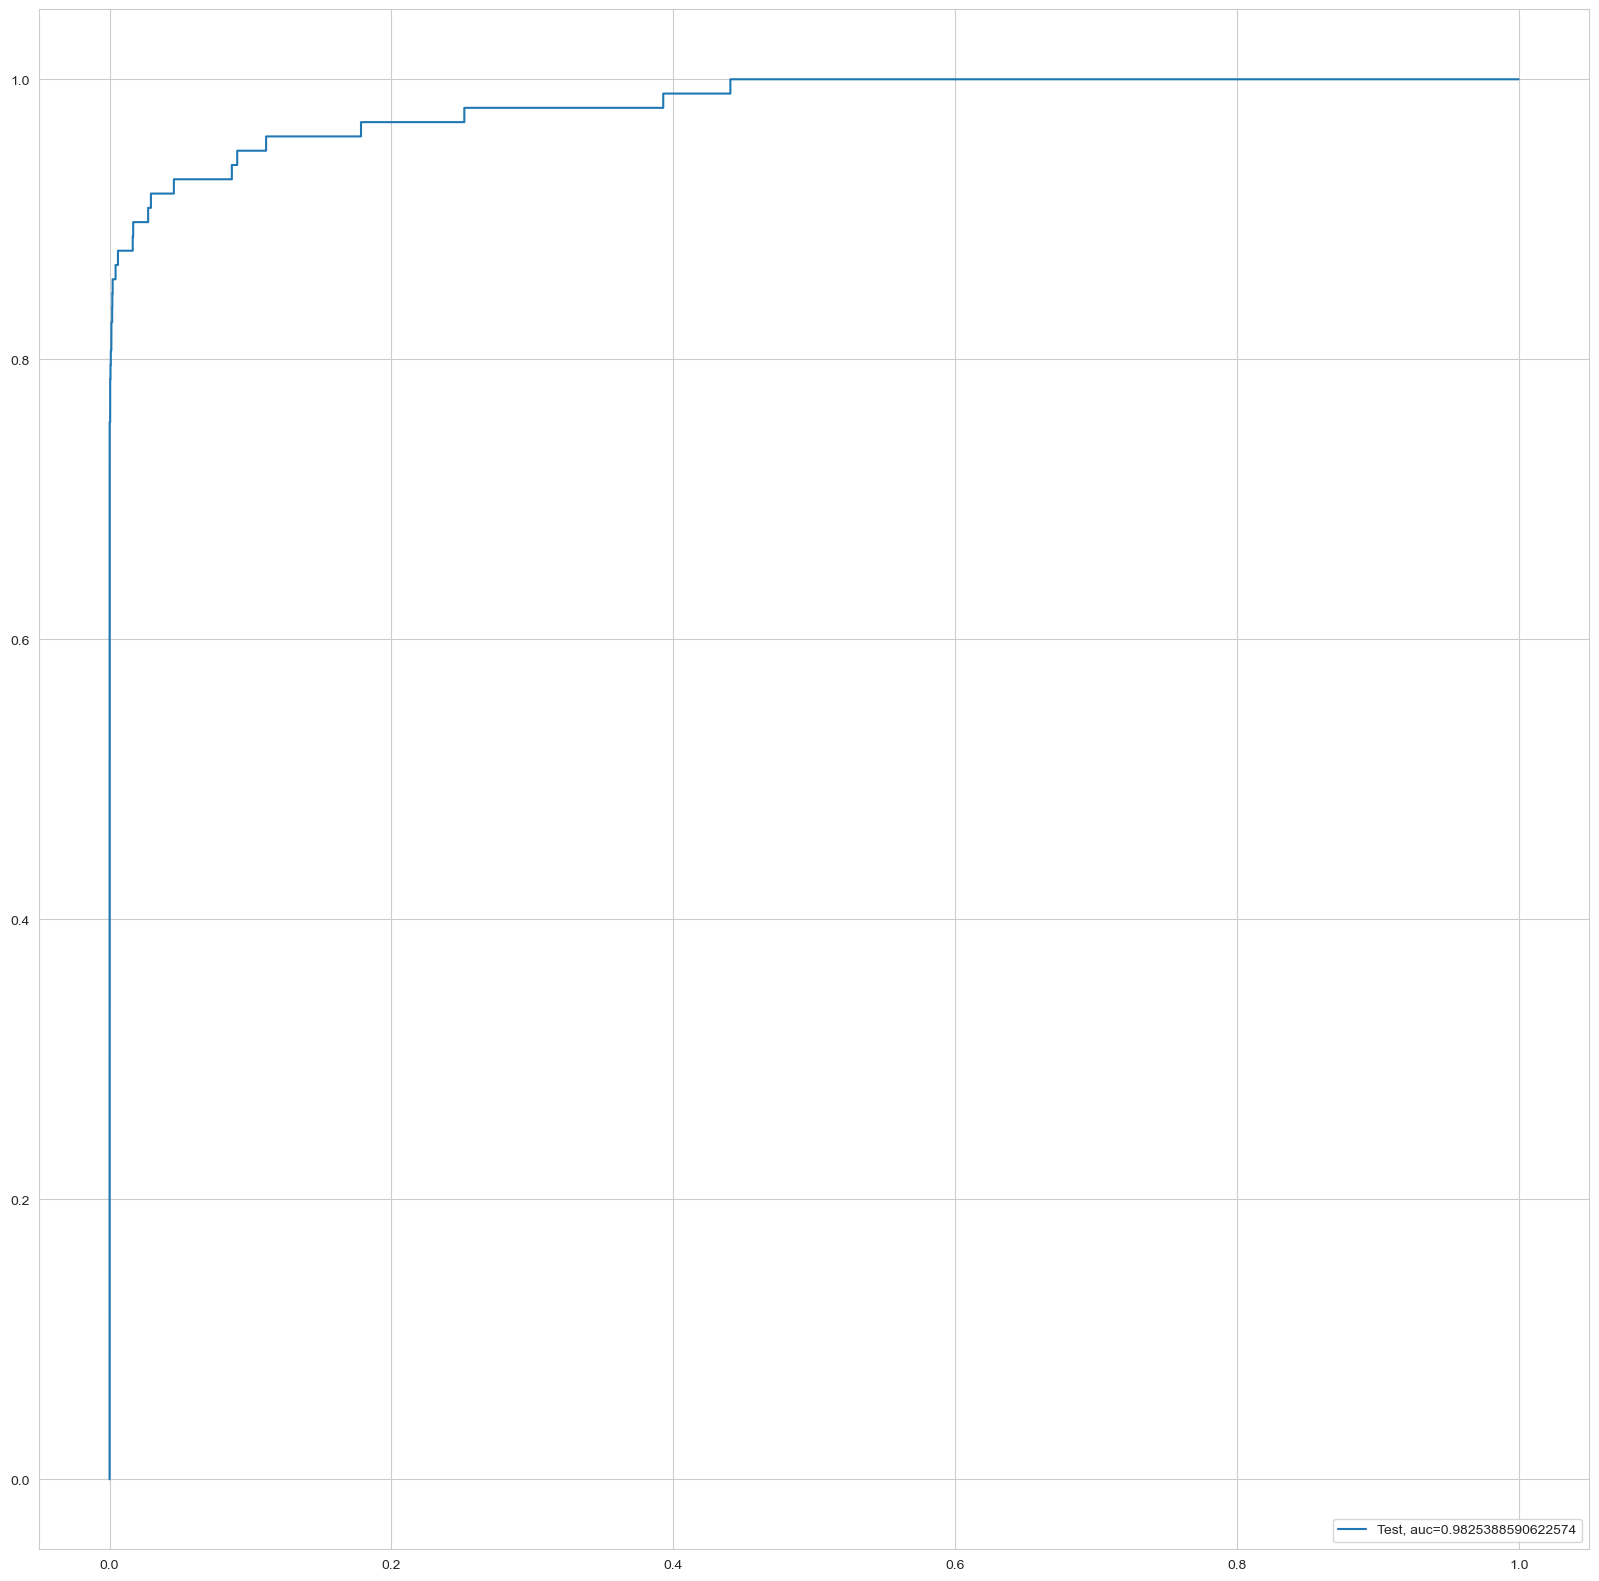

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


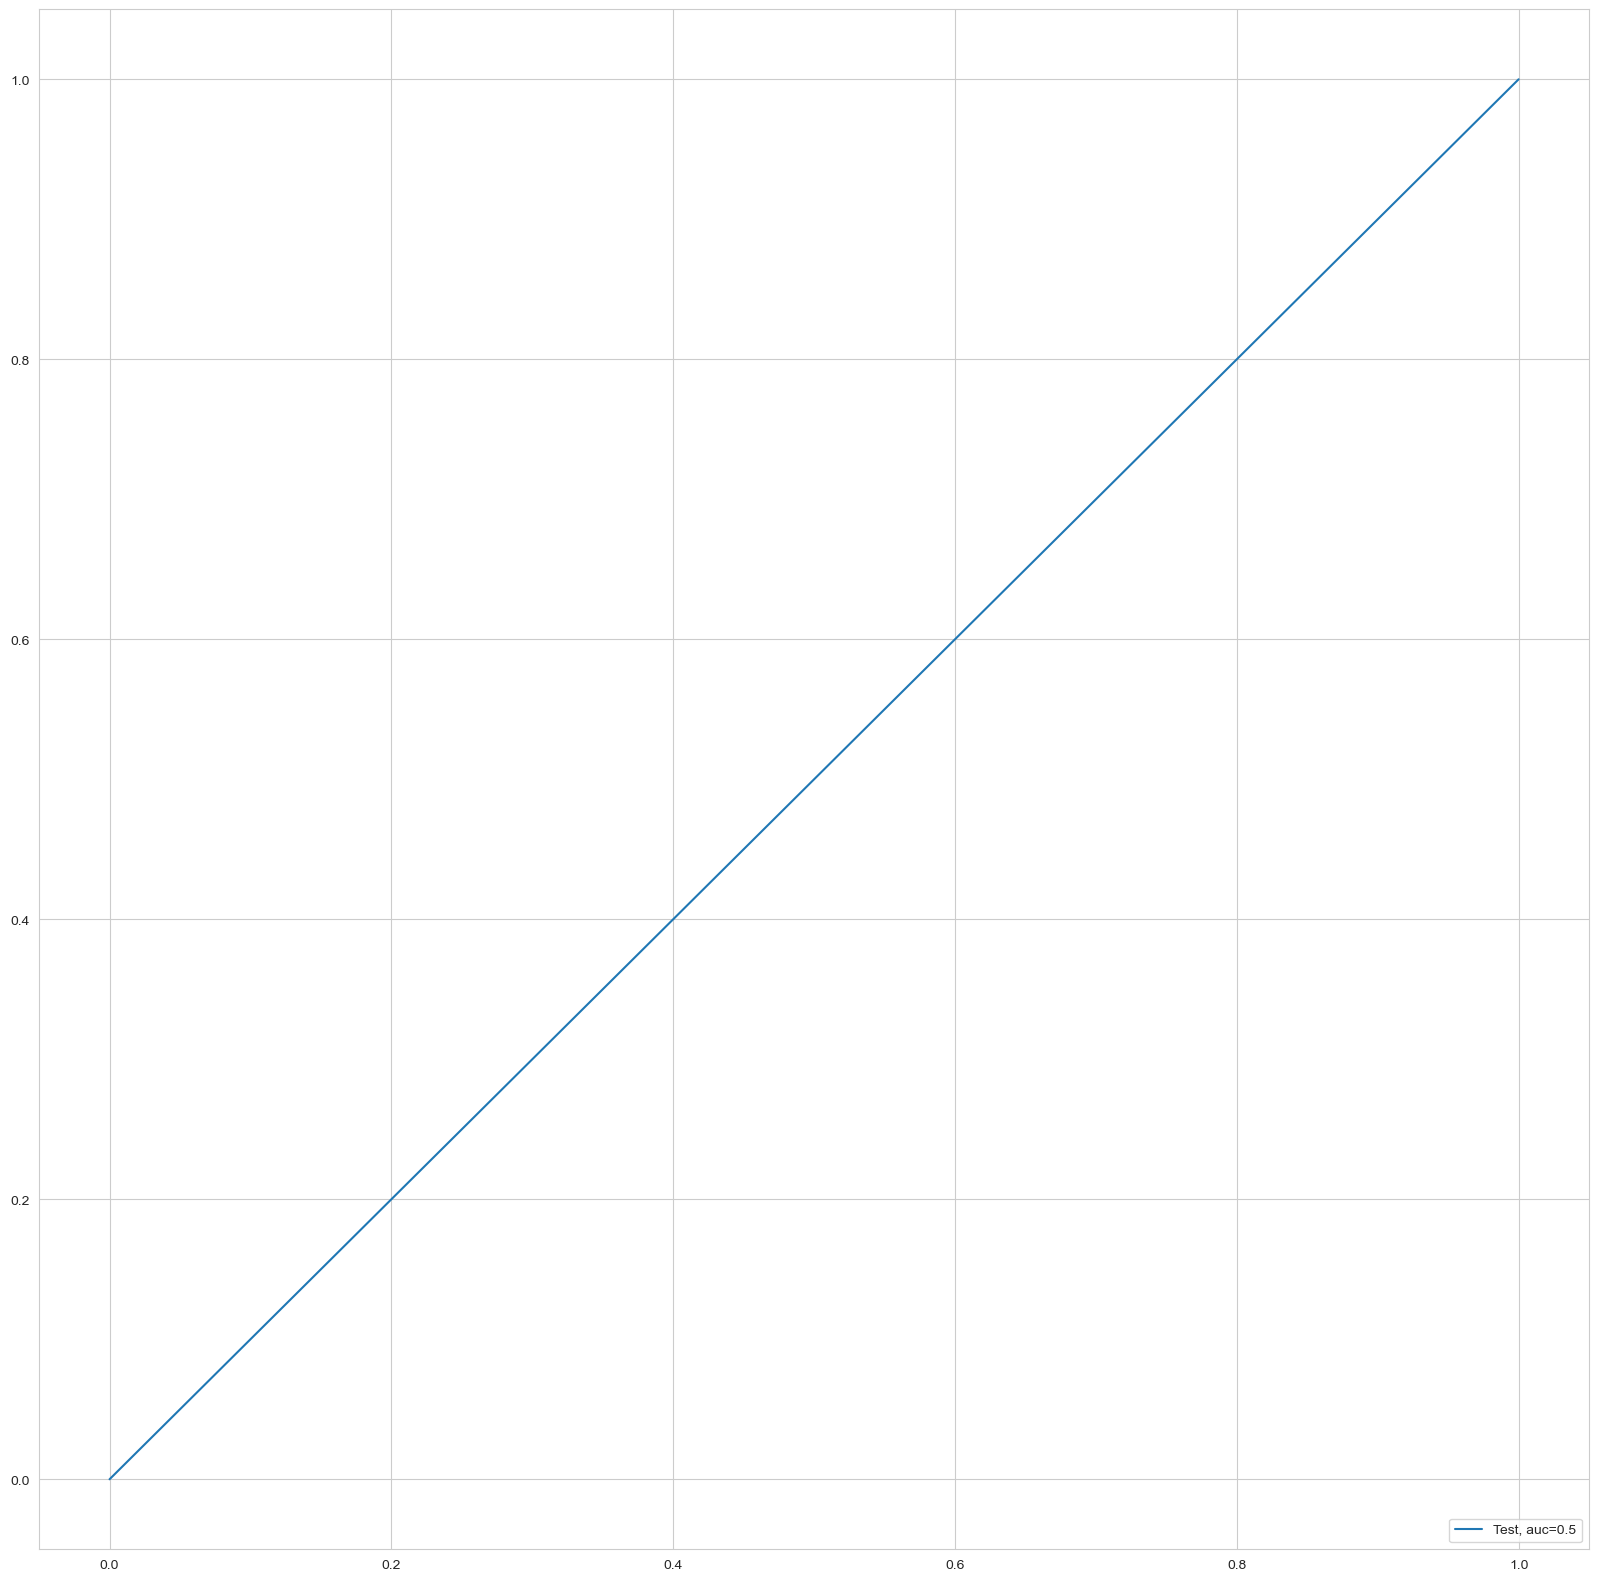

Time Elapsed: --- 154.25872707366943 seconds ---


In [91]:
Data_Imbalance_Handiling	 = "SMOTE Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation - SMOTE Oversampling with StratifiedKFold CV
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
Model_Perf_Results_df = LogisticModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

##### Build models on other algorithms to see the better performing on SMOTE

KNN Model
model score
0.994961464861923
Confusion Matrix


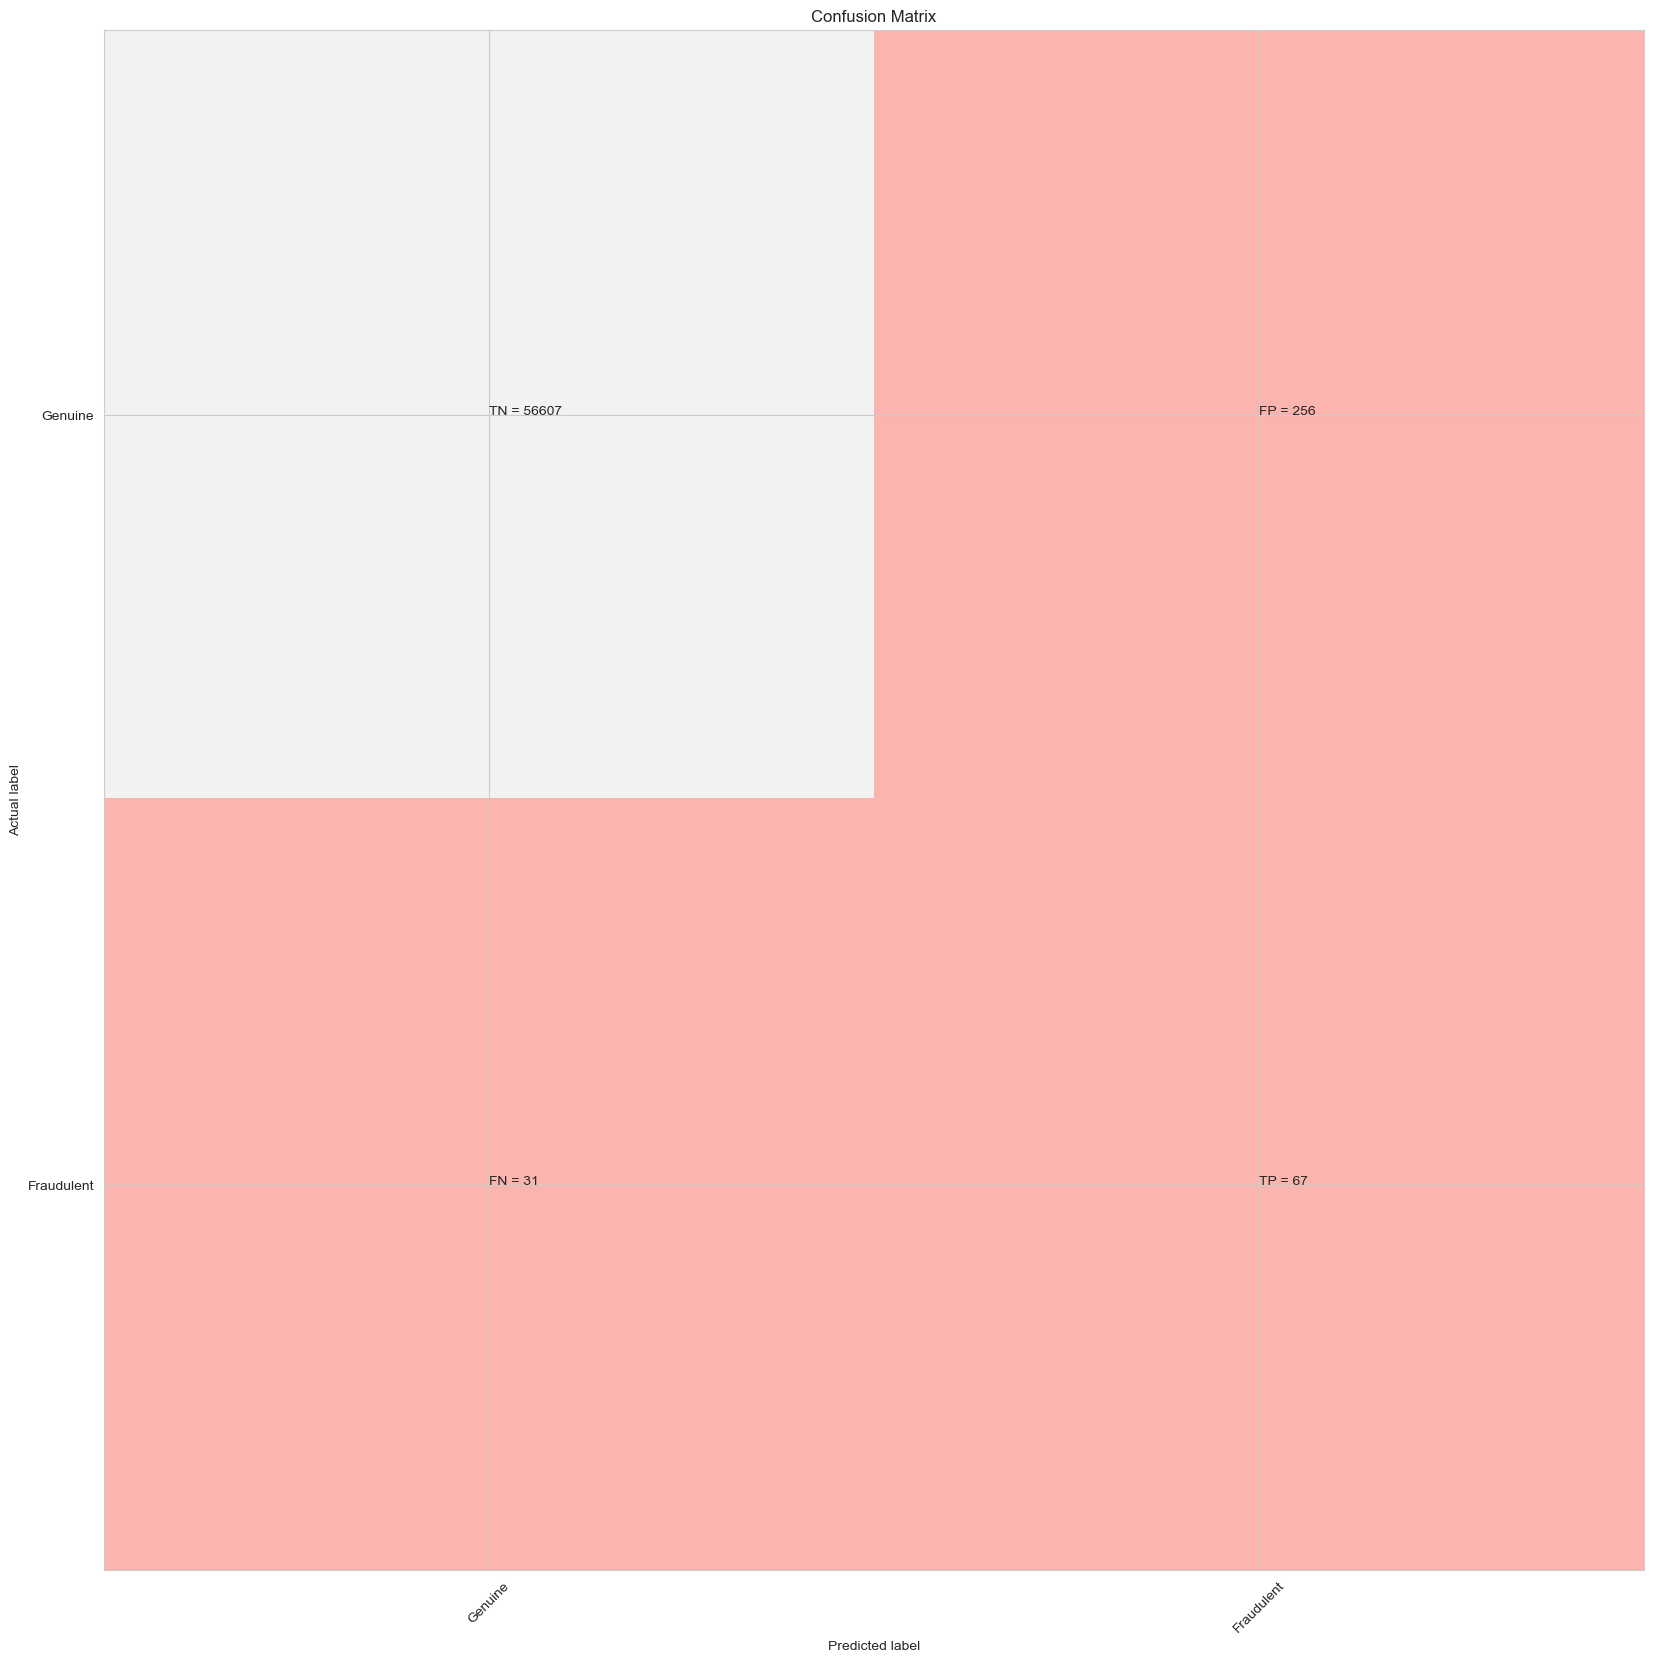

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.21      0.68      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.84      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8451835722594262
KNN threshold: 0.4
ROC for the test dataset 84.5%


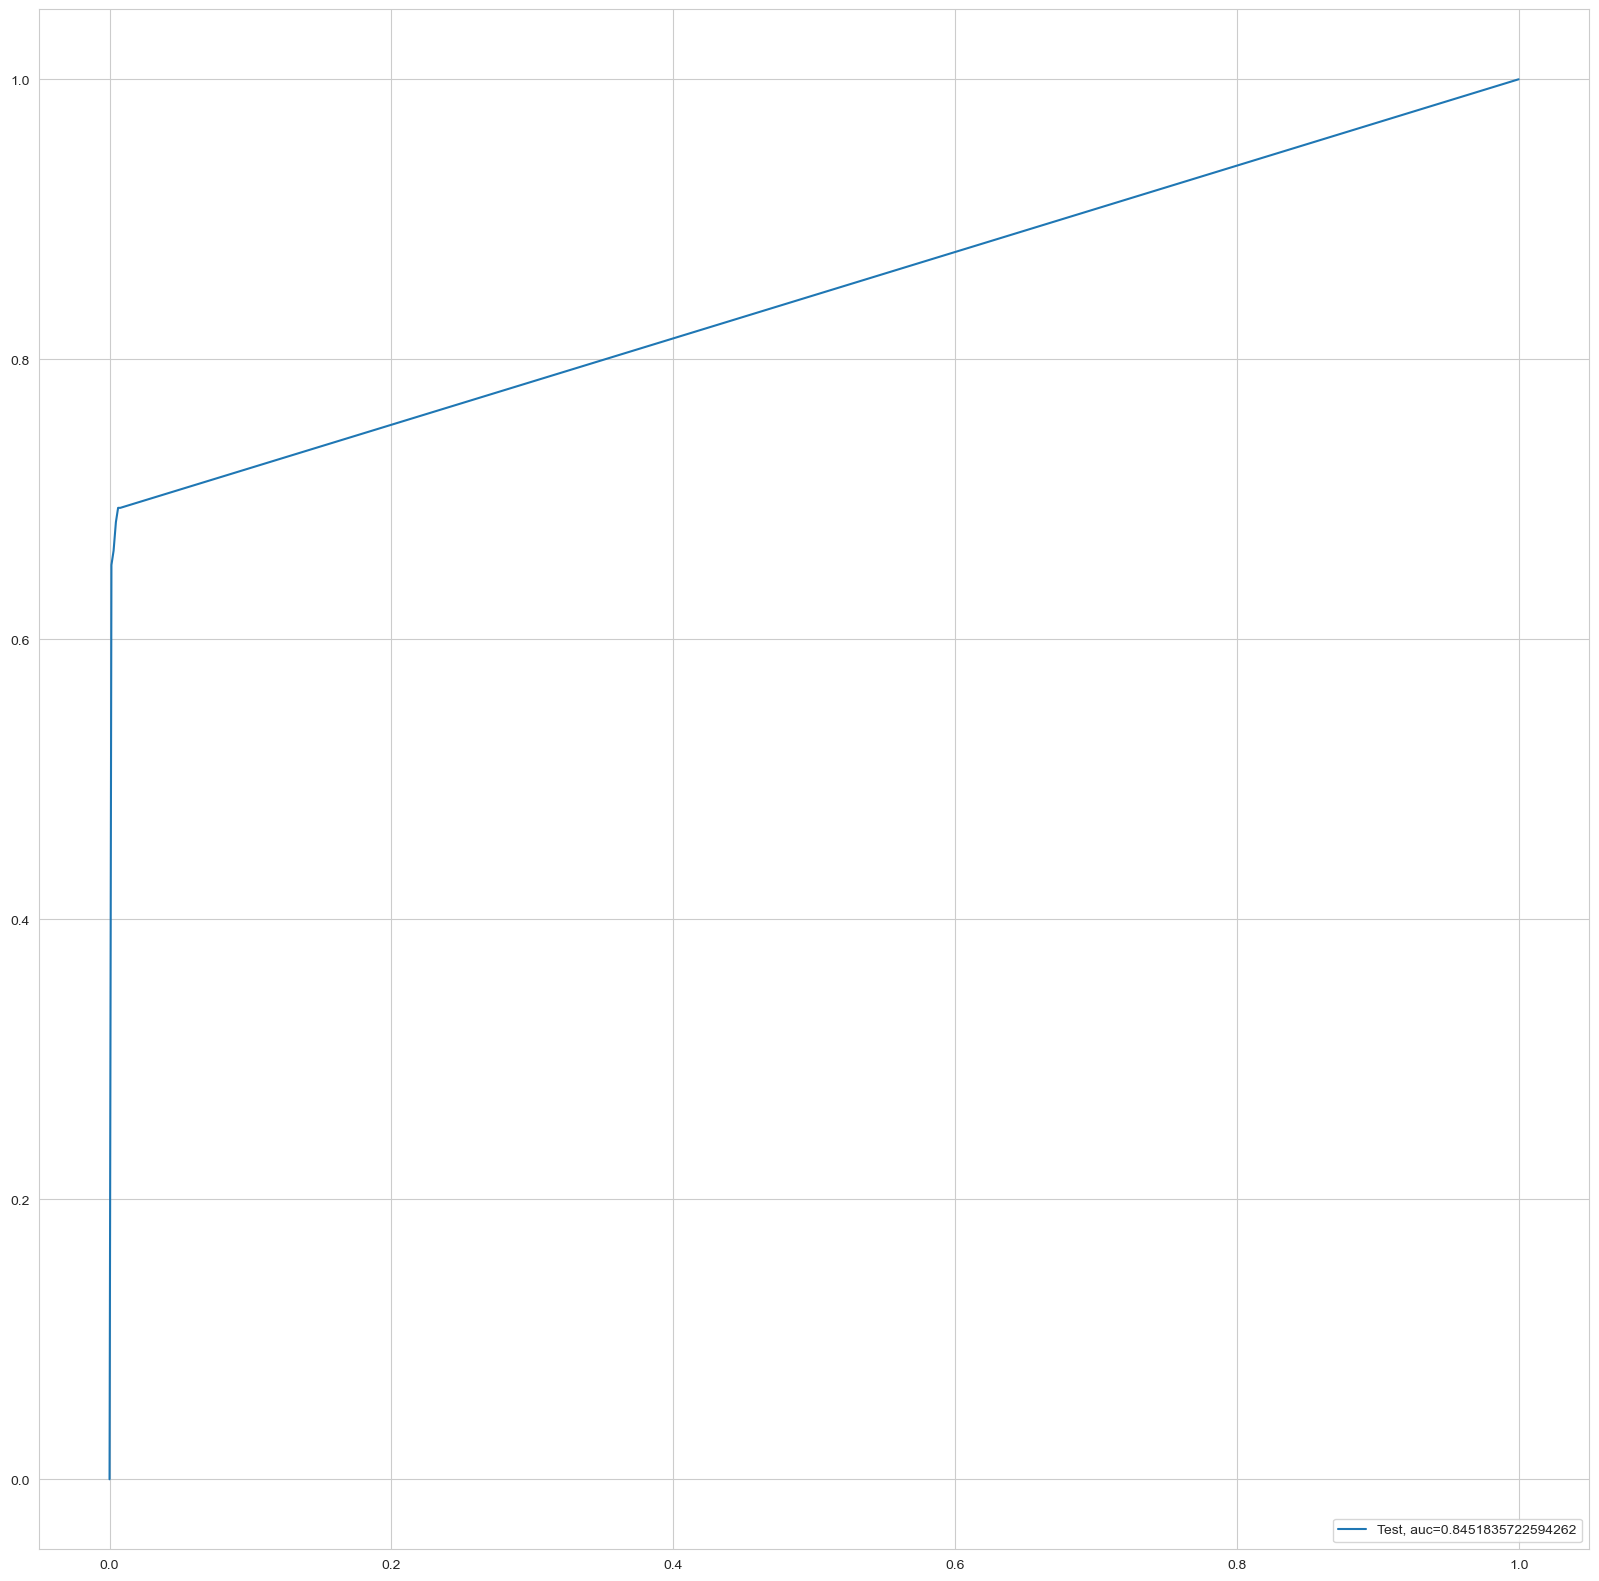

Time Elapsed: --- 5813.090084075928 seconds ---


In [92]:
#Run KNN Model - SMOTE Oversampling with StratifiedKFold CV
print("KNN Model")
start_time = time.time()
Model_Perf_Results_df = KNNModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9946805709169432
Confusion Matrix


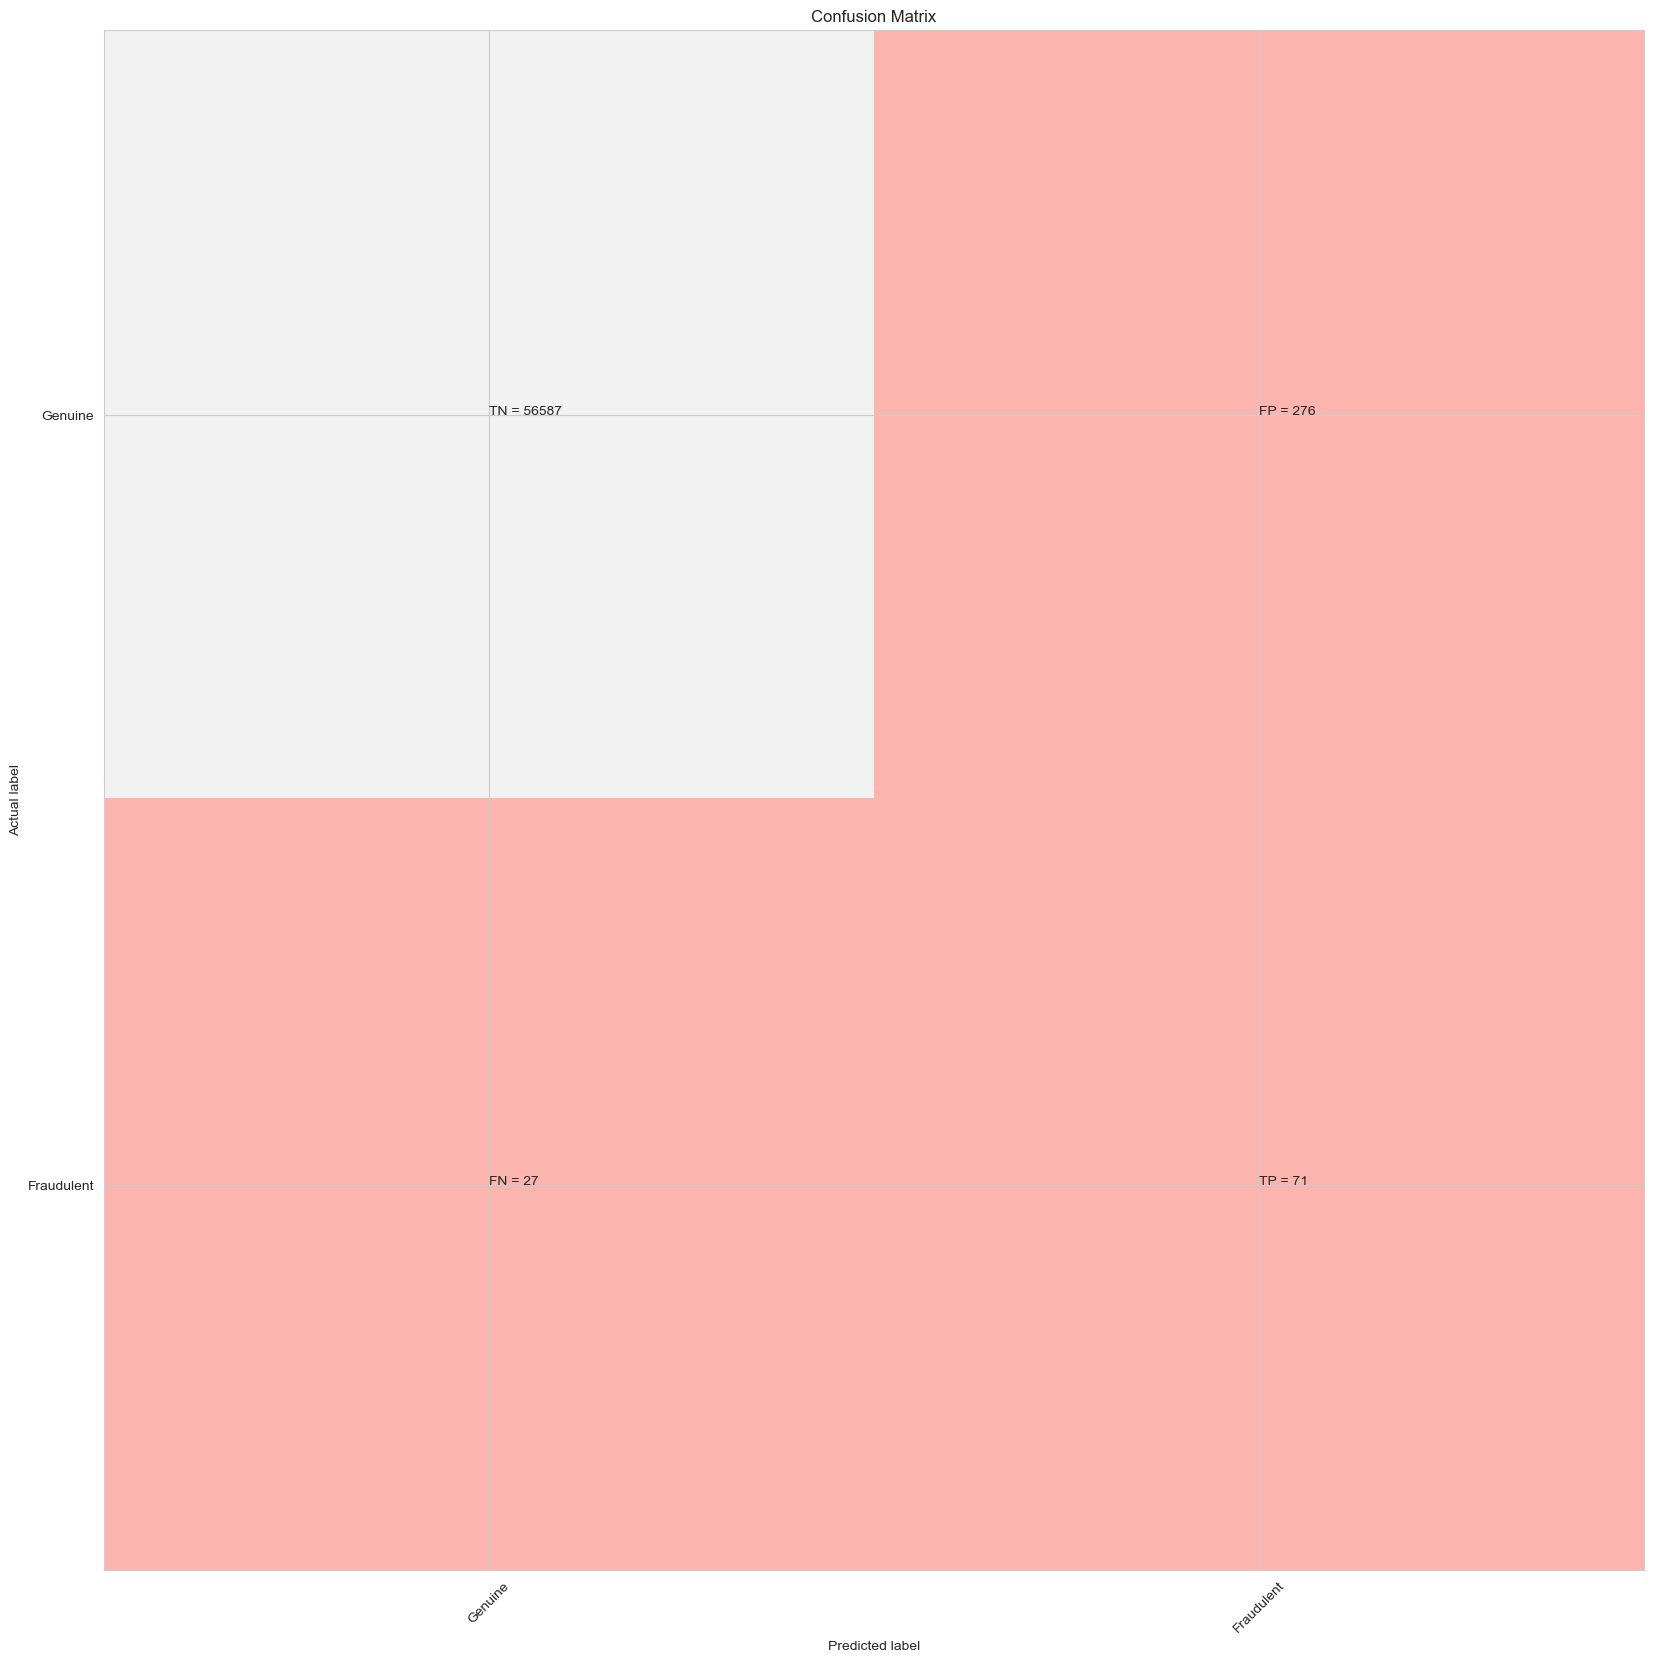

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

gini tree_roc_value: 0.8598180122866023
Tree threshold: 1.0
ROC for the test dataset 86.0%


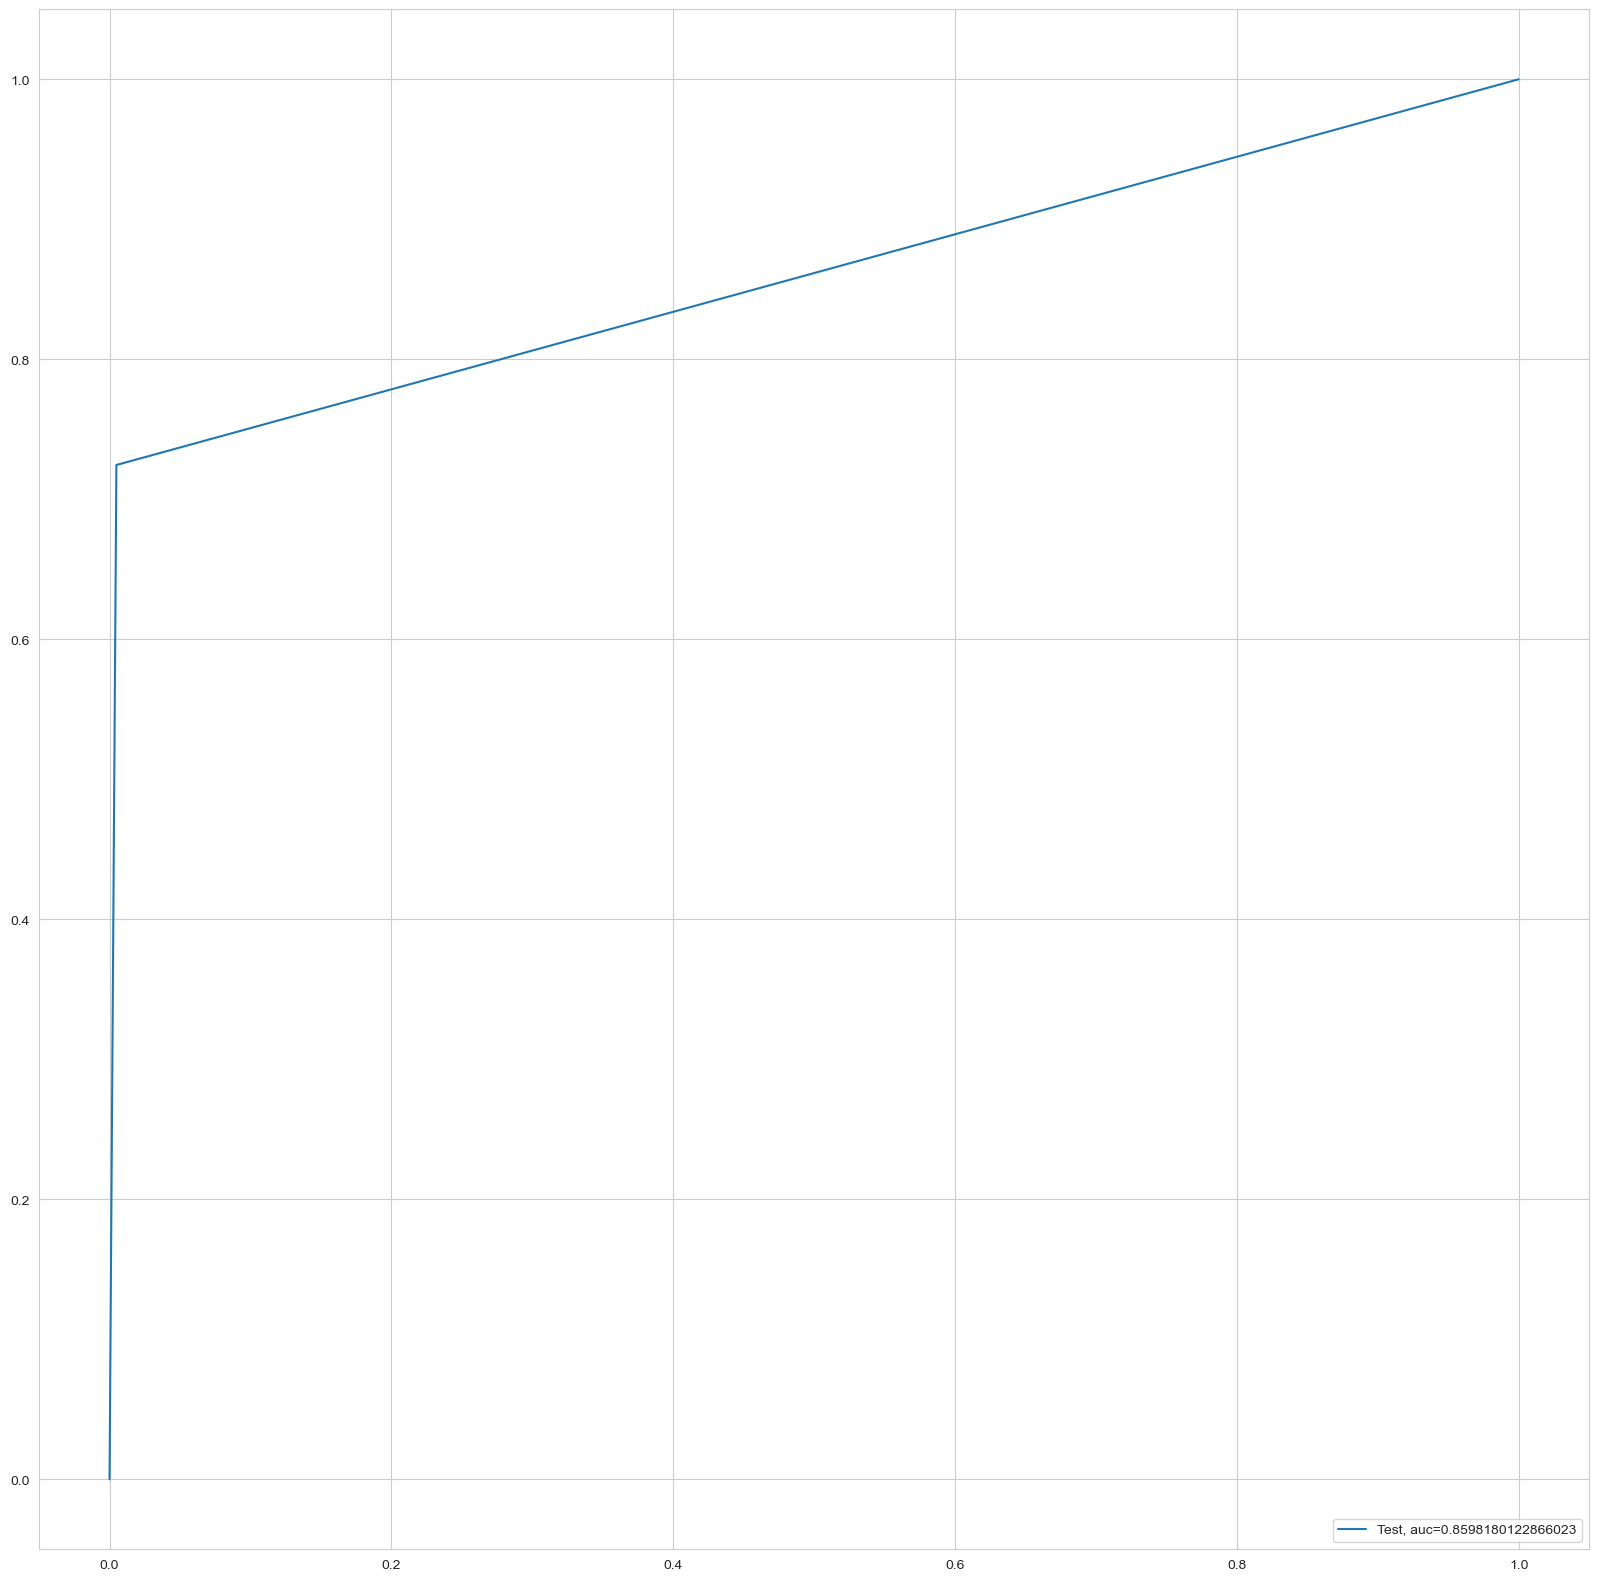

entropy score: 0.998700865504468
Confusion Matrix


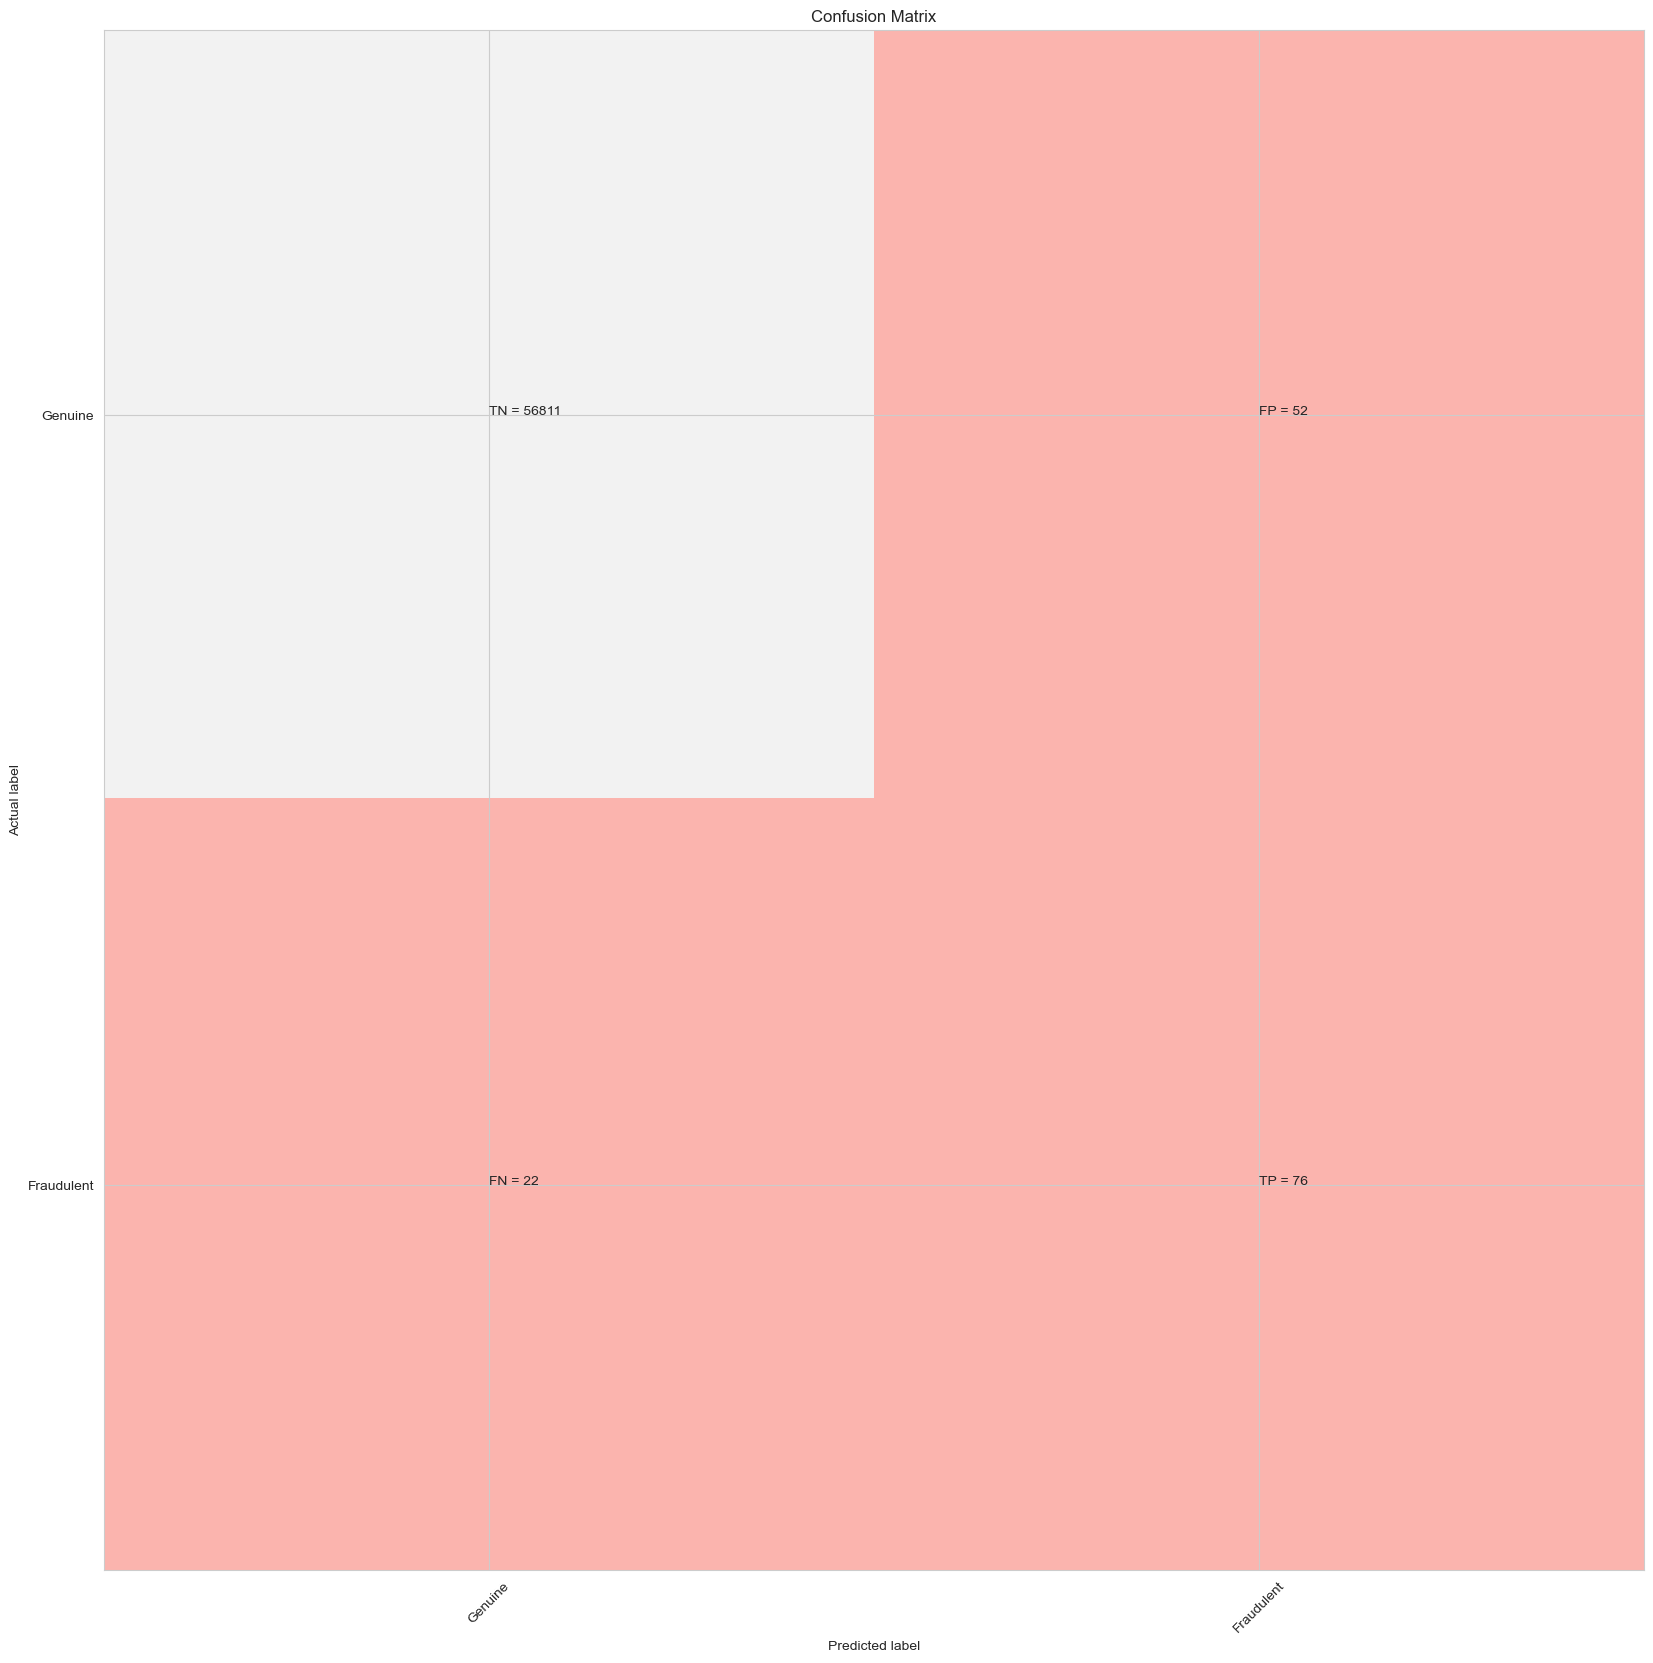

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.59      0.78      0.67        98

    accuracy                           1.00     56961
   macro avg       0.80      0.89      0.84     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8872978627111995
Tree threshold: 1.0
ROC for the test dataset 88.7%


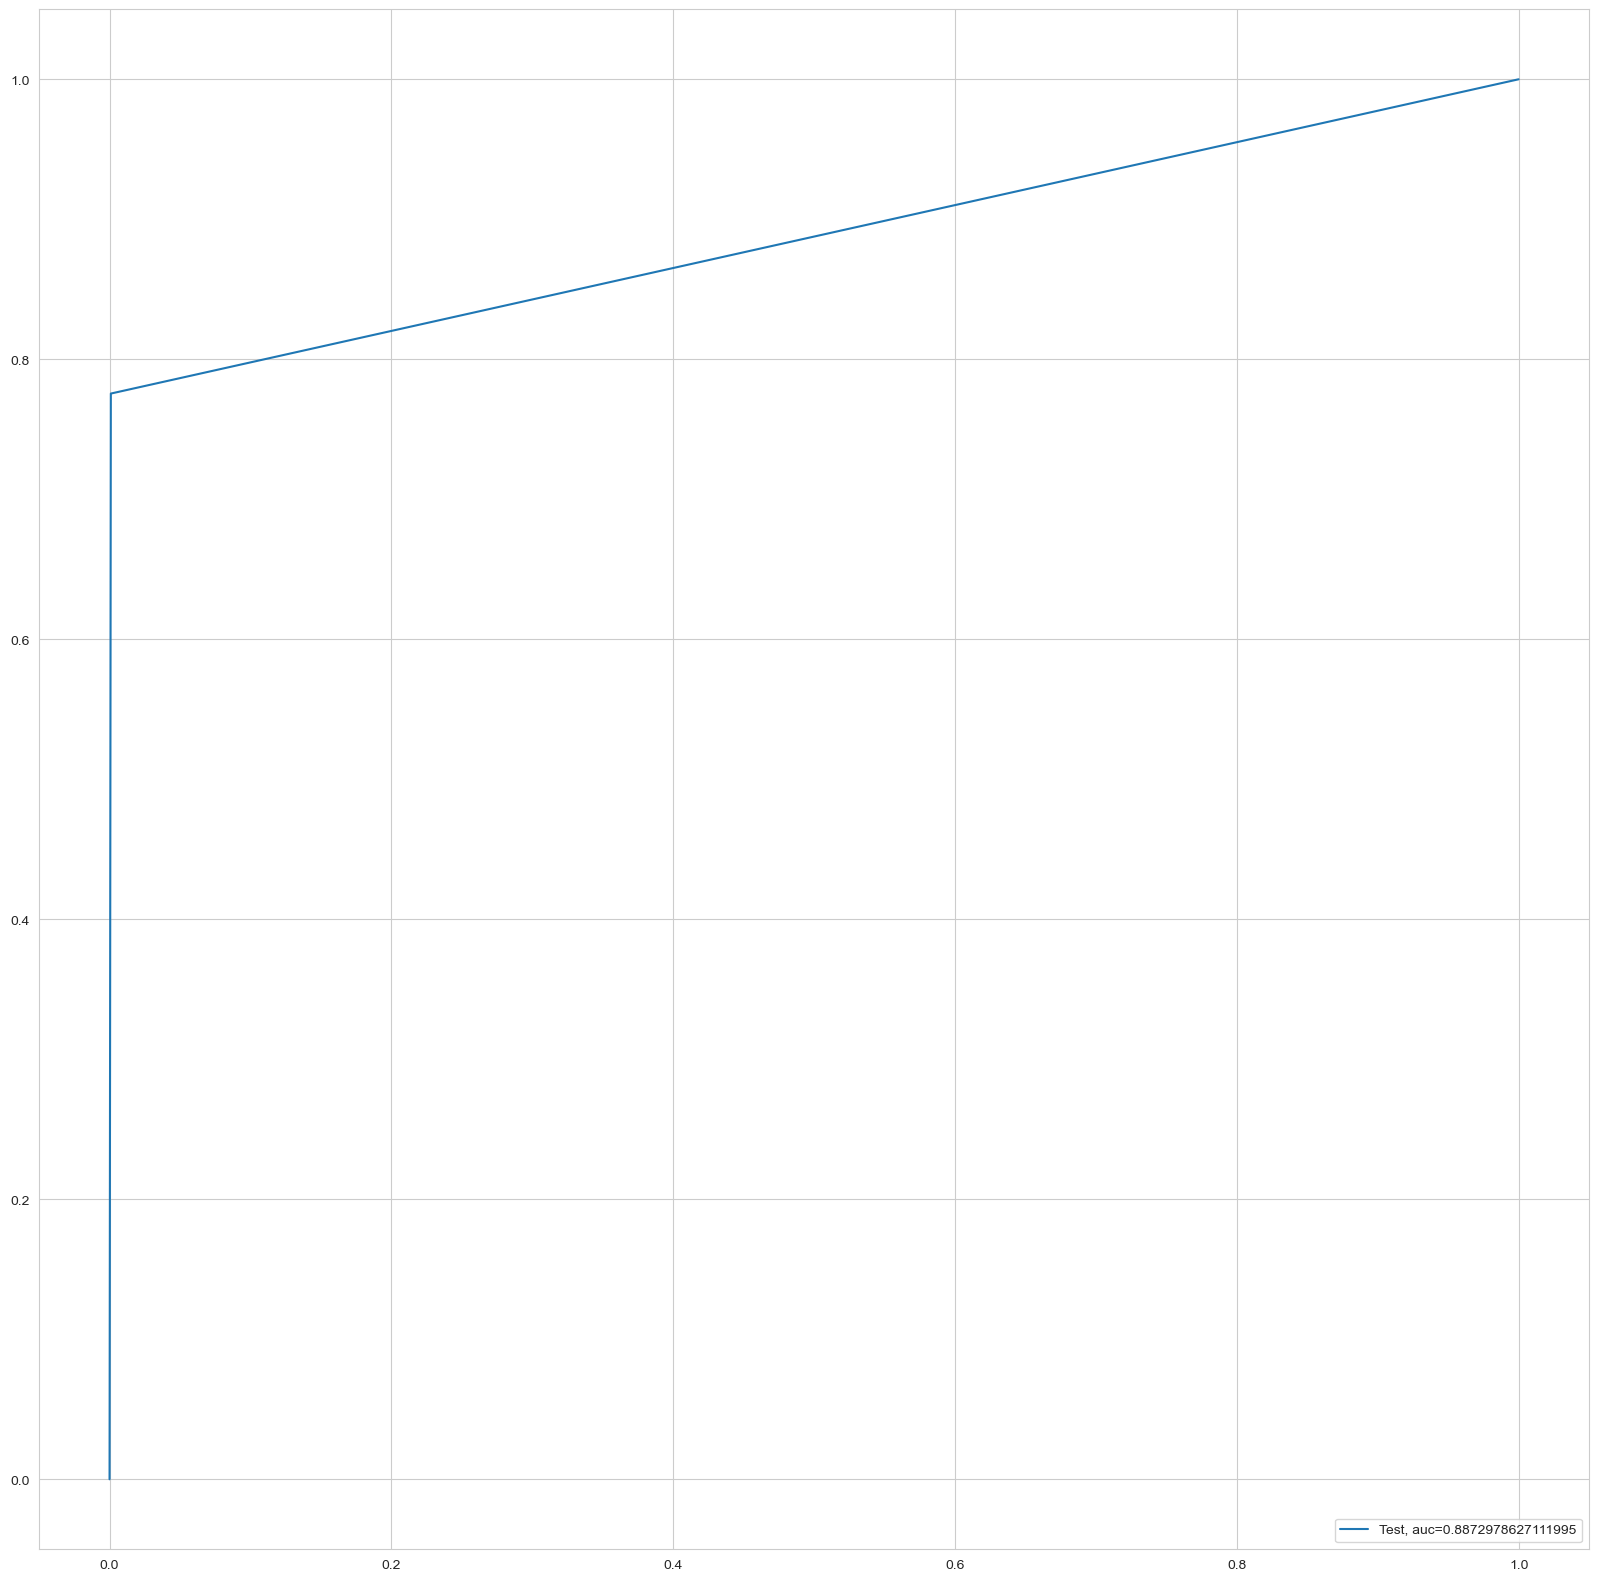

Time Elapsed: --- 41.5905921459198 seconds ---


In [93]:
#Run Decision Tree Models with  'gini' & 'entropy' criteria - SMOTE Oversampling with StratifiedKFold CV
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
Model_Perf_Results_df = DecisionTreeModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Model Accuracy: 0.9994733238531627
Confusion Matrix


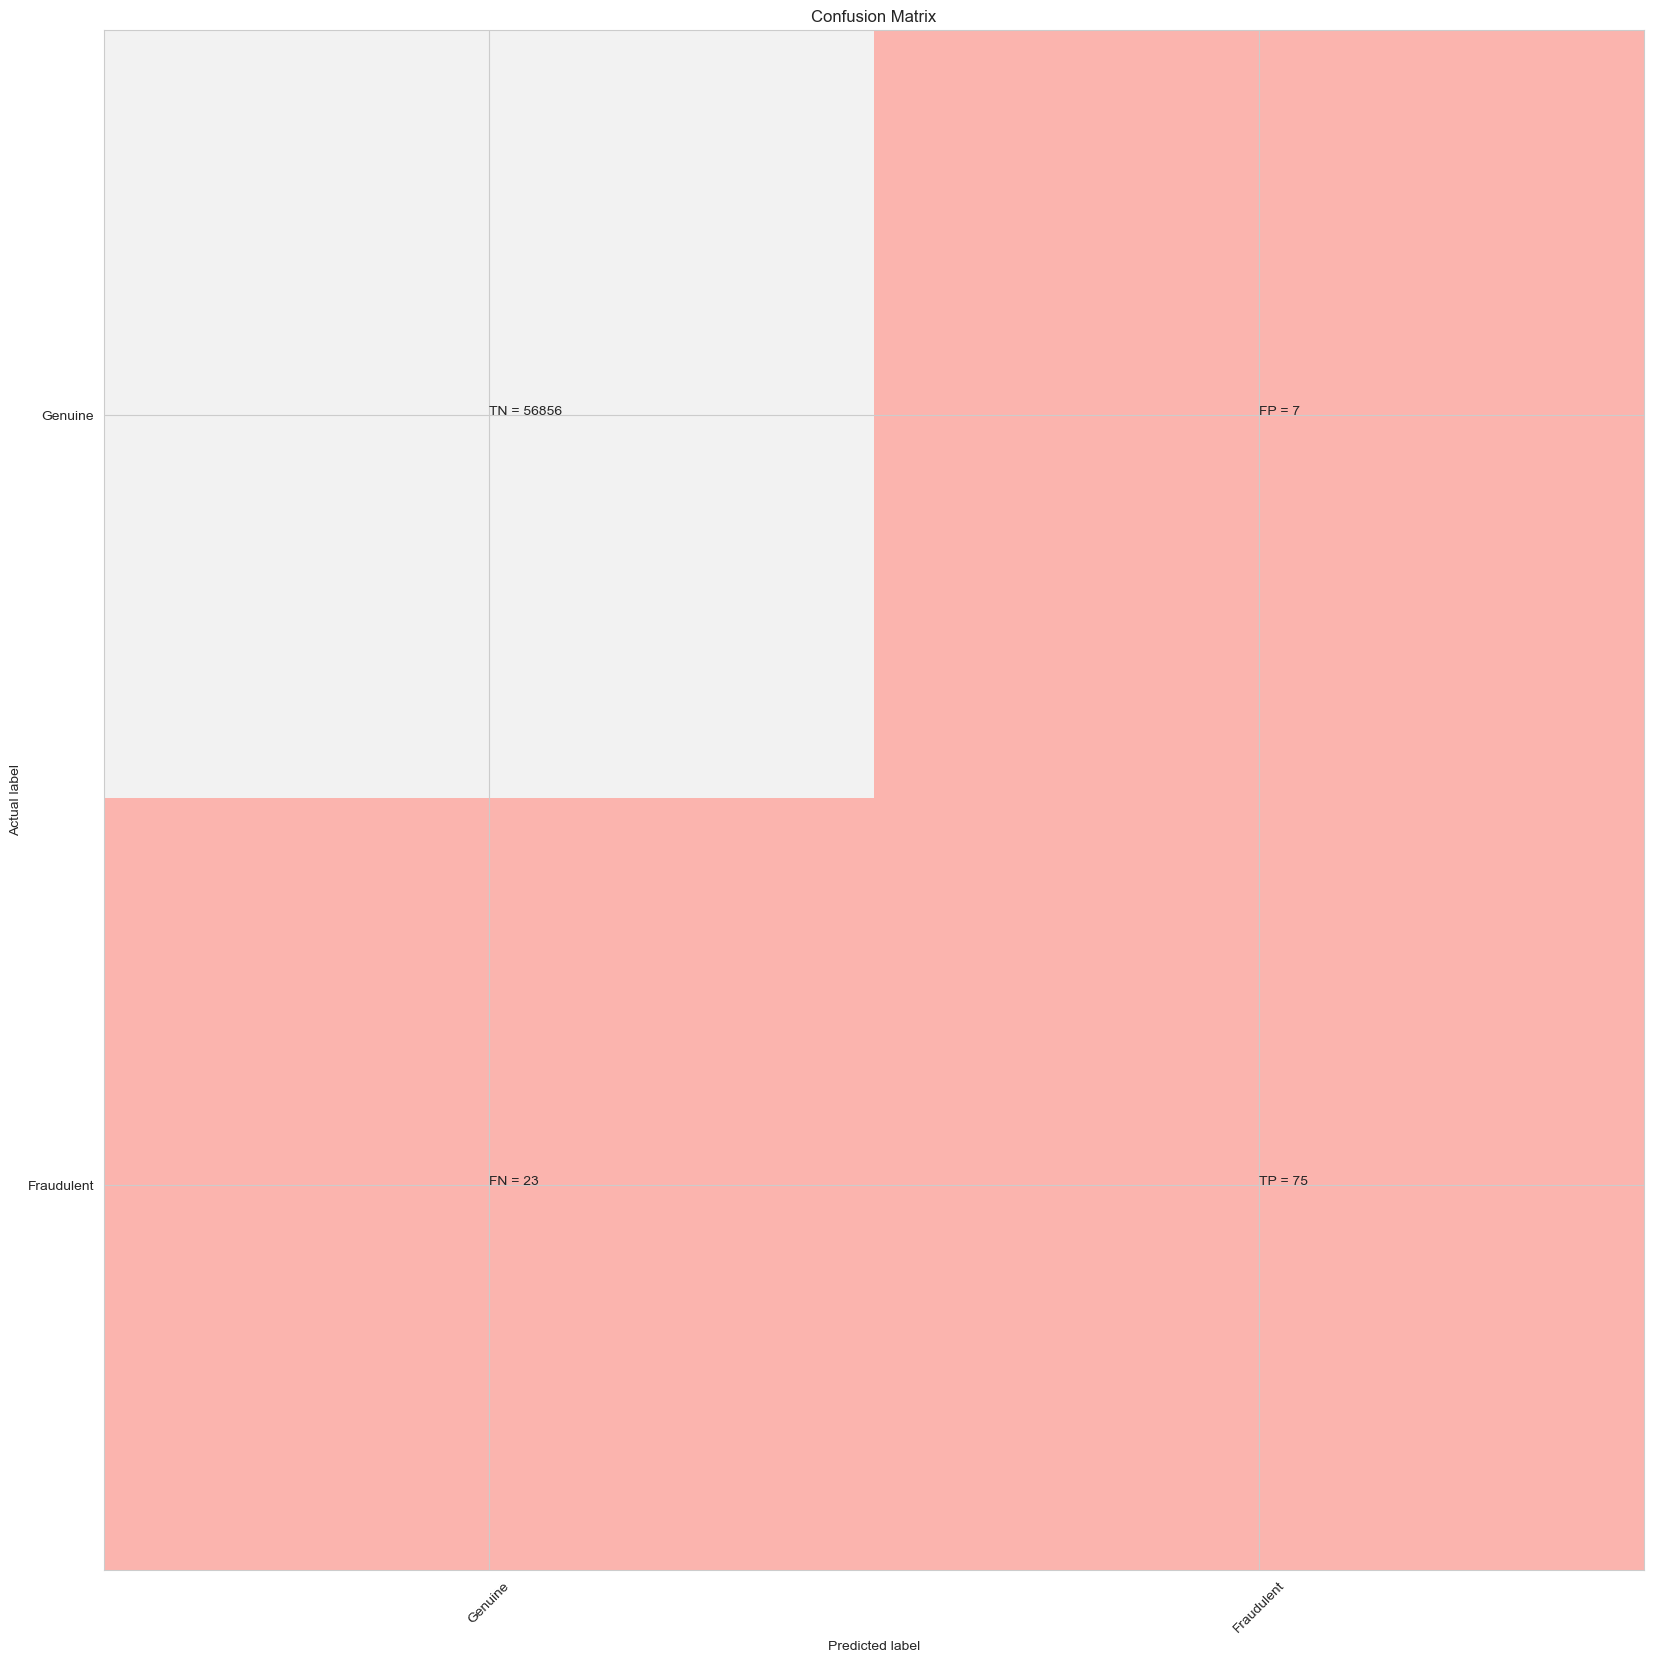

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.91      0.77      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9511751660902125
Random Forest threshold: 0.05
ROC for the test dataset 95.1%


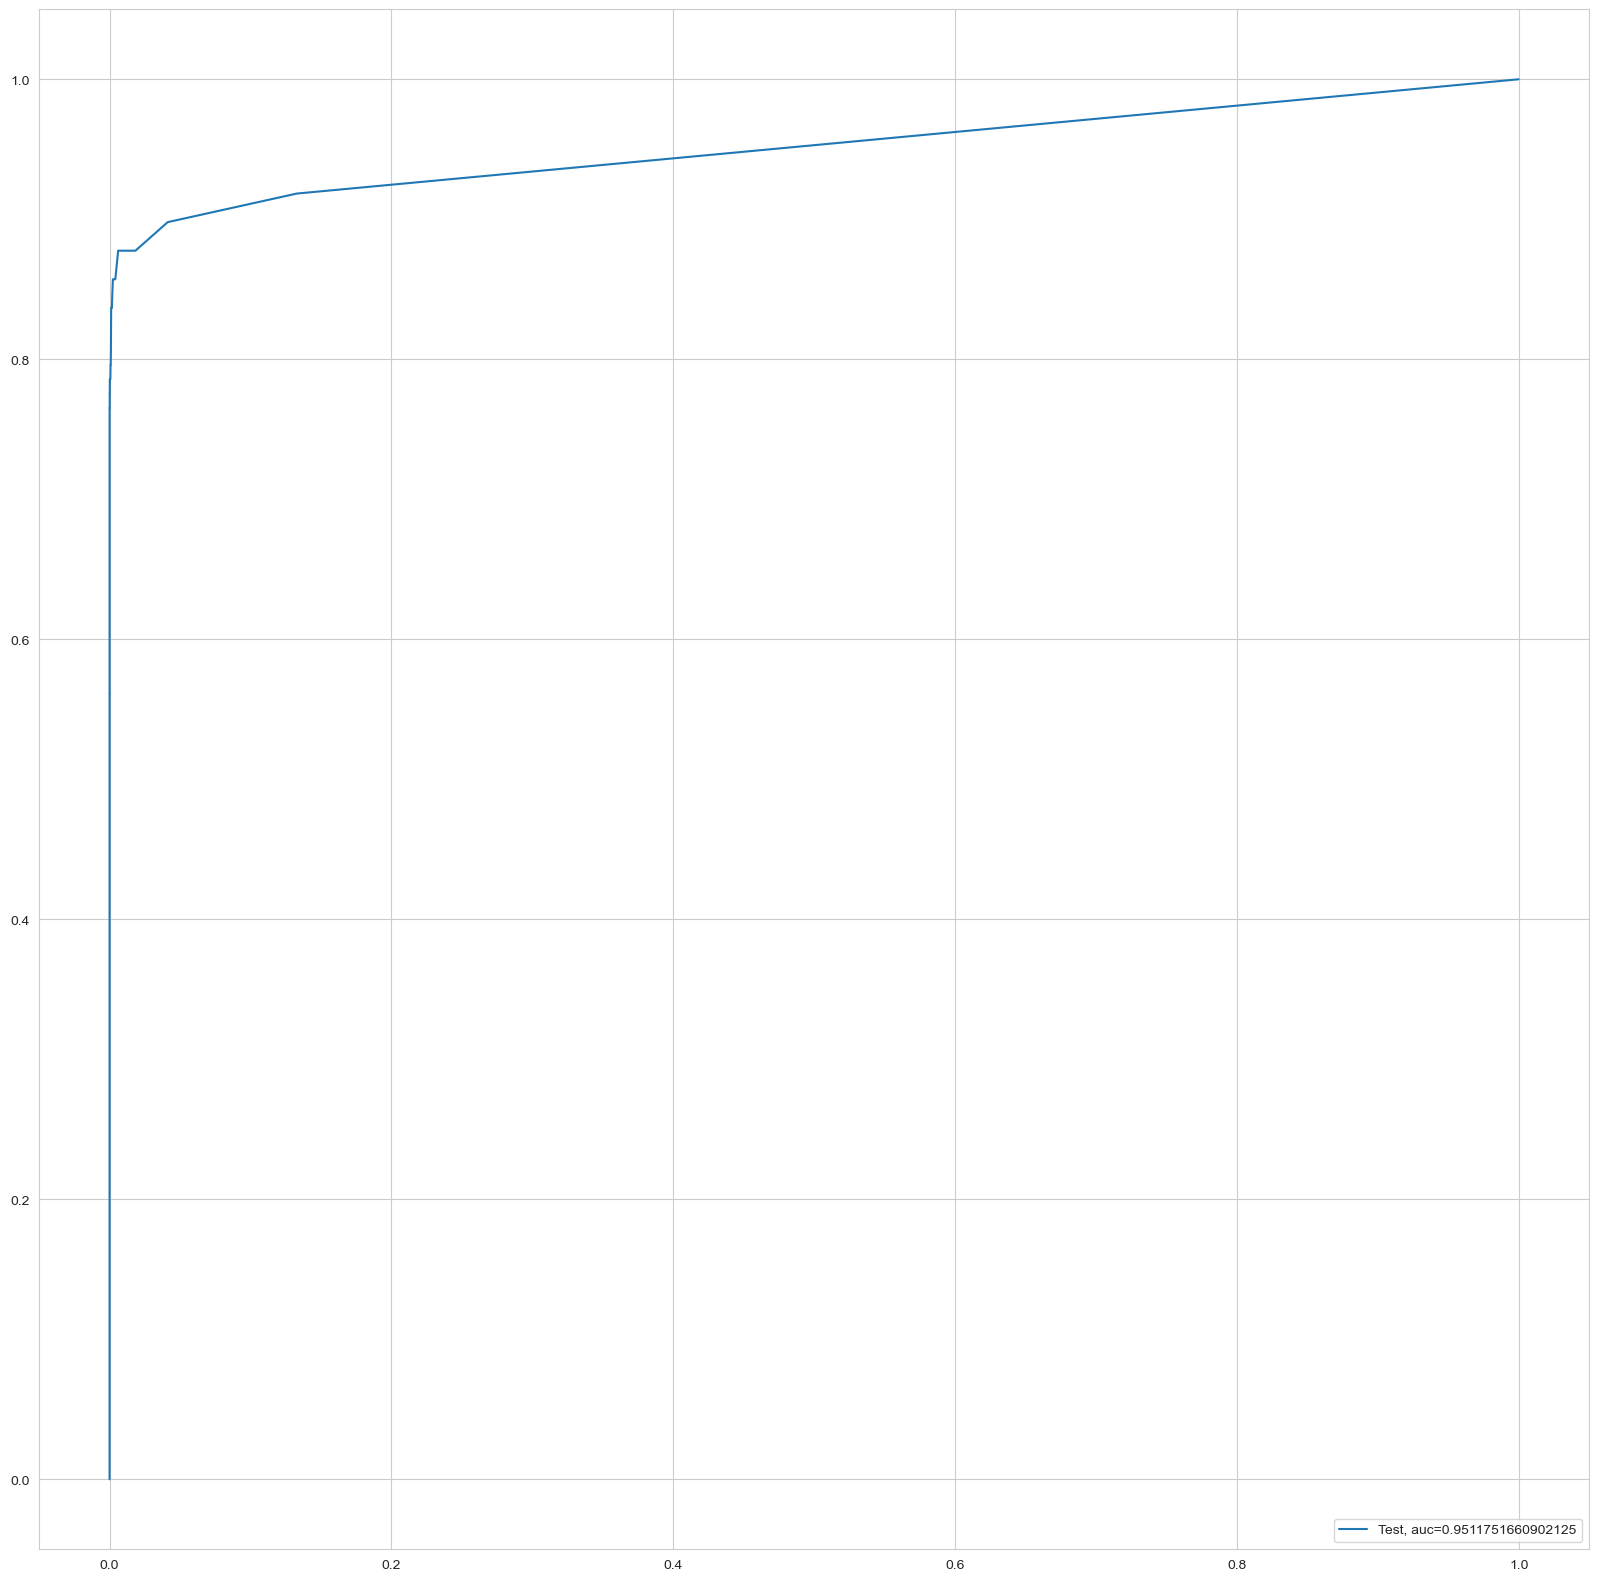

Time Elapsed: --- 206.63588309288025 seconds ---


In [94]:
#Run Random Forest Model - SMOTE Oversampling with StratifiedKFold CV
print("Random Forest Model")
start_time = time.time()
Model_Perf_Results_df = RandomForestModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
[23:04:23] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9995259914678464
Confusion Matrix


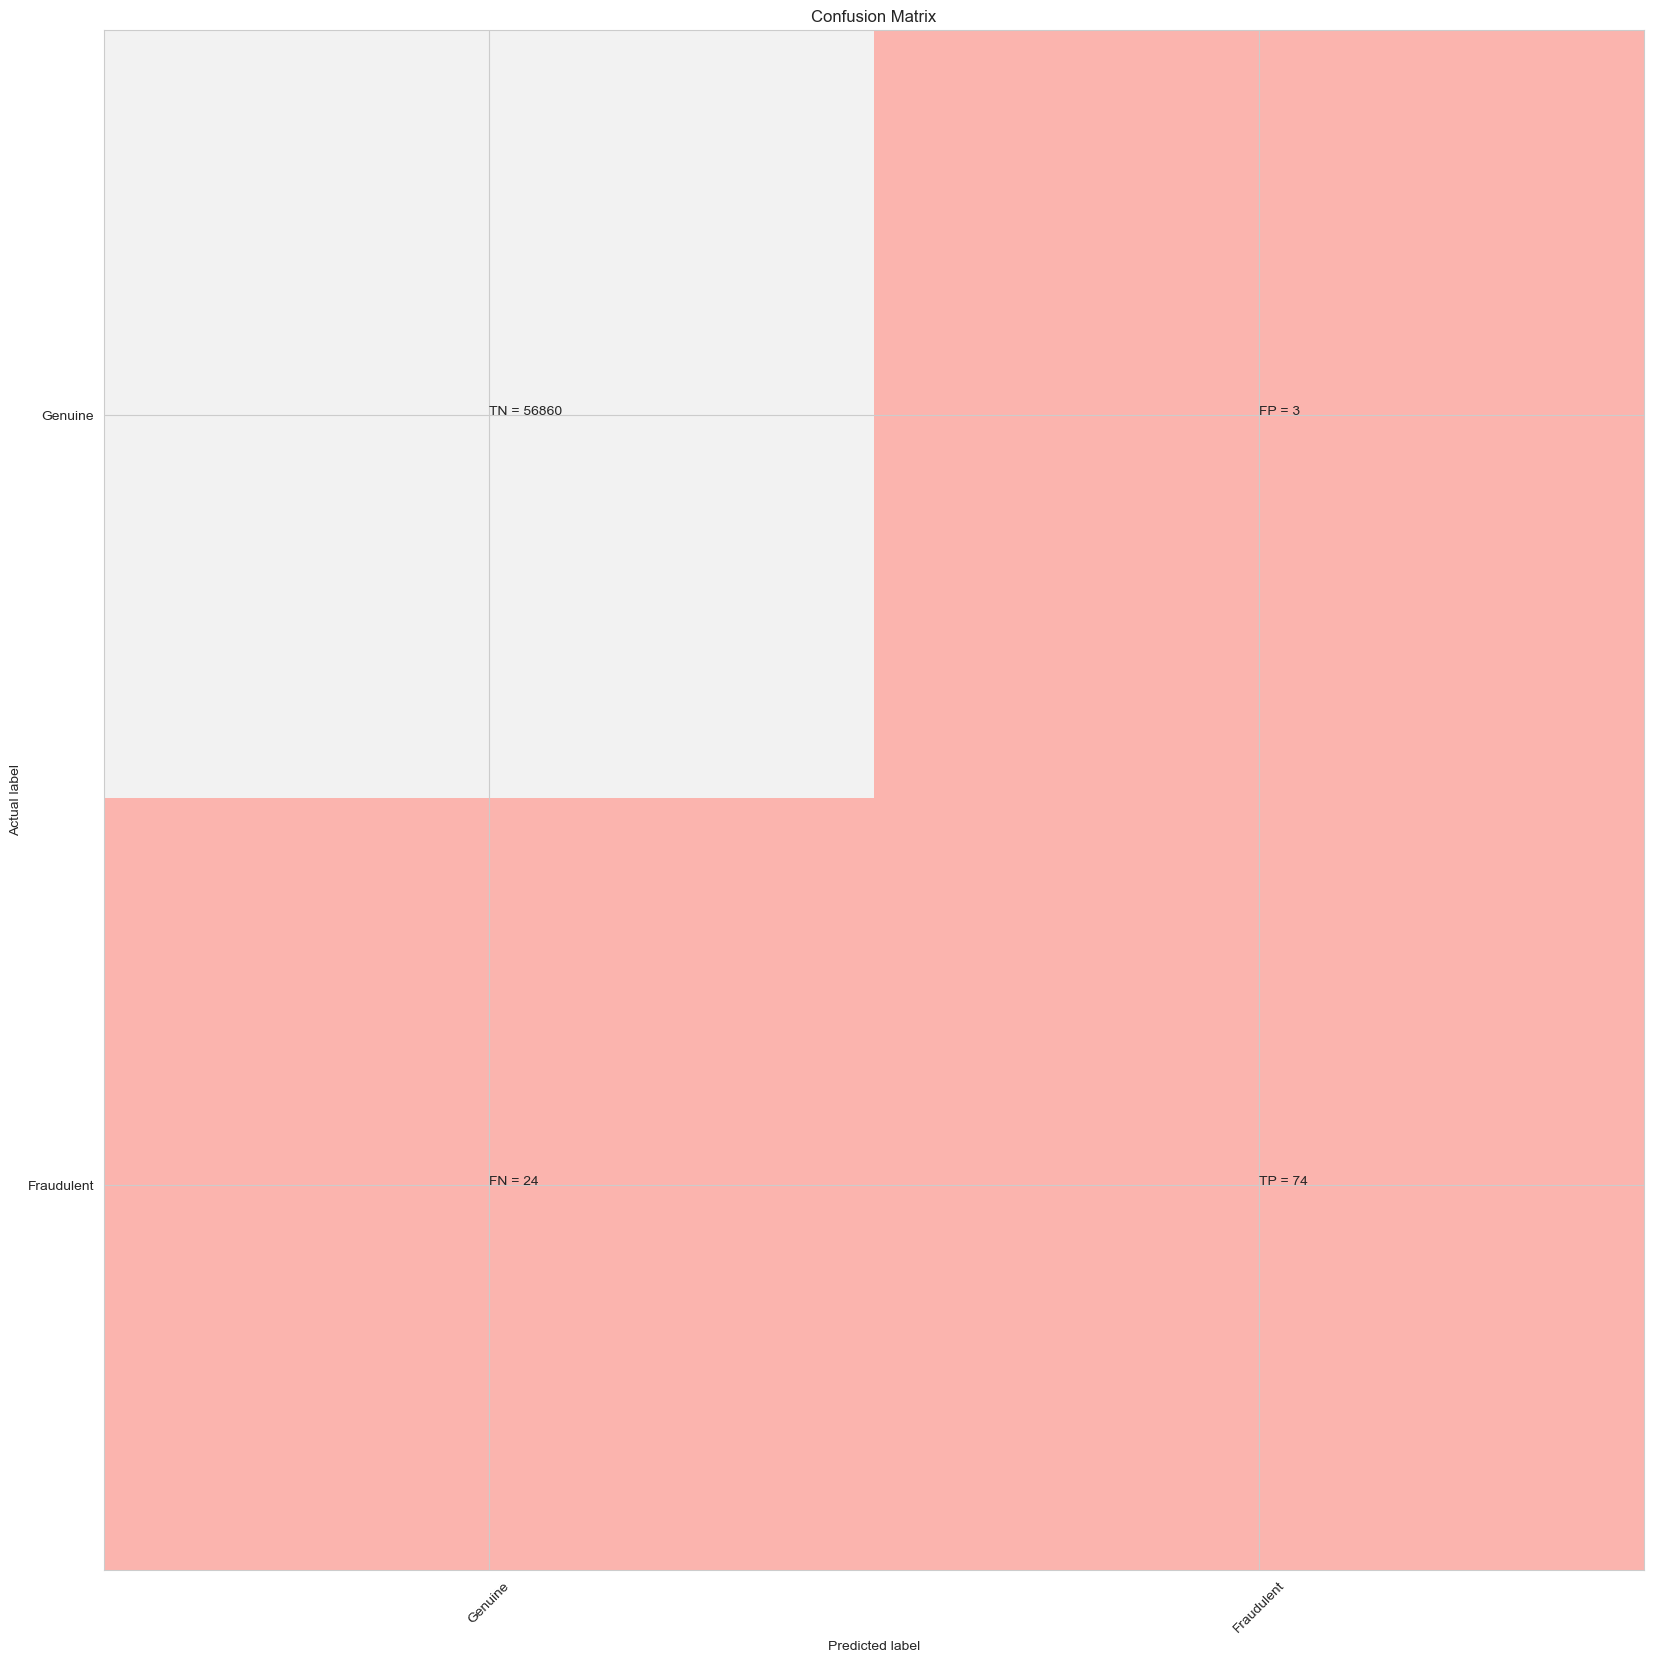

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56961
   macro avg       0.98      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9738051033508035
XGBoost threshold: 0.0004321778251323849
ROC for the test dataset 97.4%


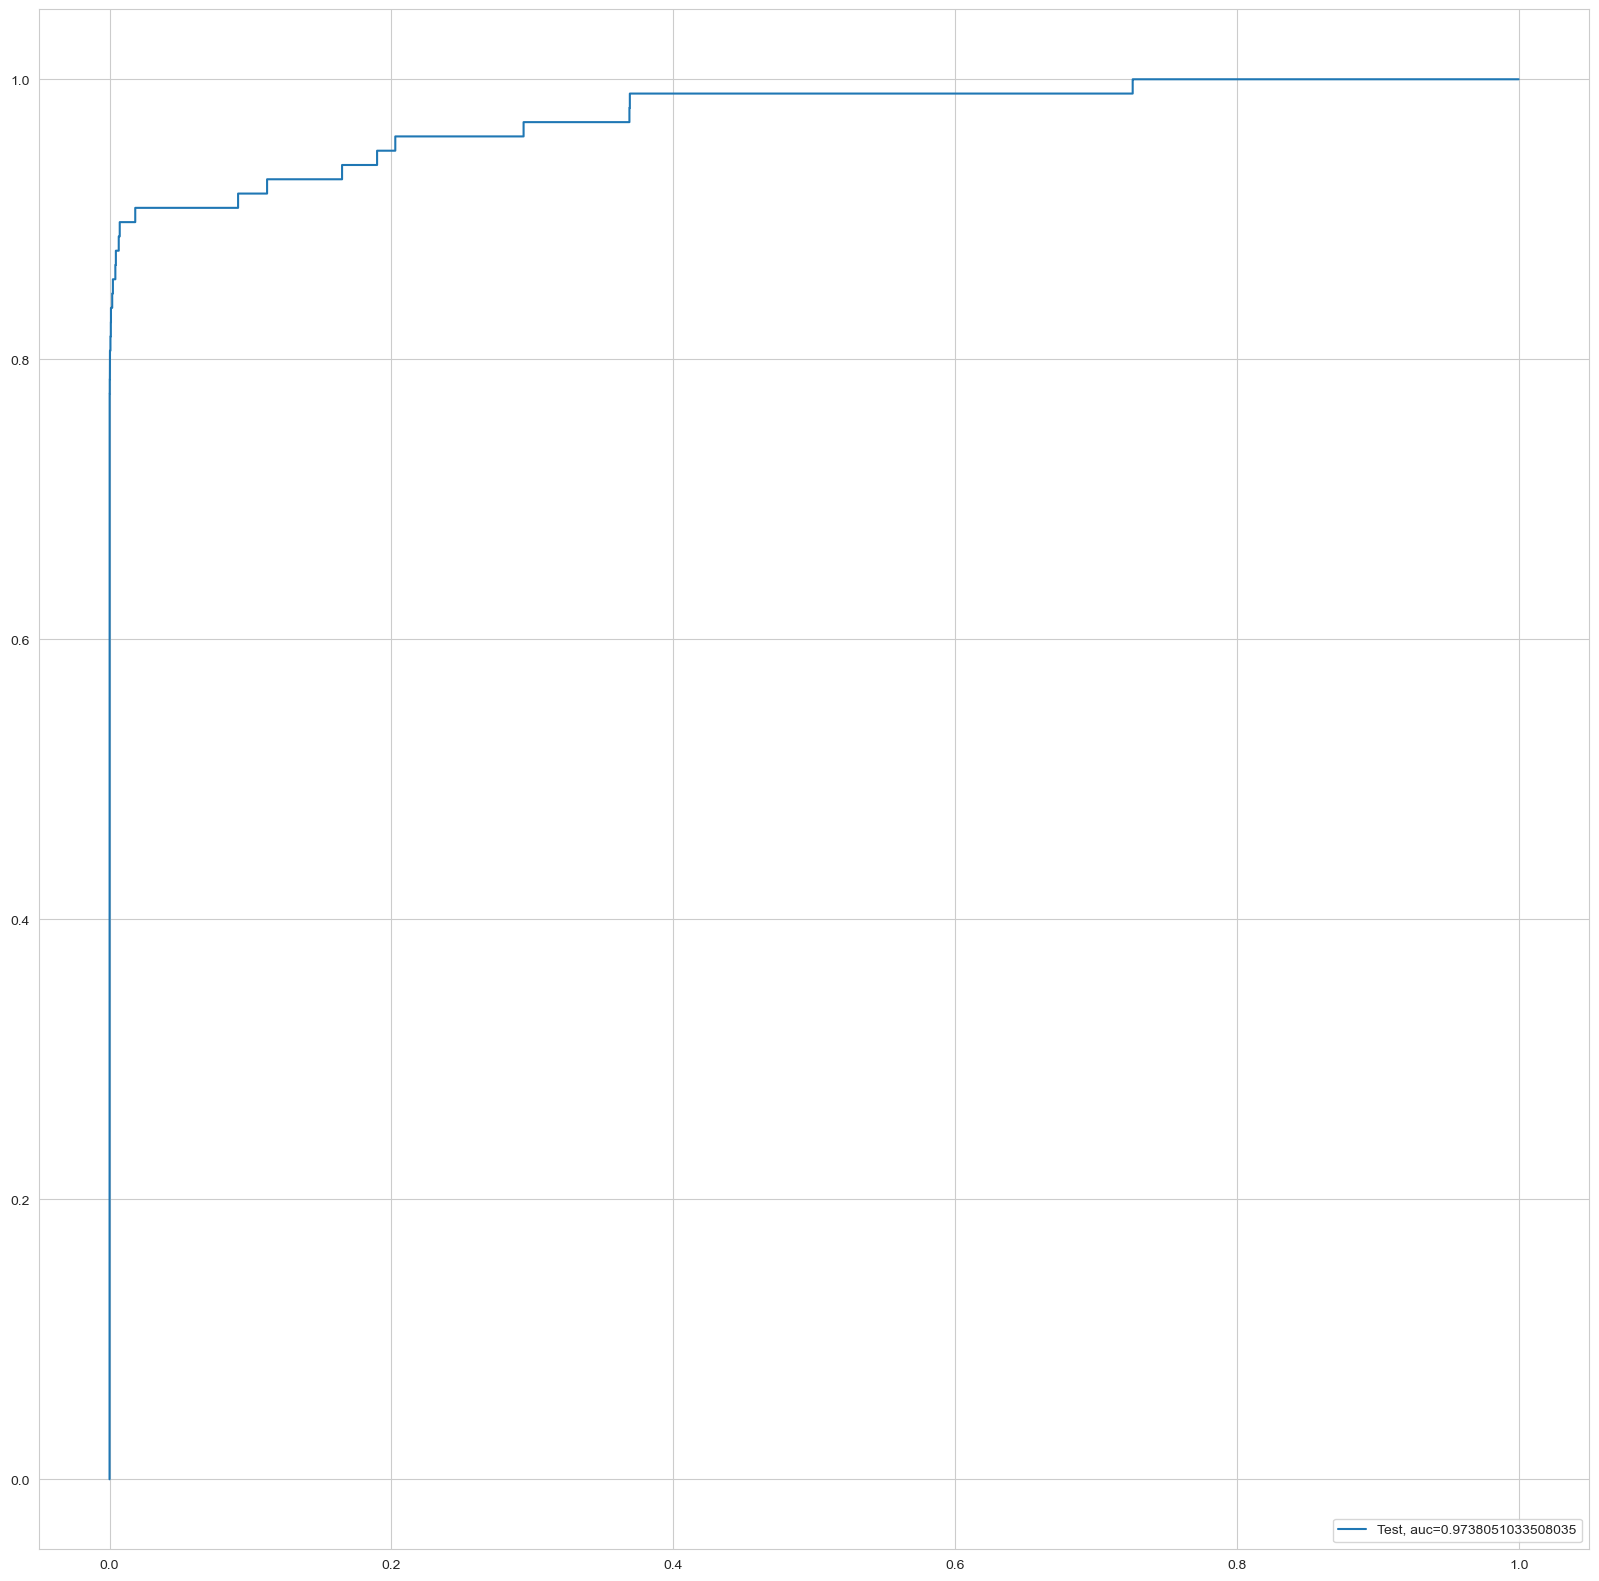

Time Elapsed: --- 42.88874340057373 seconds ---


In [95]:
#Run XGBoost Model - SMOTE Oversampling with StratifiedKFold CV
print("XGBoost Model")
start_time = time.time()
Model_Perf_Results_df = XGBoostModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_train_Smote, y_train_Smote, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

In [96]:
Model_Perf_Results_df

Data_Imbalance_Handling_Process  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    
39   SMOTE Oversampling with StratifiedKFold CV    
40   SMOTE Oversampling with StratifiedKFold CV    
41   SMOTE Oversampling with StratifiedKFold CV    
42   SMOTE Oversampling with StratifiedKFold CV    
43   SMOTE Oversampling with StratifiedKFold CV    
44   SMOTE Oversampling with StratifiedKFold CV    
45   SMOTE Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  ROC_Value  Threshold  
0   Logistic Regression with L2 Regularisation  0.999228   0.985101   0.002730  
1   Logistic Regression with L1 Regularisation  0.999204   0.988625   0.007539  
2                                          KNN  0.999450   0.937369   0.200000  
3                                          SVM  0.998853   0.889853   0.000849  
4                Tree Model with gini criteria  0.999228   0.900507   1.000000  
5             Tree Model with entropy criteria  0.999216   0.889489   1.000000  
6                                Random Forest  0.999602   0.954549   0.020000  
7                                      XGBoost  0.999661   0.985249   0.000476  
8   Logistic Regression with L2 Regularisation  0.999175   0.972154   0.002105  
9   Logistic Regression with L1 Regularisation  0.999228   0.887823   0.037429  
10                                         KNN  0.999298   0.841574   0.200000  
11                                         SVM  0.998666   0.485525   0.001828  
12               Tree Model with gini criteria  0.999210   0.885839   1.000000  
13            Tree Model with entropy criteria  0.999368   0.892238   1.000000  
14                               Random Forest  0.999666   0.941190   0.010000  
15                                     XGBoost  0.999702   0.959122   0.000100  
16  Logistic Regression with L2 Regularisation  0.998771   0.983322   0.001566  
17  Logistic Regression with L1 Regularisation  0.998490   0.942320   0.004609  
18                               

#### Overall XGBoost has best accuracy and next to best ROC value, hence making XGBoost as best model with SMOTE as well.

### Print the class distribution after applying ADASYN

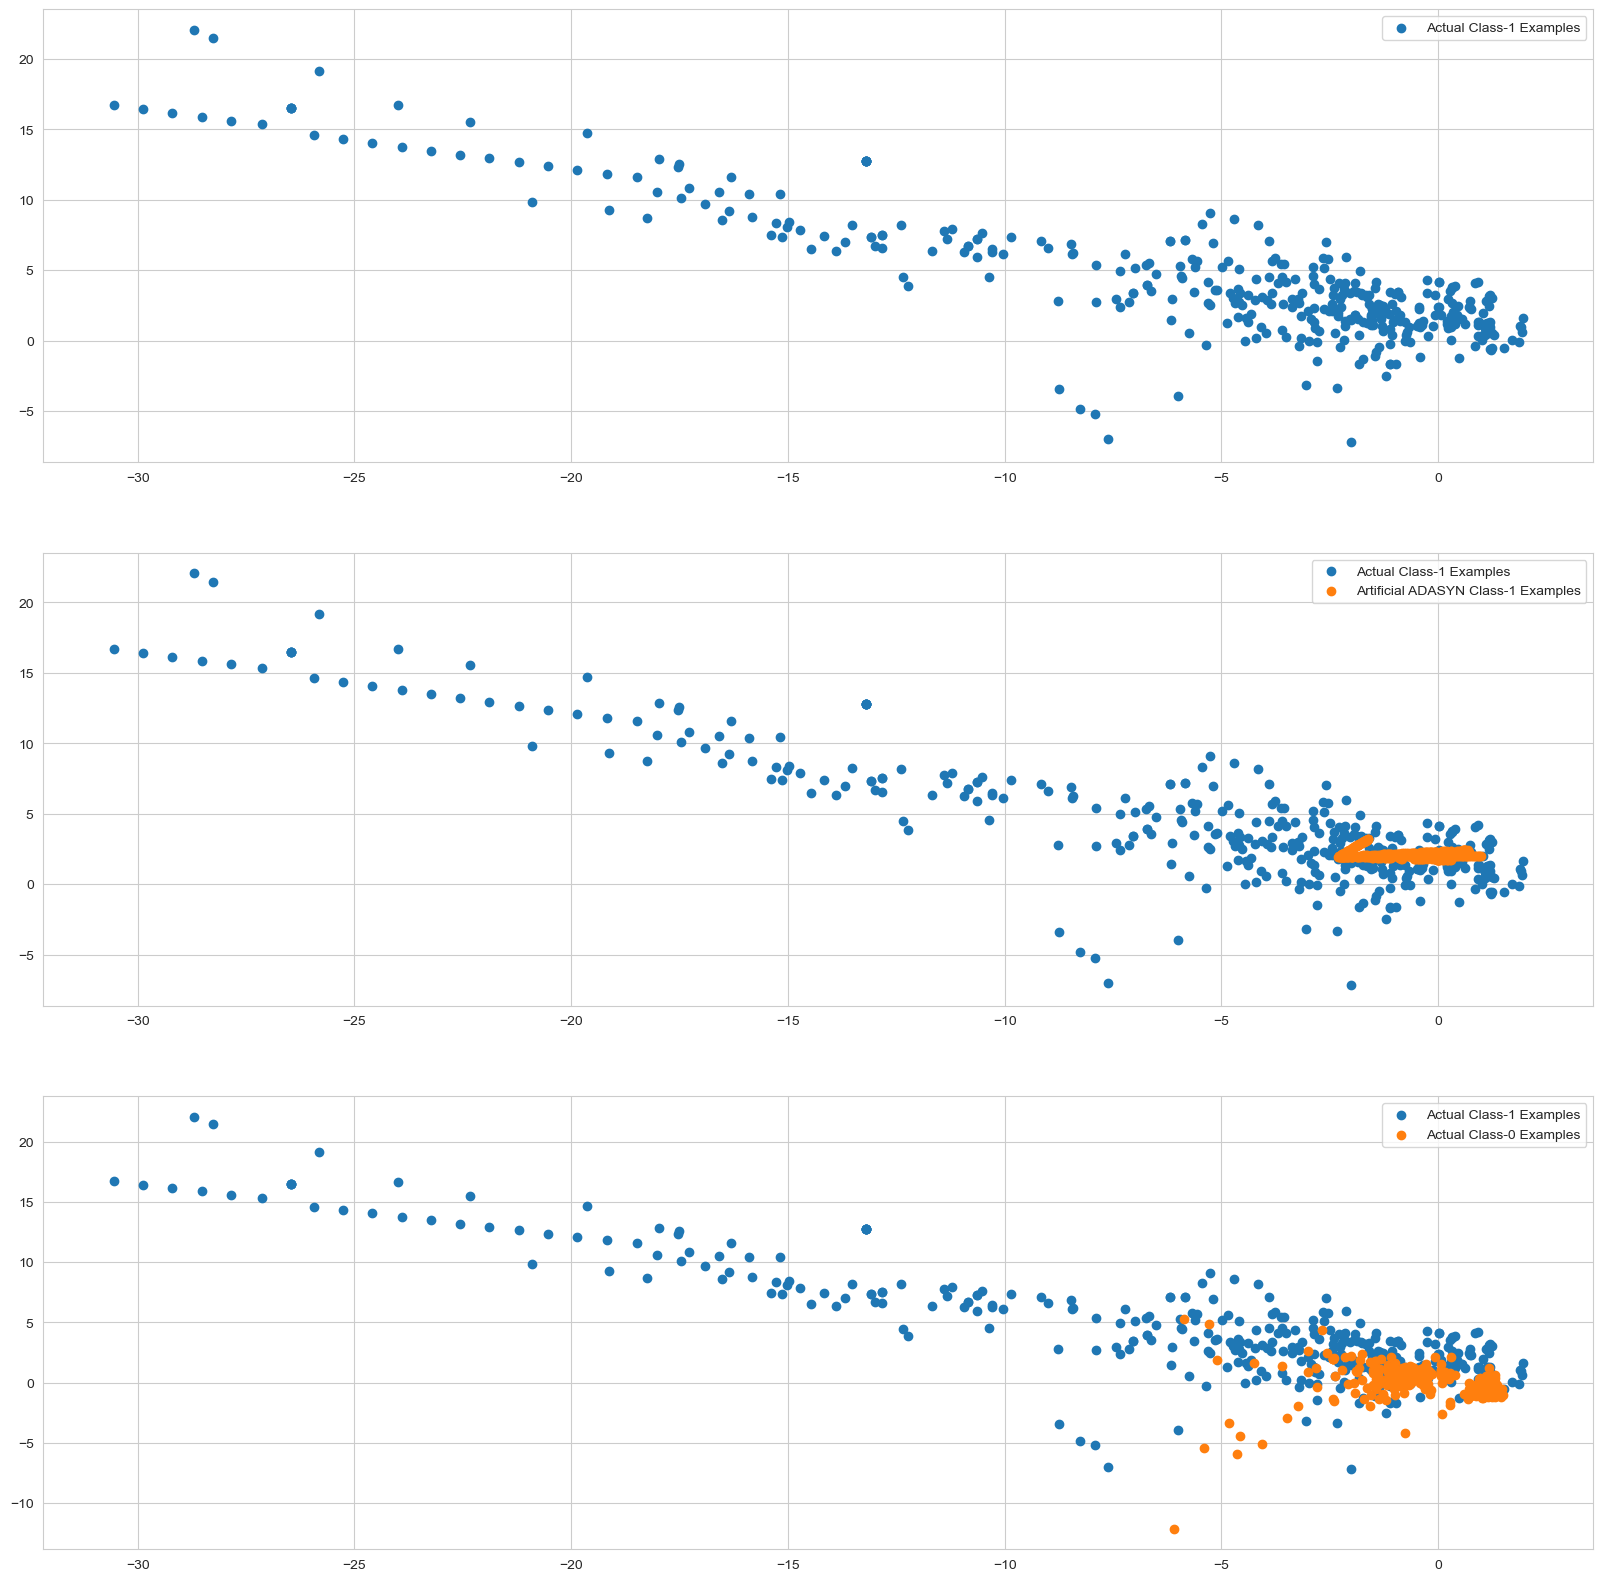

In [97]:
ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [98]:
skf = StratifiedKFold(n_splits=5, random_state=None)

for fold, (train_index, test_index) in enumerate(skf.split(X,y), 1):
    X_train = X.loc[train_index]
    y_train = y.loc[train_index]
    X_test = X.loc[test_index]
    y_test = y.loc[test_index]
    SMOTE = over_sampling.SMOTE(random_state=0)
    X_train_adasyn, y_train_adasyn= ada.fit_resample(X_train, y_train)

#Create Dataframe for X_adasyn
X_train_adasyn = pd.DataFrame(data=X_train_adasyn, columns=var)

Logistic Regression with L1 And L2 Regularisation
Max auc_roc for l2: 0.9926923187333674
Max auc_roc for l1: 0.5
Parameters for l2 regularisation
Coefficient: [[ 1.07347962e+00  8.60265229e-01  1.31729297e-01  8.94099686e-01
   1.14200353e+00 -8.26141578e-01 -5.85561160e-01 -6.59842676e-01
  -3.43480564e-01 -7.23260210e-01  4.52666687e-01 -1.48643536e+00
  -2.39763717e-01 -1.93714040e+00 -2.83179955e-01 -1.05189084e+00
  -1.23616921e+00 -2.51290941e-01  2.97298084e-01 -1.18958461e+00
  -5.99601883e-03  1.37200953e+00  7.80374204e-01 -3.69140749e-01
   3.98339645e-02  2.55178003e-01  5.19216881e-01  1.21207539e+00
   1.09282582e-02 -4.84036924e+00 -1.64915238e-02  1.11475086e-03]]
Intercept: [-3.56614028]
Score: {1: array([[0.60657786, 0.6382521 , 0.75762762, 0.9058069 , 0.97288008,
        0.98355087, 0.98724633, 0.99093184, 0.99227313, 0.99247991,
        0.99250688, 0.99250688, 0.99250688, 0.99250688, 0.99250688,
        0.99250688, 0.99250688, 0.99250688, 0.99250688, 0.99250688],
  

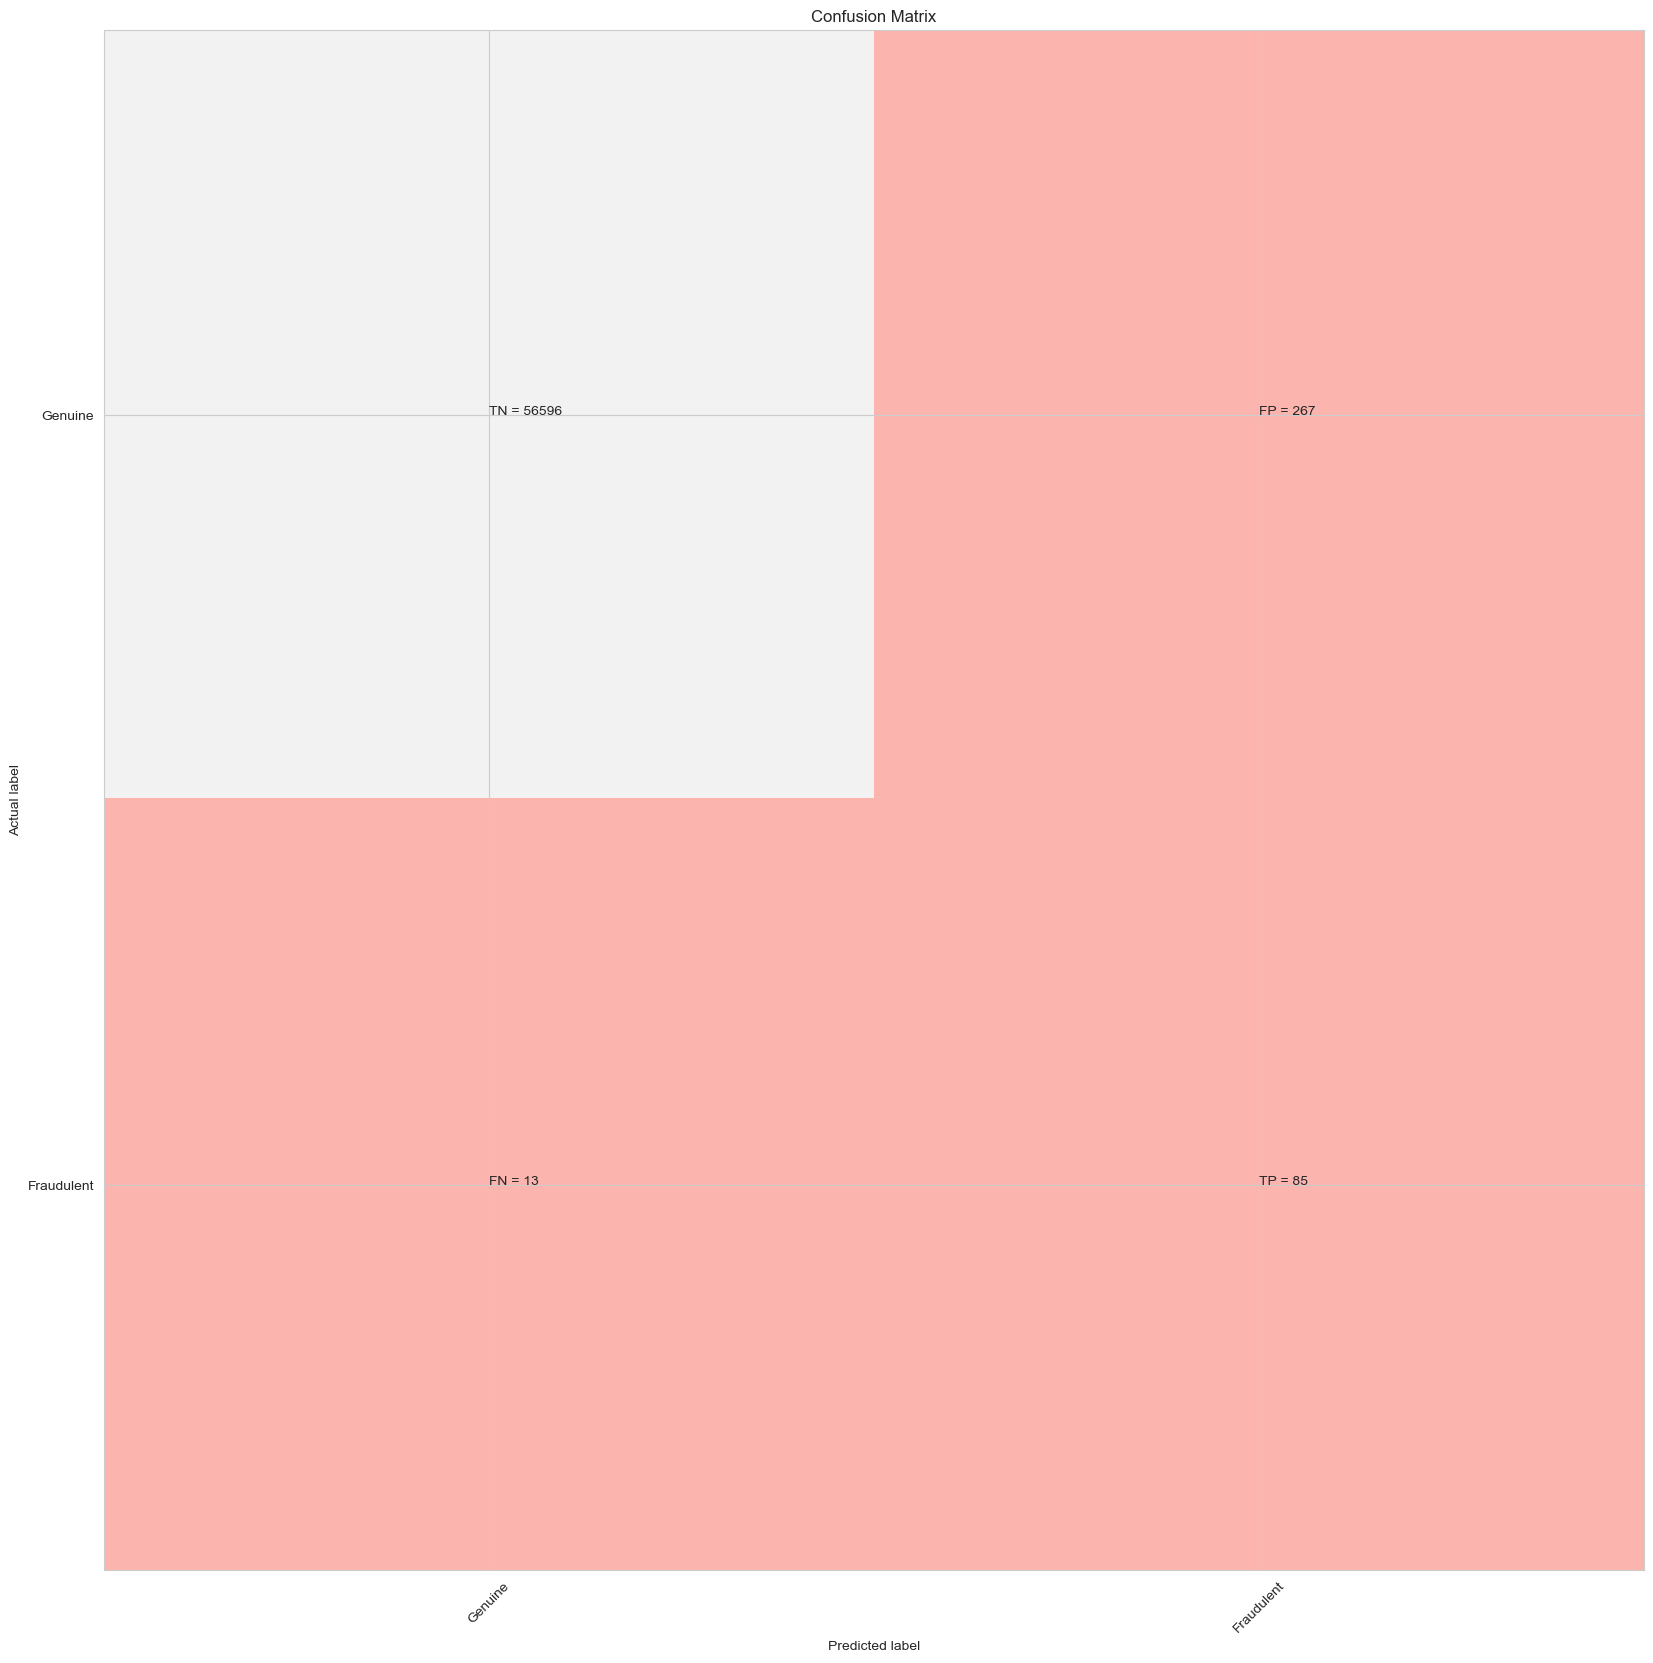

Classification Report with l2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.24      0.87      0.38        98

    accuracy                           1.00     56961
   macro avg       0.62      0.93      0.69     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of Logistic model with l1 regularisation : 0.9982795245869981
Confusion Matrix with l1


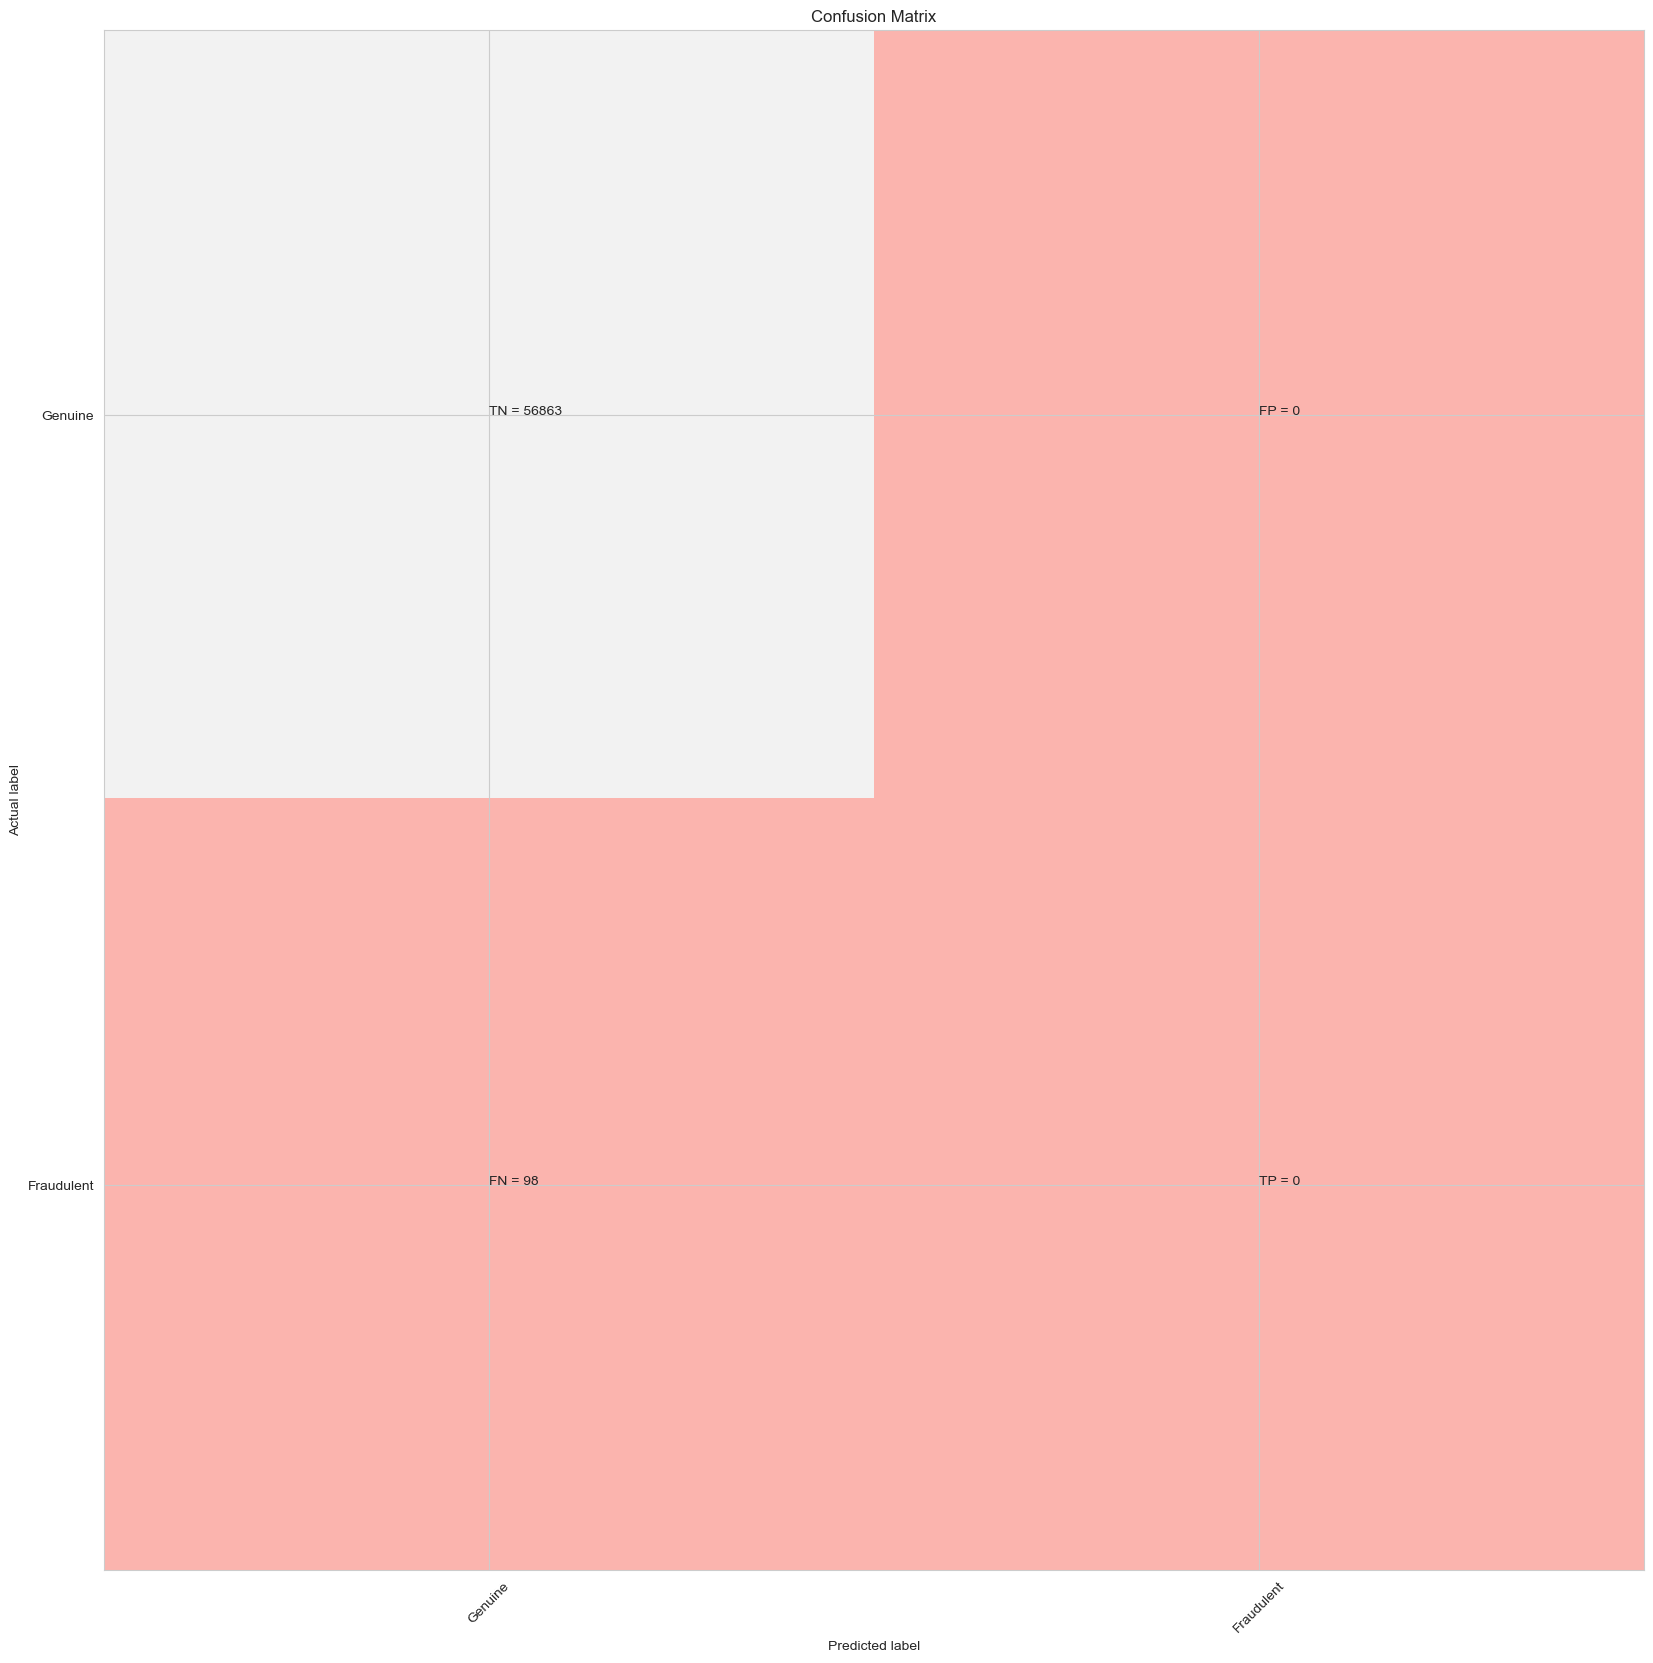

classification Report with l1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc_value: 0.9837025044440864
l2 threshold: 0.07444049356953272
ROC for the test dataset 98.4%


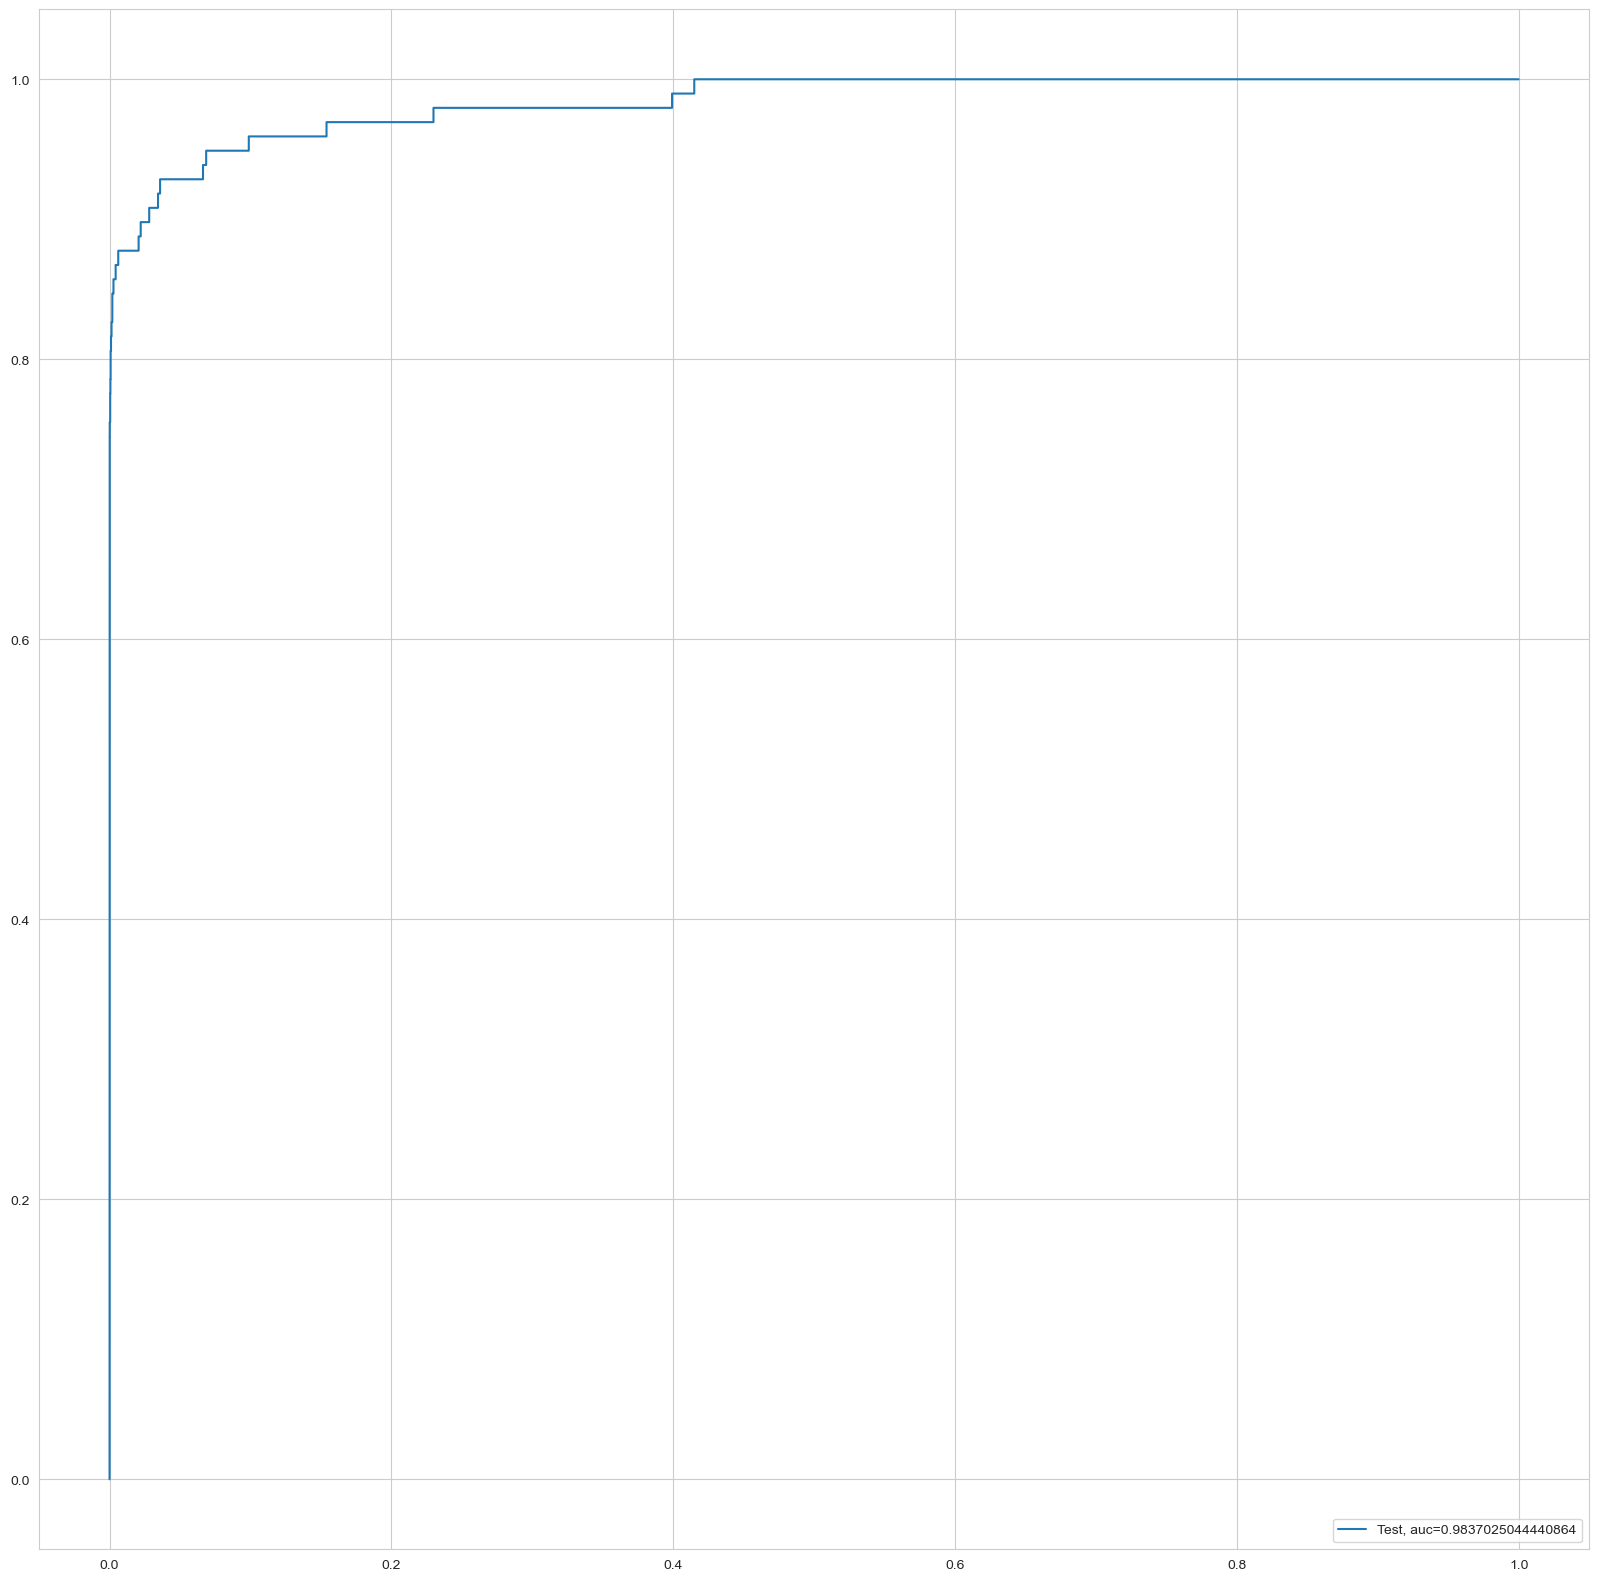

l1 roc_value: 0.5
l1 threshold: 1.5
ROC for the test dataset 50.0%


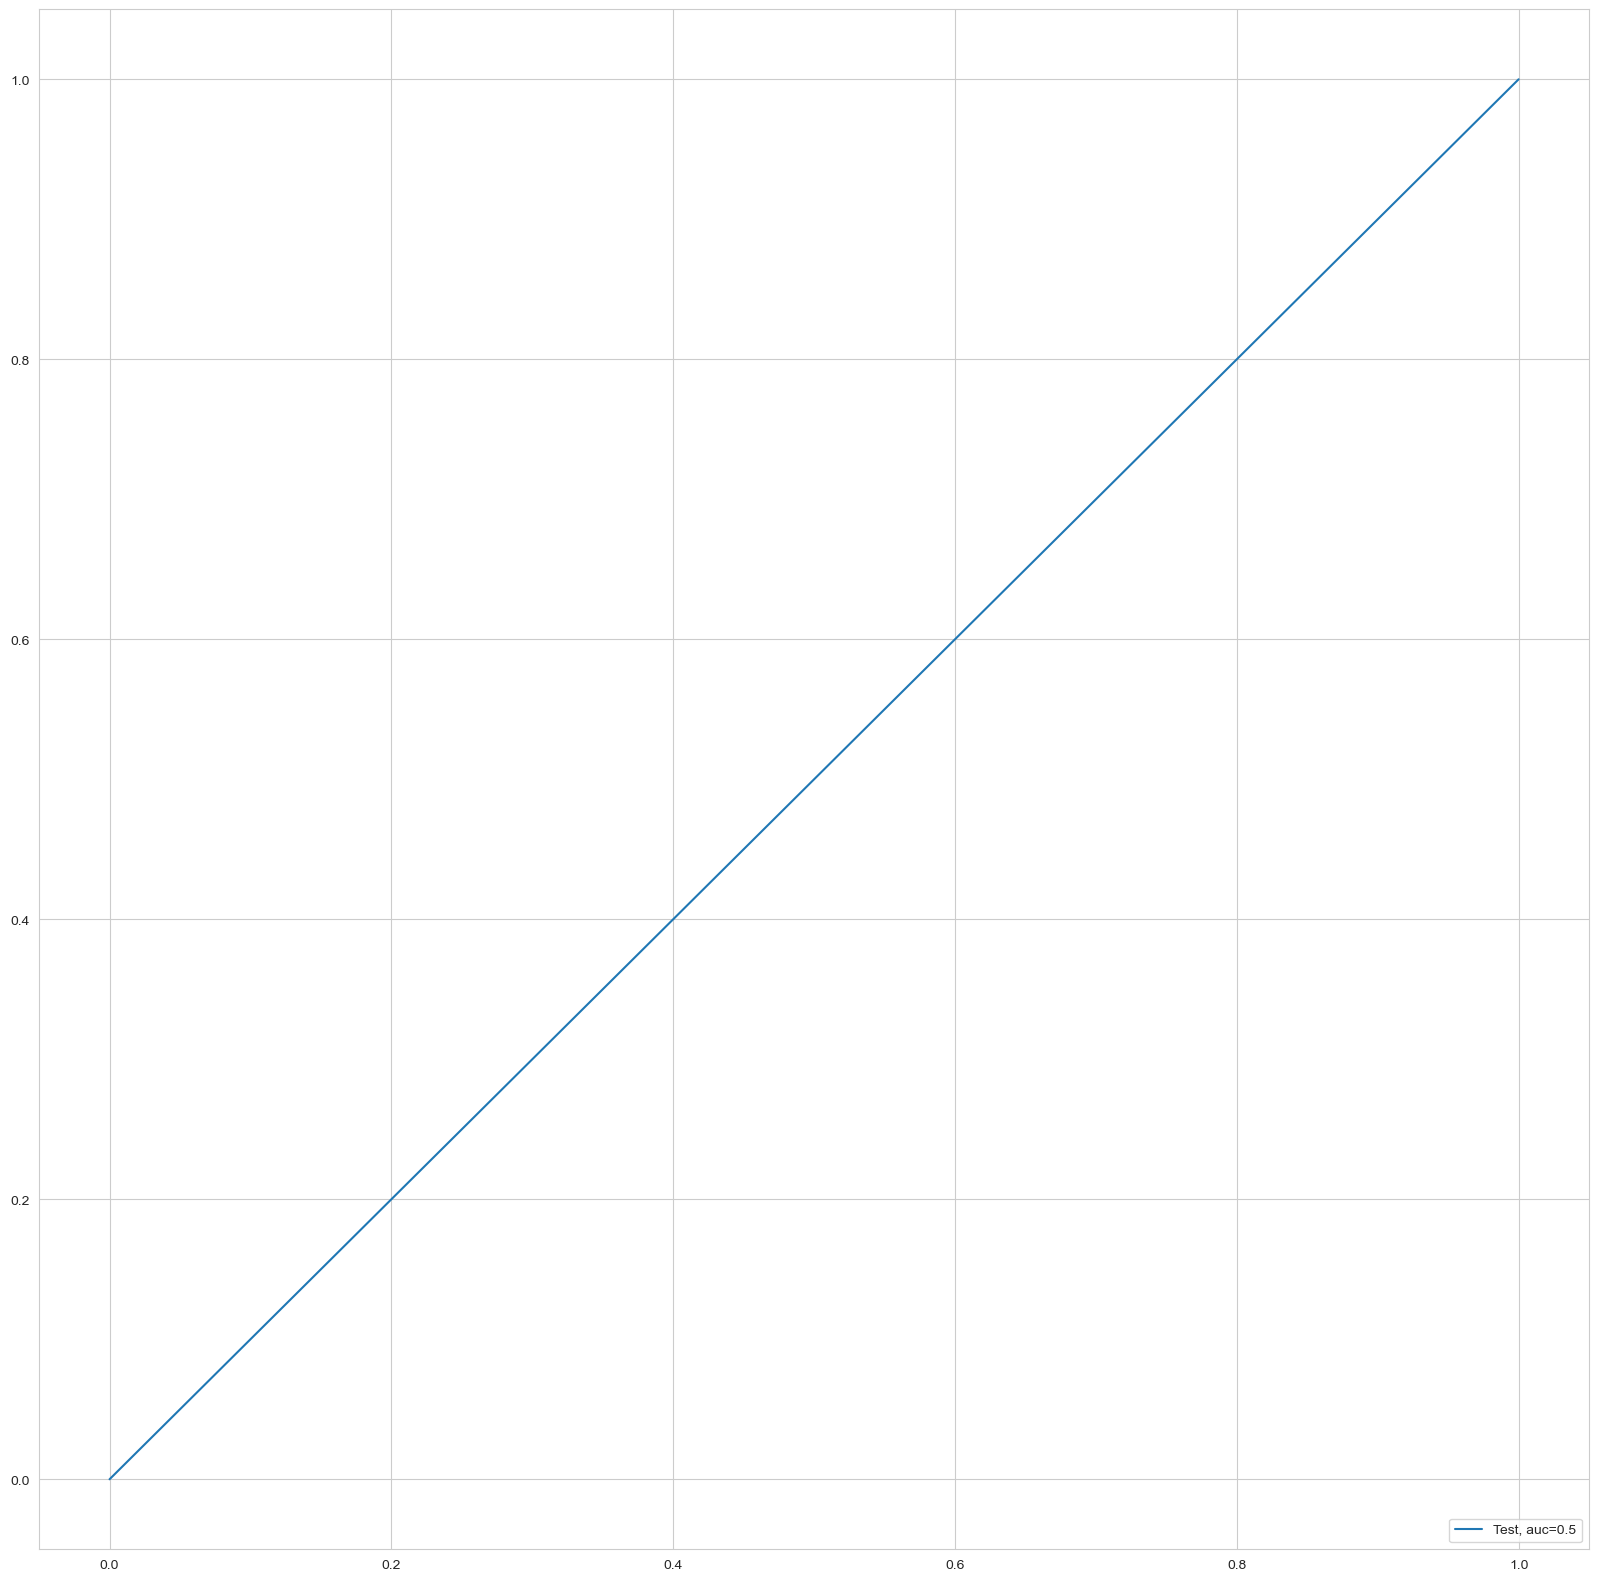

Time Elapsed: --- 159.83972215652466 seconds ---


In [99]:
Data_Imbalance_Handiling	 = "ADASYN Oversampling with StratifiedKFold CV "
#Run Logistic Regression with L1 And L2 Regularisation - ADASYN Oversampling with StratifiedKFold CV
print("Logistic Regression with L1 And L2 Regularisation")
start_time = time.time()
Model_Perf_Results_df = LogisticModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_train_adasyn, y_train_adasyn, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

##### Build models on other algorithms to see the better performing on ADASYN

KNN Model
model score
0.9944874563297695
Confusion Matrix


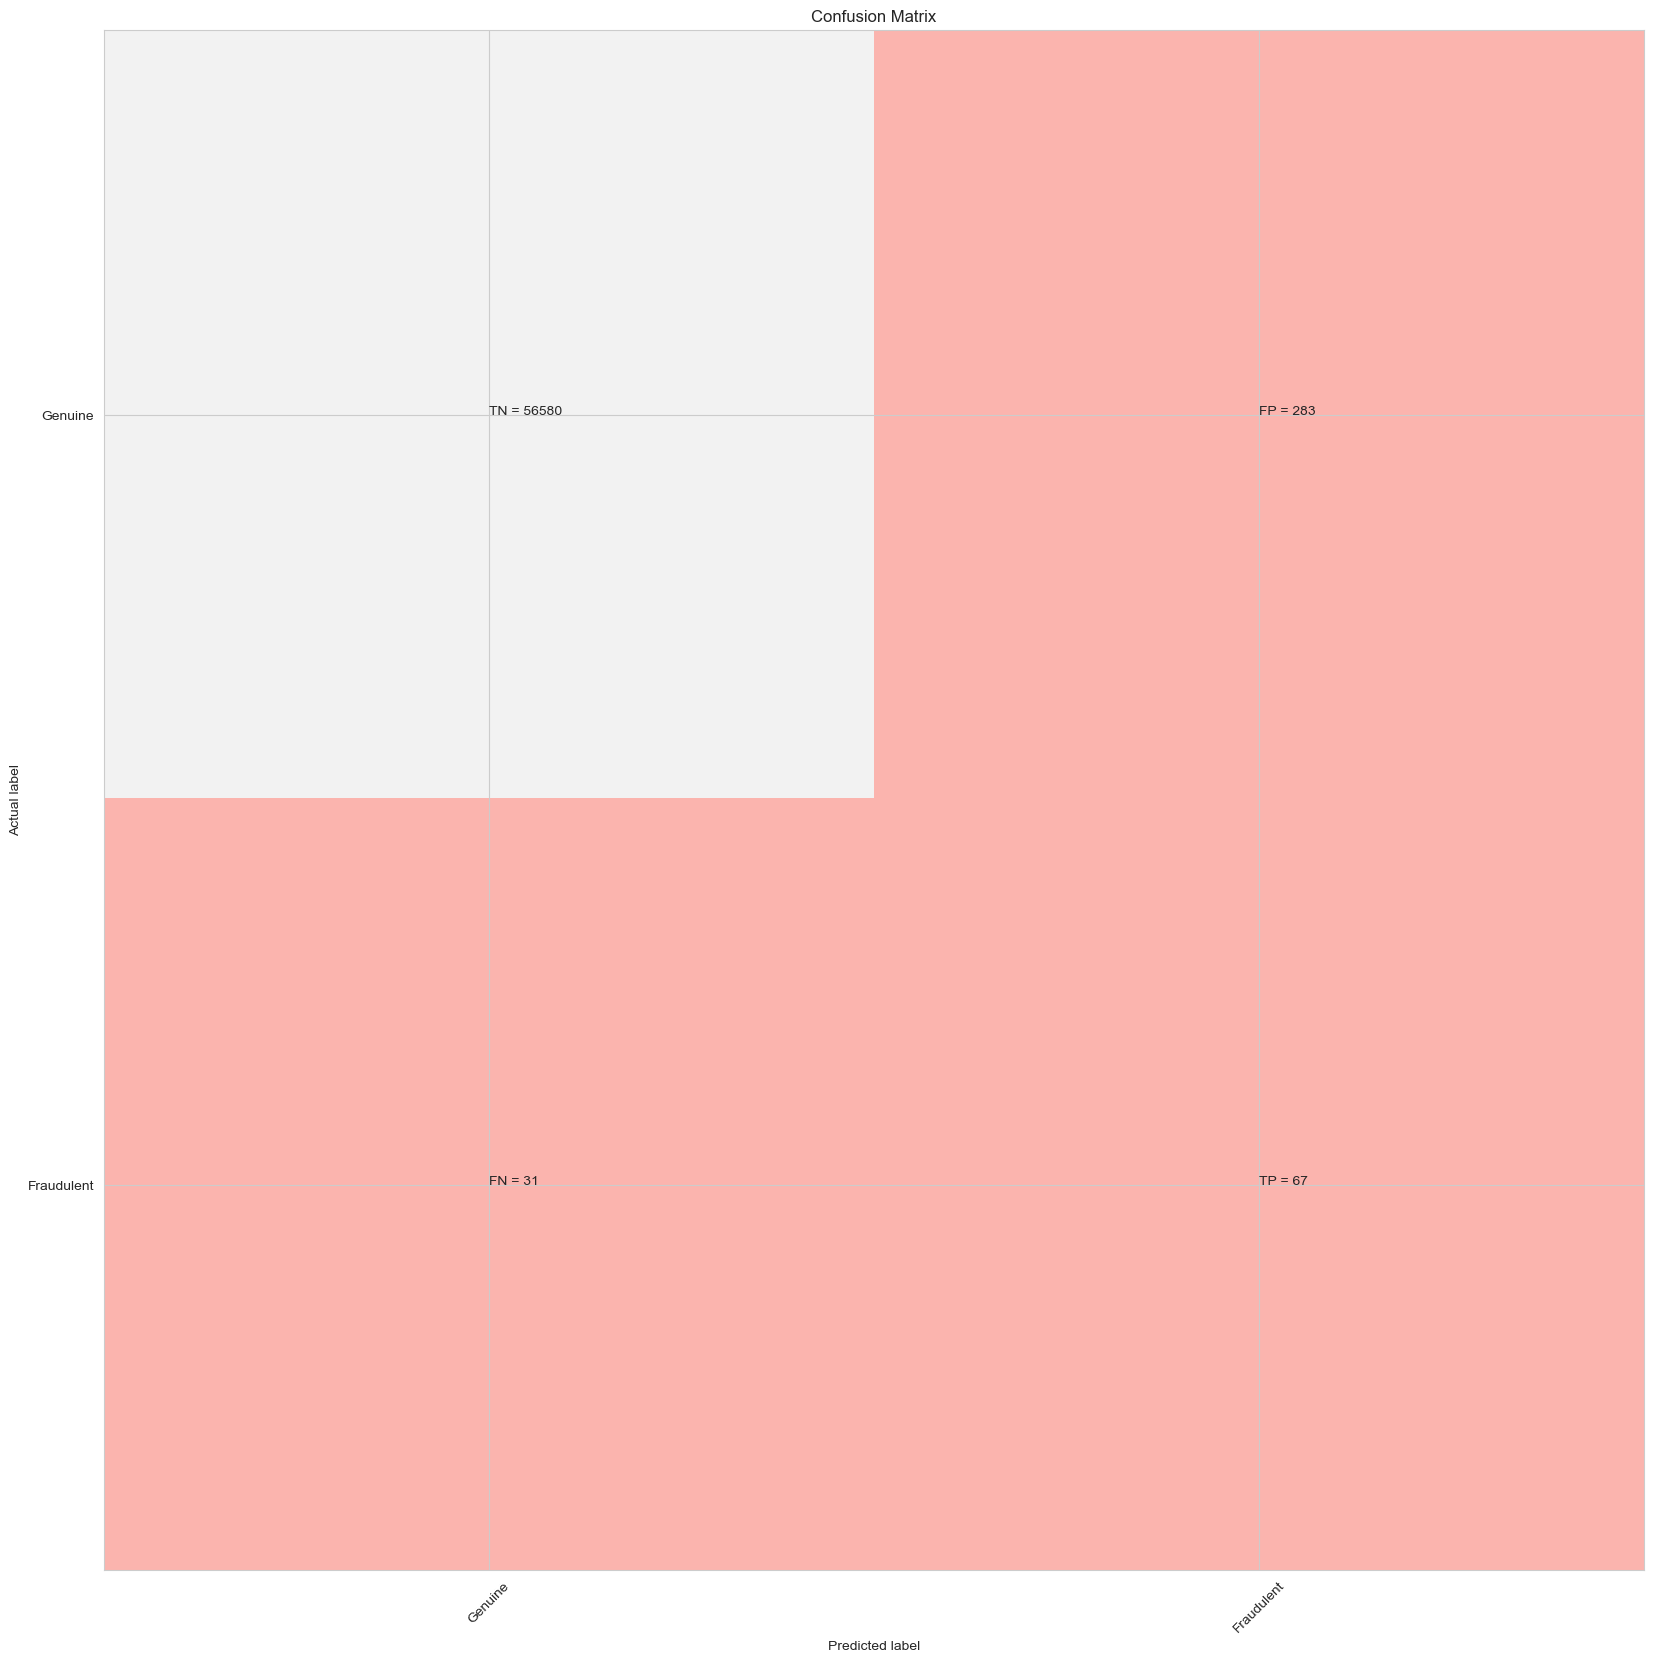

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.19      0.68      0.30        98

    accuracy                           0.99     56961
   macro avg       0.60      0.84      0.65     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc_value: 0.8450788630173417
KNN threshold: 0.4
ROC for the test dataset 84.5%


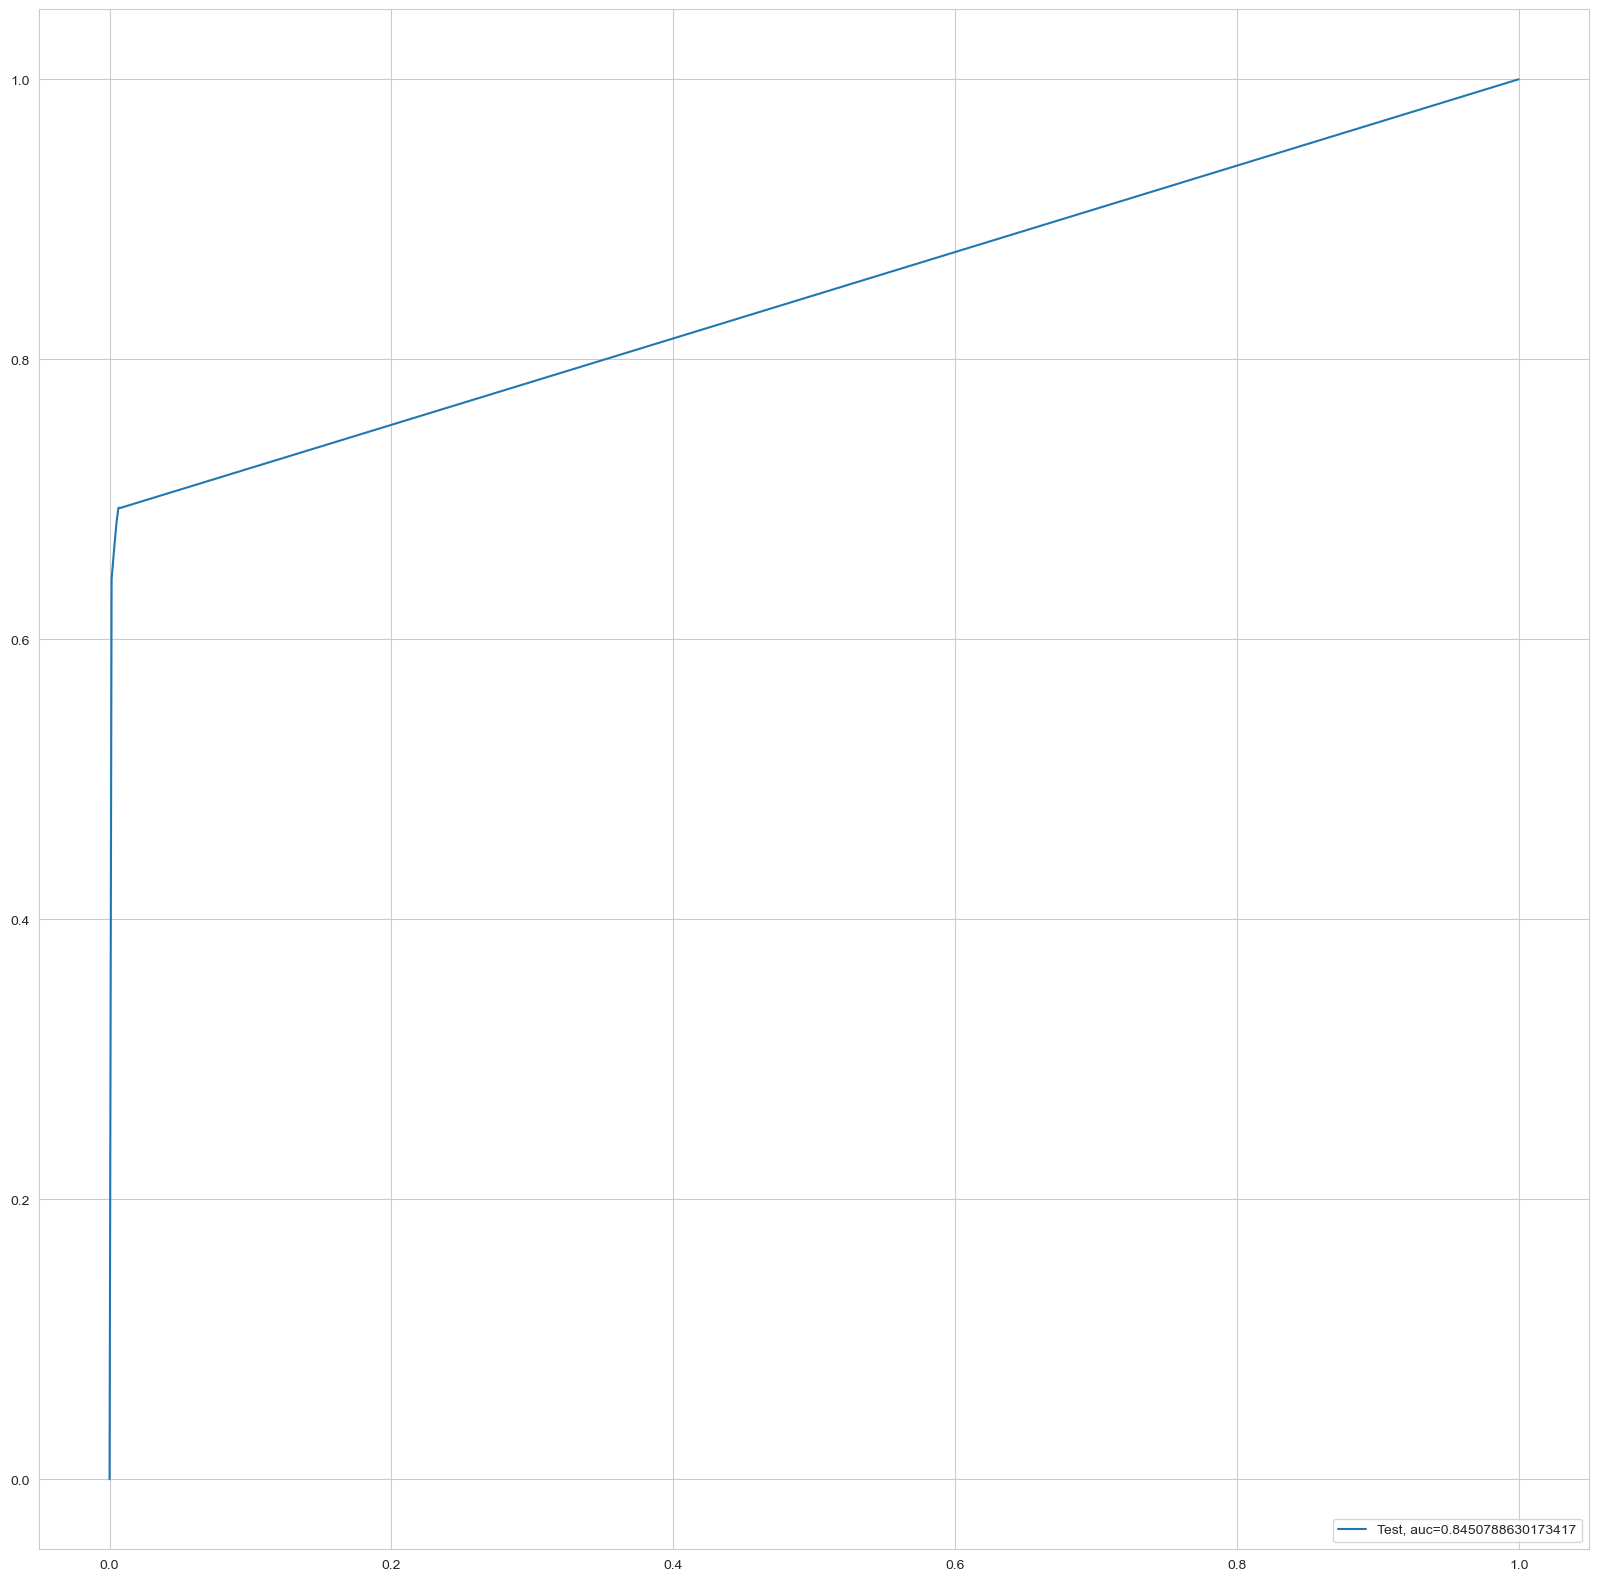

Time Elapsed: --- 15417.674664735794 seconds ---


In [100]:
#Run KNN Model - ADASYN Oversampling with StratifiedKFold CV
print("KNN Model")
start_time = time.time()
Model_Perf_Results_df = KNNModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_train_adasyn, y_train_adasyn, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

Decision Tree Models with  'gini' & 'entropy' criteria
gini score: 0.9981566334860694
Confusion Matrix


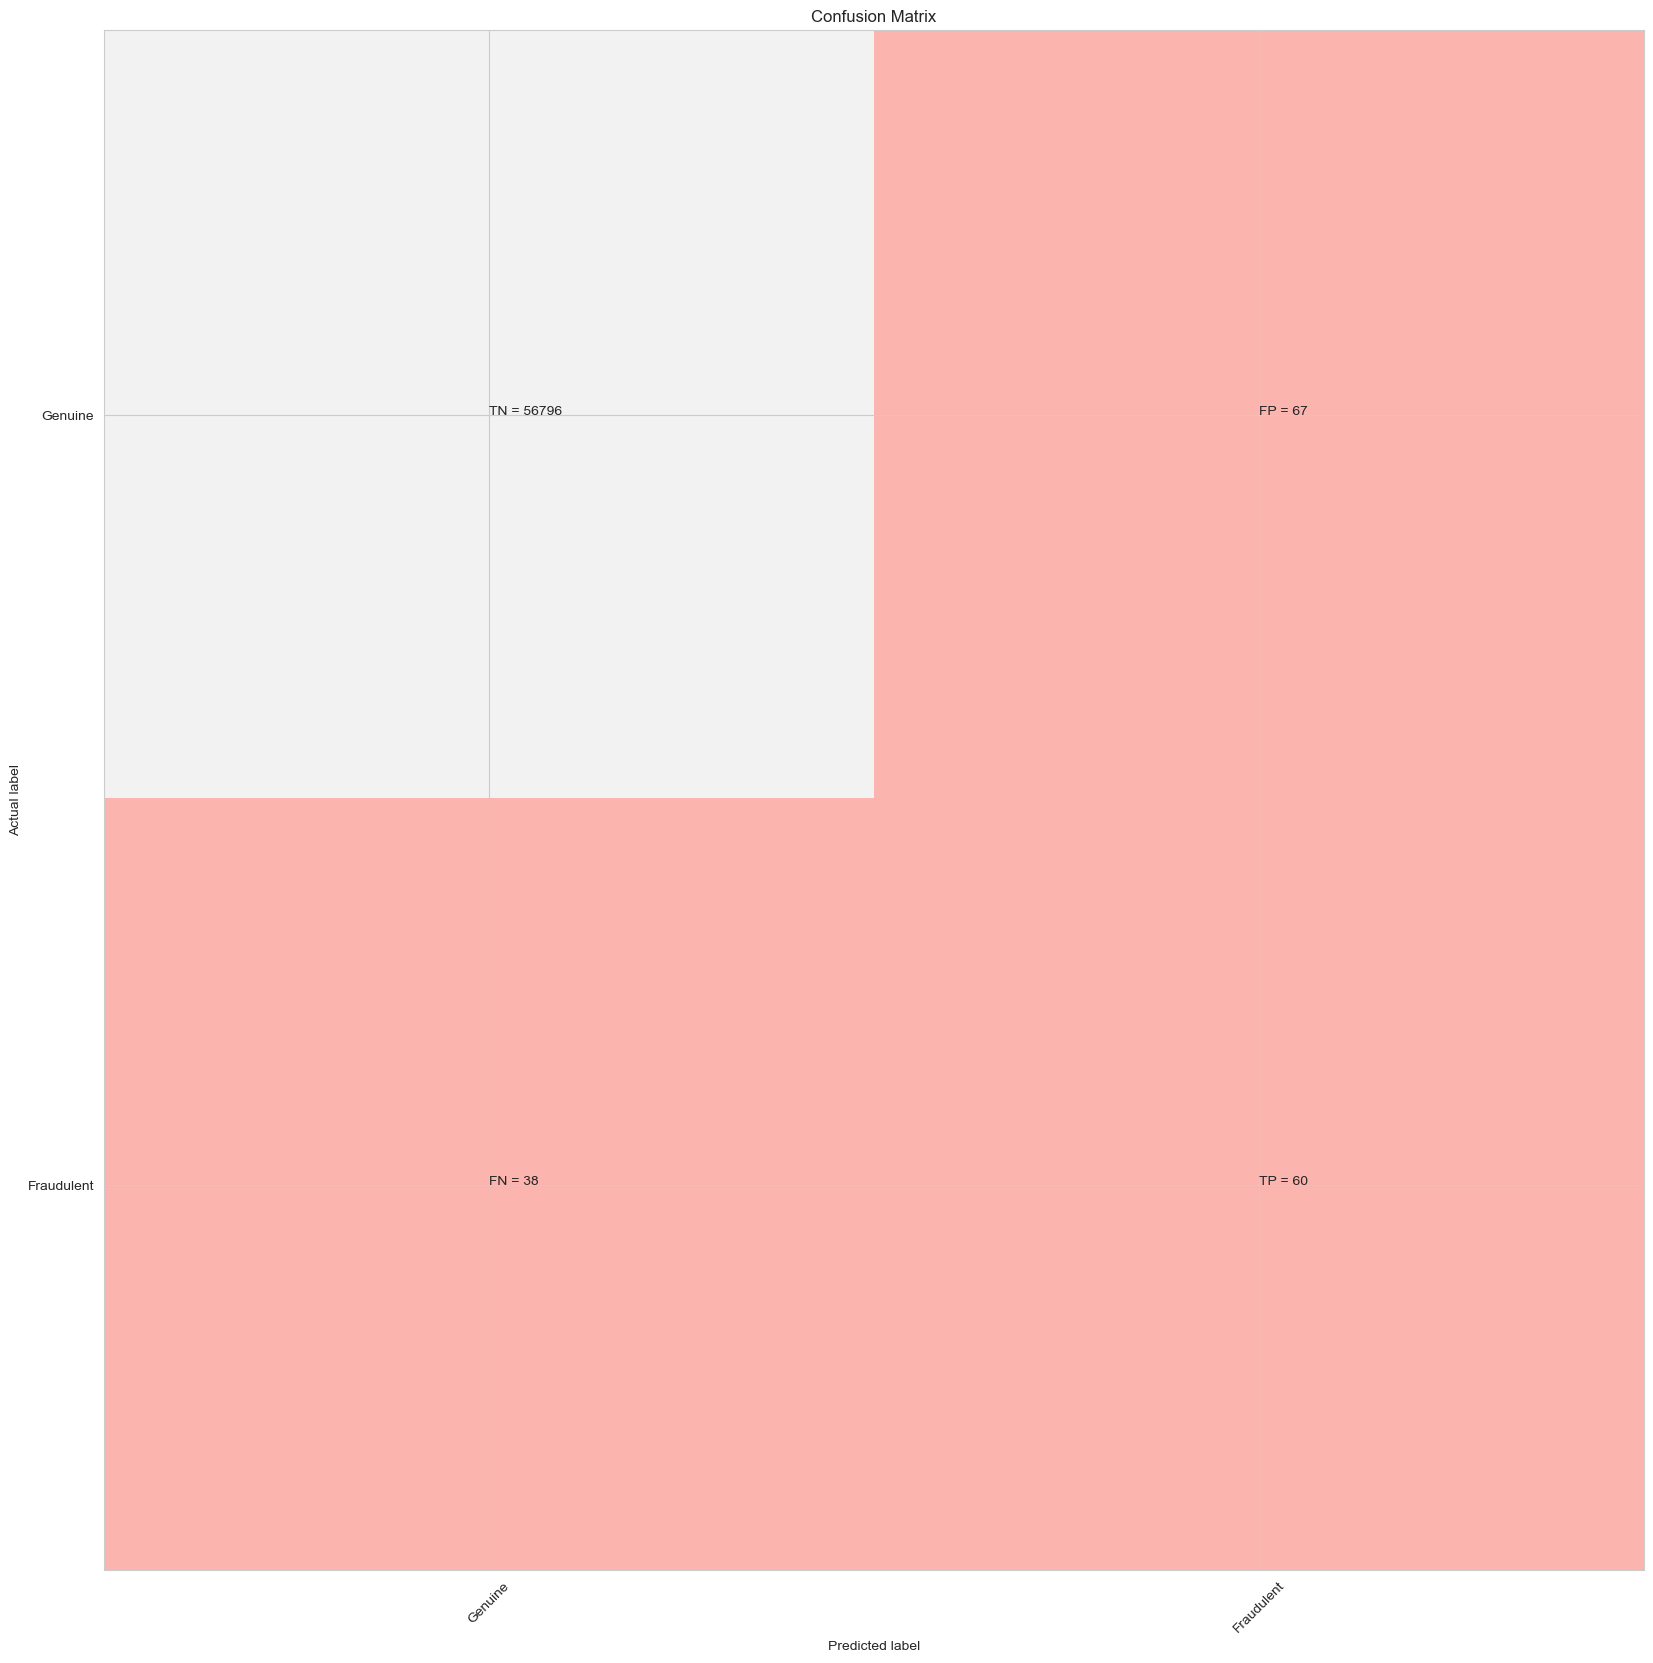

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.47      0.61      0.53        98

    accuracy                           1.00     56961
   macro avg       0.74      0.81      0.77     56961
weighted avg       1.00      1.00      1.00     56961

gini tree_roc_value: 0.8055333136895086
Tree threshold: 1.0
ROC for the test dataset 80.6%


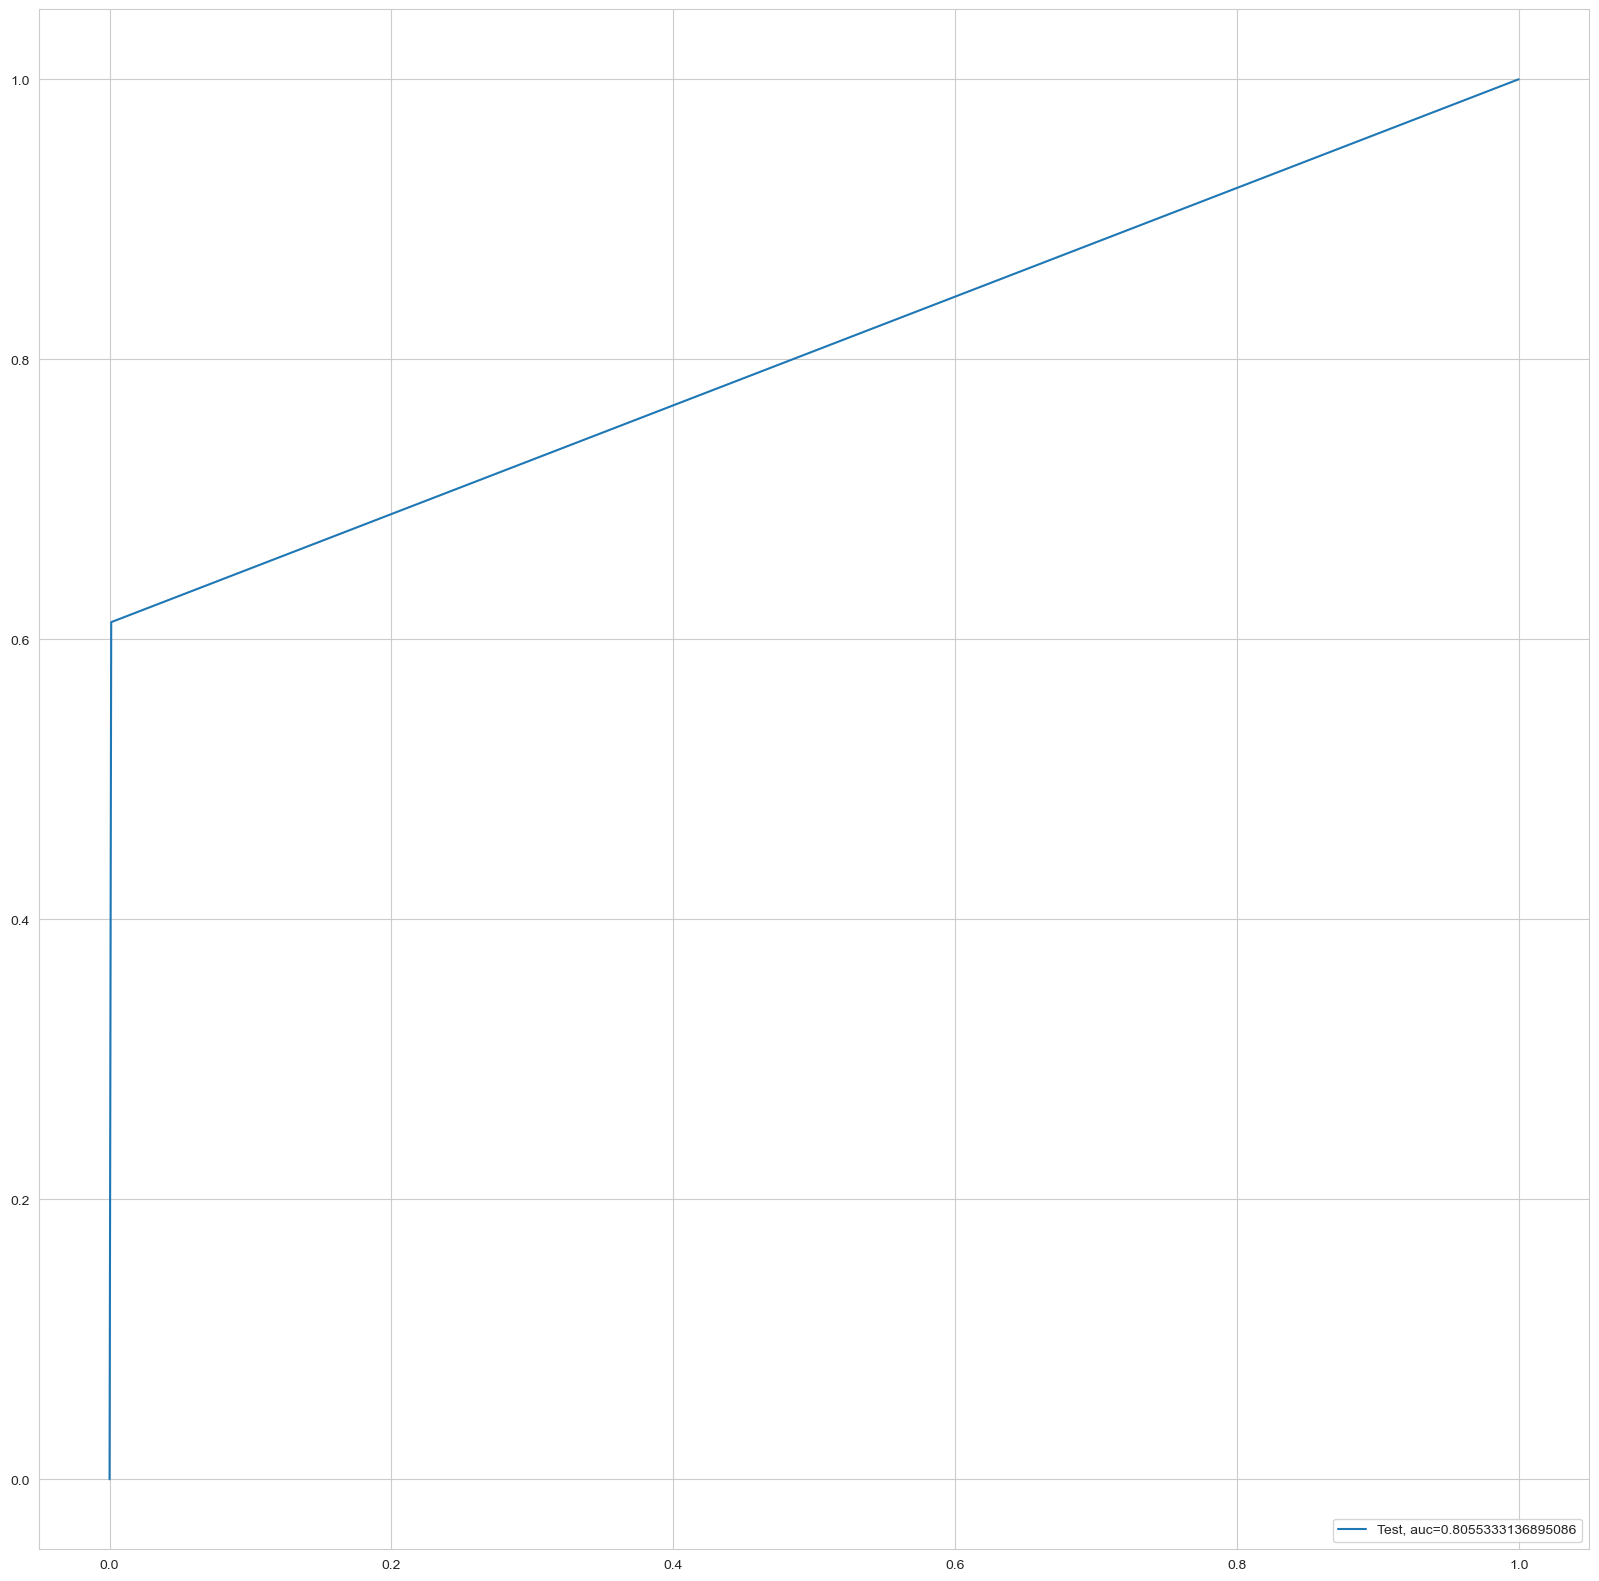

entropy score: 0.9986657537613455
Confusion Matrix


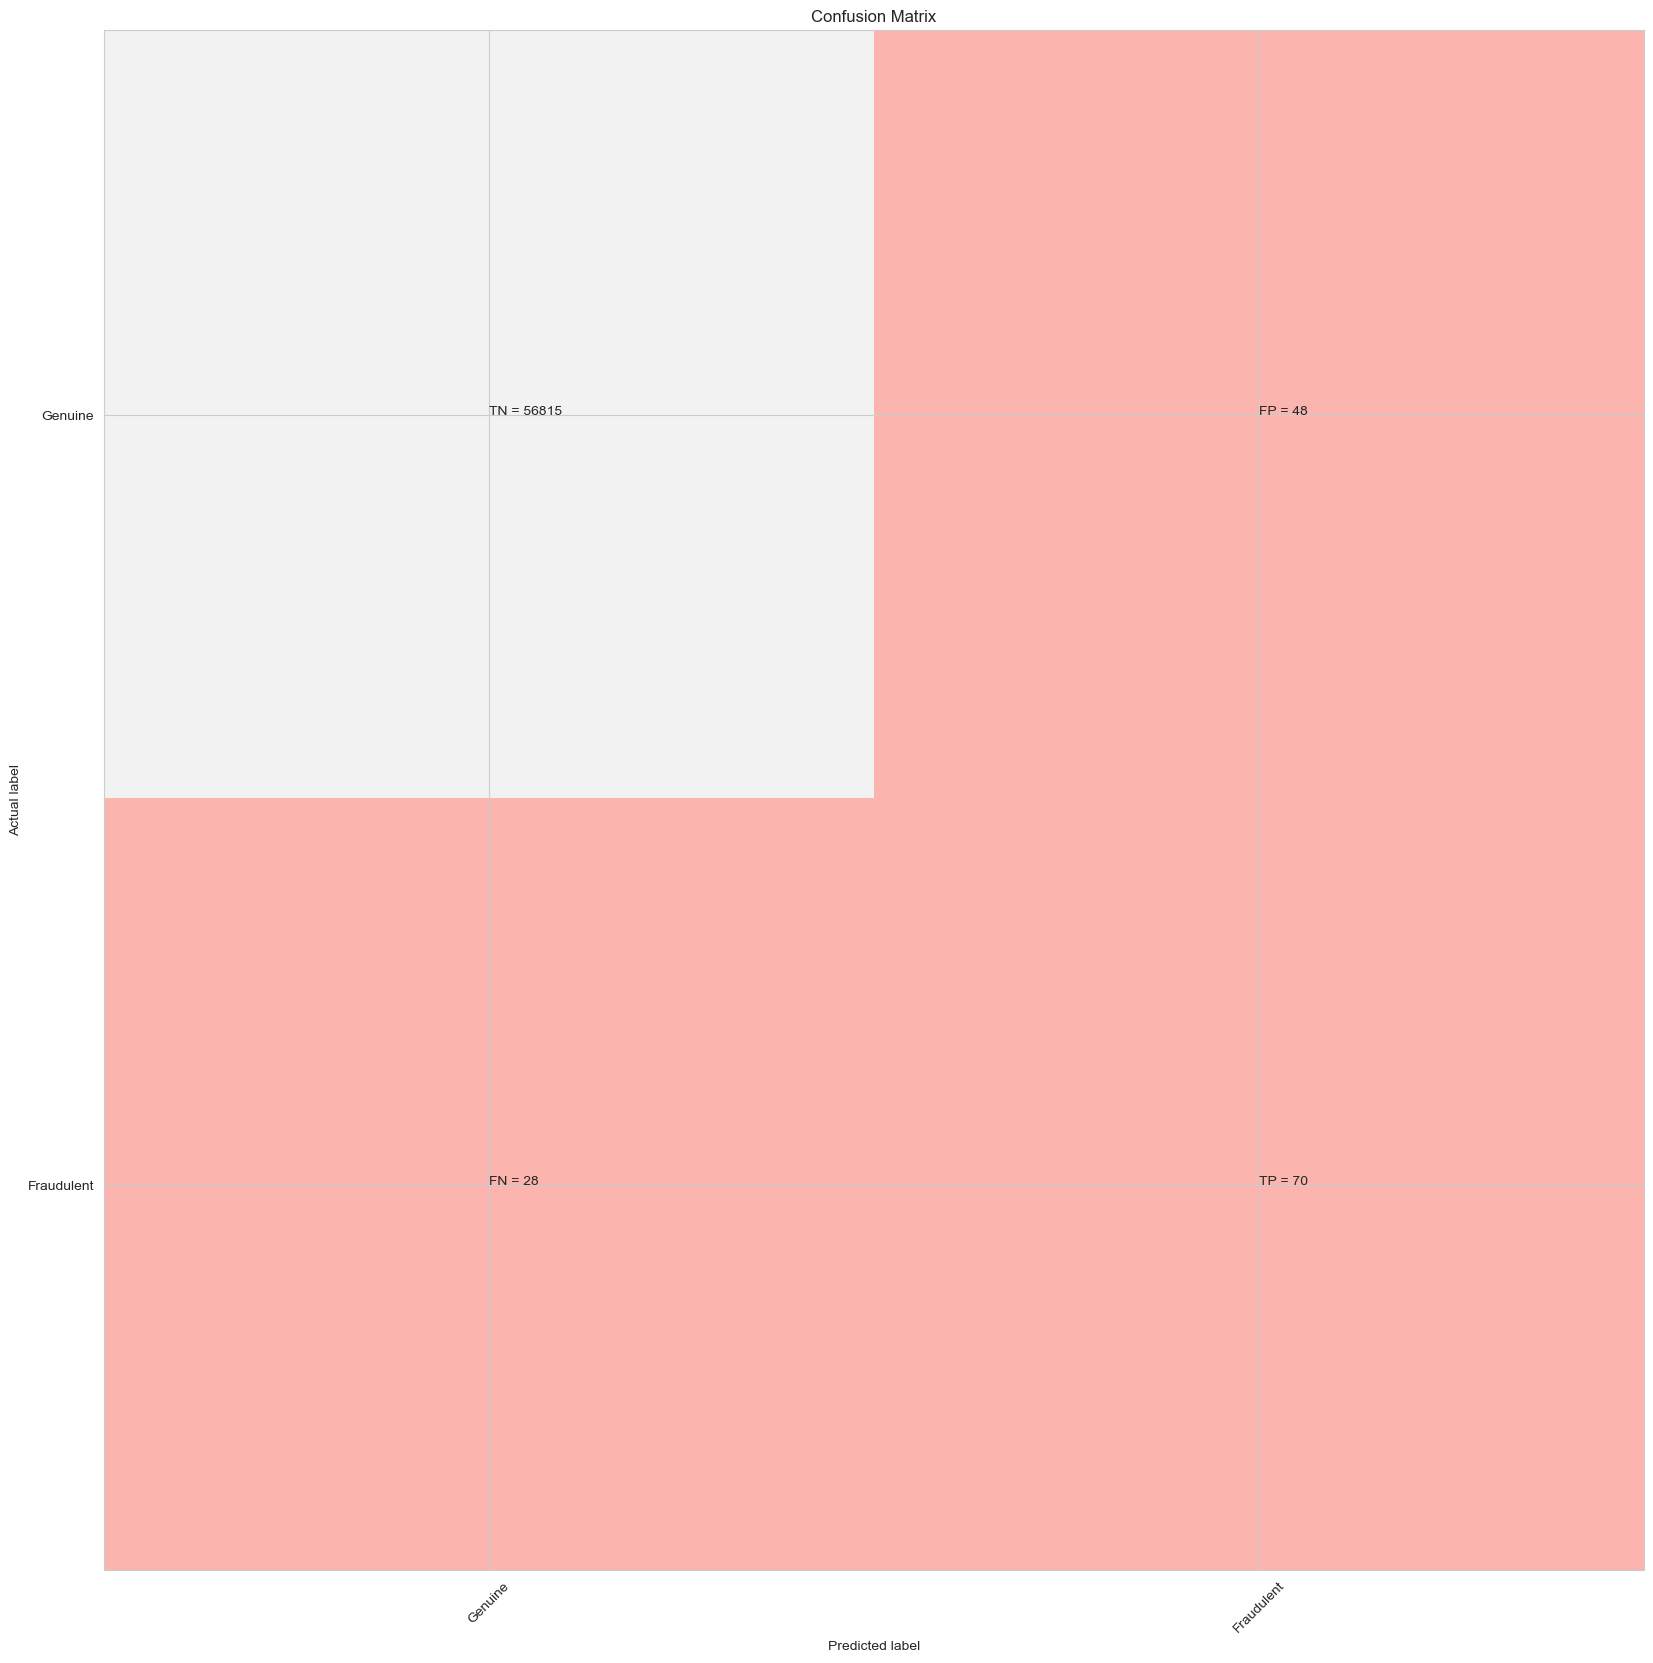

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.59      0.71      0.65        98

    accuracy                           1.00     56961
   macro avg       0.80      0.86      0.82     56961
weighted avg       1.00      1.00      1.00     56961

entropy tree_roc_value: 0.8567207900693649
Tree threshold: 1.0
ROC for the test dataset 85.7%


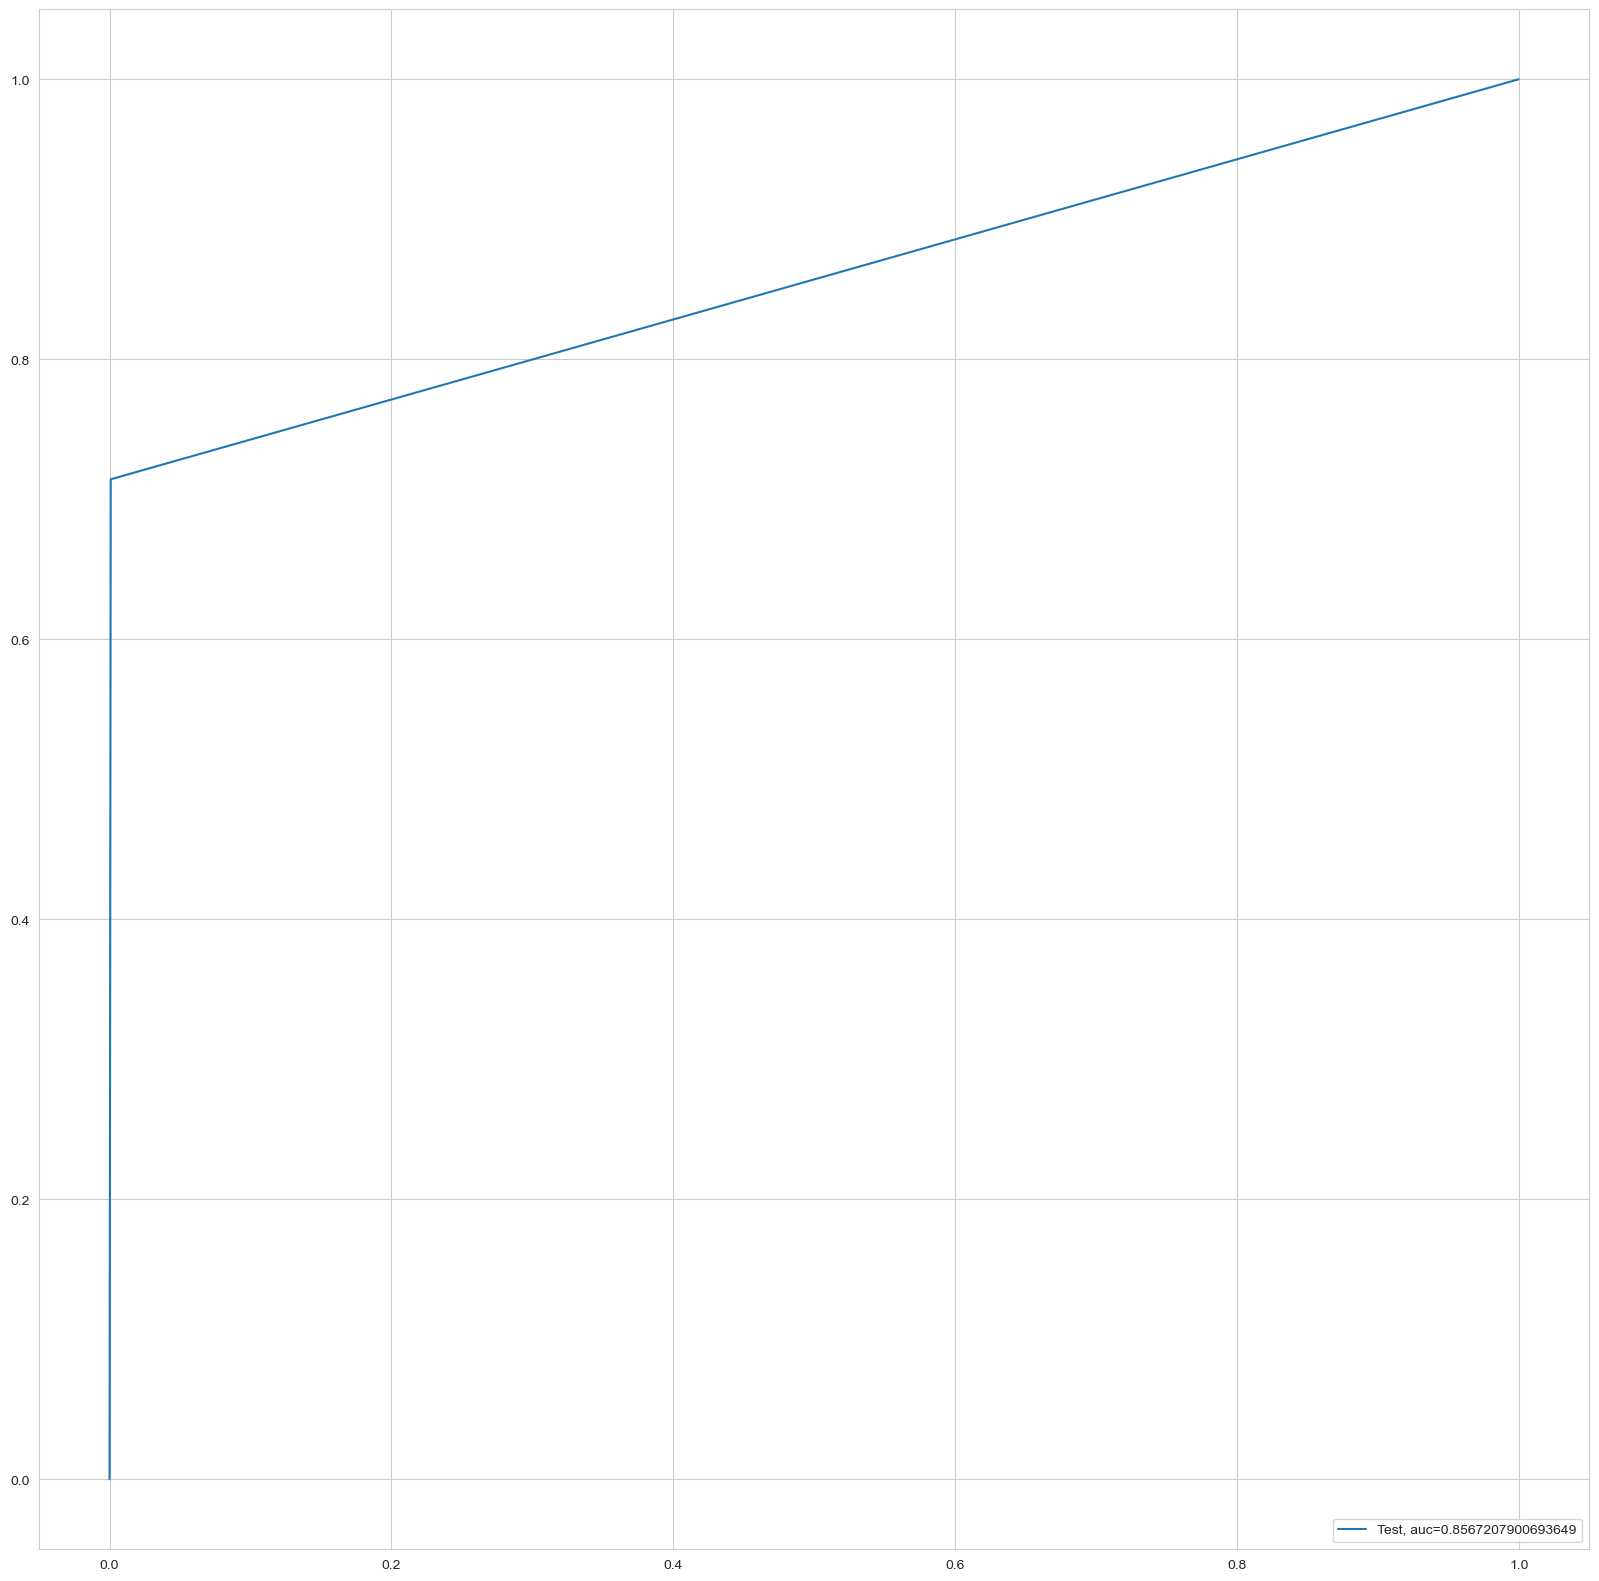

Time Elapsed: --- 1061.8729548454285 seconds ---


In [101]:
#Run Decision tree Model - ADASYN Oversampling with StratifiedKFold CV
print("Decision Tree Models with  'gini' & 'entropy' criteria")
start_time = time.time()
Model_Perf_Results_df = DecisionTreeModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_train_adasyn, y_train_adasyn, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

Random Forest Model
Model Accuracy: 0.999490879724724
Confusion Matrix


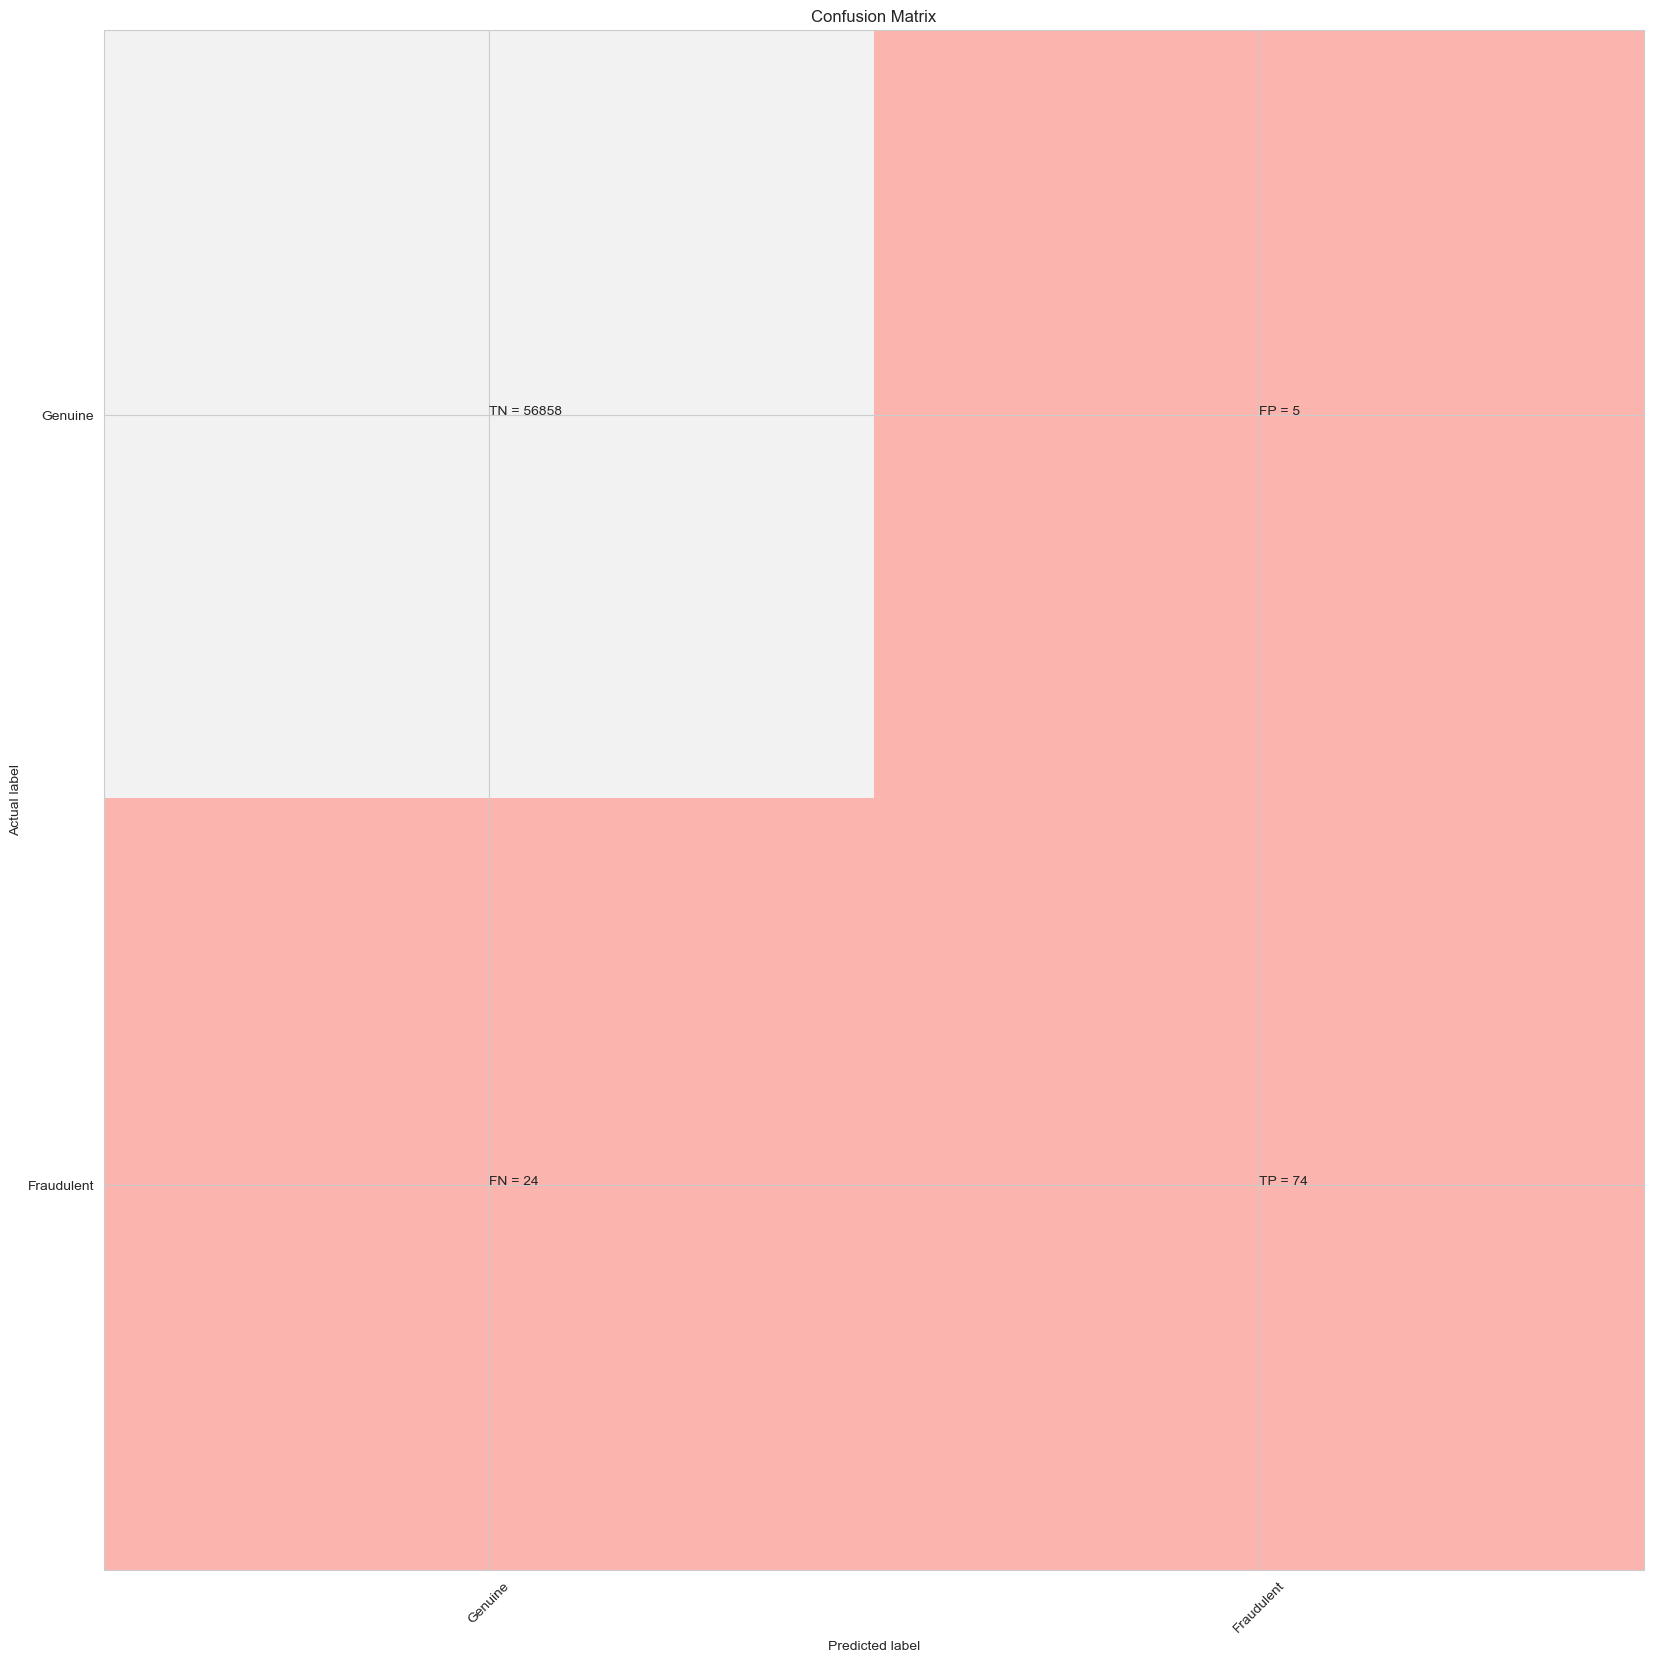

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56961
   macro avg       0.97      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value: 0.9410225866897417
Random Forest threshold: 0.04
ROC for the test dataset 94.1%


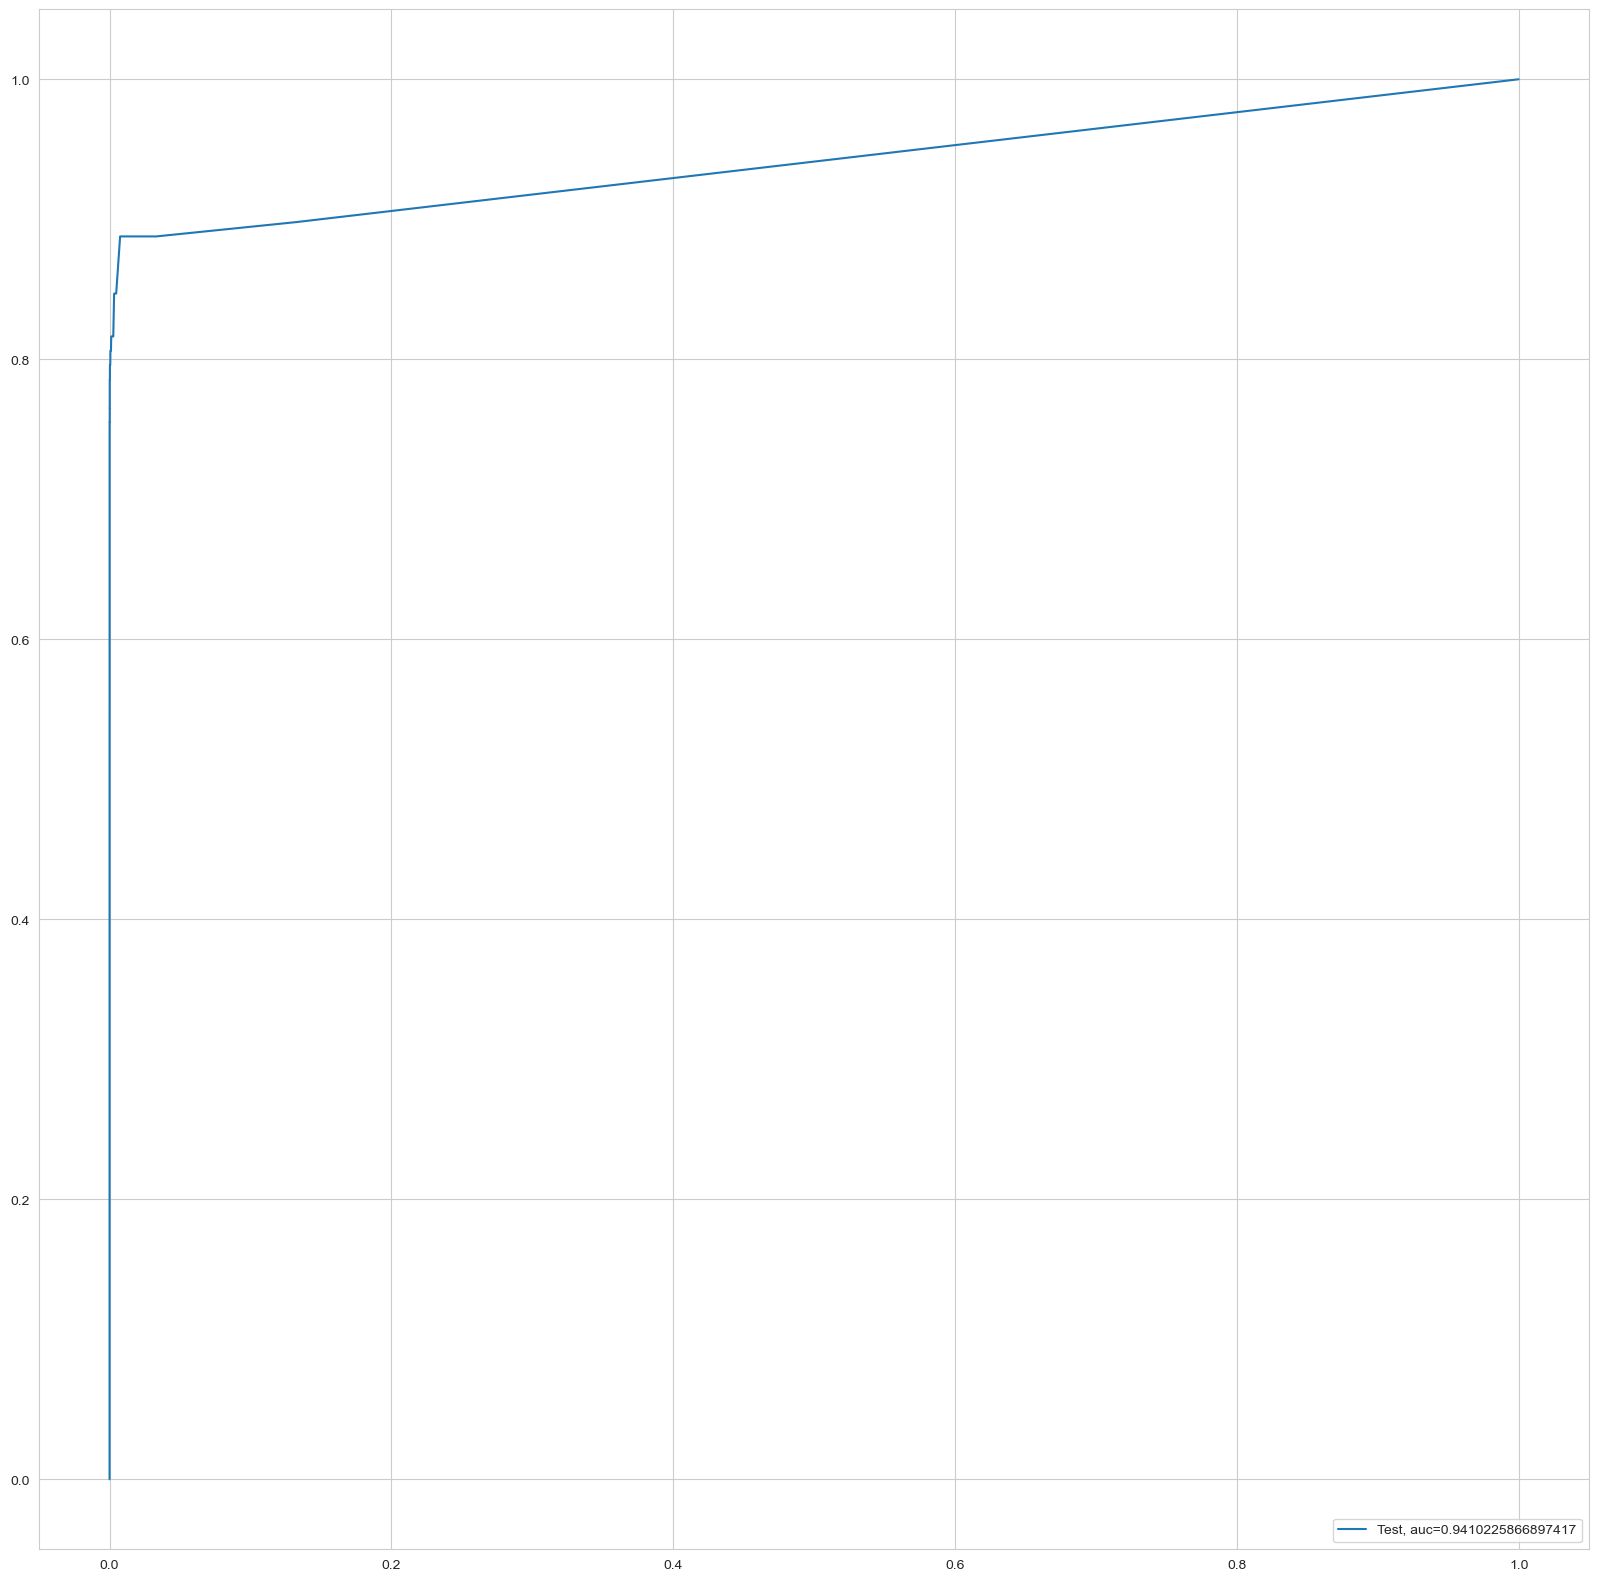

Time Elapsed: --- 2557.7176020145416 seconds ---


In [102]:
#Run Random Forest Model - ADASYN Oversampling with StratifiedKFold CV
print("Random Forest Model")
start_time = time.time()
Model_Perf_Results_df = RandomForestModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_train_adasyn, y_train_adasyn, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

XGBoost Model
[04:25:14] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9995435473394076
Confusion Matrix


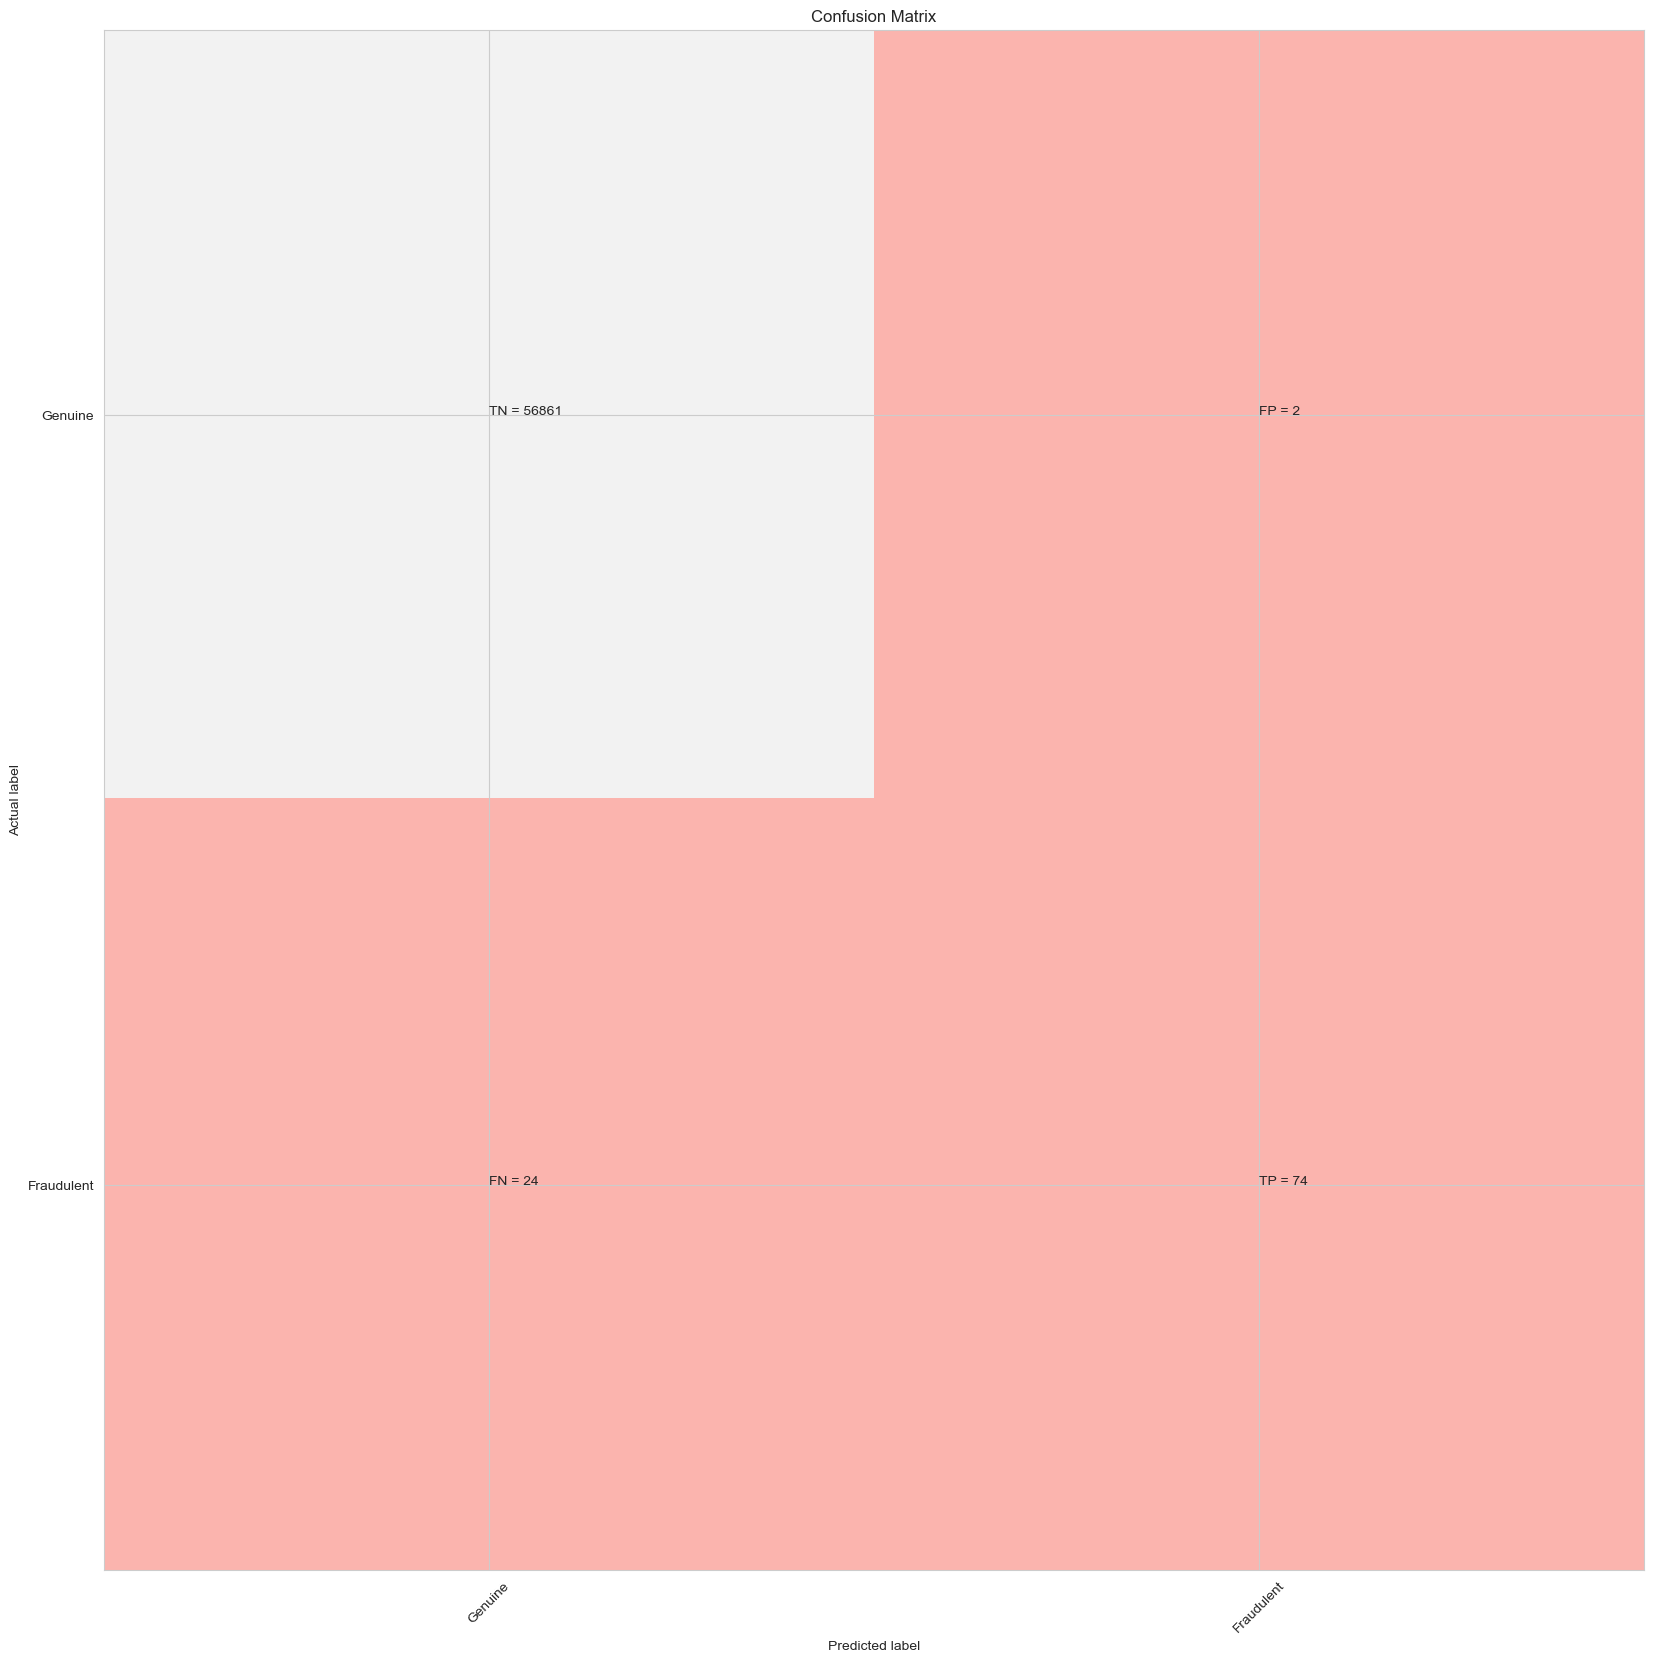

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.76      0.85        98

    accuracy                           1.00     56961
   macro avg       0.99      0.88      0.93     56961
weighted avg       1.00      1.00      1.00     56961

XGboost roc_value: 0.9715399023862221
XGBoost threshold: 0.00035650437348522246
ROC for the test dataset 97.2%


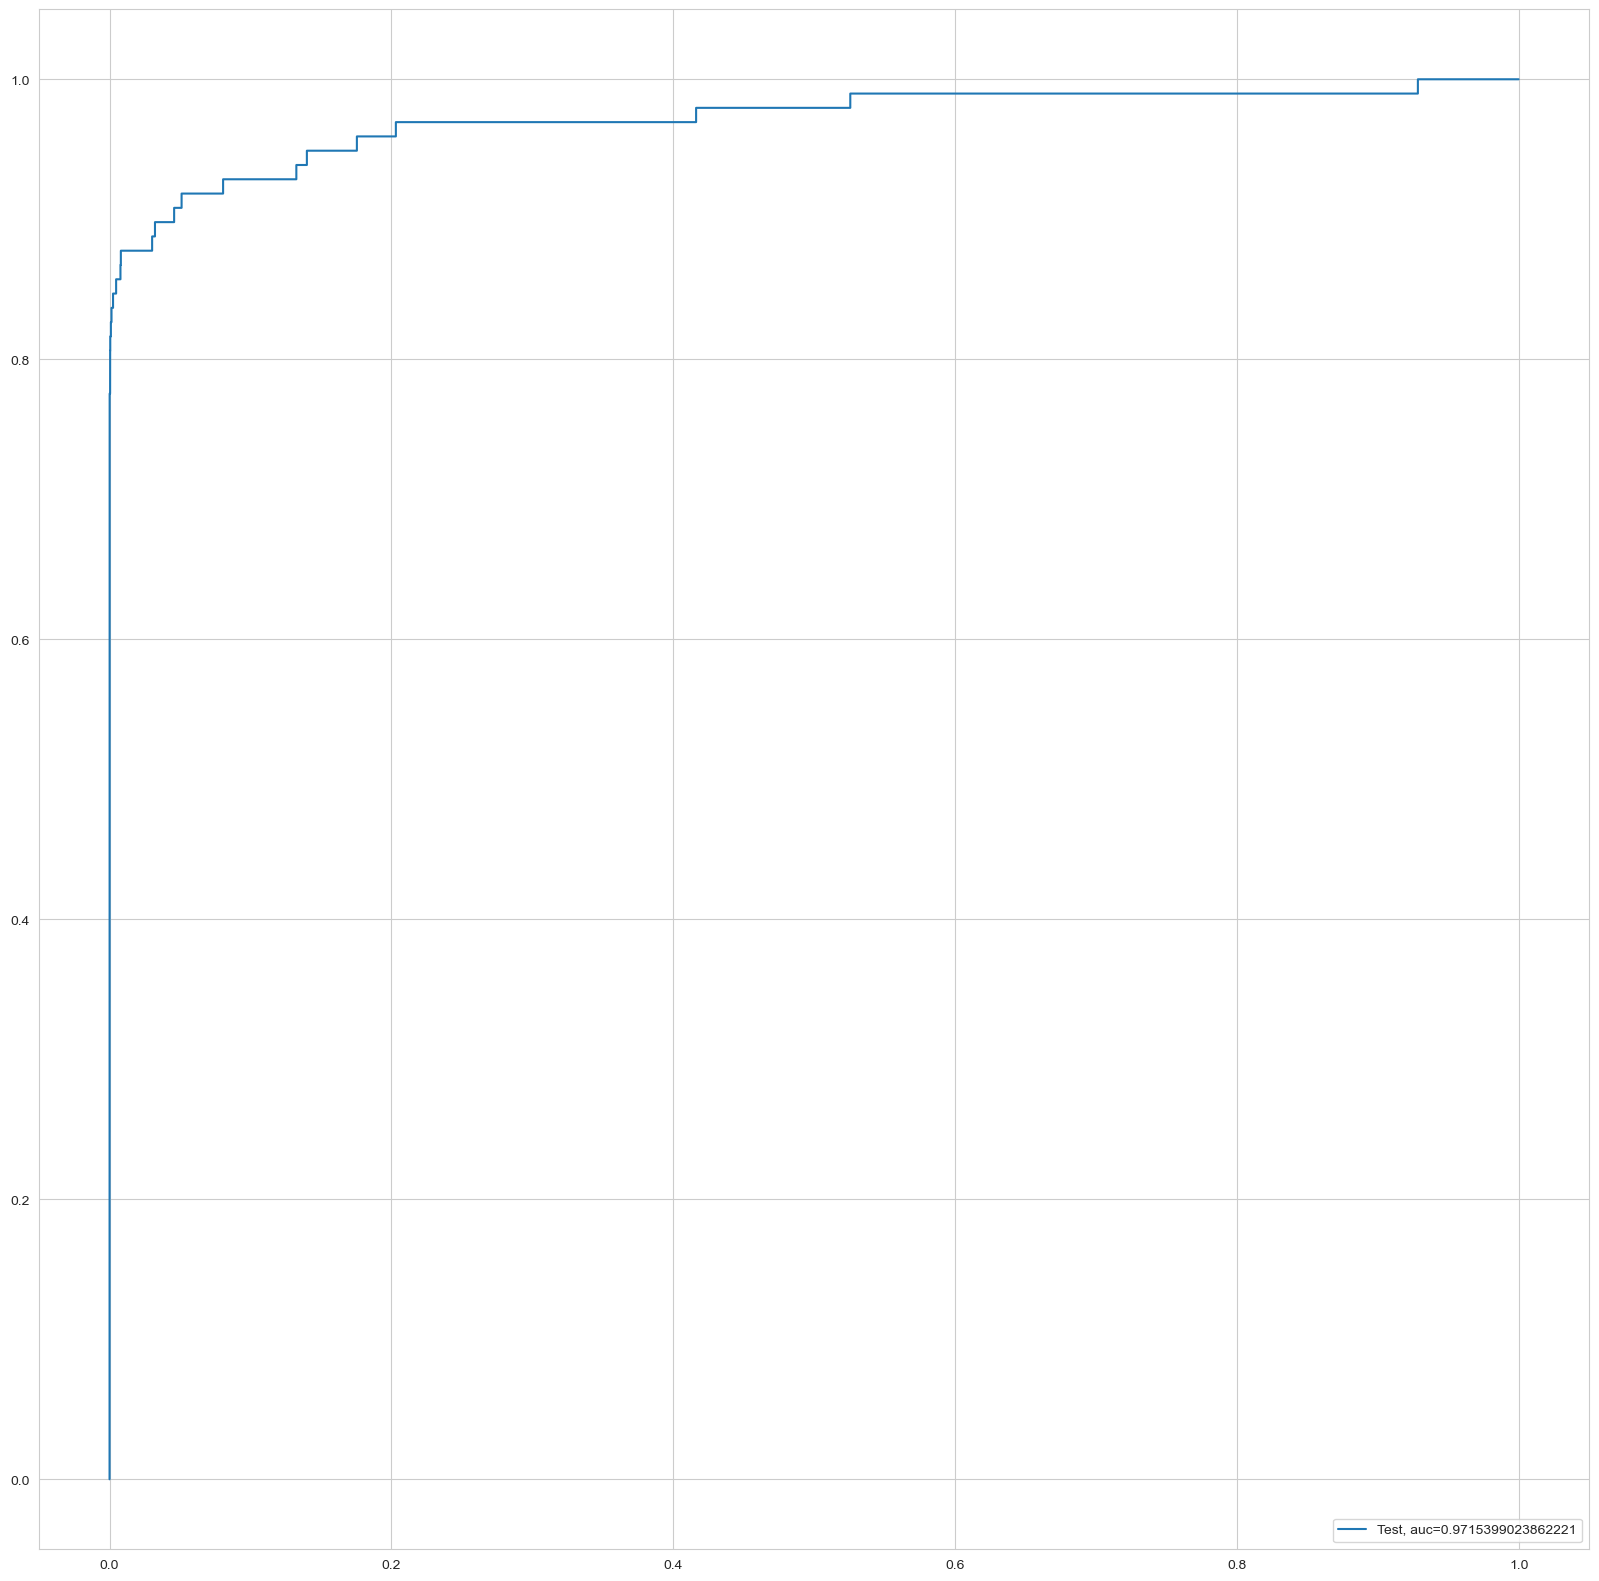

Time Elapsed: --- 294.9398798942566 seconds ---


In [103]:
#Run XGBoost Model - ADASYN Oversampling with StratifiedKFold CV
print("XGBoost Model")
start_time = time.time()
Model_Perf_Results_df = XGBoostModels(Model_Perf_Results_df, Data_Imbalance_Handiling, X_train_adasyn, y_train_adasyn, X_test, y_test)
print("Time Elapsed: --- %s seconds ---" % (time.time() - start_time))

In [104]:
Model_Perf_Results_df

Data_Imbalance_Handling_Process  \
0                              Power Transformer   
1                              Power Transformer   
2                              Power Transformer   
3                              Power Transformer   
4                              Power Transformer   
5                              Power Transformer   
6                              Power Transformer   
7                              Power Transformer   
8                 RepeatedKFold Cross Validation   
9                 RepeatedKFold Cross Validation   
10                RepeatedKFold Cross Validation   
11                RepeatedKFold Cross Validation   
12                RepeatedKFold Cross Validation   
13                RepeatedKFold Cross Validation   
14                RepeatedKFold Cross Validation   
15                RepeatedKFold Cross Validation   
16              StratifiedKFold Cross Validation   
17              StratifiedKFold Cross Validation   
18              StratifiedKFold Cross Validation   
19              StratifiedKFold Cross Validation   
20              StratifiedKFold Cross Validation   
21              StratifiedKFold Cross Validation   
22              StratifiedKFold Cross Validation   
23              StratifiedKFold Cross Validation   
24                          Random Undersampling   
25                          Random Undersampling   
26                          Random Undersampling   
27                          Random Undersampling   
28                          Random Undersampling   
29                          Random Undersampling   
30                          Random Undersampling   
31                          Random Undersampling   
32  Random Oversampling with StratifiedKFold CV    
33  Random Oversampling with StratifiedKFold CV    
34  Random Oversampling with StratifiedKFold CV    
35  Random Oversampling with StratifiedKFold CV    
36  Random Oversampling with StratifiedKFold CV    
37  Random Oversampling with StratifiedKFold CV    
38  Random Oversampling with StratifiedKFold CV    
39   SMOTE Oversampling with StratifiedKFold CV    
40   SMOTE Oversampling with StratifiedKFold CV    
41   SMOTE Oversampling with StratifiedKFold CV    
42   SMOTE Oversampling with StratifiedKFold CV    
43   SMOTE Oversampling with StratifiedKFold CV    
44   SMOTE Oversampling with StratifiedKFold CV    
45   SMOTE Oversampling with StratifiedKFold CV    
46  ADASYN Oversampling with StratifiedKFold CV    
47  ADASYN Oversampling with StratifiedKFold CV    
48  ADASYN Oversampling with StratifiedKFold CV    
49  ADASYN Oversampling with StratifiedKFold CV    
50  ADASYN Oversampling with StratifiedKFold CV    
51  ADASYN Oversampling with StratifiedKFold CV    
52  ADASYN Oversampling with StratifiedKFold CV    

                                         Model  Accuracy  ROC_Value  Threshold  
0   Logistic Regression with L2 Regularisation  0.999228   0.985101   0.002730  
1   Logistic Regression with L1 Regularisation  0.999204   0.988625   0.007539  
2                                          KNN  0.999450   0.937369   0.200000  
3                                          SVM  0.998853   0.889853   0.000849  
4                Tree Model with gini criteria  0.999228   0.900507   1.000000  
5             Tree Model with entropy criteria  0.999216   0.889489   1.000000  
6                                Random Forest  0.999602   0.954549   0.020000  
7                                      XGBoost  0.999661   0.985249   0.000476  
8   Logistic Regression with L2 Regularisation  0.999175   0.972154   0.002105  
9   Logistic Regression with L1 Regularisation  0.999228   0.887823   0.037429  
10                                         KNN  0.999298   0.841574   0.200000  
11                                         SVM  0.998666   0.485525   0.001828  
12               Tree Model with gini criteria  0.999210   0.885839   1.000000  
13            Tree Model with entropy criteria  0.999368   0.892238   1.00

#### After execution with various sampling techniques, we'll select XGBoost as the best performing model

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [105]:
XGBmodel = XGBClassifier(random_state=42)
XGBmodel.fit(X_over, y_over)

XGB_test_score = XGBmodel.score(X_test, y_test)
print('Model Accuracy: {0}'.format(XGB_test_score))

# Probabilities for each class
XGB_probs = XGBmodel.predict_proba(X_test)[:, 1]

# Calculate roc auc
XGB_roc_value = roc_auc_score(y_test, XGB_probs)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, XGB_probs)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))

[04:30:09] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Accuracy: 0.9994733238531627
XGboost roc_value: 0.977353014962206
XGBoost threshold: 0.00016610132297500968


In [106]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
              'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[04:30:30] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:30:41] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:30:53] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with t

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=No

In [107]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      67.724855     79.905640         0.103193        0.007663   
1     143.940557    181.855002         0.091774        0.003787   
2     103.228209    121.160802         0.090854        0.007718   
3     310.512578    424.144140         0.089228        0.004622   
4     316.268047    425.490729         0.096817        0.011929   
5      98.367360    114.260480         0.092010        0.004590   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.993142   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.991627   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.993179   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.994827   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.993312   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.993535   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.981172           0.994463         0.989593        0.005979   
1           0.981200           0.994701         0.989176        0.005778   
2           0.976916           0.992748         0.987614        0.007567   
3           0.981377           0.996925         0.991043        0.006889   
4           0.981512           0.997392         0.990738        0.006734   
5           0.972895           0.994763         0.987064        0.010032   

   rank_test_score  split0_train_score  split1_train_score  \
0                3            0.999963            0.999894   
1                4            0.999960            0.999878   
2                5            0.999962            0.999879   
3                1            1.000000            0.999998   
4                2            1.000000            0.999997   
5                6            1.000000            0.999998   

   split2_train_score  mean_train_score  std_train_score  
0            0.999812          0.999890         0.000062  
1            0.999822          0.999887         0.000057  
2            0.999817          0.999886         0.000059  
3            0.999992          0.999996         0.000004  
4            0.999995          0.999997         0.000002  
5            0.999994          0.999997         0.000003

In [108]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9910431134740186
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.3,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [109]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [110]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

[05:22:52] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:22:53] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [111]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227452
           1       1.00      1.00      1.00    227423

    accuracy                           1.00    454875
   macro avg       1.00      1.00      1.00    454875
weighted avg       1.00      1.00      1.00    454875



XGboost roc_value: 1.0
XGBoost threshold: 0.7220565676689148
ROC for the test dataset 100.0%


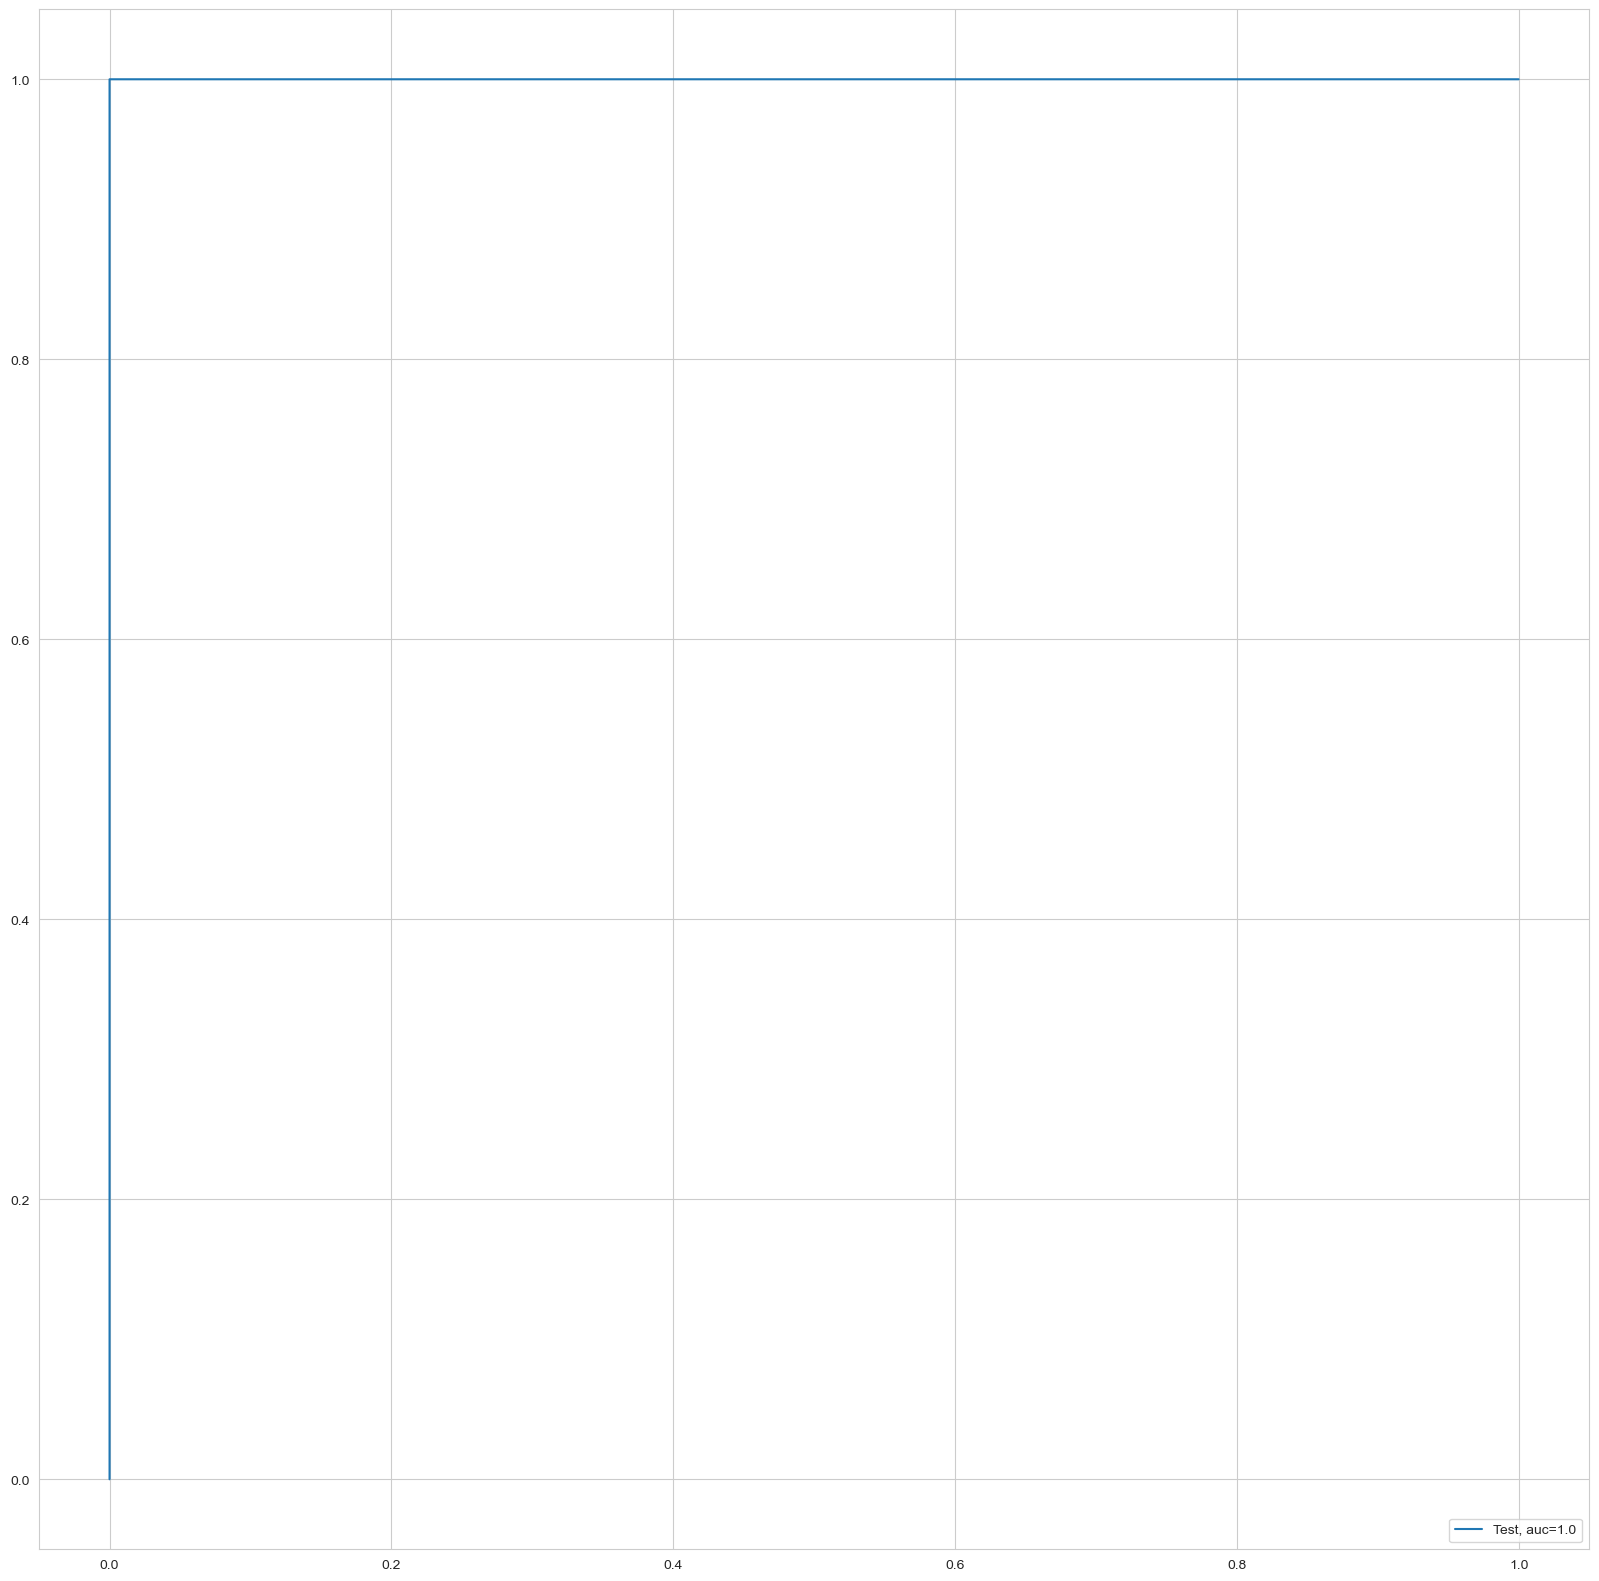

In [112]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
XGB_roc_value = roc_auc_score(y_train_adasyn, y_train_pred_proba)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [113]:
y_test_pred = xgb_adasyn_model.predict(X_test)
# Printing the scores
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.97      0.76      0.85        98

    accuracy                           1.00     56961
   macro avg       0.99      0.88      0.93     56961
weighted avg       1.00      1.00      1.00     56961



XGboost roc_value: 0.9715399023862221
XGBoost threshold: 0.00035650437348522246
ROC for the test dataset 97.2%


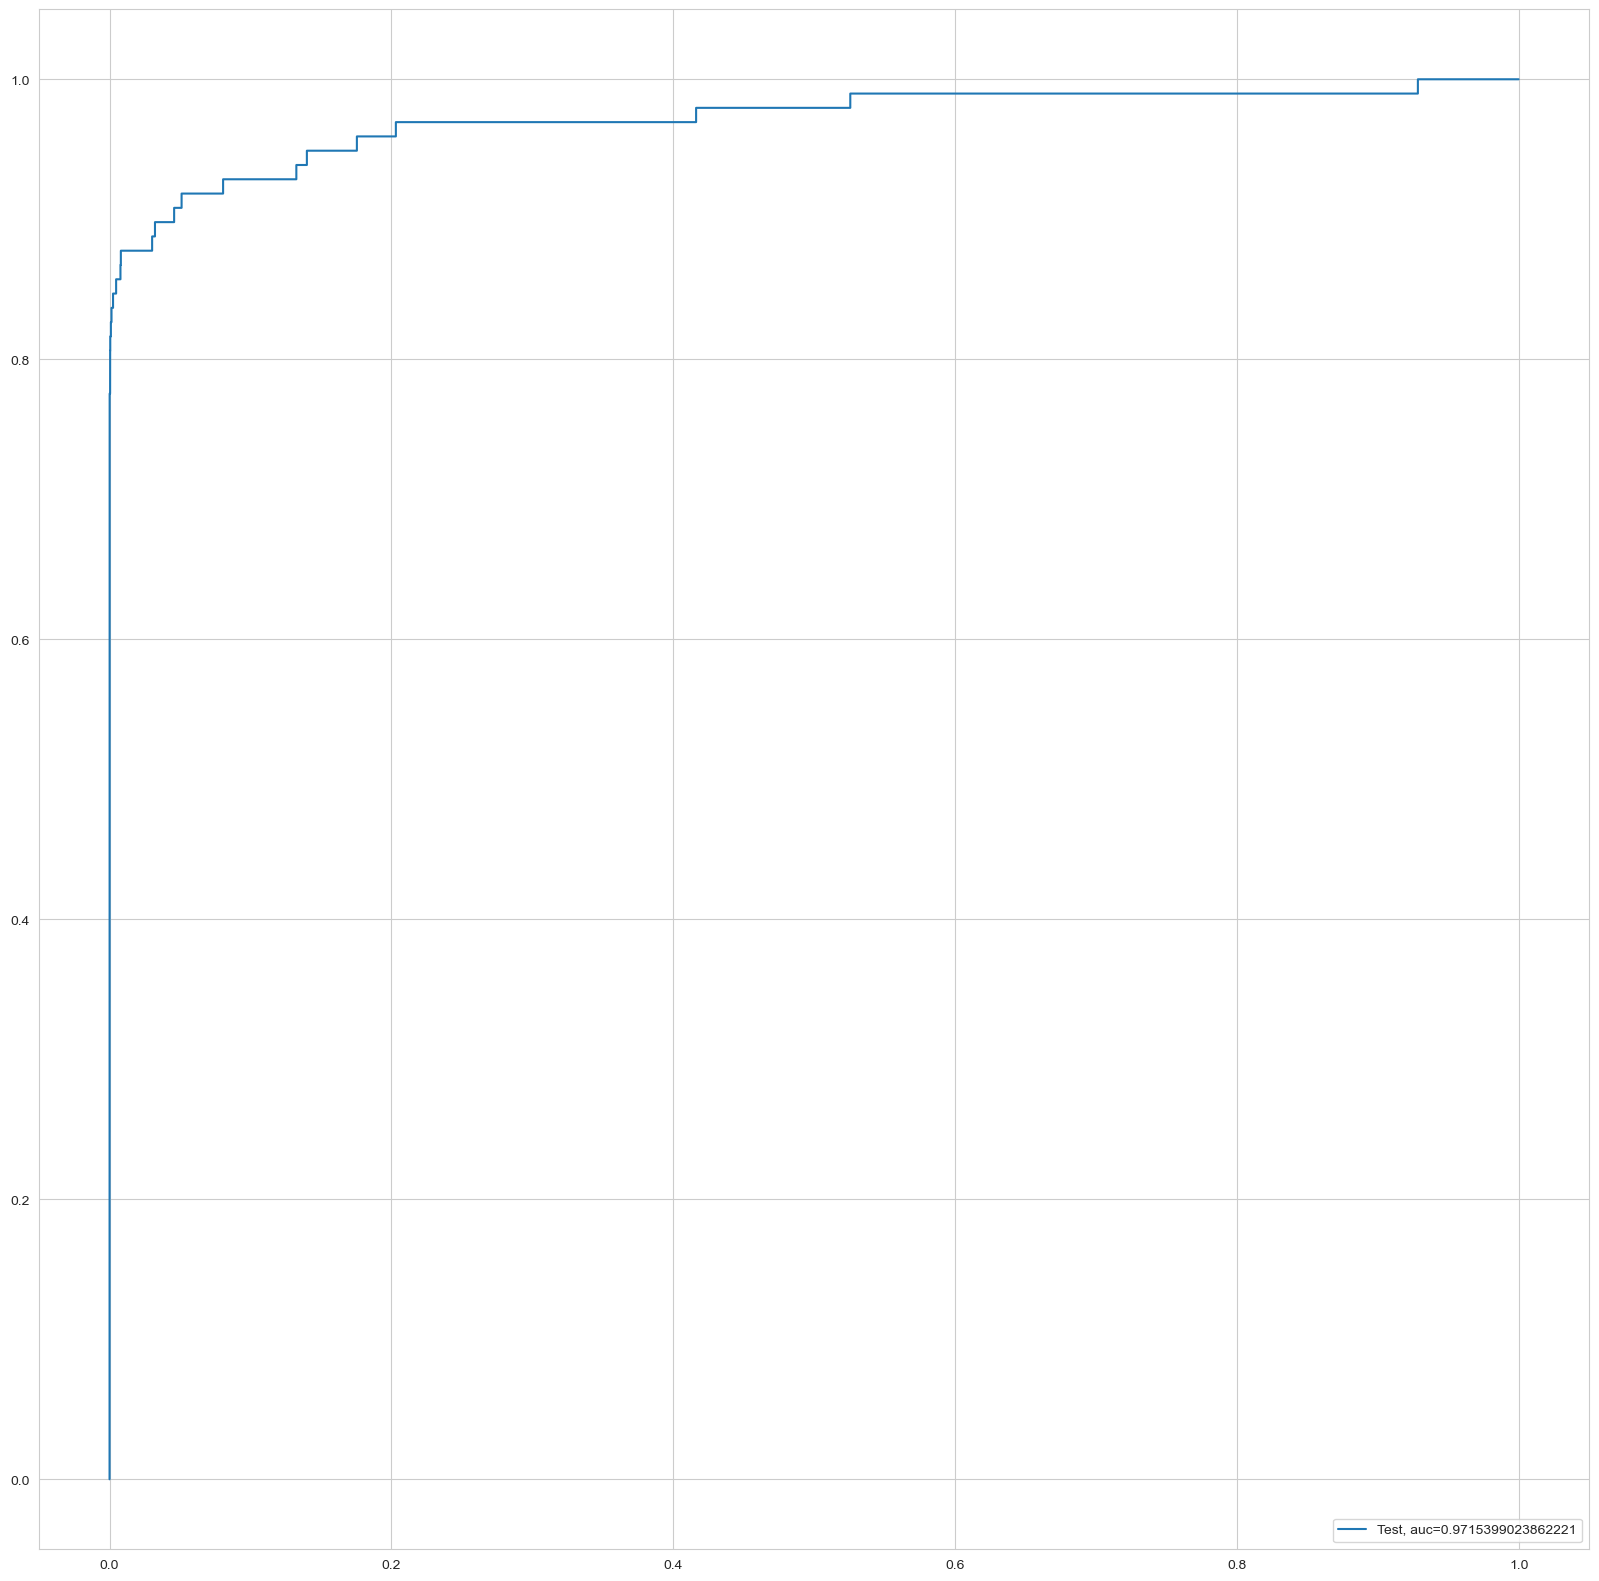

In [114]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
XGB_roc_value = roc_auc_score(y_test, y_test_pred_proba)

print("XGboost roc_value: {0}" .format(XGB_roc_value))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print("XGBoost threshold: {0}".format(threshold))
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

#### After hyperparameter tuning, test dataset ROC Value has increased to 0.97 which is good.

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 30
3rd Top var = 4


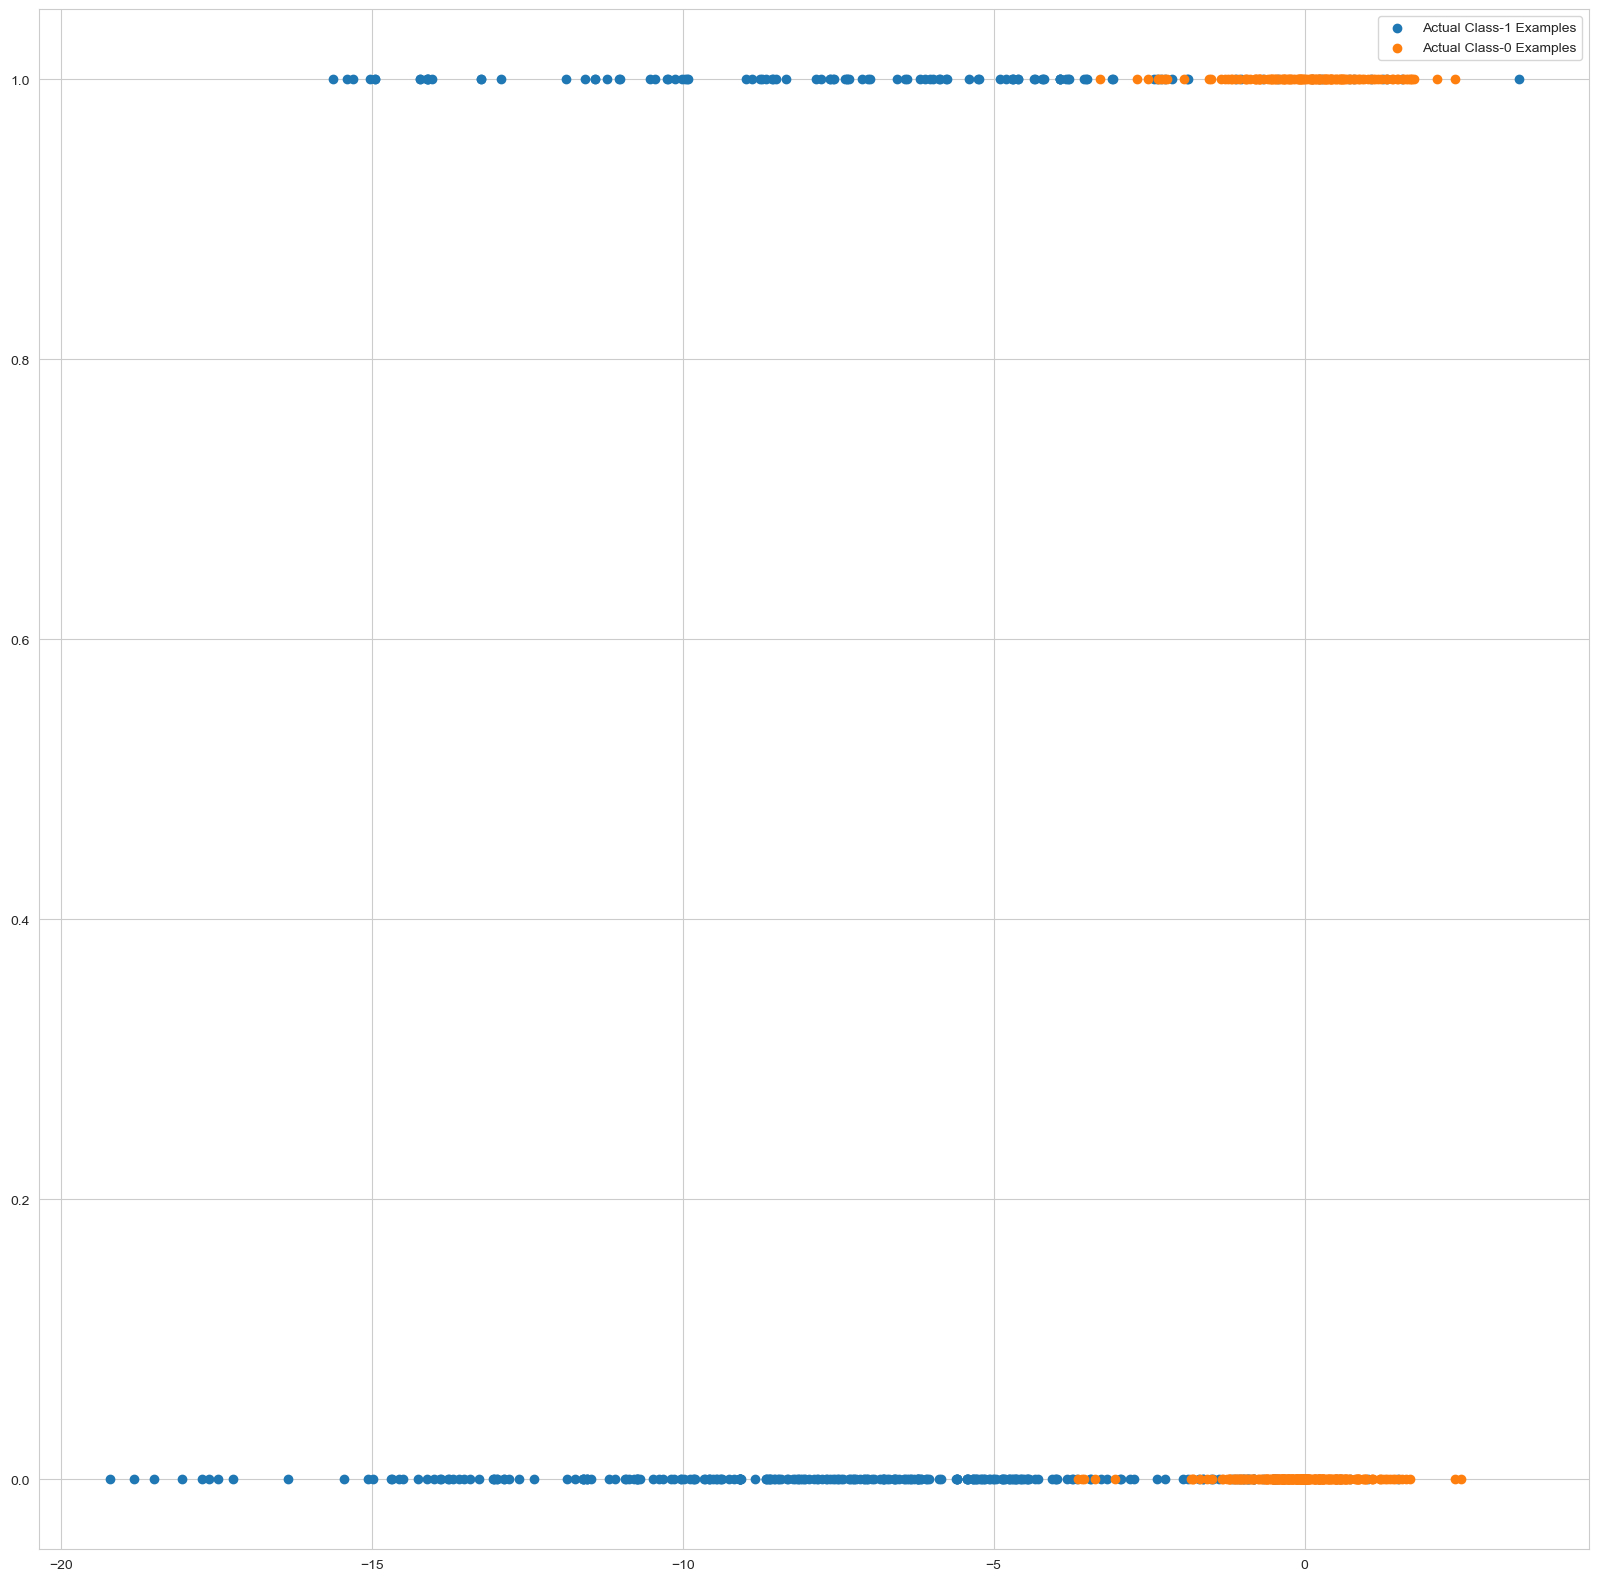

In [115]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [122]:
#### Print the FPR,TPR & select the best threshold from the roc curve
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba)
threshold = thresholds[np.argmax(tpr-fpr)]
print('FPR=',fpr)
print('TPR=',tpr)
print('Best Threshold=',threshold)

Train auc = 1.0
FPR= [0.         0.         0.         ... 0.99952517 0.99953397 1.        ]
TPR= [0.00000000e+00 4.74886005e-04 1.66957608e-02 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
Best Threshold= 0.72205657


## Overall Model Selection
#### After executing various models with various data imbalance techniques, XGBOOST model with StratifiedKFold (Random Oversampling). This seems to be the most optimal model considering accuracy, ROC and threshold.

Model Accuracy: 0.9994733238531627
XGboost roc_value: 0.977353014962206
XGBoost threshold: 0.00016610132297500968

#### XGBoost model with ADASYN and Logistic Regression model with L2 regularisation are also very close (better individually accuracy, ROC and threshold), but XGBoost model with Stratified Kfold in Random Oversampling techniques seems to be most optimal model.



In [118]:
Notebook_time_elapsed = time.time() - notebook_start_time
Notebook_time_elapsed

39898.21429300308

In [119]:
Notebook_time_elapsed / 3600

11.082837303611967